## INTRODUCTION CONTEST

![](https://mivia.unisa.it/onfire2023/assets/img/iciap_logo.jpg)
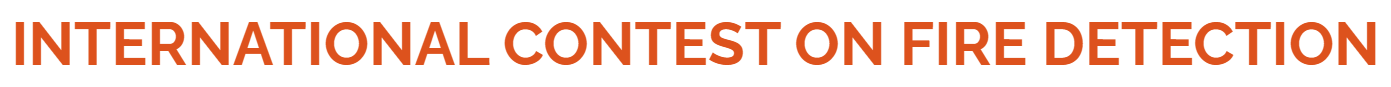

Dear Participant,

Thanks for your participation to ONFIRE Contest 2023.

Please download the following files:
- Training videos: https://drive.google.com/file/d/1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF/view?usp=sharing
- Training annotations: https://drive.google.com/file/d/123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN/view?usp=sharing
- Code example: https://drive.google.com/file/d/1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk/view?usp=sharing

Please remind that:
- The deadline for the submission of the methods is 21st July, 2023. The submission must be done with an email in which the participants share (directly or with external links) the trained model, the code and the report. The participants can receive the training set and its annotations by sending an email to onfire2023@unisa.it, in which they also communicate the name of the team.
- The participants can use these training samples and annotations, but also additional videos.
- The participants must submit their trained model and their code by carefully following the detailed instructions reported in the website.
- The participants are strongly encouraged to submit a contest paper to ICIAP 2023, whose deadline is 28th July, 2023. The contest paper must be also sent by email to the organizers. Otherwise, the participants must produce a brief PDF report of the proposed method.
- The detailed instructions of the proposed method can be downloaded here: https://mivia.unisa.it/onfire2023/

## Download and unzip

In [ ]:
# You can follow this tutorial for more information - https://www.tutorialspoint.com/google_colab/index.htm
# You can also see this video - https://www.youtube.com/watch?v=inN8seMm7UI

# Mount your Drive - After doing this step, your Google Drive folders are accessible from Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Serve a scaricare direttamente su Colab i dati. Conviene fare così rispetto a caricarli sul drive e poi ogni volta caricarli su Colab, poichè è molto lento.

I video son nel formato .mp4. Per ogni video c'è un file .rft che contiene tutte le informazioni.

Questo file contentiene dati in questo formato: num_frame,x
dove num_frame è l'indice del frame in cui è stato visualizzato x per la prima volta, invece x è fire o smoke (può essere utilizzata o meno).

In [2]:
import gdown
def download_google_file(shader_url, output_name):
  id_url = "https://drive.google.com/uc?id=" + shader_url.split("/")[5]
  gdown.download(id_url, output_name)

In [3]:
download_google_file("https://drive.google.com/file/d/1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF/view?usp=sharing", "VIDEOS.zip")
!unzip VIDEOS.zip

Downloading...
From: https://drive.google.com/uc?id=1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF
To: /content/VIDEOS.zip
100%|██████████| 1.52G/1.52G [00:17<00:00, 89.0MB/s]


Archive:  VIDEOS.zip
   creating: TRAINING_SET/
   creating: TRAINING_SET/1/
  inflating: TRAINING_SET/1/Video75_2.mp4  
  inflating: TRAINING_SET/1/Video210.mp4  
  inflating: TRAINING_SET/1/Video150.mp4  
  inflating: TRAINING_SET/1/Video60.mp4  
  inflating: TRAINING_SET/1/Video186.mp4  
  inflating: TRAINING_SET/1/Video75_1.mp4  
  inflating: TRAINING_SET/1/Video75_3.mp4  
  inflating: TRAINING_SET/1/Video72.mp4  
  inflating: TRAINING_SET/1/Video71.mp4  
  inflating: TRAINING_SET/1/Video130.mp4  
  inflating: TRAINING_SET/1/Video109.mp4  
  inflating: TRAINING_SET/1/Video115.mp4  
  inflating: TRAINING_SET/1/Video103.mp4  
  inflating: TRAINING_SET/1/Video18.mp4  
  inflating: TRAINING_SET/1/Video138.mp4  
  inflating: TRAINING_SET/1/Video213.mp4  
  inflating: TRAINING_SET/1/Video80.mp4  
  inflating: TRAINING_SET/1/Video83.mp4  
  inflating: TRAINING_SET/1/Video43.mp4  
  inflating: TRAINING_SET/1/Video170.mp4  
  inflating: TRAINING_SET/1/Video47.mp4  
  inflating: TRAINING_SET

In [4]:
download_google_file("https://drive.google.com/file/d/123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN/view?usp=sharing", "GT.zip")
!unzip GT.zip
!mkdir -p GT/TRAINING_SET
!mv GT_TRAINING_SET_CL0 GT/TRAINING_SET/0
!mv GT_TRAINING_SET_CL1 GT/TRAINING_SET/1

Downloading...
From: https://drive.google.com/uc?id=123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN
To: /content/GT.zip
100%|██████████| 127k/127k [00:00<00:00, 105MB/s]

Archive:  GT.zip
   creating: GT_TRAINING_SET_CL1/
  inflating: GT_TRAINING_SET_CL1/Video204.rtf  
  inflating: GT_TRAINING_SET_CL1/Video210.rtf  
  inflating: GT_TRAINING_SET_CL1/Video53.rtf  
  inflating: GT_TRAINING_SET_CL1/Video47.rtf  
  inflating: GT_TRAINING_SET_CL1/Video90.rtf  
  inflating: GT_TRAINING_SET_CL1/Video171.rtf  
  inflating: GT_TRAINING_SET_CL1/Video91.rtf  
  inflating: GT_TRAINING_SET_CL1/Video213.rtf  
  inflating: GT_TRAINING_SET_CL1/Video165.rtf  
  inflating: GT_TRAINING_SET_CL1/Video159.rtf  
  inflating: GT_TRAINING_SET_CL1/Video46.rtf  
  inflating: GT_TRAINING_SET_CL1/Video84.rtf  
  inflating: GT_TRAINING_SET_CL1/Video85.rtf  
  inflating: GT_TRAINING_SET_CL1/Video35.rtf  
  inflating: GT_TRAINING_SET_CL1/Video133.rtf  
  inflating: GT_TRAINING_SET_CL1/Video260.rtf  
  inflating: GT_TRAINING_SET_CL1/Video21.rtf  
  inflating: GT_TRAINING_SET_CL1/Video261.rtf  
  inflating: GT_TRAINING_SET_CL1/Video103.rtf  
  inflating: GT_TRAINING_SET_CL1/Video20.rtf  

In [5]:
download_google_file("https://drive.google.com/file/d/1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk/view?usp=sharing", "test_code.zip")
!unzip test_code.zip

Downloading...
From: https://drive.google.com/uc?id=1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk
To: /content/test_code.zip
100%|██████████| 26.1M/26.1M [00:00<00:00, 201MB/s]


Archive:  test_code.zip
   creating: ONFIRE2023_Example_Code/
  inflating: ONFIRE2023_Example_Code/test.py  
  inflating: ONFIRE2023_Example_Code/test.ipynb  
   creating: ONFIRE2023_Example_Code/foo_videos/
  inflating: ONFIRE2023_Example_Code/foo_videos/Video2.mp4  
  inflating: ONFIRE2023_Example_Code/foo_videos/Video0.mp4  
  inflating: ONFIRE2023_Example_Code/foo_videos/Video1.mp4  
  inflating: ONFIRE2023_Example_Code/foo_videos/Video103.mp4  
   creating: ONFIRE2023_Example_Code/foo_results/


In [6]:
!ls

gdrive	GT.zip			 sample_data	TRAINING_SET
GT	ONFIRE2023_Example_Code  test_code.zip	VIDEOS.zip


Rinomino le cartella estratte e rimuovo le cartelle che devo creare se esistono.

In [30]:
!mv TRAINING_SET TEMP_VIDEO
!mv GT TEMP_GT

In [31]:
!rm -R TRAINING_SET
!rm -R TEST_SET
!rm -R GT

rm: cannot remove 'TRAINING_SET': No such file or directory
rm: cannot remove 'TEST_SET': No such file or directory
rm: cannot remove 'GT': No such file or directory


In [32]:
import numpy as np
import os

# List all files in dir
files_1 = os.listdir("TEMP_VIDEO/1")  # Video con fuoco
files_0 = os.listdir("TEMP_VIDEO/0")  # Video senza fuoco
# print(files_0)

# Select p_train(in %) of the files randomly
p_train=0.8
random_files_1 = np.random.choice(files_1, size=int(len(files_1)*p_train), replace=False)
random_files_0 = np.random.choice(files_0, size=int(len(files_0)*p_train), replace=False)

# Get the remaining files
other_files_1 = [x for x in files_1 if x not in random_files_1]
other_files_0 = [x for x in files_0 if x not in random_files_0]

# Creo le cartelle
# Per i video
os.mkdir("TRAINING_SET")
os.mkdir("TRAINING_SET/1")
os.mkdir("TRAINING_SET/0")
os.mkdir("TEST_SET")
os.mkdir("TEST_SET/1")
os.mkdir("TEST_SET/0")
# Per le label
os.mkdir("GT")
os.mkdir("GT/TRAINING_SET")
os.mkdir("GT/TRAINING_SET/1")
os.mkdir("GT/TRAINING_SET/0")
os.mkdir("GT/TEST_SET")
os.mkdir("GT/TEST_SET/1")
os.mkdir("GT/TEST_SET/0")

label_0_train=list()
label_1_train=list()
label_0_val=list()
label_1_val=list()

# Creo il training set
for x in random_files_0:
    source="TEMP_VIDEO/0/"+x
    dest="TRAINING_SET/0/"+x
    command="cp "+source+" "+dest
    os.system(command)
    label=x.replace("mp4","rtf")
    label_0_train.append(label)

#print(label_0_list)

for x in random_files_1:
    source="TEMP_VIDEO/1/"+x
    dest="TRAINING_SET/1/"+x
    command="cp "+source+" "+dest
    os.system(command)
    label=x.replace("mp4","rtf")
    label_1_train.append(label)

#print(label_1_list)

# Creo il validation set
for x in other_files_0:
    source="TEMP_VIDEO/0/"+x
    dest="TEST_SET/0/"+x
    command="cp "+source+" "+dest
    os.system(command)
    label=x.replace("mp4","rtf")
    label_0_val.append(label)

for x in other_files_1:
    source="TEMP_VIDEO/1/"+x
    dest="TEST_SET/1/"+x
    command="cp "+source+" "+dest
    os.system(command)
    label=x.replace("mp4","rtf")
    label_1_val.append(label)

# Ora suddivido le label
for x in label_0_train:
    source="TEMP_GT/TRAINING_SET/0/"+x
    dest="GT/TRAINING_SET/0/"+x
    command="cp "+source+" "+dest
    os.system(command)

for x in label_1_train:
    source="TEMP_GT/TRAINING_SET/1/"+x
    dest="GT/TRAINING_SET/1/"+x
    command="cp "+source+" "+dest
    os.system(command)

for x in label_0_val:
    source="TEMP_GT/TRAINING_SET/0/"+x
    dest="GT/TEST_SET/0/"+x
    command="cp "+source+" "+dest
    os.system(command)

for x in label_1_val:
    source="TEMP_GT/TRAINING_SET/1/"+x
    dest="GT/TEST_SET/1/"+x
    command="cp "+source+" "+dest
    os.system(command)


In [33]:
# !cat GT/TRAINING_SET/0/Video0.rtf

print("Video:")
!ls TEMP_VIDEO/1 | wc -l
!ls TEMP_VIDEO/0 | wc -l

print("\nLabel:")
!ls TEMP_GT/TRAINING_SET/1 | wc -l
!ls TEMP_GT/TRAINING_SET/0 | wc -l

print("\nVideo train set:")
!ls TRAINING_SET/1 | wc -l
!ls TRAINING_SET/0 | wc -l

print("\nVideo test set:")
!ls TEST_SET/1 | wc -l
!ls TEST_SET/0 | wc -l

print("\nLabel train set:")
!ls GT/TRAINING_SET/1 | wc -l
!ls GT/TRAINING_SET/0 | wc -l

print("\nLabel test set:")
!ls GT/TEST_SET/1 | wc -l
!ls GT/TEST_SET/0 | wc -l

Video:
219
93

Label:
220
105

Video train set:
175
74

Video test set:
44
19

Label train set:
175
74

Label test set:
44
19


In [34]:
!rm -R FRAMES

In [35]:
videos_path1 = "TRAINING_SET"
videos_path2 = "TEST_SET"
frames_path = "FRAMES"

In [36]:
import cv2, os, argparse, glob, PIL, tqdm

def extract_frames(video):
    # Process the video
    ret = True # è True fino a che ci sono frame nel video.
    cap = cv2.VideoCapture(video)
    f = 0
    while ret:
        ret, img = cap.read() # I frame vengono presi dalla read function e questo viene salvato in img (un numpy array)
        if ret:
            f += 1
            PIL.Image.fromarray(img).save(os.path.join(frames_path, video, "{:05d}.jpg".format(f))) # Con la PIL function salviamo l'array come immagine. Con il formato jpeg non sprechiamo troppo spazio ma perdiamo delle informazioni.
    cap.release()

#Con il codice sottostante prendiamo i path di tutti i video nelle directory. Poi salviamo tutti i frame nei frame_path che creiamo.

# For all the videos
file_list_training = [path for path in glob.glob(os.path.join(videos_path1,"**"), recursive=True) # glob.glob restituisce tutti i path di una directory. Ma noi siamo interessati solo ai file e quindi li prendiamo con os.path.isfile(path)
             if os.path.isfile(path)]

file_list_validation = [path for path in glob.glob(os.path.join(videos_path2,"**"), recursive=True) # glob.glob restituisce tutti i path di una directory. Ma noi siamo interessati solo ai file e quindi li prendiamo con os.path.isfile(path)
             if os.path.isfile(path)]
#print(file_list_training)
#print(file_list_validation)

for video in tqdm.tqdm(file_list_training): # Se ho già caricato i frame di questi video li skippo
  if os.path.isdir(os.path.join(frames_path, video)):
    continue
  os.makedirs(os.path.join(frames_path, video))
  #extract_frames(video) # Invece di chiamare la funzione di prima che è lenta utilizzo questa di sotto che è molto più veloce.
  os.system("ffmpeg -i {} -r 1/1 {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))   # Senza -r estraggo tutti i frame del video, con -r estraggo un solo frame per secondo

for video in tqdm.tqdm(file_list_validation): # Se ho già caricato i frame di questi video li skippo
  #print(os.path.join(frames_path, video))
  if os.path.isdir(os.path.join(frames_path, video)):
    continue
  os.makedirs(os.path.join(frames_path, video))
  #extract_frames(video) # Invece di chiamare la funzione di prima che è lenta utilizzo questa di sotto che è molto più veloce.
  os.system("ffmpeg -i {} -r 1/1 {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))


  0%|          | 0/249 [00:00<?, ?it/s]ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --

I video sono in mp4 format.
SIAMO INCORAGGIATI AD ESPANDERE IL TRAINING SET CON ALTRI VIDEO DA NOI TROVATI.
Per ogni video abbiamo dei file in formato .rtf che ci fanno delle informazioni.

GT sta per ground truth.

In GT_TRAINING_SET_CL0 i file rtf sono tutti vuoti. Mentre in GT_TRAINING_SET_CL1 contengono: indice del frame che è stato visualizzato il fuoco per la prima volta. Nota: in molti video già al frame 0 c'è del fuoco.
I risultati sul test set vengono fatti in questo modo.

## Estrazione dei frame dai video (per k-fold)

Per lavorare con video dobbiamo estrarre i frame dal video. Potremmo fare questo al volo, quindi ad ogni mini batch, durante la fase di training. Ma conviene estrarre tutto una volta e poi fare il training.

In [25]:
videos_path = "TRAINING_SET"
frames_path = "FRAMES"

In [26]:
!rm -R FRAMES/TRAINING_SET/

We use ffmpeg to faster the frame extraction

In [27]:
import cv2, os, argparse, glob, PIL, tqdm

def extract_frames(video):
    # Process the video
    ret = True # è True fino a che ci sono frame nel video.
    cap = cv2.VideoCapture(video)
    f = 0
    while ret:
        ret, img = cap.read() # I frame vengono presi dalla read function e questo viene salvato in img (un numpy array)
        if ret:
            f += 1
            PIL.Image.fromarray(img).save(os.path.join(frames_path, video, "{:05d}.jpg".format(f))) # Con la PIL function salviamo l'array come immagine. Con il formato jpeg non sprechiamo troppo spazio ma perdiamo delle informazioni.
    cap.release()

#Con il codice sottostante prendiamo i path di tutti i video nelle directory. Poi salviamo tutti i frame nei frame_path che creiamo.

# For all the videos
file_list = [path for path in glob.glob(os.path.join(videos_path,"**"), recursive=True) # glob.glob restituisce tutti i path di una directory. Ma noi siamo interessati solo ai file e quindi li prendiamo con os.path.isfile(path)
             if os.path.isfile(path)]
#print(file_list)
for video in tqdm.tqdm(file_list): # Se ho già caricato i frame di questi video li skippo
  if os.path.isdir(os.path.join(frames_path, video)):
    continue

  os.makedirs(os.path.join(frames_path, video))
  #extract_frames(video)    # Invece di chiamare la funzione di prima che è lenta utilizzo questa di sotto che è molto più veloce.
  #estre tutti i frame
  #os.system("ffmpeg -i {} {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))
  #per estrarre : 1 frame per secondo
  os.system("ffmpeg -i {} -r 1/1 {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))



  0%|          | 0/312 [00:00<?, ?it/s]ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --

## Dataset Functions

Pythorch non implementa una classe per i video.
Albumentation è un package molto utile per il data agumentation per la computer vision. Può fare data agumentation sul input multipli.

Pytorch (torchvision) non fornisce dataset per video. La data augmentation non funziona molto bene su frame presi da un video. Quindi usiamo Albumentation.
Albumentation ci permette di fornire dati più complessi (un insieme di frame) che devono subire la stessa augmentation. Possiamo anche gestire i bouding box. La cosa importante è che ci permette di fare augmentation su frame di video.

We use strprtf to parse RTF files

In [28]:
!pip install striprtf
!pip install torchinfo
import torchinfo

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


VideoRecord mantiene le informazioni riguardo ogni video annotazione. Es: i path del video, il primo e l'ultimo frame utilizzabile, la classe del video ecc ...

VideoFrameDataset invece è la struttura dati.

In [29]:
import os
import os.path
import numpy as np
from PIL import Image
from torchvision import transforms
import torch
from typing import List, Union, Tuple, Any
from striprtf.striprtf import rtf_to_text
import albumentations


# ha le informazioni legate ad  ogni video, i metadati.
class VideoRecord(object):
    """
    Helper class for class VideoFrameDataset. This class
    represents a video sample's metadata.

    Args:
        root_datapath: the system path to the root folder of the videos.
        row: A list with four or more elements where
             1) The first element is the path to the video sample's frames excluding
             the root_datapath prefix
             2) The  second element is the starting frame id of the video
             3) The third element is the inclusive ending frame id of the video
             4) The fourth element is the label index.
             5) any following elements are labels in the case of multi-label classification
    """
    def __init__(self, row, root_datapath):
        self._data = row
        self._path = os.path.join(root_datapath, row[0])

    @property
    def path(self) -> str:
        return self._path

    @property
    def num_frames(self) -> int:
        return self.end_frame - self.start_frame + 1  # +1 because end frame is inclusive

    @property
    def start_frame(self) -> int:
        return int(self._data[1])

    @property
    def end_frame(self) -> int:
        return int(self._data[2])

    @property
    def label(self) -> Union[int, List[int]]:
        # just one label_id
        if len(self._data) == 4:
            return int(self._data[3])
        # sample associated with multiple labels
        else:
            return [int(label_id) for label_id in self._data[3:]]

# Il parametro test_mode serve per rendere non aleatoria l'estrazione dei frame dal segmento, ovvero prendere sempre gli stessi frame serve per la validation
class VideoFrameDataset(torch.utils.data.Dataset):
    r"""
    A highly efficient and adaptable dataset class for videos.
    Instead of loading every frame of a video,
    loads x RGB frames of a video (sparse temporal sampling) and evenly
    chooses those frames from start to end of the video, returning
    a list of x PIL images or ``FRAMES x CHANNELS x HEIGHT x WIDTH``
    tensors.

    More specifically, the frame range [START_FRAME, END_FRAME] is divided into NUM_SEGMENTS
    segments and FRAMES_PER_SEGMENT consecutive frames are taken from each segment.

    Note:
        A demonstration of using this class can be seen
        in ``demo.py``
        https://github.com/RaivoKoot/Video-Dataset-Loading-Pytorch

    Note:
        This dataset broadly corresponds to the frame sampling technique
        introduced in ``Temporal Segment Networks`` at ECCV2016
        https://arxiv.org/abs/1608.00859.

    Args:
        root_path: The root path in which video folders lie.
                   this is ROOT_DATA from the description above.
        num_segments: The number of segments the video should
                      be divided into to sample frames from.
        frames_per_segment: The number of frames that should
                            be loaded per segment. For each segment's
                            frame-range, a random start index or the
                            center is chosen, from which frames_per_segment
                            consecutive frames are loaded.
        imagefile_template: The image filename template that video frame files
                            have inside of their video folders as described above.
        transform: Transform pipeline that receives a list of numpy images/frames.
        test_mode: If True, frames are taken from the center of each
                   segment, instead of a random location in each segment.

    """
    def __init__(self,
                 root_path: str,
                 num_segments: int = 3,
                 frames_per_segment: int = 1,
                 imagefile_template: str='{:05d}.jpg',
                 transform=None,
                 totensor=True,
                 test_mode: bool = False):
        super(VideoFrameDataset, self).__init__()

        self.root_path = root_path
        self.num_segments = num_segments
        self.frames_per_segment = frames_per_segment
        self.imagefile_template = imagefile_template
        self.test_mode = test_mode

        if transform is None:
            self.transform = None
        else:
            additional_targets = {}
            for i in range(self.num_segments * self.frames_per_segment - 1):
                additional_targets["image%d" % i] = "image"
            self.transform = albumentations.Compose([transform],
                                                    additional_targets=additional_targets,
                                                    p=1)
        self.totensor = totensor
        self.totensor_transform = ImglistOrdictToTensor()

        self._parse_annotationfile()
        self._sanity_check_samples()

    def _load_image(self, directory: str, idx: int) -> Image.Image:
        return np.asarray(Image.open(os.path.join(directory, self.imagefile_template.format(idx))).convert('RGB'))

    def _parse_annotationfile(self):
        self.video_list = []
        for class_name in os.listdir(self.root_path):
            for video_name in os.listdir(os.path.join(self.root_path, class_name)):
                frames_dir = os.path.join(self.root_path, class_name, video_name)
                if os.path.isdir(frames_dir):
                    frame_path = os.path.join(class_name, video_name)
                    end_frame = len(os.listdir(frames_dir))

                    annotation_path = frames_dir\
                        .replace("\\", "/") \
                        .replace("FRAMES/", "GT/") \
                        .replace(".mp4", ".rtf")

                    with open(annotation_path, 'r') as file:
                        text = rtf_to_text(file.read())
                    if len(text):
                        label = 1
                        start_frame = int(text.split(",")[0])
                        if start_frame == 0:
                          start_frame = 1
                    else:
                        label = 0
                        start_frame = 1

                    self.video_list.append(VideoRecord(
                        [frame_path, start_frame, end_frame, label],
                        self.root_path))

    def _sanity_check_samples(self):
        for record in self.video_list:
            if record.num_frames <= 0 or record.start_frame == record.end_frame:
                print(f"\nDataset Warning: video {record.path} seems to have zero RGB frames on disk!\n")

            elif record.num_frames < (self.num_segments * self.frames_per_segment):
                print(f"\nDataset Warning: video {record.path} has {record.num_frames} frames "
                      f"but the dataloader is set up to load "
                      f"(num_segments={self.num_segments})*(frames_per_segment={self.frames_per_segment})"
                      f"={self.num_segments * self.frames_per_segment} frames. Dataloader will throw an "
                      f"error when trying to load this video.\n")

    def _get_start_indices(self, record: VideoRecord) -> 'np.ndarray[int]':
        """
        For each segment, choose a start index from where frames
        are to be loaded from.

        Args:
            record: VideoRecord denoting a video sample.
        Returns:
            List of indices of where the frames of each
            segment are to be loaded from.
        """
        # choose start indices that are perfectly evenly spread across the video frames.
        if self.test_mode:
            distance_between_indices = (record.num_frames - self.frames_per_segment + 1) / float(self.num_segments)

            start_indices = np.array([int(distance_between_indices / 2.0 + distance_between_indices * x)
                                      for x in range(self.num_segments)])
        # randomly sample start indices that are approximately evenly spread across the video frames.
        else:
            max_valid_start_index = (record.num_frames - self.frames_per_segment + 1) // self.num_segments

            start_indices = np.multiply(list(range(self.num_segments)), max_valid_start_index) + \
                      np.random.randint(max_valid_start_index, size=self.num_segments)

        return start_indices

    def __getitem__(self, idx: int) -> Union[
        Tuple[List[Image.Image], Union[int, List[int]]],
        Tuple['torch.Tensor[num_frames, channels, height, width]', Union[int, List[int]]],
        Tuple[Any, Union[int, List[int]]],
        ]:
        """
        For video with id idx, loads self.NUM_SEGMENTS * self.FRAMES_PER_SEGMENT
        frames from evenly chosen locations across the video.

        Args:
            idx: Video sample index.
        Returns:
            A tuple of (video, label). Label is either a single
            integer or a list of integers in the case of multiple labels.
            Video is either 1) a list of PIL images if no transform is used
            2) a batch of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1]
            if the transform "ImglistToTensor" is used
            3) or anything else if a custom transform is used.
        """
        record: VideoRecord = self.video_list[idx]

        frame_start_indices: 'np.ndarray[int]' = self._get_start_indices(record)

        return self._get(record, frame_start_indices)

    def _get(self, record: VideoRecord, frame_start_indices: 'np.ndarray[int]') -> Union[
        Tuple[List[Image.Image], Union[int, List[int]]],
        Tuple['torch.Tensor[num_frames, channels, height, width]', Union[int, List[int]]],
        Tuple[Any, Union[int, List[int]]],
        ]:
        """
        Loads the frames of a video at the corresponding
        indices.

        Args:
            record: VideoRecord denoting a video sample.
            frame_start_indices: Indices from which to load consecutive frames from.
        Returns:
            A tuple of (video, label). Label is either a single
            integer or a list of integers in the case of multiple labels.
            Video is either 1) a list of PIL images if no transform is used
            2) a batch of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1]
            if the transform "ImglistToTensor" is used
            3) or anything else if a custom transform is used.
        """

        frame_start_indices = frame_start_indices + record.start_frame
        images = list()

        # from each start_index, load self.frames_per_segment
        # consecutive frames
        for start_index in frame_start_indices:
            frame_index = int(start_index)

            # load self.frames_per_segment consecutive frames
            for _ in range(self.frames_per_segment):
                image = self._load_image(record.path, frame_index)
                images.append(image)

                if frame_index < record.end_frame:
                    frame_index += 1

        if self.transform is not None:
            transform_input = {"image": images[0]}
            for i, image in enumerate(images[1:]):
                transform_input["image%d" % i] = image
            images = self.transform(**transform_input)

        if self.totensor:
            images = self.totensor_transform(images)
        return images, record.label

    def __len__(self):
        return len(self.video_list)


class ImglistOrdictToTensor(torch.nn.Module):
    """
    Converts a list or a dict of numpy images to a torch.FloatTensor
    of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH).
    Can be used as first transform for ``VideoFrameDataset``.
    """
    @staticmethod
    def forward(img_list_or_dict):
        """
        Converts each numpy image in a list or a dict to
        a torch Tensor and stacks them into a single tensor.

        Args:
            img_list_or_dict: list or dict of numpy images.
        Returns:
            tensor of size ``NUM_IMAGES x CHANNELS x HEIGHT x WIDTH``
        """
        if isinstance(img_list_or_dict, list):
            return torch.stack([transforms.functional.to_tensor(img)
                                for img in img_list_or_dict])
        else:
            return torch.stack([transforms.functional.to_tensor(img_list_or_dict[k])
                                for k in img_list_or_dict.keys()])


In [31]:
from torch.utils.data import Subset, DataLoader

# Function for the K-fold Cross Validation
def cross_val_dataloaders(train_dataset, val_dataset=None, K=10, batch_size=32):
  if val_dataset is None:
    val_dataset = train_dataset

  indexes = torch.randperm(len(train_dataset)) % K

  dataloader_params = {"batch_size": batch_size, "num_workers": 2, "pin_memory": True}

  train_folds, val_folds = [], []
  for k in range(K):

      val_fold   = Subset(val_dataset,   (indexes==k).nonzero().squeeze())
      train_fold = Subset(train_dataset, (indexes!=k).nonzero().squeeze())

      #print("train_fold: ", len(train_fold))

      val_fold   = DataLoader(val_fold,   shuffle=False, **dataloader_params)
      train_fold = DataLoader(train_fold, shuffle=True,  **dataloader_params)

      val_folds.append(val_fold)
      train_folds.append(train_fold)
  return train_folds, val_folds, indexes

## Tensorboard

In [51]:
from torch.utils.tensorboard import SummaryWriter
from tensorboard import notebook

def start_tensorboard(log_dir):
  writer = SummaryWriter(os.path.join("runs", log_dir))

  # run tensorboard in background
  ! killall tensorboard
  %load_ext tensorboard
  %tensorboard --logdir ./runs

  notebook.list() # View open TensorBoard instances

  return writer

## K-Fold Training Common Functions

Bisogna cambiare la dimensione di X per poter efettuare il training. Inizialmente X è un tensore di torch.Size([batch_size, 3, 3, 224, 224]), e lo trasformo in un tensore di torch.Size([3*batch_size, 3, 224, 224]), in cui i primi 3 tensori fanno parte del primo tensore di X iniziale: quindi fanno parte dello stesso tensore iniziale e quindi sono dello stesso video (?). Di conseguenza devo cambiare anche y, ma non posso semplicemnte replicarla 3 volte (ex. y=[1 2 3] -> y=[1 2 3 1 2 3 1 2 3]), ma devo fare y=[1 2 3] -> y=[1 1 1 2 2 2 3 3 3].

La view funziona:

batch_size=0,seconda dimensione=0 (Concat) batch_size=0,seconda dimensione=1 (Concat) batch_size=0,seconda dimensione=2 (Concat) batch_size=1,seconda dimensione=0 (Concat) batch_size=1,seconda dimensione=1 (Concat) batch_size=1,seconda dimensione=2

In [33]:
from torchvision.utils import make_grid
from tqdm import tqdm

def one_epoch(model, lossFunction, output_activation, optimizer, train_loader, val_loader, writer, epoch_num, device):
  model.train()

  i_start = epoch_num * len(train_loader)
  for i, (X, y) in tqdm(enumerate(train_loader), desc="epoch {} - train ".format(epoch_num)):
  #for i, (X, y) in enumerate(train_loader):
    (batch_size, frames, channels, width, height) = X.shape
    #print("\nX prima: ",X.shape)
    #print("y prima: ",y.shape)
    #pippo=X[0][0]
    #pippo2=X[0][1]
    #pippo3=X[0][2]
    #print(X[0][0])

    X = X.view(-1,channels, width, height)
    #y = y.repeat(3).long()#.float()   # oppure y.repeat_interleave(frames).long()
    y = y.repeat_interleave(frames)#.float()#.long()  #TODO: Capire .float() e .long()
    #print("X dopo: ",X.shape)
    #print("y dopo: ",y.shape)
    #print(X[0])
    #print("Primo tensore")
    #print(pippo==X[0])
    #print("Secondo tensore")
    #print(pippo2==X[1])
    #print("Terzo tensore")
    #print(pippo3==X[2])

    if i == 0:
      writer.add_image('first_batch', make_grid(X))

    X = X.cuda()#.to(device)###################################
    y = y.cuda().float()#.long()##############################

    optimizer.zero_grad()
    o = model(X)
    o = output_activation(o).squeeze()
    #print("o=",o,"shape o", o.shape, "y=", y, "shape y", y.shape)
    l = lossFunction(o, y)

    l.backward()
    optimizer.step()

    #print("o.detach()", o.detach())
    #print("y.detach()", y.detach())
    acc = ((o.detach() > .5) == y.detach()).float().mean()
    print("acc", acc)
    #acc = (o.detach().argmax(-1) == y.detach()).float().mean()

    print("- batch loss and accuracy : {:.7f}\t{:.4f}".format(l.detach().item(), acc))
    writer.add_scalar('train/loss', l.detach().item(), i_start+i)
    writer.add_scalar('train/acc', acc, i_start+i)

  model.eval()
  print("\nVALIDATION FASE\n")
  #print("val_loader", val_loader)

  with torch.no_grad():
    val_loss = []
    val_corr_pred = []
    for X, y in tqdm(val_loader, desc="epoch {} - validation".format(epoch_num)):
    #for X, y in val_loader:
      #print("X:", X," y:", y)
      (batch_size, frames, channels, width, height) = X.shape
      X = X.view(-1,channels, width, height)
      y = y.repeat_interleave(frames).float()#.long()
      #y = y.repeat(3).long()#.float()
      #print("X:", X," y:", y)

      X = X.cuda()#.to(device)#cuda() ####################
      y = y.cuda()#.to(device)#cuda().float()#######################

      o = model(X)
      o = output_activation(o).squeeze()
      val_loss.append(lossFunction(o, y))
      #print("o=",o," y=", y)
      val_corr_pred.append((o > .5) == y)
      #val_corr_pred.append(o.argmax(-1) == y)

    val_loss = torch.stack(val_loss).mean().item()
    val_accuracy = torch.concatenate(val_corr_pred).float().mean().item()

    print("Validation loss and accuracy : {:.7f}\t{:.4f}".format(val_loss, val_accuracy))
    writer.add_scalar('val/loss', val_loss, i_start+i)
    writer.add_scalar('val/acc', val_accuracy, i_start+i)
  return val_loss, val_accuracy

# Attempt 1: MobileNetV2

### Model Configuration

In [34]:
from torch.nn import Linear,Sequential,Dropout

def build_MobileNet(num_outputs=1):
  model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v3_small', pretrained=True)
  model.classifier = Sequential(
    torch.nn.Linear(in_features=576,
                    out_features=1024, # same number of output units as our number of classes
                    bias=True),
    torch.nn.Hardswish(inplace=True),
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1024,
                    out_features=num_outputs, # same number of output units as our number of classes
                    bias=True))
  return model

model = build_MobileNet(1)

# network parameters
for param in model.parameters():
  param.requires_grad = False
for param in model.classifier.parameters():
  param.requires_grad = True

print(torchinfo.summary(model, ####################################################32 batch size da mettere a run time
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
))

Using cache found in /home/michele/.cache/torch/hub/pytorch_vision_v0.10.0
/home/michele/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/michele/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /home/michele/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 10.6MB/s]


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
MobileNetV3 (MobileNetV3)                                    [32, 3, 224, 224]    [32, 1]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 576, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 16, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 16, 112, 112]   (432)                False
│    │    └─BatchNorm2d (1)                                  [32, 16, 112, 112]   [32, 16, 112, 112]   (32)                 False
│    │    └─Hardswish (2)                                    [32, 16, 112, 112]   [32, 16, 112, 112]   --                   --
│    └─InvertedResidual (1)                                  [32, 16, 112, 112]   [32, 

### Preprocessing of data

Accepts PIL.Image, batched (B, C, H, W) and single (C, H, W) image torch.Tensor objects. The images are resized to resize_size=[256] using interpolation=InterpolationMode.BILINEAR, followed by a central crop of crop_size=[224]. Finally the values are first rescaled to [0.0, 1.0] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].

In [38]:
preprocessing = albumentations.Sequential([
        albumentations.Resize(height=224, width=224, interpolation=1, always_apply=True),
        albumentations.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225],
                                 max_pixel_value=255.,
                                 always_apply=True),
    ])

augmentation = albumentations.OneOf([
        albumentations.HorizontalFlip(p=1.),
        ], p=.5)


### Creation datafold

In [39]:
dataset = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                                num_segments=3,
                                frames_per_segment=1,
                                transform=albumentations.Compose([
                                    preprocessing,
                                    augmentation],
                                    p=1.,
                                )
                                )

In [43]:
# Creazione K fold e relativi dataloader
K_cross_val = 10
batch_size = 64
train_folds, val_folds, indexes = cross_val_dataloaders(dataset, dataset, K_cross_val, batch_size)

### Training

In [46]:
# Define loss and optimizer
output_activation=torch.nn.Sigmoid()  # Sostituire con la relu
#output_activation=torch.nn.ReLU()  #########################################################
lossFunction = torch.nn.BCELoss()    # Nel caso di output_size del modello == 1
#lossFunction = torch.nn.CrossEntropyLoss()  # Nel caso di output_size del modello > 1
lr=0.001
momentum = 0.9
lambda_reg = 0

epochs = 200
early_stopping_patience = 40

# create output directory and logger
experiment_name = "MobileNetV3_exp5_200epoch_10fold_3segment_1frampersegment_batchsize64"

optimizer_config = torch.optim.SGD(model.classifier.parameters(), lr=lr, weight_decay=lambda_reg, momentum=momentum)

dirs = os.listdir()

if experiment_name not in dirs:
  os.makedirs(experiment_name)

writer = start_tensorboard(experiment_name)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Known TensorBoard instances:
  - port 6006: logdir ./runs (started 0:00:01 ago; pid 902926)


In [47]:
# Start the timer
from timeit import default_timer as timer
#start_time = timer()

# Setup training and save the results
model.cuda()#.cpu() ###########################################################################################
torch.save(indexes, os.path.join(experiment_name, "cross-val-indexes.pt"))

val_losses = torch.zeros(epochs, K_cross_val)
val_accuracies = torch.zeros(epochs, K_cross_val)

for k in range(K_cross_val):

  # dataloader, network, optimizer for each fold
  train_loader, val_loader = train_folds[k], val_folds[k]
  optimizer = optimizer_config
  #optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  # early stopping and best model saving
  early_stopping_counter = early_stopping_patience
  min_val_loss = 1e10

  # training and validation
  for e in range(epochs):
    print("FOLD {} - EPOCH {}".format(k, e))

    val_loss, val_accuracy = one_epoch(model, lossFunction, output_activation, optimizer, train_loader, val_loader, writer, e, device)

    # store the validation metrics
    val_losses[e, k] = val_loss
    val_accuracies[e, k] = val_accuracy
    torch.save(val_losses, os.path.join(experiment_name,'val_losses.pth'))
    torch.save(val_accuracies, os.path.join(experiment_name,'val_accuracies.pth'))

    # save the best model and check the early stopping criteria
    if val_loss < min_val_loss: # save the best model
      min_val_loss = val_loss
      early_stopping_counter = early_stopping_patience # reset early stopping counter
      torch.save(model.state_dict(), os.path.join(experiment_name,'fold_{}_best_model.pth'.format(k)))
      print("- saved best model with val_loss =", val_loss, "and val_accuracy =", val_accuracy)

    if e>0: # early stopping counter update
      if val_losses[e, k] > val_losses[e-1, k]:
          early_stopping_counter -= 1 # update early stopping counter
      else:
          early_stopping_counter = early_stopping_patience # reset early stopping counter
    if early_stopping_counter == 0: # early stopping
        break

# End the timer and print out how long it took
#end_time = timer()
#print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

FOLD 0 - EPOCH 0


epoch 0 - train : 3it [00:03,  1.22it/s]

acc tensor(0.5312, device='cuda:0')
- batch loss and accuracy : 0.6917397	0.5312
acc tensor(0.5469, device='cuda:0')
- batch loss and accuracy : 0.6931981	0.5469
acc tensor(0.5312, device='cuda:0')
- batch loss and accuracy : 0.6900866	0.5312
acc tensor(0.6406, device='cuda:0')
- batch loss and accuracy : 0.6848495	0.6406


epoch 0 - train : 5it [00:03,  1.50it/s]


acc tensor(0.5139, device='cuda:0')
- batch loss and accuracy : 0.6864361	0.5139

VALIDATION FASE



epoch 0 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.6768072	0.6875
- saved best model with val_loss = 0.676807165145874 and val_accuracy = 0.6875
FOLD 0 - EPOCH 1



epoch 1 - train : 2it [00:02,  1.06it/s]

acc tensor(0.6042, device='cuda:0')
- batch loss and accuracy : 0.6784772	0.6042
acc tensor(0.6979, device='cuda:0')
- batch loss and accuracy : 0.6734588	0.6979
acc 

epoch 1 - train : 5it [00:02,  2.02it/s]


tensor(0.6615, device='cuda:0')
- batch loss and accuracy : 0.6738014	0.6615
acc tensor(0.5625, device='cuda:0')
- batch loss and accuracy : 0.6820261	0.5625
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.6548305	0.8194

VALIDATION FASE



epoch 1 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

Validation loss and accuracy : 0.6687939	0.6562
- saved best model with val_loss = 0.6687938570976257 and val_accuracy = 0.65625
FOLD 0 - EPOCH 2



epoch 2 - train : 2it [00:02,  1.10it/s]

acc tensor(0.7135, device='cuda:0')
- batch loss and accuracy : 0.6556780	0.7135
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.6637111	0.6562
acc 

epoch 2 - train : 5it [00:02,  2.08it/s]


tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.6536443	0.6875
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.6514449	0.7083
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.6506047	0.7083

VALIDATION FASE



epoch 2 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

Validation loss and accuracy : 0.6587355	0.6875
- saved best model with val_loss = 0.658735454082489 and val_accuracy = 0.6875
FOLD 0 - EPOCH 3



epoch 3 - train : 2it [00:01,  1.19it/s]

acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.6237000	0.7656
acc tensor(0.6979, device='cuda:0')
- batch loss and accuracy : 0.6378871	0.6979
acc 

epoch 3 - train : 5it [00:02,  2.24it/s]


tensor(0.7292, device='cuda:0')
- batch loss and accuracy : 0.6219020	0.7292
acc tensor(0.6198, device='cuda:0')
- batch loss and accuracy : 0.6586288	0.6198
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.6490845	0.6667

VALIDATION FASE



epoch 3 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

Validation loss and accuracy : 0.6547937	0.6875
- saved best model with val_loss = 0.6547936797142029 and val_accuracy = 0.6875
FOLD 0 - EPOCH 4



epoch 4 - train : 2it [00:02,  1.11it/s]

acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.5925630	0.7917
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.6335381	0.7031


epoch 4 - train : 4it [00:02,  2.61it/s]

acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.6288487	0.6719
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.6396463	0.6562
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.6365244	0.6667


epoch 4 - train : 5it [00:02,  2.10it/s]



VALIDATION FASE



epoch 4 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

Validation loss and accuracy : 0.6540646	0.6875
- saved best model with val_loss = 0.6540645956993103 and val_accuracy = 0.6875
FOLD 0 - EPOCH 5



epoch 5 - train : 2it [00:02,  1.15s/it]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.5745627	0.7812
acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.6329211	0.6719
acc 

epoch 5 - train : 5it [00:02,  1.68it/s]


tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.5876781	0.7448
acc tensor(0.6094, device='cuda:0')
- batch loss and accuracy : 0.6684582	0.6094
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5963375	0.7083

VALIDATION FASE



epoch 5 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.6457858	0.6875
- saved best model with val_loss = 0.6457858085632324 and val_accuracy = 0.6875
FOLD 0 - EPOCH 6



epoch 6 - train : 2it [00:02,  1.14it/s]

acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.6072898	0.7031
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5947759	0.7344
acc 

epoch 6 - train : 5it [00:02,  2.16it/s]


tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.6035352	0.7031
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.6122730	0.7031
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6363758	0.6250

VALIDATION FASE



epoch 6 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

Validation loss and accuracy : 0.6442341	0.6875
- saved best model with val_loss = 0.6442341208457947 and val_accuracy = 0.6875
FOLD 0 - EPOCH 7



epoch 7 - train : 2it [00:02,  1.07it/s]

acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.6342009	0.6562
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.6169739	0.7031
acc 

epoch 7 - train : 5it [00:02,  2.02it/s]


tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.6125659	0.6719
acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.5581536	0.7656
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5462399	0.7500

VALIDATION FASE



epoch 7 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

Validation loss and accuracy : 0.6479491	0.6875
FOLD 0 - EPOCH 8



epoch 8 - train : 2it [00:01,  1.24it/s]

acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.6147783	0.6719
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5912936	0.7188


epoch 8 - train : 5it [00:02,  2.40it/s]


acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.5671818	0.7656
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5813806	0.7031
acc tensor(0.5833, device='cuda:0')
- batch loss and accuracy : 0.6895987	0.5833

VALIDATION FASE



epoch 8 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

Validation loss and accuracy : 0.6441282	0.6875
- saved best model with val_loss = 0.6441282033920288 and val_accuracy = 0.6875
FOLD 0 - EPOCH 9



epoch 9 - train : 1it [00:01,  1.91s/it]

acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.6045664	0.7031
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.6100779	0.7031
acc 

epoch 9 - train : 5it [00:02,  2.19it/s]


tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4973348	0.8281
acc tensor(0.5781, device='cuda:0')
- batch loss and accuracy : 0.6750603	0.5781
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.6052129	0.7083

VALIDATION FASE



epoch 9 - validation: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

Validation loss and accuracy : 0.6453792	0.6875
FOLD 0 - EPOCH 10



epoch 10 - train : 2it [00:02,  1.09it/s]

acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5713021	0.7500
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5924087	0.7031
acc 

epoch 10 - train : 5it [00:02,  2.05it/s]


tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5583397	0.7344
acc tensor(0.6094, device='cuda:0')
- batch loss and accuracy : 0.6930354	0.6094
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5475953	0.7500

VALIDATION FASE



epoch 10 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

Validation loss and accuracy : 0.6441052	0.6875
- saved best model with val_loss = 0.6441051959991455 and val_accuracy = 0.6875
FOLD 0 - EPOCH 11



epoch 11 - train : 2it [00:02,  1.12it/s]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5739008	0.7344
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5473140	0.7500
acc 

epoch 11 - train : 5it [00:02,  2.08it/s]


tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.6167347	0.6875
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5963998	0.6875
acc tensor(0.5833, device='cuda:0')
- batch loss and accuracy : 0.6913885	0.5833

VALIDATION FASE



epoch 11 - validation: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

Validation loss and accuracy : 0.6429890	0.6875
- saved best model with val_loss = 0.6429890394210815 and val_accuracy = 0.6875
FOLD 0 - EPOCH 12



epoch 12 - train : 2it [00:02,  1.01s/it]

acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.6247548	0.6875
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6422852	0.6250


epoch 12 - train : 4it [00:02,  2.38it/s]

acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.6275536	0.6562
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.5097333	0.7969
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.5055628	0.8333


epoch 12 - train : 5it [00:02,  1.90it/s]



VALIDATION FASE



epoch 12 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

Validation loss and accuracy : 0.6381052	0.6875
- saved best model with val_loss = 0.6381051540374756 and val_accuracy = 0.6875
FOLD 0 - EPOCH 13



epoch 13 - train : 2it [00:02,  1.07it/s]

acc tensor(0.6094, device='cuda:0')
- batch loss and accuracy : 0.6744218	0.6094
acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.6169975	0.6719
acc 

epoch 13 - train : 5it [00:02,  2.01it/s]


tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.6090313	0.7031
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.4708838	0.8438
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5862891	0.6667

VALIDATION FASE



epoch 13 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.6406214	0.6875
FOLD 0 - EPOCH 14



epoch 14 - train : 1it [00:02,  2.61s/it]

acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5849823	0.6875
acc 

epoch 14 - train : 4it [00:02,  2.10it/s]

tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5741599	0.7031
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5574711	0.7500
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6622486	0.6250
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4780322	0.8333


epoch 14 - train : 5it [00:02,  1.68it/s]



VALIDATION FASE



epoch 14 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

Validation loss and accuracy : 0.6441988	0.6875
FOLD 0 - EPOCH 15



epoch 15 - train : 2it [00:02,  1.04it/s]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.5207152	0.7812
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6546241	0.6250
acc 

epoch 15 - train : 5it [00:02,  1.97it/s]


tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5593581	0.7188
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5670033	0.7188
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6566333	0.6250

VALIDATION FASE



epoch 15 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

Validation loss and accuracy : 0.6422647	0.6875
FOLD 0 - EPOCH 16



epoch 16 - train : 1it [00:02,  2.67s/it]

acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.6017975	0.6875
acc 

epoch 16 - train : 4it [00:02,  2.05it/s]

tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5786627	0.7188
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.6135172	0.6562
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5631092	0.7500
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5542942	0.7083


epoch 16 - train : 5it [00:03,  1.64it/s]



VALIDATION FASE



epoch 16 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

Validation loss and accuracy : 0.6314627	0.6875
- saved best model with val_loss = 0.6314626932144165 and val_accuracy = 0.6875
FOLD 0 - EPOCH 17



epoch 17 - train : 2it [00:02,  1.07it/s]

acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5815443	0.7188
acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.5206295	0.7656
acc 

epoch 17 - train : 5it [00:02,  1.99it/s]


tensor(0.6094, device='cuda:0')
- batch loss and accuracy : 0.6676537	0.6094
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5674950	0.7031
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5544380	0.7500

VALIDATION FASE



epoch 17 - validation: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

Validation loss and accuracy : 0.6379571	0.6875
FOLD 0 - EPOCH 18



epoch 18 - train : 2it [00:02,  1.04s/it]

acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5506593	0.7500
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5889565	0.6875
acc 

epoch 18 - train : 5it [00:02,  1.81it/s]


tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5821784	0.7031
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5871067	0.6875
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.6079786	0.6667

VALIDATION FASE



epoch 18 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

Validation loss and accuracy : 0.6334607	0.6875
FOLD 0 - EPOCH 19



epoch 19 - train : 2it [00:02,  1.03it/s]

acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5958313	0.6719
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5759323	0.7344
acc 

epoch 19 - train : 5it [00:02,  1.95it/s]


tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6287126	0.6250
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5318294	0.7500
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.5168912	0.7917

VALIDATION FASE



epoch 19 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

Validation loss and accuracy : 0.6247075	0.6875
- saved best model with val_loss = 0.6247074604034424 and val_accuracy = 0.6875
FOLD 0 - EPOCH 20



epoch 20 - train : 2it [00:02,  1.11it/s]

acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5862969	0.6875
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4987012	0.7969
acc 

epoch 20 - train : 5it [00:02,  2.10it/s]


tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.6355920	0.6562
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5897630	0.6875
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5859034	0.6667

VALIDATION FASE



epoch 20 - validation: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

Validation loss and accuracy : 0.6311718	0.6875
FOLD 0 - EPOCH 21



epoch 21 - train : 2it [00:02,  1.02s/it]

acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5747240	0.7031
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.6194356	0.6562
acc 

epoch 21 - train : 5it [00:02,  1.88it/s]


tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5881717	0.6875
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5612136	0.7188
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4541761	0.8333

VALIDATION FASE



epoch 21 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.6310567	0.6875
FOLD 0 - EPOCH 22



epoch 22 - train : 2it [00:02,  1.16it/s]

acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.6002532	0.6719
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5408526	0.7500
acc 

epoch 22 - train : 5it [00:02,  2.18it/s]


tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5679337	0.7031
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5881633	0.7031
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.6089295	0.6667

VALIDATION FASE



epoch 22 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

Validation loss and accuracy : 0.6313376	0.6875
FOLD 0 - EPOCH 23



epoch 23 - train : 2it [00:02,  1.00it/s]

acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5732784	0.7031
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5541898	0.7344
acc 

epoch 23 - train : 5it [00:02,  1.89it/s]


tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5540862	0.7031
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5887879	0.7031
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6120593	0.6250

VALIDATION FASE



epoch 23 - validation: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

Validation loss and accuracy : 0.6235676	0.6875
- saved best model with val_loss = 0.6235675811767578 and val_accuracy = 0.6875
FOLD 0 - EPOCH 24



epoch 24 - train : 2it [00:02,  1.05it/s]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5886261	0.7344
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.6265839	0.6562
acc 

epoch 24 - train : 5it [00:02,  1.96it/s]


tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5927120	0.6719
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5145303	0.7344
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5002623	0.7500

VALIDATION FASE



epoch 24 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

Validation loss and accuracy : 0.6219807	0.6875
- saved best model with val_loss = 0.6219807267189026 and val_accuracy = 0.6875
FOLD 0 - EPOCH 25



epoch 25 - train : 2it [00:02,  1.14it/s]

acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5804716	0.6875
acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.6085662	0.6719
acc 

epoch 25 - train : 5it [00:02,  2.19it/s]


tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5616406	0.7188
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5344828	0.7188
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5063813	0.7500

VALIDATION FASE



epoch 25 - validation: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

Validation loss and accuracy : 0.6303515	0.6875
FOLD 0 - EPOCH 26



epoch 26 - train : 2it [00:02,  1.23s/it]

acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.5990146	0.6250
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5628148	0.7188
acc 

epoch 26 - train : 5it [00:03,  1.57it/s]


tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4915820	0.7969
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.6046964	0.6562
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5564936	0.7500

VALIDATION FASE



epoch 26 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.6189137	0.6875
- saved best model with val_loss = 0.6189136505126953 and val_accuracy = 0.6875
FOLD 0 - EPOCH 27



epoch 27 - train : 2it [00:02,  1.04it/s]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5462958	0.7344
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5418703	0.7344
acc 

epoch 27 - train : 5it [00:02,  2.01it/s]


tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5852354	0.6562
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5598388	0.6875
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5801839	0.7083

VALIDATION FASE



epoch 27 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

Validation loss and accuracy : 0.6239303	0.6875
FOLD 0 - EPOCH 28



epoch 28 - train : 2it [00:02,  1.17it/s]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5296506	0.7344
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5645565	0.7031
acc 

epoch 28 - train : 5it [00:02,  2.19it/s]


tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5672448	0.7031
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5871089	0.6875
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5744988	0.6667

VALIDATION FASE



epoch 28 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

Validation loss and accuracy : 0.6218190	0.6875
FOLD 0 - EPOCH 29



epoch 29 - train : 2it [00:02,  1.15it/s]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.5121591	0.7812
acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5809748	0.6719
acc 

epoch 29 - train : 5it [00:02,  2.17it/s]


tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5944655	0.6562
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5761228	0.6875
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5349482	0.7500

VALIDATION FASE



epoch 29 - validation: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

Validation loss and accuracy : 0.6135542	0.6875
- saved best model with val_loss = 0.6135541796684265 and val_accuracy = 0.6875
FOLD 0 - EPOCH 30



epoch 30 - train : 2it [00:02,  1.08it/s]

acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5755479	0.6875
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5243018	0.7188
acc 

epoch 30 - train : 5it [00:02,  2.08it/s]


tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5638157	0.7188
acc tensor(0.6406, device='cuda:0')
- batch loss and accuracy : 0.6209370	0.6406
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4398940	0.8333

VALIDATION FASE



epoch 30 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

Validation loss and accuracy : 0.6200008	0.6875
FOLD 0 - EPOCH 31



epoch 31 - train : 2it [00:02,  1.00it/s]

acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5612774	0.7188
acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.5226966	0.7656
acc 

epoch 31 - train : 5it [00:02,  1.95it/s]


tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5374591	0.7188
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5851413	0.6562
acc tensor(0.5833, device='cuda:0')
- batch loss and accuracy : 0.6550190	0.5833

VALIDATION FASE



epoch 31 - validation: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

Validation loss and accuracy : 0.6236652	0.6875
FOLD 0 - EPOCH 32



epoch 32 - train : 2it [00:02,  1.11it/s]

acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5811845	0.6719
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5067276	0.7500
acc 

epoch 32 - train : 5it [00:02,  2.08it/s]


tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5662206	0.6875
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5284653	0.7500
acc tensor(0.5833, device='cuda:0')
- batch loss and accuracy : 0.6680580	0.5833

VALIDATION FASE



epoch 32 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

Validation loss and accuracy : 0.6112784	0.6875
- saved best model with val_loss = 0.6112784147262573 and val_accuracy = 0.6875
FOLD 0 - EPOCH 33



epoch 33 - train : 2it [00:02,  1.04s/it]

acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5745104	0.7031
acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5866134	0.6719
acc 

epoch 33 - train : 5it [00:02,  1.83it/s]


tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5351312	0.7344
acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5508585	0.6719
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.4864919	0.8056

VALIDATION FASE



epoch 33 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

Validation loss and accuracy : 0.6139458	0.6875
FOLD 0 - EPOCH 34



epoch 34 - train : 2it [00:02,  1.03it/s]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4854471	0.7812
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6324697	0.6250
acc 

epoch 34 - train : 5it [00:02,  1.93it/s]


tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5423657	0.7500
acc tensor(0.5938, device='cuda:0')
- batch loss and accuracy : 0.6338264	0.5938
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.4335182	0.8750

VALIDATION FASE



epoch 34 - validation: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

Validation loss and accuracy : 0.6100785	0.6875
- saved best model with val_loss = 0.6100785136222839 and val_accuracy = 0.6875
FOLD 0 - EPOCH 35



epoch 35 - train : 1it [00:02,  2.33s/it]

acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5255551	0.7500
acc 

epoch 35 - train : 5it [00:02,  1.87it/s]


tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6168963	0.6250
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5393806	0.7031
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5184125	0.7500
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5380336	0.6667

VALIDATION FASE



epoch 35 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

Validation loss and accuracy : 0.6106548	0.6875
FOLD 0 - EPOCH 36



epoch 36 - train : 2it [00:02,  1.06it/s]

acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5691016	0.6875
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5388720	0.7344
acc 

epoch 36 - train : 5it [00:02,  1.99it/s]


tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5164343	0.7344
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5881953	0.6562
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5410350	0.7083

VALIDATION FASE



epoch 36 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

Validation loss and accuracy : 0.6102367	0.6875
FOLD 0 - EPOCH 37



epoch 37 - train : 2it [00:02,  1.03it/s]

acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5768408	0.6562
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5474134	0.7188
acc 

epoch 37 - train : 5it [00:02,  1.94it/s]


tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.5071989	0.7448
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5765357	0.6875
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5111862	0.7500

VALIDATION FASE



epoch 37 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

Validation loss and accuracy : 0.6149649	0.6875
FOLD 0 - EPOCH 38



epoch 38 - train : 2it [00:02,  1.01it/s]

acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.5095403	0.7708
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5540261	0.7188
acc 

epoch 38 - train : 5it [00:02,  1.91it/s]


tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6113266	0.6250
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5203499	0.7031
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5417151	0.7083

VALIDATION FASE



epoch 38 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

Validation loss and accuracy : 0.5986341	0.6875
- saved best model with val_loss = 0.5986340641975403 and val_accuracy = 0.6875
FOLD 0 - EPOCH 39



epoch 39 - train : 2it [00:02,  1.02s/it]

acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5538172	0.7188
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5287490	0.7188


epoch 39 - train : 5it [00:02,  1.91it/s]


acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5579566	0.6719
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5707695	0.7083
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5017282	0.7083

VALIDATION FASE



epoch 39 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.6038795	0.6875
FOLD 0 - EPOCH 40



epoch 40 - train : 2it [00:02,  1.02it/s]

acc tensor(0.6823, device='cuda:0')
- batch loss and accuracy : 0.5865715	0.6823
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5080633	0.7500
acc 

epoch 40 - train : 5it [00:02,  1.98it/s]


tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.5053057	0.7396
acc tensor(0.6406, device='cuda:0')
- batch loss and accuracy : 0.6070073	0.6406
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4901425	0.7500

VALIDATION FASE



epoch 40 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

Validation loss and accuracy : 0.6048654	0.6875
FOLD 0 - EPOCH 41



epoch 41 - train : 2it [00:02,  1.01s/it]

acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5409362	0.7500
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4830004	0.7969
acc 

epoch 41 - train : 5it [00:02,  1.91it/s]


tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5180488	0.7188
acc tensor(0.5781, device='cuda:0')
- batch loss and accuracy : 0.6515241	0.5781
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5377859	0.6667

VALIDATION FASE



epoch 41 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

Validation loss and accuracy : 0.6109512	0.6875
FOLD 0 - EPOCH 42



epoch 42 - train : 2it [00:02,  1.06s/it]

acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5053903	0.7500
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5765966	0.6562
acc 

epoch 42 - train : 5it [00:02,  1.83it/s]


tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5552156	0.6719
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5339984	0.7344
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5494066	0.7500

VALIDATION FASE



epoch 42 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

Validation loss and accuracy : 0.6027244	0.6875
FOLD 0 - EPOCH 43



epoch 43 - train : 2it [00:02,  1.02s/it]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5000467	0.7344
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5197348	0.7344
acc 

epoch 43 - train : 5it [00:02,  1.87it/s]


tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5900254	0.6562
acc tensor(0.7135, device='cuda:0')
- batch loss and accuracy : 0.5287901	0.7135
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5751721	0.7083

VALIDATION FASE



epoch 43 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.6101783	0.6875
FOLD 0 - EPOCH 44



epoch 44 - train : 1it [00:02,  2.27s/it]

acc tensor(0.6615, device='cuda:0')
- batch loss and accuracy : 0.5607687	0.6615
acc 

epoch 44 - train : 4it [00:02,  2.34it/s]

tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.5426174	0.7240
acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4766274	0.8021
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5900348	0.6667
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5497961	0.7083


epoch 44 - train : 5it [00:02,  1.89it/s]



VALIDATION FASE



epoch 44 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.6058055	0.6875
FOLD 0 - EPOCH 45



epoch 45 - train : 2it [00:02,  1.08s/it]

acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.5268993	0.7708
acc tensor(0.6823, device='cuda:0')
- batch loss and accuracy : 0.5256652	0.6823
acc 

epoch 45 - train : 5it [00:02,  1.80it/s]


tensor(0.6823, device='cuda:0')
- batch loss and accuracy : 0.5624150	0.6823
acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.5206550	0.7396
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.6295343	0.6250

VALIDATION FASE



epoch 45 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.6052396	0.6875
FOLD 0 - EPOCH 46



epoch 46 - train : 2it [00:02,  1.02it/s]

acc tensor(0.6615, device='cuda:0')
- batch loss and accuracy : 0.5711337	0.6615
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5108645	0.7344


epoch 46 - train : 5it [00:02,  1.97it/s]


acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5134069	0.7344
acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.5392783	0.7396
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.5880168	0.6250

VALIDATION FASE



epoch 46 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

Validation loss and accuracy : 0.6003901	0.7083
FOLD 0 - EPOCH 47



epoch 47 - train : 2it [00:02,  1.14s/it]

acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5663922	0.6667
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5200316	0.7188
acc 

epoch 47 - train : 5it [00:02,  1.69it/s]


tensor(0.6771, device='cuda:0')
- batch loss and accuracy : 0.5531250	0.6771
acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4896809	0.7865
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5657740	0.7500

VALIDATION FASE



epoch 47 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.5977783	0.6875
- saved best model with val_loss = 0.5977783203125 and val_accuracy = 0.6875
FOLD 0 - EPOCH 48



epoch 48 - train : 2it [00:02,  1.08it/s]

acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5170860	0.7500
acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5826324	0.6719
acc 

epoch 48 - train : 5it [00:02,  2.01it/s]


tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5330362	0.7083
acc tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.5350780	0.7240
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4618003	0.7917

VALIDATION FASE



epoch 48 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.6005654	0.6875
FOLD 0 - EPOCH 49



epoch 49 - train : 2it [00:02,  1.04it/s]

acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.5013263	0.7604
acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5769392	0.6719
acc 

epoch 49 - train : 5it [00:02,  1.96it/s]


tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5679733	0.7083
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5123719	0.6875
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4440235	0.8333

VALIDATION FASE



epoch 49 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

Validation loss and accuracy : 0.5940015	0.6875
- saved best model with val_loss = 0.5940014719963074 and val_accuracy = 0.6875
FOLD 0 - EPOCH 50



epoch 50 - train : 2it [00:02,  1.02it/s]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.5065912	0.7812
acc tensor(0.6823, device='cuda:0')
- batch loss and accuracy : 0.5278734	0.6823


epoch 50 - train : 3it [00:02,  1.71it/s]

acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5421939	0.7188
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5567846	0.7031
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4696405	0.7778


epoch 50 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 50 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

Validation loss and accuracy : 0.5976491	0.6979
FOLD 0 - EPOCH 51



epoch 51 - train : 1it [00:02,  2.40s/it]

acc tensor(0.6406, device='cuda:0')
- batch loss and accuracy : 0.5569371	0.6406
acc 

epoch 51 - train : 3it [00:02,  1.60it/s]

tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4755628	0.8177
acc tensor(0.6927, device='cuda:0')
- batch loss and accuracy : 0.5605825	0.6927
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5278828	0.7344
acc tensor(0.6806, device='cuda:0')
- batch loss and accuracy : 0.5865541	0.6806


epoch 51 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 51 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.6018952	0.6979
FOLD 0 - EPOCH 52



epoch 52 - train : 2it [00:02,  1.16s/it]

acc tensor(0.6458, device='cuda:0')
- batch loss and accuracy : 0.5856470	0.6458
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5064802	0.7344


epoch 52 - train : 4it [00:02,  2.12it/s]

acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5175629	0.7500
acc tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.5243708	0.7448
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5003623	0.7500


epoch 52 - train : 5it [00:02,  1.68it/s]



VALIDATION FASE



epoch 52 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

Validation loss and accuracy : 0.5999300	0.6875
FOLD 0 - EPOCH 53



epoch 53 - train : 2it [00:02,  1.00it/s]

acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5233872	0.6875
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5085928	0.7500
acc 

epoch 53 - train : 5it [00:02,  1.93it/s]


tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4990008	0.7917
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5875258	0.6562
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.4976882	0.7083

VALIDATION FASE



epoch 53 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.6029975	0.6875
FOLD 0 - EPOCH 54



epoch 54 - train : 2it [00:02,  1.07s/it]

acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5183115	0.7188
acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.5242461	0.7708
acc 

epoch 54 - train : 5it [00:02,  1.81it/s]


tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4606825	0.7917
acc tensor(0.6094, device='cuda:0')
- batch loss and accuracy : 0.6243369	0.6094
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4984068	0.7500

VALIDATION FASE



epoch 54 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

Validation loss and accuracy : 0.5908161	0.6979
- saved best model with val_loss = 0.5908161401748657 and val_accuracy = 0.6979166865348816
FOLD 0 - EPOCH 55



epoch 55 - train : 2it [00:02,  1.09s/it]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5308790	0.7344
acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.5267271	0.7396
acc 

epoch 55 - train : 5it [00:02,  1.74it/s]


tensor(0.6771, device='cuda:0')
- batch loss and accuracy : 0.5302505	0.6771
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5261729	0.7188
acc tensor(0.7222, device='cuda:0')
- batch loss and accuracy : 0.5212147	0.7222

VALIDATION FASE



epoch 55 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.6001642	0.6979
FOLD 0 - EPOCH 56



epoch 56 - train : 3it [00:02,  1.53it/s]

acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4977715	0.7500
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4904928	0.7969
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5203211	0.7344
acc 

epoch 56 - train : 5it [00:02,  1.93it/s]


tensor(0.6406, device='cuda:0')
- batch loss and accuracy : 0.6041280	0.6406
acc tensor(0.7639, device='cuda:0')
- batch loss and accuracy : 0.4729282	0.7639

VALIDATION FASE



epoch 56 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

Validation loss and accuracy : 0.5848160	0.7083
- saved best model with val_loss = 0.5848159790039062 and val_accuracy = 0.7083333730697632
FOLD 0 - EPOCH 57



epoch 57 - train : 2it [00:02,  1.07it/s]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4592000	0.7812
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.4989985	0.7344
acc 

epoch 57 - train : 5it [00:02,  2.02it/s]


tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5573224	0.7188
acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.5029911	0.7760
acc tensor(0.5556, device='cuda:0')
- batch loss and accuracy : 0.6557282	0.5556

VALIDATION FASE



epoch 57 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.5996370	0.6979
FOLD 0 - EPOCH 58



epoch 58 - train : 2it [00:02,  1.07s/it]

acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.5137120	0.7396
acc tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.4811556	0.7448
acc 

epoch 58 - train : 5it [00:02,  1.78it/s]


tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5867977	0.6875
acc tensor(0.6771, device='cuda:0')
- batch loss and accuracy : 0.5486437	0.6771
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.4133058	0.8750

VALIDATION FASE



epoch 58 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.5975984	0.6979
FOLD 0 - EPOCH 59



epoch 59 - train : 2it [00:02,  1.08it/s]

acc tensor(0.7292, device='cuda:0')
- batch loss and accuracy : 0.5102162	0.7292
acc tensor(0.6823, device='cuda:0')
- batch loss and accuracy : 0.5829401	0.6823


epoch 59 - train : 4it [00:02,  2.58it/s]

acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4468088	0.8021
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5822636	0.6562
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.4087063	0.8889


epoch 59 - train : 5it [00:02,  2.06it/s]



VALIDATION FASE



epoch 59 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

Validation loss and accuracy : 0.5979996	0.7083
FOLD 0 - EPOCH 60



epoch 60 - train : 2it [00:02,  1.03it/s]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5243673	0.7344
acc tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.5070790	0.7448
acc 

epoch 60 - train : 5it [00:02,  1.97it/s]


tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.5039252	0.7552
acc tensor(0.6823, device='cuda:0')
- batch loss and accuracy : 0.5692673	0.6823
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3995920	0.8750

VALIDATION FASE



epoch 60 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

Validation loss and accuracy : 0.5991983	0.6979
FOLD 0 - EPOCH 61



epoch 61 - train : 2it [00:02,  1.01it/s]

acc tensor(0.6510, device='cuda:0')
- batch loss and accuracy : 0.5875725	0.6510
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5437300	0.7031
acc 

epoch 61 - train : 5it [00:02,  1.93it/s]


tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4758048	0.7865
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5100764	0.7500
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4201948	0.8333

VALIDATION FASE



epoch 61 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.5947475	0.7083
FOLD 0 - EPOCH 62



epoch 62 - train : 2it [00:02,  1.11s/it]

acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5495539	0.6667
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5132982	0.7500
acc 

epoch 62 - train : 5it [00:02,  1.72it/s]


tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5279601	0.7031
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4693728	0.7917
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5314385	0.7083

VALIDATION FASE



epoch 62 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.5969813	0.7083
FOLD 0 - EPOCH 63



epoch 63 - train : 2it [00:02,  1.04s/it]

acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5557578	0.6562
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5007823	0.7500
acc 

epoch 63 - train : 5it [00:02,  1.83it/s]


tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4884391	0.7969
acc tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.4871505	0.7552
acc tensor(0.5972, device='cuda:0')
- batch loss and accuracy : 0.6274162	0.5972

VALIDATION FASE



epoch 63 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.5839303	0.7083
- saved best model with val_loss = 0.583930253982544 and val_accuracy = 0.7083333730697632
FOLD 0 - EPOCH 64



epoch 64 - train : 2it [00:02,  1.09s/it]

acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.5241923	0.7396
acc tensor(0.6771, device='cuda:0')
- batch loss and accuracy : 0.5485092	0.6771
acc 

epoch 64 - train : 5it [00:02,  1.79it/s]


tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5006086	0.7344
acc tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.4918899	0.7552
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4840447	0.7917

VALIDATION FASE



epoch 64 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.5907710	0.7188
FOLD 0 - EPOCH 65



epoch 65 - train : 2it [00:02,  1.07s/it]

acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4452845	0.8229
acc tensor(0.6771, device='cuda:0')
- batch loss and accuracy : 0.5371583	0.6771
acc 

epoch 65 - train : 5it [00:02,  1.81it/s]


tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.4901188	0.7448
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5432066	0.7031
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5995124	0.6667

VALIDATION FASE



epoch 65 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.5876685	0.7188
FOLD 0 - EPOCH 66



epoch 66 - train : 2it [00:02,  1.06s/it]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4838006	0.7812
acc tensor(0.7292, device='cuda:0')
- batch loss and accuracy : 0.5057327	0.7292
acc 

epoch 66 - train : 5it [00:02,  1.83it/s]


tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5350164	0.7031
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5067258	0.7344
acc tensor(0.7639, device='cuda:0')
- batch loss and accuracy : 0.5236273	0.7639

VALIDATION FASE



epoch 66 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.5862622	0.7083
FOLD 0 - EPOCH 67



epoch 67 - train : 2it [00:02,  1.01it/s]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5189052	0.7344
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4470464	0.7500
acc 

epoch 67 - train : 5it [00:02,  1.96it/s]


tensor(0.7135, device='cuda:0')
- batch loss and accuracy : 0.5265351	0.7135
acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.5299219	0.7604
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5539638	0.7083

VALIDATION FASE



epoch 67 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.5837361	0.7083
- saved best model with val_loss = 0.5837361216545105 and val_accuracy = 0.7083333730697632
FOLD 0 - EPOCH 68



epoch 68 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.4176136	0.8854
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.5727067	0.6250
acc 

epoch 68 - train : 5it [00:02,  1.96it/s]


tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5633239	0.6875
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4710941	0.7917
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5476868	0.7083

VALIDATION FASE



epoch 68 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.5837255	0.7292
- saved best model with val_loss = 0.5837254524230957 and val_accuracy = 0.7291666865348816
FOLD 0 - EPOCH 69



epoch 69 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4613624	0.8073
acc tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.5048206	0.7240
acc 

epoch 69 - train : 5it [00:02,  1.99it/s]


tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4542069	0.8073
acc tensor(0.6562, device='cuda:0')
- batch loss and accuracy : 0.5828261	0.6562
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5456898	0.6667

VALIDATION FASE



epoch 69 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.5902620	0.7396
FOLD 0 - EPOCH 70



epoch 70 - train : 2it [00:02,  1.07s/it]

acc tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.5131007	0.7448
acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4869555	0.7812
acc 

epoch 70 - train : 5it [00:02,  1.82it/s]


tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4698989	0.7812
acc tensor(0.6615, device='cuda:0')
- batch loss and accuracy : 0.5464833	0.6615
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4643750	0.7778

VALIDATION FASE



epoch 70 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.5692218	0.7500
- saved best model with val_loss = 0.5692217946052551 and val_accuracy = 0.75
FOLD 0 - EPOCH 71



epoch 71 - train : 2it [00:02,  1.13s/it]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4851665	0.7812
acc tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.4890486	0.7552


epoch 71 - train : 4it [00:02,  2.15it/s]

acc tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.4840684	0.7448
acc tensor(0.6458, device='cuda:0')
- batch loss and accuracy : 0.5701481	0.6458
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.4520934	0.8611


epoch 71 - train : 5it [00:02,  1.72it/s]



VALIDATION FASE



epoch 71 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.5801999	0.7292
FOLD 0 - EPOCH 72



epoch 72 - train : 2it [00:02,  1.17s/it]

acc tensor(0.6927, device='cuda:0')
- batch loss and accuracy : 0.5470960	0.6927
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5210020	0.7031
acc 

epoch 72 - train : 5it [00:02,  1.67it/s]


tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4982634	0.7865
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4319160	0.8281
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4816388	0.7778

VALIDATION FASE



epoch 72 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.5964972	0.7396
FOLD 0 - EPOCH 73



epoch 73 - train : 2it [00:02,  1.06s/it]

acc tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.4837517	0.7448
acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.5036169	0.7396
acc 

epoch 73 - train : 5it [00:02,  1.78it/s]


tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5421813	0.7083
acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.5004480	0.7708
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4727436	0.7778

VALIDATION FASE



epoch 73 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.5876991	0.7188
FOLD 0 - EPOCH 74



epoch 74 - train : 1it [00:02,  2.47s/it]

acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4667951	0.7656
acc 

epoch 74 - train : 4it [00:02,  2.22it/s]

tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4681351	0.8021
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5880767	0.6875
acc tensor(0.7292, device='cuda:0')
- batch loss and accuracy : 0.4774646	0.7292
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5003454	0.7500


epoch 74 - train : 5it [00:02,  1.76it/s]



VALIDATION FASE



epoch 74 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.5867339	0.7396
FOLD 0 - EPOCH 75



epoch 75 - train : 2it [00:02,  1.17s/it]

acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5180783	0.7083
acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.5155962	0.7396
acc 

epoch 75 - train : 5it [00:03,  1.64it/s]


tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.5078737	0.7604
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4547374	0.8073
acc tensor(0.7361, device='cuda:0')
- batch loss and accuracy : 0.4626762	0.7361

VALIDATION FASE



epoch 75 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.5684431	0.7396
- saved best model with val_loss = 0.5684430599212646 and val_accuracy = 0.7395833730697632
FOLD 0 - EPOCH 76



epoch 76 - train : 1it [00:02,  2.44s/it]

acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5538900	0.6719
acc 

epoch 76 - train : 4it [00:02,  2.24it/s]

tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4996212	0.7500
acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.4939743	0.7604
acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4709354	0.7760
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4124385	0.8194


epoch 76 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 76 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.5848391	0.7188
FOLD 0 - EPOCH 77



epoch 77 - train : 2it [00:02,  1.05s/it]

acc tensor(0.6979, device='cuda:0')
- batch loss and accuracy : 0.5456399	0.6979
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4570240	0.7969
acc 

epoch 77 - train : 5it [00:02,  1.83it/s]


tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4278088	0.7969
acc tensor(0.7031, device='cuda:0')
- batch loss and accuracy : 0.5572139	0.7031
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4959770	0.7917

VALIDATION FASE



epoch 77 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.5823056	0.7500
FOLD 0 - EPOCH 78



epoch 78 - train : 2it [00:02,  1.09s/it]

acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5166207	0.7083
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.4849026	0.7188
acc 

epoch 78 - train : 5it [00:02,  1.73it/s]


tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.5083765	0.8229
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4581210	0.7917
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.5444967	0.7083

VALIDATION FASE



epoch 78 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.5738581	0.7500
FOLD 0 - EPOCH 79



epoch 79 - train : 1it [00:02,  2.49s/it]

acc tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.4943813	0.7552
acc 

epoch 79 - train : 4it [00:02,  2.22it/s]

tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5005411	0.7500
acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4952972	0.7865
acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.4665853	0.7344
acc tensor(0.5972, device='cuda:0')
- batch loss and accuracy : 0.6064546	0.5972


epoch 79 - train : 5it [00:02,  1.76it/s]



VALIDATION FASE



epoch 79 - validation: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

Validation loss and accuracy : 0.5840909	0.7292
FOLD 0 - EPOCH 80



epoch 80 - train : 2it [00:02,  1.08s/it]

acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4771668	0.8229
acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5424795	0.6719
acc 

epoch 80 - train : 5it [00:02,  1.79it/s]


tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5296404	0.7188
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4228292	0.8385
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5229758	0.6667

VALIDATION FASE



epoch 80 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.5819478	0.7604
FOLD 0 - EPOCH 81



epoch 81 - train : 2it [00:02,  1.25s/it]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4442743	0.8385
acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.4888389	0.7396
acc 

epoch 81 - train : 5it [00:03,  1.53it/s]


tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4983358	0.7760
acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.5133898	0.7396
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5158136	0.6667

VALIDATION FASE



epoch 81 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.5792215	0.7396
FOLD 0 - EPOCH 82



epoch 82 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4284198	0.8281
acc tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.5325517	0.7448


epoch 82 - train : 3it [00:02,  1.59it/s]

acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.4991148	0.7188
acc tensor(0.7135, device='cuda:0')
- batch loss and accuracy : 0.5109589	0.7135
acc tensor(0.7639, device='cuda:0')
- batch loss and accuracy : 0.4830309	0.7639


epoch 82 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 82 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

Validation loss and accuracy : 0.5820301	0.7500
FOLD 0 - EPOCH 83



epoch 83 - train : 2it [00:02,  1.02s/it]

acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4830184	0.7500
acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4683350	0.7760


epoch 83 - train : 5it [00:02,  1.89it/s]


acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4661185	0.7969
acc tensor(0.7135, device='cuda:0')
- batch loss and accuracy : 0.5417633	0.7135
acc tensor(0.7222, device='cuda:0')
- batch loss and accuracy : 0.5269005	0.7222

VALIDATION FASE



epoch 83 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

Validation loss and accuracy : 0.5608327	0.7604
- saved best model with val_loss = 0.560832679271698 and val_accuracy = 0.7604166865348816
FOLD 0 - EPOCH 84



epoch 84 - train : 2it [00:02,  1.12s/it]

acc tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.5093047	0.7240
acc tensor(0.6510, device='cuda:0')
- batch loss and accuracy : 0.5736530	0.6510


epoch 84 - train : 4it [00:02,  2.14it/s]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4482419	0.8073
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.4298607	0.8490
acc tensor(0.7361, device='cuda:0')
- batch loss and accuracy : 0.5111580	0.7361


epoch 84 - train : 5it [00:02,  1.72it/s]



VALIDATION FASE



epoch 84 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.5777462	0.7500
FOLD 0 - EPOCH 85



epoch 85 - train : 2it [00:02,  1.09s/it]

acc tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.4934975	0.7448
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4639980	0.7500


epoch 85 - train : 5it [00:02,  1.78it/s]


acc tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.5270855	0.7240
acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4763145	0.7760
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.4625644	0.8611

VALIDATION FASE



epoch 85 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

Validation loss and accuracy : 0.5623280	0.7812
FOLD 0 - EPOCH 86



epoch 86 - train : 2it [00:02,  1.07it/s]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4323024	0.8385
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5625122	0.6875
acc 

epoch 86 - train : 5it [00:02,  2.01it/s]


tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4761946	0.7812
acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.4879313	0.7396
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.4652234	0.8056

VALIDATION FASE



epoch 86 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.5767611	0.7500
FOLD 0 - EPOCH 87



epoch 87 - train : 1it [00:02,  2.44s/it]

acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5749130	0.6875
acc 

epoch 87 - train : 4it [00:02,  2.22it/s]

tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4545993	0.7760
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.4280307	0.8594
acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4672703	0.7865
acc tensor(0.7639, device='cuda:0')
- batch loss and accuracy : 0.5085637	0.7639


epoch 87 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 87 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.5840969	0.7500
FOLD 0 - EPOCH 88



epoch 88 - train : 2it [00:02,  1.07s/it]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4196471	0.8385
acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.5091336	0.7604


epoch 88 - train : 4it [00:02,  2.28it/s]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4718224	0.7812
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5505614	0.6667
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.4189707	0.8056


epoch 88 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 88 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.5669726	0.7500
FOLD 0 - EPOCH 89



epoch 89 - train : 2it [00:02,  1.12s/it]

acc tensor(0.6771, device='cuda:0')
- batch loss and accuracy : 0.5337572	0.6771
acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4948093	0.7656
acc 

epoch 89 - train : 5it [00:02,  1.72it/s]


tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4104661	0.8229
acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.4869085	0.7604
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4473676	0.7917

VALIDATION FASE



epoch 89 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.5653229	0.7604
FOLD 0 - EPOCH 90



epoch 90 - train : 1it [00:02,  2.83s/it]

acc tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.5201368	0.7240
acc 

epoch 90 - train : 5it [00:03,  1.56it/s]


tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4145740	0.8125
acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4715692	0.7812
acc tensor(0.7292, device='cuda:0')
- batch loss and accuracy : 0.5162061	0.7292
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.4379379	0.8472

VALIDATION FASE



epoch 90 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.5669557	0.7708
FOLD 0 - EPOCH 91



epoch 91 - train : 2it [00:02,  1.01it/s]

acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.4649150	0.7604
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4529836	0.8073
acc 

epoch 91 - train : 5it [00:02,  1.91it/s]


tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4456428	0.8229
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5190552	0.7188
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5081257	0.6667

VALIDATION FASE



epoch 91 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.5845559	0.7396
FOLD 0 - EPOCH 92



epoch 92 - train : 2it [00:02,  1.07s/it]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4546029	0.8073
acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.4933247	0.7708


epoch 92 - train : 3it [00:02,  1.58it/s]

acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4343519	0.7969
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4936732	0.7500
acc tensor(0.5833, device='cuda:0')
- batch loss and accuracy : 0.5713112	0.5833


epoch 92 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 92 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.5787426	0.7604
FOLD 0 - EPOCH 93



epoch 93 - train : 2it [00:02,  1.02s/it]

acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4841165	0.7656
acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4620504	0.7760
acc 

epoch 93 - train : 5it [00:02,  1.91it/s]


tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4670196	0.7812
acc tensor(0.7188, device='cuda:0')
- batch loss and accuracy : 0.5296229	0.7188
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3989830	0.9167

VALIDATION FASE



epoch 93 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.5634142	0.7604
FOLD 0 - EPOCH 94



epoch 94 - train : 2it [00:02,  1.03s/it]

acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4452363	0.8021
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4201324	0.8385
acc 

epoch 94 - train : 5it [00:02,  1.86it/s]


tensor(0.7292, device='cuda:0')
- batch loss and accuracy : 0.4704399	0.7292
acc tensor(0.6771, device='cuda:0')
- batch loss and accuracy : 0.5275965	0.6771
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5465440	0.7500

VALIDATION FASE



epoch 94 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.5735500	0.7708
FOLD 0 - EPOCH 95



epoch 95 - train : 1it [00:02,  2.63s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3975921	0.8802
acc 

epoch 95 - train : 4it [00:02,  2.09it/s]

tensor(0.6979, device='cuda:0')
- batch loss and accuracy : 0.5543427	0.6979
acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.4599672	0.7708
acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.4918194	0.7604
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.4415692	0.8056


epoch 95 - train : 5it [00:03,  1.66it/s]



VALIDATION FASE



epoch 95 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

Validation loss and accuracy : 0.5779013	0.7604
FOLD 0 - EPOCH 96



epoch 96 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4423594	0.8125
acc tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.4942402	0.7240
acc 

epoch 96 - train : 5it [00:02,  1.85it/s]


tensor(0.6771, device='cuda:0')
- batch loss and accuracy : 0.5569750	0.6771
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4105388	0.8385
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.4087206	0.9028

VALIDATION FASE



epoch 96 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.5759498	0.7604
FOLD 0 - EPOCH 97



epoch 97 - train : 2it [00:02,  1.07it/s]

acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4972270	0.7500
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4750246	0.8125
acc 

epoch 97 - train : 5it [00:02,  2.01it/s]


tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4711054	0.7812
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.4064691	0.8542
acc tensor(0.6944, device='cuda:0')
- batch loss and accuracy : 0.5365200	0.6944

VALIDATION FASE



epoch 97 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

Validation loss and accuracy : 0.5741454	0.7708
FOLD 0 - EPOCH 98



epoch 98 - train : 2it [00:02,  1.04s/it]

acc tensor(0.7135, device='cuda:0')
- batch loss and accuracy : 0.5078835	0.7135
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4293243	0.8177
acc 

epoch 98 - train : 5it [00:02,  1.86it/s]


tensor(0.7135, device='cuda:0')
- batch loss and accuracy : 0.5245914	0.7135
acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4714503	0.7865
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.4027057	0.8611

VALIDATION FASE



epoch 98 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.5603776	0.7604
- saved best model with val_loss = 0.5603775978088379 and val_accuracy = 0.7604166865348816
FOLD 0 - EPOCH 99



epoch 99 - train : 2it [00:02,  1.01s/it]

acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4558599	0.7969
acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.4681756	0.7708
acc 

epoch 99 - train : 5it [00:02,  1.88it/s]


tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.4462561	0.8438
acc tensor(0.6875, device='cuda:0')
- batch loss and accuracy : 0.5148152	0.6875
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3783337	0.8750

VALIDATION FASE



epoch 99 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.5736531	0.7604
FOLD 0 - EPOCH 100



epoch 100 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4360333	0.8073
acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.4833002	0.7708


epoch 100 - train : 5it [00:02,  1.92it/s]


acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4792155	0.7865
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4676984	0.7969
acc tensor(0.7361, device='cuda:0')
- batch loss and accuracy : 0.4877421	0.7361

VALIDATION FASE



epoch 100 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.5842532	0.7708
FOLD 0 - EPOCH 101



epoch 101 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4224266	0.8125
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4736382	0.7917
acc 

epoch 101 - train : 5it [00:02,  1.98it/s]


tensor(0.6615, device='cuda:0')
- batch loss and accuracy : 0.5218868	0.6615
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4199363	0.8385
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.4912762	0.7083

VALIDATION FASE



epoch 101 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

Validation loss and accuracy : 0.5747312	0.7604
FOLD 0 - EPOCH 102



epoch 102 - train : 2it [00:02,  1.01it/s]

acc tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.4516799	0.7552
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4204888	0.8177
acc 

epoch 102 - train : 5it [00:02,  1.94it/s]


tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4739449	0.7917
acc tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.5068377	0.7240
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4243664	0.8194

VALIDATION FASE



epoch 102 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.5608468	0.7708
FOLD 0 - EPOCH 103



epoch 103 - train : 2it [00:02,  1.10s/it]

acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4645912	0.7656
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4215571	0.8281
acc 

epoch 103 - train : 5it [00:02,  1.72it/s]


tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4249229	0.7917
acc tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.4742211	0.7448
acc tensor(0.5278, device='cuda:0')
- batch loss and accuracy : 0.6620433	0.5278

VALIDATION FASE



epoch 103 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.5580344	0.7708
- saved best model with val_loss = 0.558034360408783 and val_accuracy = 0.7708333730697632
FOLD 0 - EPOCH 104



epoch 104 - train : 1it [00:02,  2.65s/it]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.5628878	0.7344
acc 

epoch 104 - train : 4it [00:02,  2.10it/s]

tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4529422	0.7969
acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4355739	0.7760
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4257653	0.8125
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3952536	0.8333


epoch 104 - train : 5it [00:03,  1.66it/s]



VALIDATION FASE



epoch 104 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.5705552	0.7708
FOLD 0 - EPOCH 105



epoch 105 - train : 2it [00:02,  1.00it/s]

acc tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.5441501	0.7240
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3824642	0.8854
acc 

epoch 105 - train : 5it [00:02,  1.90it/s]


tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.4655733	0.7708
acc tensor(0.7135, device='cuda:0')
- batch loss and accuracy : 0.4979878	0.7135
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.3888400	0.9028

VALIDATION FASE



epoch 105 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.5603812	0.7604
FOLD 0 - EPOCH 106



epoch 106 - train : 1it [00:02,  2.58s/it]

acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4471260	0.7969
acc 

epoch 106 - train : 4it [00:02,  2.09it/s]

tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.4507226	0.7604
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4549991	0.8125
acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4656925	0.7865
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.4944696	0.8056


epoch 106 - train : 5it [00:02,  1.67it/s]



VALIDATION FASE



epoch 106 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.5753915	0.7812
FOLD 0 - EPOCH 107



epoch 107 - train : 2it [00:02,  1.10s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3999615	0.8490
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4907090	0.7500
acc 

epoch 107 - train : 5it [00:02,  1.74it/s]


tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3850292	0.8594
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.4906445	0.7083
acc tensor(0.6944, device='cuda:0')
- batch loss and accuracy : 0.5774420	0.6944

VALIDATION FASE



epoch 107 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.5575256	0.7604
- saved best model with val_loss = 0.5575255751609802 and val_accuracy = 0.7604166865348816
FOLD 0 - EPOCH 108



epoch 108 - train : 2it [00:02,  1.07s/it]

acc tensor(0.6719, device='cuda:0')
- batch loss and accuracy : 0.5171656	0.6719
acc tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.4747757	0.7552
acc 

epoch 108 - train : 5it [00:02,  1.81it/s]


tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4228481	0.8333
acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4662067	0.7760
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3874224	0.8889

VALIDATION FASE



epoch 108 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.5608091	0.7708
FOLD 0 - EPOCH 109



epoch 109 - train : 2it [00:02,  1.07s/it]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4631325	0.7812
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4065588	0.8177
acc 

epoch 109 - train : 5it [00:02,  1.76it/s]

tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4996791	0.7656
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4338295	0.8229
acc tensor(0.6806, device='cuda:0')
- batch loss and accuracy : 0.5028471	0.6806



VALIDATION FASE



epoch 109 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.5557300	0.7708
- saved best model with val_loss = 0.5557299852371216 and val_accuracy = 0.7708333730697632
FOLD 0 - EPOCH 110



epoch 110 - train : 2it [00:02,  1.17s/it]

acc tensor(0.7292, device='cuda:0')
- batch loss and accuracy : 0.4957230	0.7292
acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.4403191	0.7604


epoch 110 - train : 5it [00:03,  1.66it/s]


acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3987351	0.8594
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4440554	0.8177
acc tensor(0.6389, device='cuda:0')
- batch loss and accuracy : 0.5772895	0.6389

VALIDATION FASE



epoch 110 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.5648765	0.7292
FOLD 0 - EPOCH 111



epoch 111 - train : 2it [00:02,  1.07s/it]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4054233	0.8281
acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.4854386	0.7708
acc 

epoch 111 - train : 5it [00:02,  1.76it/s]


tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4033377	0.8281
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.4025871	0.8438
acc tensor(0.5139, device='cuda:0')
- batch loss and accuracy : 0.7447785	0.5139

VALIDATION FASE



epoch 111 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.5708328	0.7396
FOLD 0 - EPOCH 112



epoch 112 - train : 2it [00:02,  1.08s/it]

acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4558211	0.7969
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.4032436	0.8438
acc 

epoch 112 - train : 5it [00:02,  1.80it/s]


tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4468551	0.8281
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4906941	0.7969
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.4226466	0.8472

VALIDATION FASE



epoch 112 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.5584962	0.7812
FOLD 0 - EPOCH 113



epoch 113 - train : 2it [00:02,  1.12s/it]

acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4303875	0.7917
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4205596	0.8177
acc 

epoch 113 - train : 5it [00:02,  1.73it/s]


tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4836013	0.7760
acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.4666012	0.7604
acc tensor(0.7639, device='cuda:0')
- batch loss and accuracy : 0.4879761	0.7639

VALIDATION FASE



epoch 113 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.5685620	0.7500
FOLD 0 - EPOCH 114



epoch 114 - train : 2it [00:02,  1.12s/it]

acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4763206	0.7969
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4439805	0.8177
acc 

epoch 114 - train : 5it [00:02,  1.70it/s]


tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4745274	0.7812
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4264225	0.8333
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3615341	0.9167

VALIDATION FASE



epoch 114 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.5598445	0.7812
FOLD 0 - EPOCH 115



epoch 115 - train : 2it [00:02,  1.08s/it]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4570135	0.8073
acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4657691	0.7656


epoch 115 - train : 5it [00:02,  1.80it/s]


acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4309957	0.8281
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4293485	0.8177
acc tensor(0.6806, device='cuda:0')
- batch loss and accuracy : 0.4635249	0.6806

VALIDATION FASE



epoch 115 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.5718684	0.7812
FOLD 0 - EPOCH 116



epoch 116 - train : 2it [00:02,  1.14s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3780039	0.8802
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4561672	0.8073
acc 

epoch 116 - train : 5it [00:02,  1.71it/s]


tensor(0.6979, device='cuda:0')
- batch loss and accuracy : 0.5118191	0.6979
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4327165	0.8073
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4263243	0.8194

VALIDATION FASE



epoch 116 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.5579256	0.7812
FOLD 0 - EPOCH 117



epoch 117 - train : 2it [00:02,  1.08s/it]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.4962407	0.7344
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3918249	0.8490
acc 

epoch 117 - train : 5it [00:02,  1.77it/s]


tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.5275878	0.7240
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3679161	0.8958
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.3890744	0.8056

VALIDATION FASE



epoch 117 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.5532318	0.7604
- saved best model with val_loss = 0.5532318353652954 and val_accuracy = 0.7604166865348816
FOLD 0 - EPOCH 118



epoch 118 - train : 1it [00:02,  2.51s/it]

acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.4638462	0.7708
acc 

epoch 118 - train : 4it [00:02,  2.25it/s]

tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4340001	0.8125
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4274213	0.8281
acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.4724753	0.7708
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3875584	0.8889


epoch 118 - train : 5it [00:02,  1.77it/s]



VALIDATION FASE



epoch 118 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.5488434	0.7604
- saved best model with val_loss = 0.5488434433937073 and val_accuracy = 0.7604166865348816
FOLD 0 - EPOCH 119



epoch 119 - train : 2it [00:02,  1.18s/it]

acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4123362	0.8021
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4311123	0.8125


epoch 119 - train : 4it [00:02,  2.07it/s]

acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4206460	0.8177
acc tensor(0.7292, device='cuda:0')
- batch loss and accuracy : 0.4900761	0.7292
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3981827	0.8472


epoch 119 - train : 5it [00:03,  1.65it/s]



VALIDATION FASE



epoch 119 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.5543803	0.7708
FOLD 0 - EPOCH 120



epoch 120 - train : 2it [00:02,  1.04s/it]

acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4569236	0.7865
acc tensor(0.7240, device='cuda:0')
- batch loss and accuracy : 0.4783037	0.7240
acc 

epoch 120 - train : 5it [00:02,  1.84it/s]


tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4348560	0.7969
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4019378	0.8177
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3604854	0.9167

VALIDATION FASE



epoch 120 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.5636721	0.7812
FOLD 0 - EPOCH 121



epoch 121 - train : 1it [00:02,  2.56s/it]

acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4355105	0.7917
acc 

epoch 121 - train : 4it [00:02,  2.14it/s]

tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.4814568	0.7344
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.4011657	0.8438
acc tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.4532592	0.7552
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3937706	0.8889


epoch 121 - train : 5it [00:02,  1.71it/s]



VALIDATION FASE



epoch 121 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.5588108	0.7812
FOLD 0 - EPOCH 122



epoch 122 - train : 2it [00:02,  1.10s/it]

acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4761782	0.7760
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.4078749	0.8438
acc 

epoch 122 - train : 5it [00:02,  1.72it/s]


tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.4572851	0.7708
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4367680	0.8125
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3349415	0.9167

VALIDATION FASE



epoch 122 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

Validation loss and accuracy : 0.5681283	0.7500
FOLD 0 - EPOCH 123



epoch 123 - train : 1it [00:02,  2.55s/it]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4399788	0.7812
acc 

epoch 123 - train : 4it [00:02,  2.21it/s]

tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4024356	0.8073
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4053764	0.8333
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4827414	0.7500
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4494316	0.7917


epoch 123 - train : 5it [00:02,  1.74it/s]



VALIDATION FASE



epoch 123 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.5707507	0.7708
FOLD 0 - EPOCH 124



epoch 124 - train : 2it [00:02,  1.04s/it]

acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4491094	0.8021
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4068103	0.8073
acc 

epoch 124 - train : 5it [00:02,  1.86it/s]


tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4587691	0.8125
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3762070	0.8698
acc tensor(0.6389, device='cuda:0')
- batch loss and accuracy : 0.5794062	0.6389

VALIDATION FASE



epoch 124 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.5666085	0.7604
FOLD 0 - EPOCH 125



epoch 125 - train : 2it [00:02,  1.13s/it]

acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4476589	0.7917
acc tensor(0.7396, device='cuda:0')
- batch loss and accuracy : 0.5058908	0.7396


epoch 125 - train : 5it [00:02,  1.72it/s]


acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4245703	0.8229
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3475704	0.8906
acc tensor(0.7639, device='cuda:0')
- batch loss and accuracy : 0.4443765	0.7639

VALIDATION FASE



epoch 125 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.5625790	0.7917
FOLD 0 - EPOCH 126



epoch 126 - train : 2it [00:02,  1.17s/it]

acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4699583	0.8021
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4219684	0.7917
acc 

epoch 126 - train : 5it [00:03,  1.63it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3610418	0.8802
acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4470404	0.8021
acc tensor(0.6806, device='cuda:0')
- batch loss and accuracy : 0.5577342	0.6806

VALIDATION FASE



epoch 126 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.5542903	0.7812
FOLD 0 - EPOCH 127



epoch 127 - train : 1it [00:02,  2.46s/it]

acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4381310	0.8333
acc 

epoch 127 - train : 4it [00:02,  2.24it/s]

tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4604531	0.7865
acc tensor(0.7135, device='cuda:0')
- batch loss and accuracy : 0.4779543	0.7135
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3800626	0.8750
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3323396	0.9167


epoch 127 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 127 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.5492971	0.7604
FOLD 0 - EPOCH 128



epoch 128 - train : 2it [00:02,  1.08s/it]

acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4112369	0.8333
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4751416	0.7500
acc 

epoch 128 - train : 5it [00:02,  1.76it/s]


tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3783790	0.8646
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4572509	0.8229
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4328276	0.8194

VALIDATION FASE



epoch 128 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.5525555	0.7604
FOLD 0 - EPOCH 129



epoch 129 - train : 1it [00:02,  2.62s/it]

acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4687828	0.7969
acc 

epoch 129 - train : 4it [00:02,  2.09it/s]

tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.4653363	0.7604
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3755684	0.8802
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.3919415	0.8177
acc tensor(0.6250, device='cuda:0')
- batch loss and accuracy : 0.5293319	0.6250


epoch 129 - train : 5it [00:03,  1.67it/s]



VALIDATION FASE



epoch 129 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.5500787	0.7396
FOLD 0 - EPOCH 130



epoch 130 - train : 2it [00:02,  1.17s/it]

acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4495163	0.7917
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3697247	0.8906
acc 

epoch 130 - train : 5it [00:03,  1.64it/s]


tensor(0.7292, device='cuda:0')
- batch loss and accuracy : 0.5249577	0.7292
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3890691	0.8385
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3835450	0.8611

VALIDATION FASE



epoch 130 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.5344856	0.7708
- saved best model with val_loss = 0.5344856381416321 and val_accuracy = 0.7708333730697632
FOLD 0 - EPOCH 131



epoch 131 - train : 2it [00:02,  1.09s/it]

acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.4076141	0.8438
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4216218	0.8333


epoch 131 - train : 5it [00:02,  1.79it/s]


acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4043519	0.8229
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.4084502	0.8490
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.5488260	0.6667

VALIDATION FASE



epoch 131 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.5428981	0.7917
FOLD 0 - EPOCH 132



epoch 132 - train : 2it [00:02,  1.09s/it]

acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3826998	0.8333
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4232233	0.8281
acc 

epoch 132 - train : 5it [00:02,  1.73it/s]


tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4552711	0.7656
acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4528693	0.7812
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4151010	0.7917

VALIDATION FASE



epoch 132 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.5567355	0.7604
FOLD 0 - EPOCH 133



epoch 133 - train : 1it [00:02,  2.64s/it]

acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4866824	0.7917
acc 

epoch 133 - train : 5it [00:03,  1.66it/s]

tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.4117173	0.8646
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3866670	0.8698
acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4351780	0.7760
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3854272	0.8889



VALIDATION FASE



epoch 133 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.5560605	0.7708
FOLD 0 - EPOCH 134



epoch 134 - train : 2it [00:02,  1.13s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3626026	0.8698
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4472143	0.8125
acc 

epoch 134 - train : 5it [00:02,  1.71it/s]


tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4461756	0.7760
acc tensor(0.7708, device='cuda:0')
- batch loss and accuracy : 0.4545337	0.7708
acc tensor(0.7222, device='cuda:0')
- batch loss and accuracy : 0.4867546	0.7222

VALIDATION FASE



epoch 134 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.5651050	0.7812
FOLD 0 - EPOCH 135



epoch 135 - train : 2it [00:02,  1.03s/it]

acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4300330	0.7760
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3863917	0.8385
acc 

epoch 135 - train : 5it [00:02,  1.86it/s]


tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.4733522	0.7552
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3836789	0.8698
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.4021314	0.8611

VALIDATION FASE



epoch 135 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.5567174	0.7812
FOLD 0 - EPOCH 136



epoch 136 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3979755	0.8542
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3735300	0.8802
acc 

epoch 136 - train : 5it [00:02,  1.82it/s]


tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4319044	0.7865
acc tensor(0.7448, device='cuda:0')
- batch loss and accuracy : 0.4973319	0.7448
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3924399	0.8611

VALIDATION FASE



epoch 136 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.5627838	0.7396
FOLD 0 - EPOCH 137



epoch 137 - train : 2it [00:02,  1.03it/s]

acc tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.4807795	0.7552
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3975199	0.8333
acc 

epoch 137 - train : 5it [00:02,  1.95it/s]


tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3932457	0.8333
acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4459451	0.7760
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3810647	0.8611

VALIDATION FASE



epoch 137 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.5610320	0.7500
FOLD 0 - EPOCH 138



epoch 138 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.4155385	0.8438
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4185565	0.8229
acc 

epoch 138 - train : 5it [00:02,  1.81it/s]


tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4217379	0.8125
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4441361	0.7969
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.3977968	0.7917

VALIDATION FASE



epoch 138 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.5486602	0.7708
FOLD 0 - EPOCH 139



epoch 139 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4435497	0.8125
acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4418592	0.7812


epoch 139 - train : 3it [00:02,  1.59it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3618619	0.8854
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4537492	0.8177
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3446691	0.8889


epoch 139 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 139 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.5473789	0.7708
FOLD 0 - EPOCH 140



epoch 140 - train : 1it [00:02,  2.50s/it]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3884334	0.8542
acc 

epoch 140 - train : 3it [00:02,  1.42it/s]

tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4476821	0.7865
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4388158	0.7917
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3687113	0.8594
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4459677	0.7778


epoch 140 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 140 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.5627393	0.7604
FOLD 0 - EPOCH 141



epoch 141 - train : 2it [00:02,  1.13s/it]

acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4820978	0.7656
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4173002	0.8229
acc 

epoch 141 - train : 5it [00:02,  1.73it/s]


tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3685064	0.8229
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3789479	0.8698
acc tensor(0.7361, device='cuda:0')
- batch loss and accuracy : 0.5114253	0.7361

VALIDATION FASE



epoch 141 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.5516661	0.7812
FOLD 0 - EPOCH 142



epoch 142 - train : 2it [00:02,  1.14s/it]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4300439	0.8073
acc tensor(0.7552, device='cuda:0')
- batch loss and accuracy : 0.4472928	0.7552
acc 

epoch 142 - train : 5it [00:02,  1.72it/s]


tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3936409	0.8385
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4112056	0.8281
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3920635	0.8611

VALIDATION FASE



epoch 142 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.5506155	0.7708
FOLD 0 - EPOCH 143



epoch 143 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3523905	0.8750
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4325107	0.8229
acc 

epoch 143 - train : 5it [00:02,  1.85it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.4053518	0.8802
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4380877	0.8073
acc tensor(0.7361, device='cuda:0')
- batch loss and accuracy : 0.4571552	0.7361

VALIDATION FASE



epoch 143 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.5653827	0.7604
FOLD 0 - EPOCH 144



epoch 144 - train : 2it [00:02,  1.16s/it]

acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4453367	0.7812
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4142757	0.8229
acc 

epoch 144 - train : 5it [00:03,  1.64it/s]


tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.3994148	0.8177
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4485283	0.7500
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3157025	0.9167

VALIDATION FASE



epoch 144 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.5634526	0.7604
FOLD 0 - EPOCH 145



epoch 145 - train : 1it [00:02,  2.46s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3677087	0.8490
acc 

epoch 145 - train : 4it [00:02,  2.23it/s]

tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3968143	0.8229
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4537973	0.7969
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4212654	0.7917
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.4445970	0.8472


epoch 145 - train : 5it [00:02,  1.77it/s]



VALIDATION FASE



epoch 145 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.5527127	0.7708
FOLD 0 - EPOCH 146



epoch 146 - train : 2it [00:02,  1.09s/it]

acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3648950	0.8229
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3596347	0.9167
acc 

epoch 146 - train : 5it [00:02,  1.74it/s]


tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4887271	0.7656
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4248480	0.8125
acc tensor(0.7361, device='cuda:0')
- batch loss and accuracy : 0.4423698	0.7361

VALIDATION FASE



epoch 146 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.5608967	0.7604
FOLD 0 - EPOCH 147



epoch 147 - train : 1it [00:02,  2.58s/it]

acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4617807	0.8229
acc 

epoch 147 - train : 4it [00:02,  2.10it/s]

tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3464534	0.8906
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4069080	0.8073
acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4357631	0.7865
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3507191	0.8750


epoch 147 - train : 5it [00:03,  1.66it/s]



VALIDATION FASE



epoch 147 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.5448569	0.7708
FOLD 0 - EPOCH 148



epoch 148 - train : 2it [00:02,  1.17s/it]

acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4202220	0.8333
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4494958	0.7917
acc 

epoch 148 - train : 5it [00:03,  1.64it/s]


tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4082045	0.8229
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3705927	0.8542
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3405715	0.8750

VALIDATION FASE



epoch 148 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.5816365	0.7396
FOLD 0 - EPOCH 149



epoch 149 - train : 1it [00:02,  2.57s/it]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3840289	0.8385
acc 

epoch 149 - train : 4it [00:02,  2.14it/s]

tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3995177	0.8333
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3946809	0.8281
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.4039228	0.8438
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.4214365	0.8056


epoch 149 - train : 5it [00:02,  1.70it/s]



VALIDATION FASE



epoch 149 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.5512189	0.7604
FOLD 0 - EPOCH 150



epoch 150 - train : 2it [00:02,  1.10s/it]

acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.3933317	0.7865
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.4122475	0.8646
acc 

epoch 150 - train : 5it [00:02,  1.73it/s]


tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3976787	0.8281
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3935034	0.8281
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4174033	0.7778

VALIDATION FASE



epoch 150 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.5577497	0.7500
FOLD 0 - EPOCH 151



epoch 151 - train : 1it [00:02,  2.40s/it]

acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4158836	0.7760
acc 

epoch 151 - train : 4it [00:02,  2.29it/s]

tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3467971	0.8958
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4174288	0.8073
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.4162793	0.8646
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.4166965	0.8750


epoch 151 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 151 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.5588441	0.7604
FOLD 0 - EPOCH 152



epoch 152 - train : 2it [00:02,  1.07s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3700193	0.8906
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4104755	0.7917
acc 

epoch 152 - train : 5it [00:02,  1.81it/s]


tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3761109	0.8594
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4042497	0.8229
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4828849	0.7917

VALIDATION FASE



epoch 152 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.5560679	0.7708
FOLD 0 - EPOCH 153



epoch 153 - train : 2it [00:02,  1.10s/it]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3510231	0.8385
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4148658	0.7969
acc 

epoch 153 - train : 5it [00:02,  1.73it/s]


tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4387854	0.8125
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3837690	0.8542
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3833652	0.8611

VALIDATION FASE



epoch 153 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.5711639	0.7708
FOLD 0 - EPOCH 154



epoch 154 - train : 2it [00:02,  1.03s/it]

acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4400611	0.7917
acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4230648	0.8021
acc 

epoch 154 - train : 5it [00:02,  1.84it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3322785	0.9167
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.3974158	0.8125
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3662154	0.8889

VALIDATION FASE



epoch 154 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.5659436	0.7604
FOLD 0 - EPOCH 155



epoch 155 - train : 1it [00:02,  2.62s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3392238	0.8854
acc 

epoch 155 - train : 5it [00:02,  1.68it/s]


tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3981943	0.8385
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4068732	0.8281
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4464360	0.7969
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4578884	0.7500

VALIDATION FASE



epoch 155 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

Validation loss and accuracy : 0.5522740	0.7812
FOLD 0 - EPOCH 156



epoch 156 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4085176	0.8177
acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4512669	0.7656
acc 

epoch 156 - train : 5it [00:02,  1.81it/s]


tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4204086	0.8177
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.3420897	0.9219
acc tensor(0.7083, device='cuda:0')
- batch loss and accuracy : 0.4452300	0.7083

VALIDATION FASE



epoch 156 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.5738220	0.7604
FOLD 0 - EPOCH 157



epoch 157 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.3268888	0.9323
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3979639	0.8490


epoch 157 - train : 5it [00:02,  1.81it/s]


acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4172752	0.8229
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.3910910	0.8125
acc tensor(0.7639, device='cuda:0')
- batch loss and accuracy : 0.4290233	0.7639

VALIDATION FASE



epoch 157 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.5817521	0.7500
FOLD 0 - EPOCH 158



epoch 158 - train : 2it [00:02,  1.15s/it]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.3985806	0.8073
acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4310637	0.8021
acc 

epoch 158 - train : 5it [00:03,  1.66it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3537662	0.8958
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4010856	0.8385
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4345832	0.7500

VALIDATION FASE



epoch 158 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.5751145	0.7708
FOLD 0 - EPOCH 159



epoch 159 - train : 2it [00:02,  1.10s/it]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4145122	0.8281
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3556138	0.8646
acc 

epoch 159 - train : 5it [00:02,  1.77it/s]


tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3559665	0.8490
acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4716428	0.7760
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3947150	0.8611

VALIDATION FASE



epoch 159 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.5414762	0.7604
FOLD 0 - EPOCH 160



epoch 160 - train : 2it [00:02,  1.10s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3607114	0.8958
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3727065	0.8906
acc 

epoch 160 - train : 5it [00:02,  1.74it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3925697	0.8542
acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.4135967	0.7604
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4262287	0.7778

VALIDATION FASE



epoch 160 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.5408339	0.7500
FOLD 0 - EPOCH 161



epoch 161 - train : 2it [00:02,  1.03s/it]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3930646	0.8281
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3752839	0.8281
acc 

epoch 161 - train : 5it [00:02,  1.84it/s]


tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4084047	0.8125
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.4010469	0.8594
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.3124778	0.9306

VALIDATION FASE



epoch 161 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.5942229	0.7292
FOLD 0 - EPOCH 162



epoch 162 - train : 1it [00:02,  2.73s/it]

acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4064598	0.8177
acc 

epoch 162 - train : 4it [00:03,  2.01it/s]

tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3525574	0.8750
acc tensor(0.7604, device='cuda:0')
- batch loss and accuracy : 0.4395621	0.7604
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3694458	0.8750
acc tensor(0.7361, device='cuda:0')
- batch loss and accuracy : 0.4611826	0.7361


epoch 162 - train : 5it [00:03,  1.60it/s]



VALIDATION FASE



epoch 162 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.5867565	0.7500
FOLD 0 - EPOCH 163



epoch 163 - train : 2it [00:02,  1.03it/s]

acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4519851	0.7865
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3779903	0.8802
acc 

epoch 163 - train : 5it [00:02,  1.98it/s]


tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4352479	0.7969
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3554330	0.9062
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.3094294	0.9306

VALIDATION FASE



epoch 163 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.5679317	0.7708
FOLD 0 - EPOCH 164



epoch 164 - train : 2it [00:02,  1.14s/it]

acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4300687	0.8229
acc tensor(0.7135, device='cuda:0')
- batch loss and accuracy : 0.4585503	0.7135
acc 

epoch 164 - train : 5it [00:02,  1.71it/s]


tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4054640	0.8333
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.3440065	0.9271
acc tensor(0.7361, device='cuda:0')
- batch loss and accuracy : 0.4161271	0.7361

VALIDATION FASE



epoch 164 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.5394372	0.8021
FOLD 0 - EPOCH 165



epoch 165 - train : 2it [00:02,  1.07s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3808968	0.8490
acc tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4591975	0.7812
acc 

epoch 165 - train : 5it [00:02,  1.81it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3551835	0.8750
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3710800	0.8438
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3413787	0.8889

VALIDATION FASE



epoch 165 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.5663262	0.7604
FOLD 0 - EPOCH 166



epoch 166 - train : 2it [00:02,  1.12s/it]

acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4329861	0.7969
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.3165477	0.9219
acc 

epoch 166 - train : 5it [00:02,  1.72it/s]


tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.3975487	0.7969
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3768088	0.8542
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4408102	0.8194

VALIDATION FASE



epoch 166 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.5918200	0.7500
FOLD 0 - EPOCH 167



epoch 167 - train : 1it [00:02,  2.67s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3419397	0.8490
acc 

epoch 167 - train : 5it [00:02,  1.68it/s]


tensor(0.7812, device='cuda:0')
- batch loss and accuracy : 0.4588320	0.7812
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3554471	0.8958
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3417175	0.8906
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3597228	0.8889

VALIDATION FASE



epoch 167 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.5464143	0.7708
FOLD 0 - EPOCH 168



epoch 168 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4164844	0.8177
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3577443	0.8594
acc 

epoch 168 - train : 5it [00:02,  1.83it/s]


tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3894022	0.8646
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3599259	0.8958
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.4984384	0.6667

VALIDATION FASE



epoch 168 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.5569849	0.7604
FOLD 0 - EPOCH 169



epoch 169 - train : 2it [00:02,  1.18s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3260744	0.9167
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3428439	0.8958


epoch 169 - train : 4it [00:02,  2.06it/s]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3756232	0.8281
acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4395216	0.7656
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.4429297	0.9028


epoch 169 - train : 5it [00:03,  1.64it/s]



VALIDATION FASE



epoch 169 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.5554553	0.7812
FOLD 0 - EPOCH 170



epoch 170 - train : 2it [00:02,  1.05s/it]

acc tensor(0.7344, device='cuda:0')
- batch loss and accuracy : 0.4889316	0.7344
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3772761	0.8906


epoch 170 - train : 4it [00:02,  2.31it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3467652	0.8750
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3664657	0.8698
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3702552	0.8333


epoch 170 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 170 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.5736696	0.7500
FOLD 0 - EPOCH 171



epoch 171 - train : 2it [00:02,  1.19s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3460172	0.8958
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3816329	0.8438
acc 

epoch 171 - train : 5it [00:03,  1.63it/s]


tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3614793	0.8490
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4159568	0.8177
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4126154	0.7778

VALIDATION FASE



epoch 171 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.5525413	0.7500
FOLD 0 - EPOCH 172



epoch 172 - train : 2it [00:03,  1.31s/it]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4228374	0.8385
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3327753	0.8958


epoch 172 - train : 3it [00:03,  1.31it/s]

acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4027575	0.8125
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3592071	0.8698
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4061555	0.7917


epoch 172 - train : 5it [00:03,  1.46it/s]



VALIDATION FASE



epoch 172 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.5485314	0.7292
FOLD 0 - EPOCH 173



epoch 173 - train : 1it [00:03,  3.19s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3372318	0.8698
acc 

epoch 173 - train : 4it [00:03,  1.74it/s]

tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3404289	0.9010
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3620651	0.8594
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4080143	0.8333
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.5257912	0.7500


epoch 173 - train : 5it [00:03,  1.38it/s]



VALIDATION FASE



epoch 173 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.5695702	0.7604
FOLD 0 - EPOCH 174



epoch 174 - train : 2it [00:02,  1.24s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.3375618	0.9219
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3986028	0.8698


epoch 174 - train : 5it [00:03,  1.58it/s]


acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4275596	0.8125
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3301606	0.9010
acc tensor(0.7222, device='cuda:0')
- batch loss and accuracy : 0.5002331	0.7222

VALIDATION FASE



epoch 174 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.5617466	0.7604
FOLD 0 - EPOCH 175



epoch 175 - train : 2it [00:02,  1.15s/it]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3961425	0.8542
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3637171	0.9062
acc 

epoch 175 - train : 5it [00:02,  1.68it/s]


tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4264614	0.7500
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3566951	0.8438
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.3510530	0.9028

VALIDATION FASE



epoch 175 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.5853252	0.7500
FOLD 0 - EPOCH 176



epoch 176 - train : 2it [00:02,  1.18s/it]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3755364	0.8542
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.4028301	0.8750
acc 

epoch 176 - train : 5it [00:03,  1.63it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3619829	0.9010
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3292228	0.9062
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4252673	0.7917

VALIDATION FASE



epoch 176 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.5300127	0.7708
- saved best model with val_loss = 0.5300127267837524 and val_accuracy = 0.7708333730697632
FOLD 0 - EPOCH 177



epoch 177 - train : 2it [00:02,  1.22s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3605971	0.8698
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3704734	0.8594


epoch 177 - train : 4it [00:03,  2.03it/s]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4131479	0.8281
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3650533	0.8802
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.3993126	0.7778


epoch 177 - train : 5it [00:03,  1.59it/s]



VALIDATION FASE



epoch 177 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.5501674	0.7604
FOLD 0 - EPOCH 178



epoch 178 - train : 2it [00:02,  1.19s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3888066	0.8490
acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4230200	0.7865


epoch 178 - train : 4it [00:02,  2.05it/s]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3803680	0.8646
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3172100	0.9062
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3486325	0.8750


epoch 178 - train : 5it [00:03,  1.63it/s]



VALIDATION FASE



epoch 178 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.5368578	0.7708
FOLD 0 - EPOCH 179



epoch 179 - train : 1it [00:02,  2.94s/it]

acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3536241	0.8229
acc 

epoch 179 - train : 5it [00:03,  1.52it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3321483	0.8958
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.3296589	0.9115
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4724764	0.7917
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3386110	0.8750

VALIDATION FASE



epoch 179 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.5555126	0.7708
FOLD 0 - EPOCH 180



epoch 180 - train : 2it [00:02,  1.14s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3585964	0.8750
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.3610645	0.9219
acc 

epoch 180 - train : 5it [00:02,  1.71it/s]


tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3843223	0.8281
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3302214	0.8750
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3838861	0.8750

VALIDATION FASE



epoch 180 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.5568017	0.7604
FOLD 0 - EPOCH 181



epoch 181 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3843738	0.8333
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3651796	0.8646
acc 

epoch 181 - train : 5it [00:02,  1.81it/s]


tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3976630	0.8385
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3104951	0.8854
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3599878	0.8889

VALIDATION FASE



epoch 181 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.5861042	0.7500
FOLD 0 - EPOCH 182



epoch 182 - train : 2it [00:02,  1.03s/it]

acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4495499	0.7865
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3512398	0.8698
acc 

epoch 182 - train : 5it [00:02,  1.85it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2925511	0.9427
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3522716	0.9010
acc tensor(0.6389, device='cuda:0')
- batch loss and accuracy : 0.5357836	0.6389

VALIDATION FASE



epoch 182 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.5653013	0.7604
FOLD 0 - EPOCH 183



epoch 183 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3293217	0.8594
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4126123	0.8281
acc 

epoch 183 - train : 5it [00:02,  1.85it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3484928	0.8750
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.3012101	0.9531
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3956989	0.8333

VALIDATION FASE



epoch 183 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.5612032	0.7604
FOLD 0 - EPOCH 184



epoch 184 - train : 1it [00:02,  2.34s/it]

acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4489777	0.8125
acc 

epoch 184 - train : 4it [00:02,  2.28it/s]

tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3403500	0.9010
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.3374253	0.9219
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3265290	0.8750
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4595174	0.8194


epoch 184 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 184 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.5568170	0.7604
FOLD 0 - EPOCH 185



epoch 185 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3281515	0.8854
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3544489	0.8854
acc 

epoch 185 - train : 5it [00:02,  1.86it/s]


tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3732418	0.8385
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3705703	0.8698
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4165121	0.8333

VALIDATION FASE



epoch 185 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.5823196	0.7604
FOLD 0 - EPOCH 186



epoch 186 - train : 1it [00:02,  2.49s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3631810	0.8698
acc 

epoch 186 - train : 5it [00:02,  1.77it/s]


tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4046313	0.8177
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3644718	0.8646
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3860716	0.8281
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.3239672	0.9583

VALIDATION FASE



epoch 186 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.5448006	0.7708
FOLD 0 - EPOCH 187



epoch 187 - train : 2it [00:02,  1.08s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3603387	0.8854
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3472875	0.8490
acc 

epoch 187 - train : 5it [00:02,  1.75it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3280678	0.8854
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3706022	0.8438
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.4170321	0.8056

VALIDATION FASE



epoch 187 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.5704702	0.8021
FOLD 0 - EPOCH 188



epoch 188 - train : 2it [00:02,  1.12s/it]

acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.3955488	0.8021
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4466485	0.8229
acc 

epoch 188 - train : 5it [00:02,  1.71it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3497021	0.9062
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2704924	0.9323
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3839551	0.8611

VALIDATION FASE



epoch 188 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

Validation loss and accuracy : 0.5557228	0.7604
FOLD 0 - EPOCH 189



epoch 189 - train : 2it [00:02,  1.01s/it]

acc tensor(0.7656, device='cuda:0')
- batch loss and accuracy : 0.4459549	0.7656
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3743227	0.8646


epoch 189 - train : 4it [00:02,  2.36it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.3328500	0.9115
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3355308	0.8542
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.3147158	0.9444


epoch 189 - train : 5it [00:02,  1.90it/s]



VALIDATION FASE



epoch 189 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.5623890	0.7708
FOLD 0 - EPOCH 190



epoch 190 - train : 1it [00:02,  2.51s/it]

acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3866784	0.8438
acc 

epoch 190 - train : 4it [00:02,  2.25it/s]

tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3149798	0.8906
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3822905	0.8438
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3793891	0.8594
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3790022	0.8889


epoch 190 - train : 5it [00:02,  1.76it/s]



VALIDATION FASE



epoch 190 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.5588139	0.7604
FOLD 0 - EPOCH 191



epoch 191 - train : 2it [00:02,  1.09s/it]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3845919	0.8385
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3885560	0.8333
acc 

epoch 191 - train : 5it [00:02,  1.77it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3227997	0.9010
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3706731	0.8281
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.3319675	0.9028

VALIDATION FASE



epoch 191 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.5642388	0.7708
FOLD 0 - EPOCH 192



epoch 192 - train : 2it [00:02,  1.14s/it]

acc tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4084445	0.7760
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3730864	0.8750
acc 

epoch 192 - train : 5it [00:02,  1.71it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3454625	0.8906
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.3182469	0.9115
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3201366	0.8750

VALIDATION FASE



epoch 192 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.5720009	0.7500
FOLD 0 - EPOCH 193



epoch 193 - train : 2it [00:02,  1.03s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3894982	0.8490
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3251061	0.8594
acc 

epoch 193 - train : 5it [00:02,  1.84it/s]


tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3957150	0.8385
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3478628	0.9167
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3597154	0.8472

VALIDATION FASE



epoch 193 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.5722075	0.7708
FOLD 0 - EPOCH 194



epoch 194 - train : 1it [00:02,  2.57s/it]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3694960	0.8542
acc 

epoch 194 - train : 5it [00:02,  1.67it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3041485	0.9010
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3465436	0.8750
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3591555	0.8854
acc tensor(0.6528, device='cuda:0')
- batch loss and accuracy : 0.5179672	0.6528

VALIDATION FASE



epoch 194 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

Validation loss and accuracy : 0.5735776	0.7604
FOLD 0 - EPOCH 195



epoch 195 - train : 2it [00:02,  1.15s/it]

acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3729655	0.8438
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3409834	0.8698
acc 

epoch 195 - train : 5it [00:02,  1.69it/s]


tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3699146	0.8229
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3812332	0.8594
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3347583	0.8472

VALIDATION FASE



epoch 195 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.5533334	0.7604
FOLD 0 - EPOCH 196



epoch 196 - train : 2it [00:02,  1.10s/it]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3912022	0.8646
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3564284	0.8646
acc 

epoch 196 - train : 5it [00:02,  1.74it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3545929	0.8802
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2978976	0.9167
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3450855	0.8472

VALIDATION FASE



epoch 196 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

Validation loss and accuracy : 0.5565164	0.8021
FOLD 0 - EPOCH 197



epoch 197 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3988938	0.8385
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3286526	0.9062
acc 

epoch 197 - train : 5it [00:02,  1.94it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.3079463	0.9219
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3867018	0.8333
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3491460	0.8750

VALIDATION FASE



epoch 197 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.5409861	0.7917
FOLD 0 - EPOCH 198



epoch 198 - train : 2it [00:02,  1.10s/it]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3851988	0.8646
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3276369	0.8802


epoch 198 - train : 5it [00:02,  1.78it/s]


acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4244014	0.8073
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3210241	0.8854
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3335116	0.8750

VALIDATION FASE



epoch 198 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.5767100	0.7812
FOLD 0 - EPOCH 199



epoch 199 - train : 2it [00:02,  1.07s/it]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3742748	0.8281
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.3243921	0.9115
acc 

epoch 199 - train : 5it [00:02,  1.76it/s]


tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4001026	0.8385
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3448001	0.8750
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2865510	0.9167

VALIDATION FASE



epoch 199 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.5655422	0.7812
FOLD 1 - EPOCH 0



epoch 0 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3335765	0.8698
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3785200	0.9010


epoch 0 - train : 5it [00:02,  1.91it/s]


acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.3068297	0.9219
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4714626	0.8073
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3516003	0.8889

VALIDATION FASE



epoch 0 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.3669394	0.8438
- saved best model with val_loss = 0.36693939566612244 and val_accuracy = 0.84375
FOLD 1 - EPOCH 1



epoch 1 - train : 2it [00:02,  1.04s/it]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.4075671	0.8542
acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4383492	0.7865
acc 

epoch 1 - train : 5it [00:02,  1.86it/s]


tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4121768	0.8333
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2830812	0.9323
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3400296	0.8611

VALIDATION FASE



epoch 1 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.3810256	0.8333
FOLD 1 - EPOCH 2



epoch 2 - train : 2it [00:02,  1.15s/it]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3948780	0.8594
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3511478	0.8490
acc 

epoch 2 - train : 5it [00:02,  1.67it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3293972	0.9062
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4420137	0.8073
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3406180	0.9167

VALIDATION FASE



epoch 2 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.3693385	0.8646
FOLD 1 - EPOCH 3



epoch 3 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3273483	0.8906
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3154438	0.9062


epoch 3 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3845389	0.9010
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3561708	0.8542
acc tensor(0.6944, device='cuda:0')
- batch loss and accuracy : 0.5877398	0.6944

VALIDATION FASE



epoch 3 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.3862359	0.8333
FOLD 1 - EPOCH 4



epoch 4 - train : 2it [00:02,  1.15s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3447056	0.8750
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.3983660	0.8177
acc 

epoch 4 - train : 5it [00:02,  1.70it/s]


tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3931975	0.8698
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3350002	0.8906
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4426469	0.7778

VALIDATION FASE



epoch 4 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.3651375	0.8542
- saved best model with val_loss = 0.36513751745224 and val_accuracy = 0.8541666865348816
FOLD 1 - EPOCH 5



epoch 5 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3500795	0.8802
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3217095	0.9167
acc 

epoch 5 - train : 5it [00:02,  1.89it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3519742	0.8542
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3928069	0.8490
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4661349	0.7917

VALIDATION FASE



epoch 5 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.3408831	0.8542
- saved best model with val_loss = 0.3408831059932709 and val_accuracy = 0.8541666865348816
FOLD 1 - EPOCH 6



epoch 6 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.3523558	0.9219
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3198154	0.8906


epoch 6 - train : 5it [00:02,  1.90it/s]


acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.4522497	0.8021
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3662110	0.8229
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4176980	0.8333

VALIDATION FASE



epoch 6 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.3723032	0.8438
FOLD 1 - EPOCH 7



epoch 7 - train : 2it [00:02,  1.03s/it]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3868936	0.8646
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3332663	0.8646
acc 

epoch 7 - train : 5it [00:02,  1.86it/s]


tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3931218	0.8333
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3475424	0.8906
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3545798	0.8750

VALIDATION FASE



epoch 7 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.3829740	0.8125
FOLD 1 - EPOCH 8



epoch 8 - train : 1it [00:02,  2.48s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3480667	0.8750
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.4015863	0.8542
acc 

epoch 8 - train : 5it [00:02,  1.81it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3445179	0.8750
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3950528	0.8385
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.4356972	0.9167

VALIDATION FASE



epoch 8 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.3936740	0.8333
FOLD 1 - EPOCH 9



epoch 9 - train : 2it [00:02,  1.04s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3273181	0.8958
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3709301	0.8281
acc 

epoch 9 - train : 5it [00:02,  1.87it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3486438	0.8750
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3958881	0.8594
acc tensor(0.7222, device='cuda:0')
- batch loss and accuracy : 0.5955602	0.7222

VALIDATION FASE



epoch 9 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.3833824	0.8438
FOLD 1 - EPOCH 10



epoch 10 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3443819	0.8698
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3368785	0.8802
acc 

epoch 10 - train : 5it [00:02,  1.88it/s]


tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3945361	0.8438
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3541914	0.8906
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4243765	0.8194

VALIDATION FASE



epoch 10 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.3862071	0.8438
FOLD 1 - EPOCH 11



epoch 11 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3938558	0.8854
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2875844	0.9375
acc 

epoch 11 - train : 5it [00:02,  1.86it/s]


tensor(0.7760, device='cuda:0')
- batch loss and accuracy : 0.4322461	0.7760
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3587889	0.8854
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.3543275	0.7778

VALIDATION FASE



epoch 11 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.3603296	0.8646
FOLD 1 - EPOCH 12



epoch 12 - train : 1it [00:02,  2.40s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3018056	0.9062
acc 

epoch 12 - train : 4it [00:02,  2.27it/s]

tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3589654	0.8750
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3312558	0.8802
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3709004	0.8542
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4464923	0.7778


epoch 12 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 12 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.3675790	0.8646
FOLD 1 - EPOCH 13



epoch 13 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2992008	0.9323
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3456972	0.8594
acc 

epoch 13 - train : 5it [00:02,  1.94it/s]


tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.3706876	0.8073
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4022549	0.8229
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4591238	0.8194

VALIDATION FASE



epoch 13 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.3880857	0.8229
FOLD 1 - EPOCH 14



epoch 14 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3999295	0.8229
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3198665	0.9010


epoch 14 - train : 3it [00:02,  1.71it/s]

acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3899947	0.8229
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3575216	0.8646
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3774478	0.8611


epoch 14 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 14 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.3784140	0.8646
FOLD 1 - EPOCH 15



epoch 15 - train : 2it [00:02,  1.01it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3465079	0.8854
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4600594	0.8281
acc 

epoch 15 - train : 5it [00:02,  1.91it/s]


tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4041479	0.8385
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2626032	0.9323
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3497624	0.8472

VALIDATION FASE



epoch 15 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.3688883	0.8229
FOLD 1 - EPOCH 16



epoch 16 - train : 1it [00:02,  2.41s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3490644	0.8490
acc 

epoch 16 - train : 4it [00:02,  2.27it/s]

tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3479991	0.8646
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2963179	0.9010
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3687491	0.8854
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4866252	0.7917


epoch 16 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 16 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.3736254	0.8438
FOLD 1 - EPOCH 17



epoch 17 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4083926	0.8281
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2900191	0.9115
acc 

epoch 17 - train : 5it [00:02,  1.86it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3382762	0.8854
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4170329	0.8281
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.3021633	0.9444

VALIDATION FASE



epoch 17 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.3753878	0.8438
FOLD 1 - EPOCH 18



epoch 18 - train : 1it [00:02,  2.22s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3441690	0.8802
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3735788	0.8750


epoch 18 - train : 5it [00:02,  1.95it/s]


acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3259747	0.8854
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3667020	0.8229
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3530912	0.8611

VALIDATION FASE



epoch 18 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.3764610	0.8229
FOLD 1 - EPOCH 19



epoch 19 - train : 2it [00:02,  1.05s/it]

acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4599405	0.7917
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.4365519	0.8125


epoch 19 - train : 5it [00:02,  1.86it/s]


acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3392608	0.8594
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2657129	0.9427
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.3233477	0.9306

VALIDATION FASE



epoch 19 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.3600272	0.8333
FOLD 1 - EPOCH 20



epoch 20 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.3755336	0.8177
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3170809	0.8958
acc 

epoch 20 - train : 5it [00:02,  1.92it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3695208	0.8542
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3511062	0.8698
acc tensor(0.6944, device='cuda:0')
- batch loss and accuracy : 0.6229739	0.6944

VALIDATION FASE



epoch 20 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.3747560	0.8333
FOLD 1 - EPOCH 21



epoch 21 - train : 2it [00:02,  1.07s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3494076	0.8958
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3928648	0.8490
acc 

epoch 21 - train : 5it [00:02,  1.79it/s]


tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.3857173	0.8073
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3346272	0.8698
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3507527	0.8611

VALIDATION FASE



epoch 21 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.3806568	0.8333
FOLD 1 - EPOCH 22



epoch 22 - train : 2it [00:02,  1.01it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3613882	0.8906
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3385416	0.8802
acc 

epoch 22 - train : 5it [00:02,  1.90it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3245700	0.8958
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3131733	0.8802
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.5016546	0.7917

VALIDATION FASE



epoch 22 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.3589862	0.8646
FOLD 1 - EPOCH 23



epoch 23 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2990119	0.9115
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3437663	0.8958
acc 

epoch 23 - train : 5it [00:02,  1.82it/s]


tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3718748	0.8594
acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4053803	0.7969
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.2705251	0.9444

VALIDATION FASE



epoch 23 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.3873754	0.8021
FOLD 1 - EPOCH 24



epoch 24 - train : 2it [00:02,  1.03s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3457132	0.8958
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3527174	0.8958
acc 

epoch 24 - train : 5it [00:02,  1.87it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3213190	0.8854
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3429478	0.8698
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3913238	0.8472

VALIDATION FASE



epoch 24 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.3817751	0.8125
FOLD 1 - EPOCH 25



epoch 25 - train : 2it [00:02,  1.10s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3446214	0.8698
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3586932	0.8490
acc 

epoch 25 - train : 5it [00:02,  1.74it/s]


tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3316720	0.8385
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.4288832	0.8177
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2920362	0.9167

VALIDATION FASE



epoch 25 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.3830099	0.8333
FOLD 1 - EPOCH 26



epoch 26 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3672070	0.8281
acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.3978891	0.8021
acc 

epoch 26 - train : 5it [00:02,  1.88it/s]


tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3377677	0.8646
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2794488	0.9271
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3469511	0.8889

VALIDATION FASE



epoch 26 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.3726761	0.8229
FOLD 1 - EPOCH 27



epoch 27 - train : 2it [00:02,  1.05it/s]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.4073077	0.8281
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2562611	0.9479
acc 

epoch 27 - train : 5it [00:02,  1.98it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3037536	0.9010
acc tensor(0.8125, device='cuda:0')
- batch loss and accuracy : 0.3991284	0.8125
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3913865	0.8472

VALIDATION FASE



epoch 27 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.3734675	0.8229
FOLD 1 - EPOCH 28



epoch 28 - train : 1it [00:02,  2.45s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2550511	0.9323
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3024854	0.8906


epoch 28 - train : 5it [00:02,  1.82it/s]


acc tensor(0.7969, device='cuda:0')
- batch loss and accuracy : 0.4069199	0.7969
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3908663	0.8646
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.3996328	0.7778

VALIDATION FASE



epoch 28 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.3869728	0.7917
FOLD 1 - EPOCH 29



epoch 29 - train : 2it [00:02,  1.03s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3265179	0.8698
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3935230	0.8542
acc 

epoch 29 - train : 5it [00:02,  1.87it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2993442	0.9271
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3271168	0.8646
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.3682260	0.7917

VALIDATION FASE



epoch 29 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.3807271	0.8021
FOLD 1 - EPOCH 30



epoch 30 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3160097	0.9062
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3585639	0.8698
acc 

epoch 30 - train : 5it [00:02,  1.82it/s]


tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4173784	0.8229
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3053393	0.8854
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2757851	0.9028

VALIDATION FASE



epoch 30 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.3792356	0.8333
FOLD 1 - EPOCH 31



epoch 31 - train : 1it [00:02,  2.37s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3178536	0.8906
acc 

epoch 31 - train : 4it [00:02,  2.28it/s]

tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2929010	0.9167
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3491055	0.8646
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4181121	0.8229
acc tensor(0.7639, device='cuda:0')
- batch loss and accuracy : 0.3810199	0.7639


epoch 31 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 31 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.3948993	0.8125
FOLD 1 - EPOCH 32



epoch 32 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3613188	0.8854
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3849209	0.8438
acc 

epoch 32 - train : 5it [00:02,  1.87it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3065378	0.8906
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3312638	0.8698
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3695086	0.8333

VALIDATION FASE



epoch 32 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.3862565	0.8333
FOLD 1 - EPOCH 33



epoch 33 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3069670	0.9010
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3077442	0.9010
acc 

epoch 33 - train : 5it [00:02,  1.89it/s]


tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3854648	0.8438
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3721845	0.8594
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3442031	0.8750

VALIDATION FASE



epoch 33 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.3875806	0.8229
FOLD 1 - EPOCH 34



epoch 34 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3651515	0.8750
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3346552	0.8854
acc 

epoch 34 - train : 5it [00:02,  1.94it/s]


tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3657855	0.8594
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3329659	0.8646
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2598777	0.9028

VALIDATION FASE



epoch 34 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.4049543	0.7812
FOLD 1 - EPOCH 35



epoch 35 - train : 1it [00:02,  2.38s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2495501	0.9219
acc 

epoch 35 - train : 4it [00:02,  2.30it/s]

tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3069697	0.8906
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3821887	0.8229
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3773421	0.8438
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3610252	0.8333


epoch 35 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 35 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.3673412	0.8542
FOLD 1 - EPOCH 36



epoch 36 - train : 2it [00:02,  1.11s/it]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3213927	0.8542
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3512852	0.8542
acc 

epoch 36 - train : 5it [00:02,  1.73it/s]


tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4232558	0.8385
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3143137	0.9010
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3570462	0.8750

VALIDATION FASE



epoch 36 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.3682211	0.8438
FOLD 1 - EPOCH 37



epoch 37 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3369939	0.8958
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3533919	0.8542
acc 

epoch 37 - train : 5it [00:02,  1.84it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3148764	0.8958
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3565094	0.8385
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3280961	0.8611

VALIDATION FASE



epoch 37 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.3808648	0.8229
FOLD 1 - EPOCH 38



epoch 38 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2974104	0.9115
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3006005	0.9062
acc 

epoch 38 - train : 5it [00:02,  1.87it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3850083	0.8542
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3597404	0.8281
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.3830553	0.8194

VALIDATION FASE



epoch 38 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.3835024	0.8125
FOLD 1 - EPOCH 39



epoch 39 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3882053	0.8333
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3219113	0.8594
acc 

epoch 39 - train : 5it [00:02,  1.78it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3281901	0.8802
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3856629	0.8281
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.2563268	0.9583

VALIDATION FASE



epoch 39 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.3866526	0.8333
FOLD 1 - EPOCH 40



epoch 40 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3554581	0.8854
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3391646	0.8385
acc 

epoch 40 - train : 5it [00:02,  1.81it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2755926	0.9271
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3111362	0.8542
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2978860	0.9306

VALIDATION FASE



epoch 40 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.4135143	0.8229
FOLD 1 - EPOCH 41



epoch 41 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2897120	0.9375
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3035541	0.8958


epoch 41 - train : 4it [00:02,  2.46it/s]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4450278	0.8073
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3182661	0.8594
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.3426657	0.9306


epoch 41 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 41 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.3611594	0.8229
FOLD 1 - EPOCH 42



epoch 42 - train : 1it [00:02,  2.52s/it]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3348436	0.8646
acc 

epoch 42 - train : 4it [00:02,  2.12it/s]

tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.3069434	0.9115
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2891515	0.9062
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3888715	0.8490
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.2295579	0.9444


epoch 42 - train : 5it [00:02,  1.69it/s]



VALIDATION FASE



epoch 42 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.3728004	0.8125
FOLD 1 - EPOCH 43



epoch 43 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.4166022	0.8073
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3364048	0.8750
acc 

epoch 43 - train : 5it [00:02,  1.85it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2694196	0.9167
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3579701	0.8646
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.2650027	0.9583

VALIDATION FASE



epoch 43 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.3659388	0.8333
FOLD 1 - EPOCH 44



epoch 44 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3404325	0.8542
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3369311	0.8906


epoch 44 - train : 3it [00:02,  1.73it/s]

acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3647428	0.8333
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3198101	0.8958
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3890841	0.8333


epoch 44 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 44 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.3979966	0.8229
FOLD 1 - EPOCH 45



epoch 45 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3228397	0.8750
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3868007	0.8698


epoch 45 - train : 4it [00:02,  2.33it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2822897	0.8854
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3112223	0.8906
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4606574	0.7500


epoch 45 - train : 5it [00:02,  1.87it/s]



VALIDATION FASE



epoch 45 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.3674465	0.8646
FOLD 1 - EPOCH 46



epoch 46 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3328629	0.8958
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2805733	0.9167
acc 

epoch 46 - train : 5it [00:02,  1.78it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3359321	0.8542
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.4049101	0.8385
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2970674	0.9028

VALIDATION FASE



epoch 46 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.3603887	0.8542
FOLD 1 - EPOCH 47



epoch 47 - train : 2it [00:02,  1.12s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3501287	0.8698
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3371562	0.8333


epoch 47 - train : 3it [00:02,  1.52it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2700774	0.9115
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3091650	0.9167
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4647335	0.7778


epoch 47 - train : 5it [00:02,  1.71it/s]



VALIDATION FASE



epoch 47 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.3699698	0.8438
FOLD 1 - EPOCH 48



epoch 48 - train : 1it [00:02,  2.52s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3612757	0.8490
acc 

epoch 48 - train : 4it [00:02,  2.12it/s]

tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2801237	0.9115
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3457618	0.8698
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.3184305	0.9115
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3217275	0.8889


epoch 48 - train : 5it [00:02,  1.69it/s]



VALIDATION FASE



epoch 48 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.3722230	0.8542
FOLD 1 - EPOCH 49



epoch 49 - train : 2it [00:02,  1.18s/it]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3761768	0.8281
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2916873	0.9062


epoch 49 - train : 5it [00:03,  1.66it/s]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3135386	0.8698
acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.3993897	0.8073
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4364237	0.7778



VALIDATION FASE



epoch 49 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.3931250	0.8125
FOLD 1 - EPOCH 50



epoch 50 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2630147	0.9115
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3808248	0.8385
acc 

epoch 50 - train : 5it [00:02,  1.96it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3463818	0.8802
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2683792	0.9479
acc tensor(0.7500, device='cuda:0')
- batch loss and accuracy : 0.4482596	0.7500

VALIDATION FASE



epoch 50 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.3744940	0.8438
FOLD 1 - EPOCH 51



epoch 51 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2996821	0.9010
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3797294	0.8542
acc 

epoch 51 - train : 5it [00:02,  1.89it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2949535	0.9062
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3054769	0.8958
acc tensor(0.9861, device='cuda:0')
- batch loss and accuracy : 0.2652943	0.9861

VALIDATION FASE



epoch 51 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.3831857	0.8021
FOLD 1 - EPOCH 52



epoch 52 - train : 2it [00:02,  1.01it/s]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3391055	0.8385
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.2253248	0.9531


epoch 52 - train : 4it [00:02,  2.46it/s]

acc tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.4098612	0.7865
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3079800	0.8854
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.4126537	0.8056


epoch 52 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 52 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.3871524	0.8125
FOLD 1 - EPOCH 53



epoch 53 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3572199	0.8594
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3303024	0.8906
acc 

epoch 53 - train : 5it [00:02,  1.91it/s]


tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3280055	0.8438
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2831296	0.8906
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3870640	0.8333

VALIDATION FASE



epoch 53 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.3771483	0.8438
FOLD 1 - EPOCH 54



epoch 54 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3308542	0.8594
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3819839	0.8698
acc 

epoch 54 - train : 5it [00:02,  1.91it/s]


tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2911432	0.8698
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3265706	0.8490
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3585024	0.8611

VALIDATION FASE



epoch 54 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.4038512	0.7917
FOLD 1 - EPOCH 55



epoch 55 - train : 2it [00:02,  1.06it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3391537	0.8854
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3040016	0.8646
acc 

epoch 55 - train : 5it [00:02,  2.00it/s]


tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3527789	0.8229
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2918023	0.8906
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3228356	0.8889

VALIDATION FASE



epoch 55 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.3516190	0.8750
FOLD 1 - EPOCH 56



epoch 56 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2545633	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2848205	0.9167
acc 

epoch 56 - train : 5it [00:02,  1.84it/s]


tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3253387	0.8698
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3731989	0.8281
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.3994245	0.8056

VALIDATION FASE



epoch 56 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.3591317	0.8750
FOLD 1 - EPOCH 57



epoch 57 - train : 1it [00:02,  2.44s/it]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3851646	0.8646
acc 

epoch 57 - train : 4it [00:02,  2.24it/s]

tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2834997	0.9010
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2900561	0.8906
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3090055	0.9062
acc tensor(0.6667, device='cuda:0')
- batch loss and accuracy : 0.4950199	0.6667


epoch 57 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 57 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.3658094	0.8646
FOLD 1 - EPOCH 58



epoch 58 - train : 2it [00:02,  1.04s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2786291	0.8958
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3684433	0.8333
acc 

epoch 58 - train : 5it [00:02,  1.85it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2841315	0.9271
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3565443	0.8490
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.3784002	0.8194

VALIDATION FASE



epoch 58 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.3793602	0.8021
FOLD 1 - EPOCH 59



epoch 59 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3090412	0.8958
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3512601	0.8698
acc 

epoch 59 - train : 5it [00:02,  1.80it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2631107	0.9271
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3161070	0.8802
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.2725397	0.9444

VALIDATION FASE



epoch 59 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.3879991	0.8125
FOLD 1 - EPOCH 60



epoch 60 - train : 1it [00:02,  2.40s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2890495	0.9062
acc 

epoch 60 - train : 4it [00:02,  2.25it/s]

tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3829455	0.8281
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3460161	0.8438
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3163656	0.9010
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3257405	0.8889


epoch 60 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 60 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.3745658	0.8021
FOLD 1 - EPOCH 61



epoch 61 - train : 2it [00:02,  1.01it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3165975	0.8906
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3012910	0.8906
acc 

epoch 61 - train : 5it [00:02,  1.92it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3109052	0.8802
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3054828	0.8906
acc tensor(0.7639, device='cuda:0')
- batch loss and accuracy : 0.4393855	0.7639

VALIDATION FASE



epoch 61 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.3689607	0.8229
FOLD 1 - EPOCH 62



epoch 62 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2658674	0.9271
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3740838	0.8542


epoch 62 - train : 4it [00:02,  2.27it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3682494	0.8802
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3773045	0.8281
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2186103	0.9167


epoch 62 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 62 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.3622864	0.8229
FOLD 1 - EPOCH 63



epoch 63 - train : 2it [00:02,  1.06it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3073962	0.8802
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3105941	0.8906
acc 

epoch 63 - train : 5it [00:02,  2.02it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.3215553	0.9271
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2950335	0.9010
acc tensor(0.7361, device='cuda:0')
- batch loss and accuracy : 0.4655325	0.7361

VALIDATION FASE



epoch 63 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.3577864	0.8438
FOLD 1 - EPOCH 64



epoch 64 - train : 2it [00:02,  1.01it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3009861	0.8906
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3009315	0.9010
acc 

epoch 64 - train : 5it [00:02,  1.91it/s]


tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3697442	0.8333
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3768033	0.8229
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3637284	0.8611

VALIDATION FASE



epoch 64 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.4038848	0.8229
FOLD 1 - EPOCH 65



epoch 65 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3249381	0.8646
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3251228	0.8854
acc 

epoch 65 - train : 5it [00:02,  1.92it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2946000	0.9271
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3727697	0.8646
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3524765	0.8472

VALIDATION FASE



epoch 65 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.3951284	0.8229
FOLD 1 - EPOCH 66



epoch 66 - train : 2it [00:02,  1.13s/it]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3077071	0.8542
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3610018	0.8490
acc 

epoch 66 - train : 5it [00:02,  1.68it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3309342	0.8802
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3383337	0.8854
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2466337	0.9028

VALIDATION FASE



epoch 66 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.4052908	0.7708
FOLD 1 - EPOCH 67



epoch 67 - train : 2it [00:02,  1.03s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3264203	0.8906
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3279309	0.8698


epoch 67 - train : 3it [00:02,  1.64it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2383162	0.9375
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3826745	0.8646
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.3959775	0.7778


epoch 67 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 67 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.3927920	0.8125
FOLD 1 - EPOCH 68



epoch 68 - train : 2it [00:02,  1.01it/s]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3554096	0.8646
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2864105	0.9062
acc 

epoch 68 - train : 5it [00:02,  1.95it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2967714	0.8750
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3748462	0.8333
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2435748	0.9167

VALIDATION FASE



epoch 68 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.3848951	0.8021
FOLD 1 - EPOCH 69



epoch 69 - train : 2it [00:02,  1.00s/it]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3220073	0.8385
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2912818	0.9219
acc 

epoch 69 - train : 5it [00:02,  1.89it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2832458	0.9271
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3307167	0.8646
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.3030238	0.9028

VALIDATION FASE



epoch 69 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.3821455	0.8125
FOLD 1 - EPOCH 70



epoch 70 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3578292	0.8542
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2904778	0.8906


epoch 70 - train : 4it [00:02,  2.30it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2884838	0.9375
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3074846	0.8750
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3170830	0.8750


epoch 70 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 70 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.3741123	0.8125
FOLD 1 - EPOCH 71



epoch 71 - train : 2it [00:02,  1.04s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3155181	0.8802
acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.3677377	0.8177
acc 

epoch 71 - train : 5it [00:02,  1.85it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2934032	0.8958
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3209085	0.8698
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3340610	0.8333

VALIDATION FASE



epoch 71 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.3621040	0.8229
FOLD 1 - EPOCH 72



epoch 72 - train : 2it [00:02,  1.03s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3374814	0.8698
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2950702	0.8906
acc 

epoch 72 - train : 5it [00:02,  1.88it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3194026	0.9062
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3264737	0.8594
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2951258	0.8750

VALIDATION FASE



epoch 72 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.3472995	0.8229
FOLD 1 - EPOCH 73



epoch 73 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2649350	0.9062
acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3705942	0.8281
acc 

epoch 73 - train : 5it [00:02,  1.85it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2871363	0.9010
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2888754	0.8958
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4276076	0.8333

VALIDATION FASE



epoch 73 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.3904805	0.7812
FOLD 1 - EPOCH 74



epoch 74 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.3000776	0.9115
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3226491	0.8698
acc 

epoch 74 - train : 5it [00:02,  1.89it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3604589	0.8854
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3190257	0.8750
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2527733	0.9167

VALIDATION FASE



epoch 74 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.3748899	0.8125
FOLD 1 - EPOCH 75



epoch 75 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2630169	0.9271
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3084796	0.8698
acc 

epoch 75 - train : 5it [00:02,  1.92it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3567388	0.8542
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3894761	0.8438
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3432665	0.8889

VALIDATION FASE



epoch 75 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.4159445	0.7812
FOLD 1 - EPOCH 76



epoch 76 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3196346	0.8698
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3178926	0.8906
acc 

epoch 76 - train : 5it [00:02,  1.81it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3283486	0.8854
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3153683	0.8802
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2446162	0.9167

VALIDATION FASE



epoch 76 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.3815959	0.8333
FOLD 1 - EPOCH 77



epoch 77 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3065642	0.8854
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3716598	0.8229


epoch 77 - train : 3it [00:02,  1.63it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3286502	0.8906
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2459640	0.9479
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2957967	0.8750


epoch 77 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 77 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.3998438	0.8646
FOLD 1 - EPOCH 78



epoch 78 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2734872	0.9062
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3176121	0.8958


epoch 78 - train : 5it [00:02,  1.83it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2803440	0.9062
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3290614	0.8594
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.4074201	0.8472



VALIDATION FASE



epoch 78 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.3958051	0.7917
FOLD 1 - EPOCH 79



epoch 79 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2755168	0.9167
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3226881	0.8802
acc 

epoch 79 - train : 5it [00:02,  1.79it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2641692	0.9219
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3284367	0.8854
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3187021	0.8750

VALIDATION FASE



epoch 79 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.3725947	0.8125
FOLD 1 - EPOCH 80



epoch 80 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3220920	0.8594
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3007990	0.8750
acc 

epoch 80 - train : 5it [00:02,  1.86it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2577257	0.9010
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3142982	0.9062
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3636366	0.8333

VALIDATION FASE



epoch 80 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.3939693	0.8021
FOLD 1 - EPOCH 81



epoch 81 - train : 1it [00:02,  2.40s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2458957	0.9219
acc 

epoch 81 - train : 4it [00:02,  2.29it/s]

tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3573424	0.8385
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3149309	0.8958
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3097773	0.8906
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.3203966	0.9028


epoch 81 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 81 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.3571324	0.8333
FOLD 1 - EPOCH 82



epoch 82 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3289329	0.8698
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3195049	0.8854
acc 

epoch 82 - train : 5it [00:02,  1.91it/s]


tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3172217	0.8698
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2462053	0.9167
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2997976	0.8750

VALIDATION FASE



epoch 82 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.3806743	0.7812
FOLD 1 - EPOCH 83



epoch 83 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2311145	0.9271
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3373174	0.8438


epoch 83 - train : 4it [00:02,  2.27it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3225473	0.8958
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3484793	0.8542
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2536735	0.9306


epoch 83 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 83 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.3608747	0.7812
FOLD 1 - EPOCH 84



epoch 84 - train : 2it [00:02,  1.21s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3154364	0.8802
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3306721	0.8385


epoch 84 - train : 4it [00:03,  2.03it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2761227	0.8750
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2825633	0.8750
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.3777554	0.8056


epoch 84 - train : 5it [00:03,  1.61it/s]



VALIDATION FASE



epoch 84 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.4007555	0.7812
FOLD 1 - EPOCH 85



epoch 85 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8177, device='cuda:0')
- batch loss and accuracy : 0.3754048	0.8177
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2706836	0.9062
acc 

epoch 85 - train : 5it [00:02,  1.78it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2893547	0.9167
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3028157	0.8906
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2619311	0.9306

VALIDATION FASE



epoch 85 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.3697151	0.7917
FOLD 1 - EPOCH 86



epoch 86 - train : 1it [00:02,  2.74s/it]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3279726	0.8594
acc 

epoch 86 - train : 3it [00:02,  1.41it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2417928	0.9479
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.4202772	0.8229
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2455154	0.9271
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2983315	0.9167


epoch 86 - train : 5it [00:03,  1.60it/s]



VALIDATION FASE



epoch 86 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.3963184	0.8021
FOLD 1 - EPOCH 87



epoch 87 - train : 1it [00:02,  2.41s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3004333	0.8958
acc 

epoch 87 - train : 4it [00:02,  2.29it/s]

tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2607155	0.9010
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2974268	0.8958
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3390322	0.8698
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2957712	0.8750


epoch 87 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 87 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.4171498	0.7917
FOLD 1 - EPOCH 88



epoch 88 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.3665910	0.8073
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2868896	0.9219
acc 

epoch 88 - train : 5it [00:02,  1.92it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2946312	0.8854
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2551062	0.9167
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3729897	0.8611

VALIDATION FASE



epoch 88 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.3843157	0.8229
FOLD 1 - EPOCH 89



epoch 89 - train : 2it [00:02,  1.12s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3360749	0.8802
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3132678	0.8542
acc 

epoch 89 - train : 5it [00:02,  1.74it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2846186	0.8958
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3226047	0.8750
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2952178	0.9028

VALIDATION FASE



epoch 89 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.3659643	0.8229
FOLD 1 - EPOCH 90



epoch 90 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2752585	0.8958
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3336935	0.8594
acc 

epoch 90 - train : 5it [00:02,  1.90it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2599490	0.9010
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3531543	0.8594
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3037119	0.9167

VALIDATION FASE



epoch 90 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.3973576	0.7812
FOLD 1 - EPOCH 91



epoch 91 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2651911	0.9167
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2626951	0.9167
acc 

epoch 91 - train : 4it [00:02,  2.40it/s]

tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3122877	0.8438
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3031233	0.8802
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3510199	0.8889


epoch 91 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 91 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.4102316	0.7812
FOLD 1 - EPOCH 92



epoch 92 - train : 2it [00:02,  1.00it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2714714	0.8958
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2821424	0.9115
acc 

epoch 92 - train : 5it [00:02,  1.92it/s]


tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3647752	0.8333
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2881527	0.9062
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2453687	0.9167

VALIDATION FASE



epoch 92 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.3806852	0.8229
FOLD 1 - EPOCH 93



epoch 93 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3000116	0.8750
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2712451	0.8906
acc 

epoch 93 - train : 5it [00:02,  1.91it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2856341	0.9115
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2887785	0.9010
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3151855	0.8889

VALIDATION FASE



epoch 93 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.3759201	0.7708
FOLD 1 - EPOCH 94



epoch 94 - train : 2it [00:02,  1.08s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2998594	0.8854
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2913559	0.8854
acc 

epoch 94 - train : 5it [00:02,  1.80it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2512313	0.9271
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3261888	0.8698
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3072292	0.8611

VALIDATION FASE



epoch 94 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.3917709	0.8125
FOLD 1 - EPOCH 95



epoch 95 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2873599	0.9167
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2919887	0.9062
acc 

epoch 95 - train : 5it [00:02,  1.88it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2210643	0.9375
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2696030	0.9062
acc tensor(0.6806, device='cuda:0')
- batch loss and accuracy : 0.6624524	0.6806

VALIDATION FASE



epoch 95 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.3647877	0.8229
FOLD 1 - EPOCH 96



epoch 96 - train : 2it [00:02,  1.04s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3372502	0.8750
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3363203	0.8385


epoch 96 - train : 5it [00:02,  1.86it/s]


acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2795126	0.9010
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2723213	0.8906
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4003723	0.8194

VALIDATION FASE



epoch 96 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.3751207	0.7604
FOLD 1 - EPOCH 97



epoch 97 - train : 2it [00:02,  1.09it/s]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.2994726	0.8490
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3030944	0.8750
acc 

epoch 97 - train : 5it [00:02,  2.06it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2993906	0.8802
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3039449	0.8906
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3296612	0.8472

VALIDATION FASE



epoch 97 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.3915463	0.7812
FOLD 1 - EPOCH 98



epoch 98 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3270624	0.8490
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3015221	0.8750
acc 

epoch 98 - train : 5it [00:02,  1.97it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2876743	0.8906
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2558994	0.9323
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.2128500	0.9444

VALIDATION FASE



epoch 98 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.3953038	0.7917
FOLD 1 - EPOCH 99



epoch 99 - train : 2it [00:02,  1.12s/it]

acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.3797008	0.8021
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2918559	0.9115
acc 

epoch 99 - train : 5it [00:02,  1.74it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3080037	0.8802
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2780168	0.9010
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2596104	0.9167

VALIDATION FASE



epoch 99 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.3959539	0.8229
FOLD 1 - EPOCH 100



epoch 100 - train : 1it [00:02,  2.82s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2696330	0.8906
acc 

epoch 100 - train : 4it [00:03,  1.90it/s]

tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2887781	0.8906
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3522135	0.8490
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3093245	0.8594
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2235499	0.9306


epoch 100 - train : 5it [00:03,  1.51it/s]



VALIDATION FASE



epoch 100 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.3721221	0.8438
FOLD 1 - EPOCH 101



epoch 101 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2928319	0.9115
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3126344	0.8958
acc 

epoch 101 - train : 5it [00:02,  1.81it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3164018	0.8542
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2496356	0.9167
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3337528	0.8750

VALIDATION FASE



epoch 101 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.3651259	0.8125
FOLD 1 - EPOCH 102



epoch 102 - train : 1it [00:02,  2.60s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.3078819	0.9062
acc 

epoch 102 - train : 4it [00:02,  2.12it/s]

tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2612791	0.9062
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3319960	0.8698
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2757811	0.8854
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2415180	0.9167


epoch 102 - train : 5it [00:02,  1.68it/s]



VALIDATION FASE



epoch 102 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.3885072	0.7917
FOLD 1 - EPOCH 103



epoch 103 - train : 2it [00:02,  1.07s/it]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3393362	0.8646
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2991674	0.8646
acc 

epoch 103 - train : 5it [00:02,  1.77it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2305418	0.9479
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2720830	0.8802
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3925870	0.8611

VALIDATION FASE



epoch 103 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.3523066	0.8333
FOLD 1 - EPOCH 104



epoch 104 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2227582	0.9427
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3415963	0.8229


epoch 104 - train : 5it [00:02,  1.79it/s]


acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3075806	0.8854
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2888170	0.8958
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2529197	0.9306

VALIDATION FASE



epoch 104 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.3821659	0.8125
FOLD 1 - EPOCH 105



epoch 105 - train : 2it [00:02,  1.00s/it]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3103134	0.8646
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2543335	0.9167
acc 

epoch 105 - train : 5it [00:02,  1.89it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2841484	0.8906
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3047189	0.8958
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4041243	0.8194

VALIDATION FASE



epoch 105 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.3645469	0.8333
FOLD 1 - EPOCH 106



epoch 106 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2977067	0.9010
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2710866	0.8906
acc 

epoch 106 - train : 5it [00:02,  1.84it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2168330	0.9427
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3436829	0.8490
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3171774	0.8472

VALIDATION FASE



epoch 106 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.3718405	0.8125
FOLD 1 - EPOCH 107



epoch 107 - train : 2it [00:02,  1.11s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2178461	0.9219
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3913440	0.8438
acc 

epoch 107 - train : 5it [00:02,  1.75it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2998790	0.8906
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2623856	0.9010
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2526273	0.9306

VALIDATION FASE



epoch 107 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.3708263	0.8333
FOLD 1 - EPOCH 108



epoch 108 - train : 2it [00:02,  1.12s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2780797	0.9062
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3592289	0.8438
acc 

epoch 108 - train : 5it [00:02,  1.73it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3315469	0.8542
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2638997	0.9115
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2917275	0.9167

VALIDATION FASE



epoch 108 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.3760260	0.7708
FOLD 1 - EPOCH 109



epoch 109 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2370970	0.9323
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3363659	0.8542
acc 

epoch 109 - train : 5it [00:02,  1.81it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2568775	0.9323
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3517053	0.8385
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3307234	0.8333

VALIDATION FASE



epoch 109 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.3960763	0.8021
FOLD 1 - EPOCH 110



epoch 110 - train : 1it [00:02,  2.35s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2394614	0.9271
acc 

epoch 110 - train : 4it [00:02,  2.27it/s]

tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2528710	0.9062
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3117667	0.8802
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3286961	0.8594
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2988931	0.8750


epoch 110 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 110 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.3698895	0.8021
FOLD 1 - EPOCH 111



epoch 111 - train : 2it [00:02,  1.11s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2564005	0.9115
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3044142	0.8698
acc 

epoch 111 - train : 5it [00:02,  1.74it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2752377	0.8750
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2581091	0.9323
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.3433231	0.8194

VALIDATION FASE



epoch 111 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.3828444	0.8021
FOLD 1 - EPOCH 112



epoch 112 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2568151	0.9375
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2805970	0.8906
acc 

epoch 112 - train : 5it [00:02,  1.89it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.2757504	0.8542
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3301018	0.8646
acc tensor(0.9722, device='cuda:0')
- batch loss and accuracy : 0.2082159	0.9722

VALIDATION FASE



epoch 112 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.4015795	0.8438
FOLD 1 - EPOCH 113



epoch 113 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2671078	0.8958
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2400700	0.9479
acc 

epoch 113 - train : 5it [00:02,  1.86it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2757784	0.9062
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3461350	0.8438
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2318294	0.9306

VALIDATION FASE



epoch 113 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.3941670	0.7812
FOLD 1 - EPOCH 114



epoch 114 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3190190	0.8750
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2364624	0.9167
acc 

epoch 114 - train : 5it [00:02,  1.86it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2616454	0.9062
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3431687	0.8438
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.2883525	0.8611

VALIDATION FASE



epoch 114 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.3742025	0.8229
FOLD 1 - EPOCH 115



epoch 115 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2677682	0.9062
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2366006	0.9219
acc 

epoch 115 - train : 5it [00:02,  1.73it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3176629	0.8802
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2763254	0.8958
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.3288152	0.9167

VALIDATION FASE



epoch 115 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.3655944	0.7917
FOLD 1 - EPOCH 116



epoch 116 - train : 1it [00:02,  2.35s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2521853	0.9219
acc 

epoch 116 - train : 4it [00:02,  2.30it/s]

tensor(0.7865, device='cuda:0')
- batch loss and accuracy : 0.3890034	0.7865
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2884072	0.9115
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2716904	0.9115
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3172255	0.8889


epoch 116 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 116 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.3541769	0.8333
FOLD 1 - EPOCH 117



epoch 117 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2484136	0.9219
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2728476	0.8906
acc 

epoch 117 - train : 5it [00:02,  1.82it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.3152835	0.9010
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2508800	0.9271
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.4015744	0.8333

VALIDATION FASE



epoch 117 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.3754029	0.8333
FOLD 1 - EPOCH 118



epoch 118 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2868248	0.8802
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2888296	0.8750
acc 

epoch 118 - train : 5it [00:02,  1.80it/s]


tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3071612	0.8438
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2718287	0.9062
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2732828	0.9028

VALIDATION FASE



epoch 118 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.3932822	0.7812
FOLD 1 - EPOCH 119



epoch 119 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3084288	0.8802
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2227937	0.9375
acc 

epoch 119 - train : 5it [00:02,  1.83it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.2963675	0.8542
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2843814	0.8958
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.3012210	0.9306

VALIDATION FASE



epoch 119 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.3611277	0.8021
FOLD 1 - EPOCH 120



epoch 120 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2353273	0.9167
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2862501	0.9010
acc 

epoch 120 - train : 5it [00:02,  1.78it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3116187	0.8802
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2753094	0.9115
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3113931	0.8611

VALIDATION FASE



epoch 120 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.3964022	0.8021
FOLD 1 - EPOCH 121



epoch 121 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.2032846	0.9635
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2965422	0.8854


epoch 121 - train : 4it [00:02,  2.27it/s]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3238891	0.8542
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3087676	0.8854
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.2964424	0.8889


epoch 121 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 121 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.4062773	0.8021
FOLD 1 - EPOCH 122



epoch 122 - train : 2it [00:02,  1.08it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2824543	0.8958
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2700000	0.9167
acc 

epoch 122 - train : 5it [00:02,  2.04it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2679313	0.8906
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3110915	0.8802
acc tensor(0.9722, device='cuda:0')
- batch loss and accuracy : 0.2151882	0.9722

VALIDATION FASE



epoch 122 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.3728407	0.8021
FOLD 1 - EPOCH 123



epoch 123 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2390175	0.9115
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3209212	0.8750


epoch 123 - train : 4it [00:02,  2.45it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2448192	0.9062
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3248364	0.8750
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.2477154	0.9444


epoch 123 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 123 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.3744285	0.7917
FOLD 1 - EPOCH 124



epoch 124 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2064835	0.9271
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3233314	0.8854
acc 

epoch 124 - train : 5it [00:02,  1.83it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2412982	0.9323
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3239284	0.8802
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.3085327	0.8611

VALIDATION FASE



epoch 124 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.3751847	0.7917
FOLD 1 - EPOCH 125



epoch 125 - train : 2it [00:02,  1.09it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3036176	0.8802
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2709692	0.9010
acc 

epoch 125 - train : 5it [00:02,  2.06it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2937002	0.8802
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2567352	0.9062
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.1997047	0.9444

VALIDATION FASE



epoch 125 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.3851990	0.8229
FOLD 1 - EPOCH 126



epoch 126 - train : 2it [00:02,  1.11it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3147481	0.8750
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2707329	0.8854


epoch 126 - train : 4it [00:02,  2.62it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2515838	0.9219
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2900563	0.8906
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2793879	0.9306


epoch 126 - train : 5it [00:02,  2.13it/s]



VALIDATION FASE



epoch 126 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.3621780	0.8229
FOLD 1 - EPOCH 127



epoch 127 - train : 2it [00:02,  1.12it/s]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3121167	0.8542
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2912292	0.9062
acc 

epoch 127 - train : 5it [00:02,  2.12it/s]


tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2829627	0.8698
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2537356	0.9010
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.2806024	0.8472

VALIDATION FASE



epoch 127 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.3984814	0.7917
FOLD 1 - EPOCH 128



epoch 128 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3410201	0.8490
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2660846	0.8906
acc 

epoch 128 - train : 5it [00:02,  1.84it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2718789	0.9115
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2324147	0.9323
acc tensor(0.7778, device='cuda:0')
- batch loss and accuracy : 0.4037854	0.7778

VALIDATION FASE



epoch 128 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.3924422	0.8229
FOLD 1 - EPOCH 129



epoch 129 - train : 2it [00:02,  1.10it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2974204	0.8750
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2815864	0.8906


epoch 129 - train : 5it [00:02,  2.13it/s]


acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2318815	0.9167
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2888341	0.8802
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2670944	0.9167

VALIDATION FASE



epoch 129 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.3679845	0.8021
FOLD 1 - EPOCH 130



epoch 130 - train : 2it [00:02,  1.11it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3228571	0.8802
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2367215	0.9271
acc 

epoch 130 - train : 5it [00:02,  2.13it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.2171390	0.9635
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3027351	0.8802
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.3116735	0.9028

VALIDATION FASE



epoch 130 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.3734894	0.8125
FOLD 1 - EPOCH 131



epoch 131 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2544962	0.9375
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2764041	0.8854
acc 

epoch 131 - train : 5it [00:02,  2.01it/s]


tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3118181	0.8594
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2715764	0.8750
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.3727215	0.8194

VALIDATION FASE



epoch 131 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.4033607	0.7500
FOLD 1 - EPOCH 132



epoch 132 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2538881	0.9062
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3125040	0.8698
acc 

epoch 132 - train : 5it [00:02,  2.15it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2470292	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2249980	0.9375
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3335091	0.8889

VALIDATION FASE



epoch 132 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.4050681	0.7708
FOLD 1 - EPOCH 133



epoch 133 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2505282	0.9219
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2284952	0.9375
acc 

epoch 133 - train : 5it [00:02,  1.97it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2671503	0.9010
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3191790	0.8542
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3541677	0.8750

VALIDATION FASE



epoch 133 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.4005111	0.7917
FOLD 1 - EPOCH 134



epoch 134 - train : 2it [00:02,  1.06it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2822755	0.8854
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3103257	0.8854
acc 

epoch 134 - train : 5it [00:02,  2.00it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.2045267	0.9688
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3017839	0.8490
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2854594	0.8750

VALIDATION FASE



epoch 134 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.3828450	0.7917
FOLD 1 - EPOCH 135



epoch 135 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2697204	0.9010
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3261368	0.8750


epoch 135 - train : 5it [00:02,  2.13it/s]


acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2251200	0.9219
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2719338	0.9062
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.3455436	0.7917

VALIDATION FASE



epoch 135 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.3981276	0.7917
FOLD 1 - EPOCH 136



epoch 136 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2700074	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2262092	0.9427
acc 

epoch 136 - train : 5it [00:02,  2.11it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3333229	0.8802
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2047893	0.9479
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.3054745	0.9028

VALIDATION FASE



epoch 136 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.3735716	0.8229
FOLD 1 - EPOCH 137



epoch 137 - train : 2it [00:01,  1.23it/s]

acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3810525	0.8229
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3111193	0.8854
acc 

epoch 137 - train : 5it [00:02,  2.29it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2496577	0.9167
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2257039	0.9323
acc tensor(0.9722, device='cuda:0')
- batch loss and accuracy : 0.1895991	0.9722

VALIDATION FASE



epoch 137 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

Validation loss and accuracy : 0.3969759	0.7188
FOLD 1 - EPOCH 138



epoch 138 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2728272	0.9010
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2507750	0.9062
acc 

epoch 138 - train : 5it [00:02,  1.97it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2202625	0.9219
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3082528	0.8698
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2772737	0.8750

VALIDATION FASE



epoch 138 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.4306626	0.7708
FOLD 1 - EPOCH 139



epoch 139 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2539318	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2235500	0.9375
acc 

epoch 139 - train : 5it [00:02,  2.16it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2493791	0.9010
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3091746	0.8802
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3307701	0.8750

VALIDATION FASE



epoch 139 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.3933060	0.8229
FOLD 1 - EPOCH 140



epoch 140 - train : 2it [00:02,  1.01it/s]

acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3551545	0.8229
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3050094	0.8698
acc 

epoch 140 - train : 5it [00:02,  1.91it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2418171	0.9167
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2625118	0.9010
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.1629772	1.0000

VALIDATION FASE



epoch 140 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.3382835	0.8229
- saved best model with val_loss = 0.338283509016037 and val_accuracy = 0.8229166865348816
FOLD 1 - EPOCH 141



epoch 141 - train : 2it [00:02,  1.10it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2468672	0.8906
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2802033	0.9010
acc 

epoch 141 - train : 5it [00:02,  2.09it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2506699	0.9219
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3436806	0.8385
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.2126976	0.9583

VALIDATION FASE



epoch 141 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.3810140	0.8229
FOLD 1 - EPOCH 142



epoch 142 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2583588	0.9115
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3085912	0.8698
acc 

epoch 142 - train : 5it [00:02,  2.02it/s]


tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2823665	0.8698
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2538963	0.9062
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.2190933	0.9444

VALIDATION FASE



epoch 142 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.4085802	0.7812
FOLD 1 - EPOCH 143



epoch 143 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2313880	0.9271
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3459663	0.8333


epoch 143 - train : 5it [00:02,  2.04it/s]


acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2514018	0.9062
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2763682	0.9062
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.3472237	0.8194

VALIDATION FASE



epoch 143 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.3830554	0.8021
FOLD 1 - EPOCH 144



epoch 144 - train : 2it [00:02,  1.14it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3033557	0.8802
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2822509	0.9167
acc 

epoch 144 - train : 5it [00:02,  2.16it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2558255	0.8958
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2119071	0.9479
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2399616	0.9306

VALIDATION FASE



epoch 144 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.3537486	0.8229
FOLD 1 - EPOCH 145



epoch 145 - train : 2it [00:02,  1.08it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2898319	0.8958
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2288814	0.9323
acc 

epoch 145 - train : 5it [00:02,  2.07it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2462422	0.9115
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3174544	0.8750
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.2015241	0.9444

VALIDATION FASE



epoch 145 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.3800077	0.7917
FOLD 1 - EPOCH 146



epoch 146 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2395077	0.9375
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2290618	0.9219
acc 

epoch 146 - train : 5it [00:02,  2.08it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2447891	0.9167
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3267196	0.8698
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.3185062	0.9028

VALIDATION FASE



epoch 146 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.3794812	0.8125
FOLD 1 - EPOCH 147



epoch 147 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2529780	0.9167
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3182507	0.8646


epoch 147 - train : 3it [00:02,  1.81it/s]

acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3363120	0.8438
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2407009	0.9375
acc tensor(0.9444, device='cuda:0')
- batch loss and accuracy : 0.2263689	0.9444


epoch 147 - train : 5it [00:02,  2.04it/s]



VALIDATION FASE



epoch 147 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.3855291	0.8229
FOLD 1 - EPOCH 148



epoch 148 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2569743	0.9062
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2215387	0.9115


epoch 148 - train : 4it [00:02,  2.28it/s]

acc tensor(0.8073, device='cuda:0')
- batch loss and accuracy : 0.3667412	0.8073
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2913540	0.8854
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2817492	0.9028


epoch 148 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 148 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.4232442	0.7812
FOLD 1 - EPOCH 149



epoch 149 - train : 2it [00:01,  1.20it/s]

acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3029587	0.8438
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2243718	0.9219
acc 

epoch 149 - train : 5it [00:02,  2.24it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2357370	0.9323
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2570356	0.9167
acc tensor(0.7917, device='cuda:0')
- batch loss and accuracy : 0.4304355	0.7917

VALIDATION FASE



epoch 149 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.3674213	0.8125
FOLD 1 - EPOCH 150



epoch 150 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2522442	0.9375
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2905063	0.8906
acc 

epoch 150 - train : 5it [00:02,  2.18it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2749537	0.8958
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3319873	0.8542
acc tensor(0.9861, device='cuda:0')
- batch loss and accuracy : 0.1901705	0.9861

VALIDATION FASE



epoch 150 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.3610278	0.8125
FOLD 1 - EPOCH 151



epoch 151 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2560769	0.9167
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2782148	0.9271
acc 

epoch 151 - train : 5it [00:02,  2.16it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2320794	0.9062
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2610456	0.8958
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3710538	0.8472

VALIDATION FASE



epoch 151 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.3725017	0.8229
FOLD 1 - EPOCH 152



epoch 152 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2480731	0.9062
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2110491	0.9115
acc 

epoch 152 - train : 5it [00:02,  2.08it/s]


tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3185380	0.8490
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2406495	0.9167
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3145888	0.8889

VALIDATION FASE



epoch 152 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.4030012	0.7812
FOLD 1 - EPOCH 153



epoch 153 - train : 2it [00:02,  1.12it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2565180	0.8750
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2701540	0.9010
acc 

epoch 153 - train : 5it [00:02,  2.09it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2287769	0.9010
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2766176	0.9062
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2676710	0.9167

VALIDATION FASE



epoch 153 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.4003628	0.8021
FOLD 1 - EPOCH 154



epoch 154 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2665651	0.9323
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2456300	0.8906
acc 

epoch 154 - train : 5it [00:02,  2.11it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2596981	0.8906
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2337565	0.9271
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2213985	0.9167

VALIDATION FASE



epoch 154 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.3528581	0.8438
FOLD 1 - EPOCH 155



epoch 155 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2706751	0.9062
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2528581	0.9427


epoch 155 - train : 4it [00:02,  2.59it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2600219	0.8802
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2663598	0.9010
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2607826	0.9167


epoch 155 - train : 5it [00:02,  2.07it/s]



VALIDATION FASE



epoch 155 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.3724619	0.8333
FOLD 1 - EPOCH 156



epoch 156 - train : 2it [00:02,  1.10it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2757149	0.8906
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2541529	0.9115
acc 

epoch 156 - train : 5it [00:02,  2.05it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2296105	0.9271
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3180854	0.8802
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2244919	0.9028

VALIDATION FASE



epoch 156 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.3536379	0.8125
FOLD 1 - EPOCH 157



epoch 157 - train : 2it [00:02,  1.05it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2526736	0.8958
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.3170785	0.8906


epoch 157 - train : 5it [00:02,  2.03it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2031416	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2076120	0.9323
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.2985176	0.8611

VALIDATION FASE



epoch 157 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.4071705	0.7812
FOLD 1 - EPOCH 158



epoch 158 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2691695	0.9010
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2273192	0.9375
acc 

epoch 158 - train : 5it [00:02,  2.21it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2725043	0.9115
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2735416	0.9010
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2194621	0.9306

VALIDATION FASE



epoch 158 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.3443464	0.8542
FOLD 1 - EPOCH 159



epoch 159 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2526909	0.9062
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2580774	0.9010
acc 

epoch 159 - train : 5it [00:02,  2.10it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2871119	0.8750
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2678266	0.9323
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.2905142	0.8472

VALIDATION FASE



epoch 159 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.3973026	0.8229
FOLD 1 - EPOCH 160



epoch 160 - train : 2it [00:02,  1.04it/s]

acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.3251427	0.8021
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2066625	0.9375
acc 

epoch 160 - train : 5it [00:02,  1.97it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2256862	0.9271
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2574438	0.9219
acc tensor(0.9306, device='cuda:0')
- batch loss and accuracy : 0.2435524	0.9306

VALIDATION FASE



epoch 160 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.3795956	0.8125
FOLD 1 - EPOCH 161



epoch 161 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2669332	0.8906
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2577762	0.9062
acc 

epoch 161 - train : 5it [00:02,  1.96it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3017437	0.8750
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2600828	0.9167
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2358825	0.9028

VALIDATION FASE



epoch 161 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.3860640	0.7812
FOLD 1 - EPOCH 162



epoch 162 - train : 1it [00:01,  1.91s/it]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3342228	0.8594
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.2040903	0.9531
acc 

epoch 162 - train : 5it [00:02,  2.21it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2092287	0.9219
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2625164	0.8854
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.4000922	0.8056

VALIDATION FASE



epoch 162 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.3857126	0.8125
FOLD 1 - EPOCH 163



epoch 163 - train : 2it [00:02,  1.04it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2868680	0.8750
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2817164	0.8802
acc 

epoch 163 - train : 5it [00:02,  1.96it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2366358	0.9219
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2556695	0.8802
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2987330	0.9028

VALIDATION FASE



epoch 163 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.3811408	0.7917
FOLD 1 - EPOCH 164



epoch 164 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2411781	0.9219
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2158248	0.9062
acc 

epoch 164 - train : 5it [00:02,  2.08it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.2796598	0.8542
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2880584	0.8646
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3557055	0.8333

VALIDATION FASE



epoch 164 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.3766171	0.8021
FOLD 1 - EPOCH 165



epoch 165 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2288709	0.9167
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2556127	0.9115
acc 

epoch 165 - train : 5it [00:02,  1.90it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.2191742	0.9531
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2362983	0.8958
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.3850793	0.8056

VALIDATION FASE



epoch 165 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.3942636	0.8125
FOLD 1 - EPOCH 166



epoch 166 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2010513	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2366234	0.9427
acc 

epoch 166 - train : 5it [00:02,  2.04it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2740583	0.9010
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.3004917	0.8958
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1889382	0.9167

VALIDATION FASE



epoch 166 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.3821355	0.8125
FOLD 1 - EPOCH 167



epoch 167 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2239974	0.9167
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3184445	0.8385
acc 

epoch 167 - train : 5it [00:02,  2.03it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2332485	0.9167
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2628067	0.8958
acc tensor(0.8056, device='cuda:0')
- batch loss and accuracy : 0.3369823	0.8056

VALIDATION FASE



epoch 167 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.4110719	0.8229
FOLD 1 - EPOCH 168



epoch 168 - train : 2it [00:02,  1.13it/s]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2685849	0.8698
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2793825	0.8958
acc 

epoch 168 - train : 5it [00:02,  2.12it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2390929	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.2321220	0.9531
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3494390	0.8472

VALIDATION FASE



epoch 168 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.4102907	0.7604
FOLD 1 - EPOCH 169



epoch 169 - train : 2it [00:02,  1.15it/s]

acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3085320	0.8385
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2847252	0.8958
acc 

epoch 169 - train : 5it [00:02,  2.20it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2323342	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2005477	0.9375
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.3382264	0.8194

VALIDATION FASE



epoch 169 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

Validation loss and accuracy : 0.3882813	0.8229
FOLD 1 - EPOCH 170



epoch 170 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2411544	0.9115
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2840206	0.8958
acc 

epoch 170 - train : 5it [00:02,  2.04it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2473337	0.9271
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2668236	0.9062
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2916563	0.8750

VALIDATION FASE



epoch 170 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.4113059	0.7604
FOLD 1 - EPOCH 171



epoch 171 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2151484	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2277353	0.9323


epoch 171 - train : 4it [00:02,  2.58it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2802231	0.8802
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3533066	0.8490
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.2694426	0.8611


epoch 171 - train : 5it [00:02,  2.05it/s]



VALIDATION FASE



epoch 171 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.3886760	0.8333
FOLD 1 - EPOCH 172



epoch 172 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2040827	0.9167
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2775998	0.8750
acc 

epoch 172 - train : 5it [00:02,  2.17it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3055434	0.8802
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2255893	0.9167
acc tensor(0.9722, device='cuda:0')
- batch loss and accuracy : 0.1760826	0.9722

VALIDATION FASE



epoch 172 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.3879974	0.7812
FOLD 1 - EPOCH 173



epoch 173 - train : 2it [00:02,  1.16it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2959948	0.8906
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1902191	0.9635
acc 

epoch 173 - train : 5it [00:02,  2.20it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2737033	0.8802
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2595857	0.8958
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2202658	0.9028

VALIDATION FASE



epoch 173 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.3882216	0.7812
FOLD 1 - EPOCH 174



epoch 174 - train : 2it [00:02,  1.10it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2904672	0.8750
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2283368	0.9323
acc 

epoch 174 - train : 5it [00:02,  2.08it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2237668	0.9062
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2825423	0.8958
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3154322	0.8333

VALIDATION FASE



epoch 174 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.3504271	0.8125
FOLD 1 - EPOCH 175



epoch 175 - train : 2it [00:02,  1.06it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2943568	0.8906
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2636412	0.9010
acc 

epoch 175 - train : 5it [00:02,  2.02it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2806750	0.8906
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1965297	0.9375
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1941306	0.9167

VALIDATION FASE



epoch 175 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.3413286	0.8229
FOLD 1 - EPOCH 176



epoch 176 - train : 2it [00:02,  1.11it/s]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2771708	0.8646
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2615083	0.9010
acc 

epoch 176 - train : 5it [00:02,  2.12it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2273830	0.9219
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2449710	0.9115
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2750155	0.8750

VALIDATION FASE



epoch 176 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.3860106	0.7917
FOLD 1 - EPOCH 177



epoch 177 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2142280	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2098592	0.9323
acc 

epoch 177 - train : 5it [00:02,  1.96it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2845805	0.8750
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2546822	0.9167
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.2662939	0.8611

VALIDATION FASE



epoch 177 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.4417204	0.7812
FOLD 1 - EPOCH 178



epoch 178 - train : 2it [00:02,  1.01it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2525730	0.8958
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2810805	0.8698
acc 

epoch 178 - train : 5it [00:02,  1.92it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2734723	0.9167
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2135579	0.9271
acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3523548	0.8333

VALIDATION FASE



epoch 178 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.3828642	0.8021
FOLD 1 - EPOCH 179



epoch 179 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2198573	0.9323
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3269843	0.8594


epoch 179 - train : 3it [00:02,  1.74it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2322382	0.9010
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2121842	0.9427
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2320098	0.9167


epoch 179 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 179 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.3924824	0.8021
FOLD 1 - EPOCH 180



epoch 180 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2570282	0.9010
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2108025	0.9167


epoch 180 - train : 5it [00:02,  2.12it/s]


acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2533286	0.9115
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2687152	0.8750
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2423699	0.9167

VALIDATION FASE



epoch 180 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.3414856	0.8438
FOLD 1 - EPOCH 181



epoch 181 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2850335	0.8750
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2238210	0.9115
acc 

epoch 181 - train : 5it [00:02,  1.95it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2802419	0.9010
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2482027	0.9375
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.2794724	0.8889

VALIDATION FASE



epoch 181 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.4225426	0.7708
FOLD 1 - EPOCH 182



epoch 182 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2212278	0.9479
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2463172	0.8958


epoch 182 - train : 5it [00:02,  1.98it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2171433	0.9219
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2690978	0.9115
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2466229	0.9028



VALIDATION FASE



epoch 182 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.4183739	0.7708
FOLD 1 - EPOCH 183



epoch 183 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2261866	0.9219
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2766244	0.9010
acc 

epoch 183 - train : 5it [00:02,  1.89it/s]

tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2580771	0.9010
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2263027	0.9375
acc tensor(0.8194, device='cuda:0')
- batch loss and accuracy : 0.4085530	0.8194



VALIDATION FASE



epoch 183 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.3869827	0.7812
FOLD 1 - EPOCH 184



epoch 184 - train : 2it [00:02,  1.00s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3016487	0.8854
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2375021	0.8958


epoch 184 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2236471	0.9115
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3147639	0.8490
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2484741	0.9028

VALIDATION FASE



epoch 184 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.3739601	0.8021
FOLD 1 - EPOCH 185



epoch 185 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2093826	0.9479
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3006827	0.8854
acc 

epoch 185 - train : 5it [00:02,  1.99it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2562791	0.9271
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2595083	0.8958
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.2994885	0.8472

VALIDATION FASE



epoch 185 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.3682873	0.8125
FOLD 1 - EPOCH 186



epoch 186 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2549998	0.9062
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2724276	0.8750
acc 

epoch 186 - train : 5it [00:02,  1.98it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2368680	0.9271
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2758686	0.8854
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.3028451	0.8889

VALIDATION FASE



epoch 186 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.3497260	0.8125
FOLD 1 - EPOCH 187



epoch 187 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2080584	0.9167
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2327837	0.9115


epoch 187 - train : 4it [00:02,  2.37it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2651297	0.9010
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2414086	0.9219
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1627748	0.9583


epoch 187 - train : 5it [00:02,  1.90it/s]



VALIDATION FASE



epoch 187 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.3994357	0.7917
FOLD 1 - EPOCH 188



epoch 188 - train : 2it [00:02,  1.11it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2630408	0.8854
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2385765	0.8854
acc 

epoch 188 - train : 5it [00:02,  2.08it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2727516	0.8854
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2156089	0.9167
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2019174	0.9167

VALIDATION FASE



epoch 188 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.3980312	0.7812
FOLD 1 - EPOCH 189



epoch 189 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2455116	0.9167
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2708644	0.8854


epoch 189 - train : 4it [00:02,  2.41it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2245450	0.9271
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2682215	0.8906
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.2661862	0.8611


epoch 189 - train : 5it [00:02,  1.92it/s]



VALIDATION FASE



epoch 189 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.3921816	0.7812
FOLD 1 - EPOCH 190



epoch 190 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2361574	0.9167
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2756291	0.8958
acc 

epoch 190 - train : 5it [00:02,  2.01it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2295291	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2055968	0.9323
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2556190	0.9028

VALIDATION FASE



epoch 190 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.4098350	0.7500
FOLD 1 - EPOCH 191



epoch 191 - train : 2it [00:02,  1.10it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2680865	0.8802
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2013177	0.9375
acc 

epoch 191 - train : 5it [00:02,  2.11it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2741787	0.8750
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2042437	0.9479
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.2501506	0.8889

VALIDATION FASE



epoch 191 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.3596712	0.7917
FOLD 1 - EPOCH 192



epoch 192 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.2076447	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1921771	0.9375
acc 

epoch 192 - train : 5it [00:02,  1.98it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2771714	0.8854
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2776170	0.9062
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2510059	0.9028

VALIDATION FASE



epoch 192 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.3872130	0.7917
FOLD 1 - EPOCH 193



epoch 193 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2256615	0.9271
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2894924	0.8750
acc 

epoch 193 - train : 5it [00:02,  2.00it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2542486	0.9010
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2575029	0.9010
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.2912402	0.8611

VALIDATION FASE



epoch 193 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.4007869	0.7708
FOLD 1 - EPOCH 194



epoch 194 - train : 2it [00:02,  1.17it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2781278	0.8958
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2608605	0.9115
acc 

epoch 194 - train : 5it [00:02,  2.17it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2100437	0.9323
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2408636	0.9323
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3164617	0.8472

VALIDATION FASE



epoch 194 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.3953229	0.7917
FOLD 1 - EPOCH 195



epoch 195 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2523484	0.9271
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2495354	0.9167


epoch 195 - train : 5it [00:02,  1.94it/s]


acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2866195	0.8750
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1894620	0.9427
acc tensor(0.9028, device='cuda:0')
- batch loss and accuracy : 0.2586515	0.9028

VALIDATION FASE



epoch 195 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.4245878	0.7500
FOLD 1 - EPOCH 196



epoch 196 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1989154	0.9323
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3246401	0.8646
acc 

epoch 196 - train : 5it [00:02,  2.10it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2060136	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2213926	0.9323
acc tensor(0.8889, device='cuda:0')
- batch loss and accuracy : 0.2792384	0.8889

VALIDATION FASE



epoch 196 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.3791773	0.7917
FOLD 1 - EPOCH 197



epoch 197 - train : 2it [00:02,  1.04it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2354229	0.8906
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2627899	0.8906


epoch 197 - train : 5it [00:02,  2.03it/s]


acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2122360	0.9167
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2807530	0.8906
acc tensor(0.8472, device='cuda:0')
- batch loss and accuracy : 0.3052658	0.8472

VALIDATION FASE



epoch 197 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.3944432	0.8021
FOLD 1 - EPOCH 198



epoch 198 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1999181	0.9427
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2282697	0.9219
acc 

epoch 198 - train : 5it [00:02,  1.93it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2466369	0.9323
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.2138716	0.9583
acc tensor(0.9722, device='cuda:0')
- batch loss and accuracy : 0.1689025	0.9722

VALIDATION FASE



epoch 198 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.3936414	0.7708
FOLD 1 - EPOCH 199



epoch 199 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2221621	0.9115
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2334985	0.9062
acc 

epoch 199 - train : 5it [00:02,  2.07it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2559772	0.9115
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2031776	0.9479
acc tensor(0.8611, device='cuda:0')
- batch loss and accuracy : 0.2949725	0.8611

VALIDATION FASE



epoch 199 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.3687672	0.8438
FOLD 2 - EPOCH 0



epoch 0 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2443396	0.9115
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2185579	0.9271
acc 

epoch 0 - train : 4it [00:02,  2.32it/s]

tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2257906	0.9062
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3060587	0.8542


epoch 0 - train : 5it [00:02,  1.81it/s]


acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2879921	0.9200

VALIDATION FASE



epoch 0 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.1958114	0.9462
- saved best model with val_loss = 0.1958114057779312 and val_accuracy = 0.9462365508079529
FOLD 2 - EPOCH 1



epoch 1 - train : 1it [00:02,  2.04s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3010766	0.8750
acc 

epoch 1 - train : 4it [00:02,  2.59it/s]

tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3107328	0.8490
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.2974496	0.8490
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2419915	0.9115
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2196389	0.8933


epoch 1 - train : 5it [00:02,  2.07it/s]



VALIDATION FASE



epoch 1 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1965949	0.9140
FOLD 2 - EPOCH 2



epoch 2 - train : 2it [00:02,  1.05it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2911135	0.8854
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3087199	0.8646
acc 

epoch 2 - train : 5it [00:02,  2.00it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2136273	0.9323
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2164749	0.9010
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3302017	0.8667

VALIDATION FASE



epoch 2 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1963997	0.9247
FOLD 2 - EPOCH 3



epoch 3 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.2953315	0.8594
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2574665	0.8750
acc 

epoch 3 - train : 5it [00:02,  1.93it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2540967	0.9062
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2532460	0.9219
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3134903	0.8533

VALIDATION FASE



epoch 3 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.2164903	0.9247
FOLD 2 - EPOCH 4



epoch 4 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1811583	0.9583
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3021960	0.8594
acc 

epoch 4 - train : 5it [00:02,  2.00it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2749550	0.8750
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3091446	0.8646
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2025470	0.9467

VALIDATION FASE



epoch 4 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.1981755	0.9462
FOLD 2 - EPOCH 5



epoch 5 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3035306	0.8698
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2183023	0.9219
acc 

epoch 5 - train : 5it [00:02,  1.93it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2439534	0.9062
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2518403	0.8750
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.3212312	0.8800

VALIDATION FASE



epoch 5 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2002476	0.9570
FOLD 2 - EPOCH 6



epoch 6 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2439984	0.9167
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2922837	0.8854


epoch 6 - train : 5it [00:02,  2.04it/s]


acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2411414	0.9375
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2712854	0.8906
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2607336	0.8933

VALIDATION FASE



epoch 6 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

Validation loss and accuracy : 0.1946240	0.9677
- saved best model with val_loss = 0.19462396204471588 and val_accuracy = 0.9677419066429138
FOLD 2 - EPOCH 7



epoch 7 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2144455	0.9427
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2550574	0.9115
acc 

epoch 7 - train : 5it [00:02,  2.07it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2306958	0.9167
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3083941	0.8854
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1978716	0.9600

VALIDATION FASE



epoch 7 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.2085095	0.9247
FOLD 2 - EPOCH 8



epoch 8 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2578024	0.9062
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2822431	0.9010


epoch 8 - train : 5it [00:02,  2.00it/s]


acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2616131	0.8958
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2101393	0.9271
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2771148	0.8800

VALIDATION FASE



epoch 8 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.2245194	0.9462
FOLD 2 - EPOCH 9



epoch 9 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2515946	0.9167
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2063097	0.9375
acc 

epoch 9 - train : 5it [00:02,  2.03it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1998506	0.9427
acc tensor(0.8229, device='cuda:0')
- batch loss and accuracy : 0.3660127	0.8229
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2583483	0.8800

VALIDATION FASE



epoch 9 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.2072239	0.9140
FOLD 2 - EPOCH 10



epoch 10 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2537147	0.9323
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2651424	0.8646
acc 

epoch 10 - train : 5it [00:02,  2.07it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2293138	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2287113	0.9427
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2784200	0.8800

VALIDATION FASE



epoch 10 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.2227657	0.9140
FOLD 2 - EPOCH 11



epoch 11 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2017108	0.9375
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2872966	0.8646
acc 

epoch 11 - train : 5it [00:02,  1.94it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2054570	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2281450	0.9323
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.3014207	0.8933

VALIDATION FASE



epoch 11 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.1961782	0.9355
FOLD 2 - EPOCH 12



epoch 12 - train : 2it [00:02,  1.15it/s]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2788312	0.8698
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3030701	0.8854


epoch 12 - train : 5it [00:02,  2.19it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2309866	0.9115
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2392094	0.9062
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1836268	0.9867



VALIDATION FASE



epoch 12 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.2226709	0.9247
FOLD 2 - EPOCH 13



epoch 13 - train : 2it [00:02,  1.09it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2729731	0.8854
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2881262	0.8854
acc 

epoch 13 - train : 5it [00:02,  2.04it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2799134	0.8854
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2143784	0.9271
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2187827	0.9200

VALIDATION FASE



epoch 13 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.2017770	0.9462
FOLD 2 - EPOCH 14



epoch 14 - train : 1it [00:02,  2.25s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2665313	0.8854
acc 

epoch 14 - train : 4it [00:02,  2.39it/s]

tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2399181	0.9167
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2705406	0.8906
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1864399	0.9635
acc tensor(0.8133, device='cuda:0')
- batch loss and accuracy : 0.4070682	0.8133


epoch 14 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 14 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2105458	0.9247
FOLD 2 - EPOCH 15



epoch 15 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2254800	0.9271
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.2985713	0.8490
acc 

epoch 15 - train : 5it [00:02,  2.02it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2158667	0.9167
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2778206	0.9010
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3060297	0.8533

VALIDATION FASE



epoch 15 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.2032492	0.9462
FOLD 2 - EPOCH 16



epoch 16 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2402868	0.9062
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2565675	0.9010


epoch 16 - train : 3it [00:02,  1.75it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2364971	0.8958
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2666200	0.8750
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2262538	0.9200


epoch 16 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 16 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2079394	0.9247
FOLD 2 - EPOCH 17



epoch 17 - train : 2it [00:02,  1.07it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2412154	0.8854
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1786986	0.9531
acc 

epoch 17 - train : 5it [00:02,  2.02it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2560865	0.8906
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2523738	0.9167
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.4080192	0.8400

VALIDATION FASE



epoch 17 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.1887484	0.9247
- saved best model with val_loss = 0.18874843418598175 and val_accuracy = 0.9247311949729919
FOLD 2 - EPOCH 18



epoch 18 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.2932041	0.8490
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2238362	0.9167


epoch 18 - train : 4it [00:02,  2.30it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2916391	0.9062
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2150807	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2031854	0.9200


epoch 18 - train : 5it [00:02,  1.87it/s]



VALIDATION FASE



epoch 18 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2206956	0.9247
FOLD 2 - EPOCH 19



epoch 19 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2114297	0.9271
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2755561	0.9115


epoch 19 - train : 5it [00:02,  1.94it/s]


acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2493637	0.9115
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2283401	0.9115
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.3345723	0.8267

VALIDATION FASE



epoch 19 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.2315058	0.9032
FOLD 2 - EPOCH 20



epoch 20 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2786324	0.8906
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2425629	0.9271
acc 

epoch 20 - train : 5it [00:02,  1.96it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2155098	0.9271
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2717975	0.8802
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3305571	0.8400

VALIDATION FASE



epoch 20 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2418453	0.8817
FOLD 2 - EPOCH 21



epoch 21 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2305538	0.9115
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2482104	0.9115
acc 

epoch 21 - train : 5it [00:02,  1.85it/s]


tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3341123	0.8385
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2434807	0.9062
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2123513	0.9467

VALIDATION FASE



epoch 21 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.2318159	0.9140
FOLD 2 - EPOCH 22



epoch 22 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1969789	0.9479
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2683649	0.9062
acc 

epoch 22 - train : 5it [00:02,  1.97it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2209726	0.9167
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3203053	0.8698
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.4314092	0.8267

VALIDATION FASE



epoch 22 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.2269456	0.9247
FOLD 2 - EPOCH 23



epoch 23 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2137692	0.9271
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3423340	0.8542
acc 

epoch 23 - train : 5it [00:02,  2.00it/s]


tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3063492	0.8490
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2196429	0.9062
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2526194	0.9067

VALIDATION FASE



epoch 23 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2249689	0.9140
FOLD 2 - EPOCH 24



epoch 24 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2232251	0.9219
acc tensor(0.8021, device='cuda:0')
- batch loss and accuracy : 0.3837884	0.8021
acc 

epoch 24 - train : 5it [00:02,  1.79it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1898429	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2416287	0.9271
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.1795641	1.0000

VALIDATION FASE



epoch 24 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.1927530	0.9355
FOLD 2 - EPOCH 25



epoch 25 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2305694	0.9271
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2562073	0.8854
acc 

epoch 25 - train : 5it [00:02,  1.99it/s]


tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2898210	0.8698
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2988147	0.8698
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2110689	0.9067

VALIDATION FASE



epoch 25 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2143227	0.9140
FOLD 2 - EPOCH 26



epoch 26 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2088885	0.9219
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2900746	0.9219
acc 

epoch 26 - train : 5it [00:02,  1.91it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2337808	0.9062
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3464077	0.8385
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.2145312	0.9600

VALIDATION FASE



epoch 26 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2349184	0.8925
FOLD 2 - EPOCH 27



epoch 27 - train : 2it [00:02,  1.00it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2743903	0.8958
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2190185	0.9219
acc 

epoch 27 - train : 5it [00:02,  1.94it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2516231	0.9115
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2427494	0.8906
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2074408	0.9200

VALIDATION FASE



epoch 27 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.2376474	0.8817
FOLD 2 - EPOCH 28



epoch 28 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2074711	0.9427
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2743055	0.8906
acc 

epoch 28 - train : 5it [00:02,  1.77it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2589095	0.8958
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2132751	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2046411	0.9200

VALIDATION FASE



epoch 28 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.2508282	0.8710
FOLD 2 - EPOCH 29



epoch 29 - train : 1it [00:02,  2.23s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2118273	0.9427
acc 

epoch 29 - train : 5it [00:02,  1.94it/s]


tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3003775	0.8698
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2501107	0.8958
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2778894	0.9062
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1906672	0.9467

VALIDATION FASE



epoch 29 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.2389040	0.8817
FOLD 2 - EPOCH 30



epoch 30 - train : 2it [00:02,  1.08it/s]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.2712235	0.8594
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2663627	0.8958
acc 

epoch 30 - train : 5it [00:02,  2.02it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2519194	0.9167
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2105250	0.9167
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2979076	0.8667

VALIDATION FASE



epoch 30 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2245877	0.9140
FOLD 2 - EPOCH 31



epoch 31 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2457196	0.9167
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2744906	0.9010


epoch 31 - train : 3it [00:02,  1.73it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2507496	0.8802
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2776111	0.8802
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3131540	0.8667


epoch 31 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 31 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.2032405	0.9140
FOLD 2 - EPOCH 32



epoch 32 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.2130296	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2491686	0.9219
acc 

epoch 32 - train : 5it [00:02,  1.92it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2162676	0.9271
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2723498	0.8802
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2621009	0.8400

VALIDATION FASE



epoch 32 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.2264465	0.9140
FOLD 2 - EPOCH 33



epoch 33 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2026767	0.9427
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2410731	0.9219
acc 

epoch 33 - train : 5it [00:02,  1.79it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2530105	0.8854
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2901853	0.8698
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2113403	0.9200

VALIDATION FASE



epoch 33 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2405189	0.9140
FOLD 2 - EPOCH 34



epoch 34 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3002381	0.8698
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2371357	0.9062


epoch 34 - train : 4it [00:02,  2.25it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2295041	0.9271
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2260439	0.9219
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1677172	0.9600


epoch 34 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 34 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.2247600	0.9032
FOLD 2 - EPOCH 35



epoch 35 - train : 3it [00:02,  1.63it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2188230	0.9062
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2184253	0.9427
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2069584	0.9219
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2715734	0.8958
acc 

epoch 35 - train : 5it [00:02,  2.03it/s]


tensor(0.7867, device='cuda:0')
- batch loss and accuracy : 0.4061130	0.7867

VALIDATION FASE



epoch 35 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.2258563	0.9355
FOLD 2 - EPOCH 36



epoch 36 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2164938	0.9323
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2422288	0.8906
acc 

epoch 36 - train : 5it [00:02,  1.87it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2027834	0.9375
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2463673	0.8854
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2434122	0.8933

VALIDATION FASE



epoch 36 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.2150024	0.9140
FOLD 2 - EPOCH 37



epoch 37 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1920348	0.9479
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2544440	0.9115
acc 

epoch 37 - train : 5it [00:02,  1.82it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2398915	0.9323
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.3128011	0.8490
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1811128	0.9200

VALIDATION FASE



epoch 37 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.2376169	0.8925
FOLD 2 - EPOCH 38



epoch 38 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2268964	0.9323
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2892423	0.8802


epoch 38 - train : 5it [00:02,  2.12it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2137502	0.9271
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2409076	0.9010
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.3520672	0.8267

VALIDATION FASE



epoch 38 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2333079	0.9032
FOLD 2 - EPOCH 39



epoch 39 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1983229	0.9323
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2313166	0.9115
acc 

epoch 39 - train : 5it [00:02,  1.96it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2494163	0.8854
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2206649	0.9323
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3124042	0.8533

VALIDATION FASE



epoch 39 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.2293041	0.9462
FOLD 2 - EPOCH 40



epoch 40 - train : 2it [00:02,  1.01it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2742419	0.8958
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2696811	0.8750
acc 

epoch 40 - train : 5it [00:02,  1.91it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2212137	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1851228	0.9531
acc tensor(0.7733, device='cuda:0')
- batch loss and accuracy : 0.4424561	0.7733

VALIDATION FASE



epoch 40 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.2123593	0.9355
FOLD 2 - EPOCH 41



epoch 41 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1812453	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1793449	0.9479


epoch 41 - train : 5it [00:02,  1.87it/s]


acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3033349	0.8542
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2880729	0.8802
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1792832	0.9467

VALIDATION FASE



epoch 41 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.1975555	0.9462
FOLD 2 - EPOCH 42



epoch 42 - train : 2it [00:02,  1.04s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.3078492	0.8854
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2774723	0.8802
acc 

epoch 42 - train : 5it [00:02,  1.86it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2140549	0.9219
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2417645	0.9115
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2287204	0.8800

VALIDATION FASE



epoch 42 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.2209862	0.9355
FOLD 2 - EPOCH 43



epoch 43 - train : 2it [00:02,  1.07s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2644267	0.8958
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2366561	0.9271
acc 

epoch 43 - train : 5it [00:02,  1.78it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2680967	0.8854
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2279294	0.9375
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3209866	0.8400

VALIDATION FASE



epoch 43 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2234802	0.9355
FOLD 2 - EPOCH 44



epoch 44 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2351902	0.9115
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1899649	0.9271


epoch 44 - train : 4it [00:02,  2.23it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2210191	0.9010
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2396989	0.8750
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2824844	0.9200


epoch 44 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 44 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.1991586	0.9247
FOLD 2 - EPOCH 45



epoch 45 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2473275	0.9062
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2472513	0.9271
acc 

epoch 45 - train : 5it [00:02,  1.90it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2365548	0.8958
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2522619	0.8698
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.2994639	0.8267

VALIDATION FASE



epoch 45 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.2380268	0.9032
FOLD 2 - EPOCH 46



epoch 46 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2902811	0.8698
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2268577	0.9323
acc 

epoch 46 - train : 5it [00:02,  1.95it/s]


tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3006829	0.8646
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2149922	0.9323
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2743247	0.8533

VALIDATION FASE



epoch 46 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.2230709	0.9247
FOLD 2 - EPOCH 47



epoch 47 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2654846	0.8906
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2311266	0.9219
acc 

epoch 47 - train : 5it [00:02,  1.91it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2237321	0.8958
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2088043	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1614065	0.9733

VALIDATION FASE



epoch 47 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2201896	0.9140
FOLD 2 - EPOCH 48



epoch 48 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2256881	0.9062
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2268753	0.9271
acc 

epoch 48 - train : 5it [00:02,  1.77it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2035849	0.9375
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2252023	0.9167
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.4047808	0.8533

VALIDATION FASE



epoch 48 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2229069	0.9462
FOLD 2 - EPOCH 49



epoch 49 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1805255	0.9427
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2934057	0.8646
acc 

epoch 49 - train : 5it [00:02,  1.98it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2033494	0.9427
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2625914	0.8802
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2749268	0.8533

VALIDATION FASE



epoch 49 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.2264516	0.9247
FOLD 2 - EPOCH 50



epoch 50 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1694150	0.9531
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2462569	0.8958


epoch 50 - train : 4it [00:02,  2.44it/s]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3022432	0.8594
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2314436	0.9062
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2375307	0.9200


epoch 50 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 50 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.2022636	0.9570
FOLD 2 - EPOCH 51



epoch 51 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2791815	0.9062
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2653166	0.8802
acc 

epoch 51 - train : 5it [00:02,  1.89it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2261821	0.9062
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1911892	0.9531
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3097500	0.8533

VALIDATION FASE



epoch 51 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.2244704	0.9032
FOLD 2 - EPOCH 52



epoch 52 - train : 2it [00:02,  1.06s/it]

acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.3289508	0.8438
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2550963	0.8750


epoch 52 - train : 4it [00:02,  2.27it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2507637	0.8958
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1668184	0.9583
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2521536	0.8800


epoch 52 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 52 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2157901	0.9140
FOLD 2 - EPOCH 53



epoch 53 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2452634	0.9062
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1903205	0.9479
acc 

epoch 53 - train : 5it [00:02,  1.78it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2620629	0.8958
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1845505	0.9479
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3456340	0.8400

VALIDATION FASE



epoch 53 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.2001478	0.9462
FOLD 2 - EPOCH 54



epoch 54 - train : 1it [00:02,  2.41s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2718654	0.8906
acc 

epoch 54 - train : 4it [00:02,  2.27it/s]

tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2267750	0.9115
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2109650	0.9219
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2547610	0.8906
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2546566	0.8933


epoch 54 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 54 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2180730	0.9140
FOLD 2 - EPOCH 55



epoch 55 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2348260	0.9323
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2743223	0.8802
acc 

epoch 55 - train : 5it [00:02,  2.03it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2376277	0.8854
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2732782	0.8906
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2211165	0.9333

VALIDATION FASE



epoch 55 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1932071	0.9462
FOLD 2 - EPOCH 56



epoch 56 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2399756	0.9219
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2682785	0.8750
acc 

epoch 56 - train : 5it [00:02,  1.98it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2002148	0.9427
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2655562	0.8958
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3100520	0.8533

VALIDATION FASE



epoch 56 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.2139493	0.9140
FOLD 2 - EPOCH 57



epoch 57 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1996270	0.9635
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2487007	0.8958
acc 

epoch 57 - train : 5it [00:02,  1.99it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2008156	0.9427
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3029958	0.8698
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2457318	0.9067

VALIDATION FASE



epoch 57 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2397477	0.8817
FOLD 2 - EPOCH 58



epoch 58 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2906299	0.9010
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.2922660	0.8594
acc 

epoch 58 - train : 5it [00:02,  1.92it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1850731	0.9427
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2330951	0.9115
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2710944	0.9200

VALIDATION FASE



epoch 58 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2143351	0.9032
FOLD 2 - EPOCH 59



epoch 59 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1977611	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1596462	0.9688
acc 

epoch 59 - train : 5it [00:02,  1.92it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2458702	0.9115
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3164613	0.8750
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1826902	0.9733

VALIDATION FASE



epoch 59 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2336216	0.9355
FOLD 2 - EPOCH 60



epoch 60 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2447563	0.9271
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2495974	0.9115
acc 

epoch 60 - train : 5it [00:02,  1.86it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2250657	0.9271
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2365836	0.9167
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.2267408	0.9733

VALIDATION FASE



epoch 60 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2229564	0.9140
FOLD 2 - EPOCH 61



epoch 61 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2220609	0.9427
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2486244	0.9115
acc 

epoch 61 - train : 5it [00:02,  1.87it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2483650	0.9062
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2635350	0.8958
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2371482	0.9200

VALIDATION FASE



epoch 61 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.2323051	0.9140
FOLD 2 - EPOCH 62



epoch 62 - train : 2it [00:02,  1.08s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2834953	0.8802
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2363778	0.9167


epoch 62 - train : 4it [00:02,  2.22it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2277758	0.9323
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2616626	0.8750
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2872898	0.8933


epoch 62 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 62 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.2398949	0.9032
FOLD 2 - EPOCH 63



epoch 63 - train : 1it [00:02,  2.50s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2394962	0.9167
acc 

epoch 63 - train : 4it [00:02,  2.13it/s]

tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2141831	0.9219
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2863161	0.8854
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2780230	0.8854
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2440030	0.9200


epoch 63 - train : 5it [00:02,  1.70it/s]



VALIDATION FASE



epoch 63 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.2666380	0.9032
FOLD 2 - EPOCH 64



epoch 64 - train : 2it [00:02,  1.04s/it]

acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.2643324	0.8542
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2504407	0.9062
acc 

epoch 64 - train : 5it [00:02,  1.82it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1664424	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2355644	0.9219
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2648495	0.8800

VALIDATION FASE



epoch 64 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2299664	0.9032
FOLD 2 - EPOCH 65



epoch 65 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2236107	0.9167
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2317447	0.9271
acc 

epoch 65 - train : 5it [00:02,  1.98it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1800560	0.9427
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2292327	0.9062
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2436289	0.8933

VALIDATION FASE



epoch 65 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.2487302	0.8925
FOLD 2 - EPOCH 66



epoch 66 - train : 1it [00:02,  2.40s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1803590	0.9635
acc 

epoch 66 - train : 4it [00:02,  2.25it/s]

tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3381571	0.8385
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2675094	0.8854
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1728369	0.9375
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2375043	0.8933


epoch 66 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 66 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.2311453	0.9247
FOLD 2 - EPOCH 67



epoch 67 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1984362	0.9219
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2335364	0.8958
acc 

epoch 67 - train : 5it [00:02,  1.94it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1966962	0.9219
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2395692	0.9219
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.3143050	0.8933

VALIDATION FASE



epoch 67 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2237034	0.8925
FOLD 2 - EPOCH 68



epoch 68 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2215646	0.9219
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1735676	0.9688


epoch 68 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1633728	0.9740
acc tensor(0.8385, device='cuda:0')
- batch loss and accuracy : 0.3277107	0.8385
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2620540	0.8533

VALIDATION FASE



epoch 68 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.2462073	0.8925
FOLD 2 - EPOCH 69



epoch 69 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2596047	0.8854
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2002386	0.9323
acc 

epoch 69 - train : 5it [00:02,  1.97it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.3168606	0.8802
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2436657	0.9062
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2452660	0.8667

VALIDATION FASE



epoch 69 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2437918	0.8925
FOLD 2 - EPOCH 70



epoch 70 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2254955	0.9219
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2251096	0.9167
acc 

epoch 70 - train : 5it [00:02,  1.86it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2660515	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1864111	0.9583
acc tensor(0.7600, device='cuda:0')
- batch loss and accuracy : 0.4297749	0.7600

VALIDATION FASE



epoch 70 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2384349	0.8817
FOLD 2 - EPOCH 71



epoch 71 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2278994	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2072009	0.9427
acc 

epoch 71 - train : 5it [00:02,  1.85it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2083055	0.9323
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2132854	0.9167
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3052619	0.8400

VALIDATION FASE



epoch 71 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2338331	0.9140
FOLD 2 - EPOCH 72



epoch 72 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2047164	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2737605	0.9167
acc 

epoch 72 - train : 5it [00:02,  1.73it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1814048	0.9427
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2747937	0.8750
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.2978473	0.8267

VALIDATION FASE



epoch 72 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.2223358	0.9247
FOLD 2 - EPOCH 73



epoch 73 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2262415	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2036893	0.9375
acc 

epoch 73 - train : 5it [00:02,  1.89it/s]


tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3129522	0.8646
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2121547	0.9167
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2198599	0.9467

VALIDATION FASE



epoch 73 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.2220788	0.9462
FOLD 2 - EPOCH 74



epoch 74 - train : 2it [00:02,  1.12s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2565027	0.8906
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2632778	0.8802


epoch 74 - train : 5it [00:02,  1.73it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2177166	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1992116	0.9427
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2980759	0.8533

VALIDATION FASE



epoch 74 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.2000602	0.9355
FOLD 2 - EPOCH 75



epoch 75 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2344435	0.9062
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3096344	0.8750
acc 

epoch 75 - train : 5it [00:02,  2.03it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1779868	0.9635
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2089935	0.9167
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2586037	0.9067

VALIDATION FASE



epoch 75 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.2551541	0.9032
FOLD 2 - EPOCH 76



epoch 76 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2052390	0.9167
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1973292	0.9427


epoch 76 - train : 4it [00:02,  2.46it/s]

acc tensor(0.8281, device='cuda:0')
- batch loss and accuracy : 0.3466780	0.8281
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1821826	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2487187	0.9200


epoch 76 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 76 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.2161612	0.9247
FOLD 2 - EPOCH 77



epoch 77 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1852735	0.9427
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2584093	0.9010
acc 

epoch 77 - train : 5it [00:02,  2.07it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2728977	0.9010
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2057811	0.9010
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2147358	0.9200

VALIDATION FASE



epoch 77 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.2492682	0.8925
FOLD 2 - EPOCH 78



epoch 78 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1738996	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1683424	0.9583
acc 

epoch 78 - train : 5it [00:02,  1.95it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2207036	0.8958
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3039047	0.8698
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2228958	0.9200

VALIDATION FASE



epoch 78 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.2379810	0.8710
FOLD 2 - EPOCH 79



epoch 79 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2158152	0.9167
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2962914	0.8802


epoch 79 - train : 4it [00:02,  2.66it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2284729	0.8906
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1889888	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2555969	0.9200


epoch 79 - train : 5it [00:02,  2.12it/s]



VALIDATION FASE



epoch 79 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.2123509	0.9140
FOLD 2 - EPOCH 80



epoch 80 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2180103	0.9271
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2330898	0.9010
acc 

epoch 80 - train : 5it [00:02,  2.05it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2491711	0.8802
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2207493	0.9271
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1551455	0.9867

VALIDATION FASE



epoch 80 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.2066476	0.9355
FOLD 2 - EPOCH 81



epoch 81 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2895313	0.8750
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1998241	0.9479


epoch 81 - train : 4it [00:02,  2.46it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1877054	0.9531
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2163755	0.9167
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1732421	0.9600


epoch 81 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 81 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.2388020	0.9032
FOLD 2 - EPOCH 82



epoch 82 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1707778	0.9531
acc tensor(0.8438, device='cuda:0')
- batch loss and accuracy : 0.2967122	0.8438
acc 

epoch 82 - train : 5it [00:02,  1.85it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2199660	0.9323
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2201007	0.9115
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1966013	0.9067

VALIDATION FASE



epoch 82 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.2403715	0.8925
FOLD 2 - EPOCH 83



epoch 83 - train : 2it [00:02,  1.11s/it]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2624432	0.8646
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1732177	0.9531
acc 

epoch 83 - train : 5it [00:02,  1.73it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1900544	0.9323
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3203379	0.8646
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2506251	0.9067

VALIDATION FASE



epoch 83 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2164149	0.9140
FOLD 2 - EPOCH 84



epoch 84 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2398791	0.9271
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2207193	0.9167


epoch 84 - train : 4it [00:02,  2.30it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2683225	0.8802
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2544428	0.9062
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2595779	0.8933


epoch 84 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 84 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.2112327	0.9247
FOLD 2 - EPOCH 85



epoch 85 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2388784	0.8958
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1960932	0.9427
acc 

epoch 85 - train : 5it [00:02,  1.94it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2110001	0.9167
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1971084	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1650423	0.9467

VALIDATION FASE



epoch 85 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.2175264	0.9247
FOLD 2 - EPOCH 86



epoch 86 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2044332	0.9167
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2919369	0.8854


epoch 86 - train : 4it [00:02,  2.63it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1956787	0.9323
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2554401	0.8906
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2003034	0.9067


epoch 86 - train : 5it [00:02,  2.11it/s]



VALIDATION FASE



epoch 86 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.2387384	0.8925
FOLD 2 - EPOCH 87



epoch 87 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2473926	0.9010
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2025535	0.9427
acc 

epoch 87 - train : 5it [00:02,  1.89it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2369546	0.9010
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1994059	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1947270	0.9333

VALIDATION FASE



epoch 87 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.2233219	0.9247
FOLD 2 - EPOCH 88



epoch 88 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2382720	0.9167
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1953009	0.9531


epoch 88 - train : 4it [00:02,  2.44it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1808947	0.9427
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2895032	0.8854
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1891684	0.9467


epoch 88 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 88 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2488049	0.9032
FOLD 2 - EPOCH 89



epoch 89 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2327849	0.9167
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2293006	0.9115
acc 

epoch 89 - train : 5it [00:02,  1.98it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2034610	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1928831	0.9323
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.3398397	0.9067

VALIDATION FASE



epoch 89 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2366941	0.9140
FOLD 2 - EPOCH 90



epoch 90 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2182420	0.9219
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1893197	0.9427


epoch 90 - train : 4it [00:02,  2.49it/s]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2781665	0.8698
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1977921	0.9271
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2726075	0.8933


epoch 90 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 90 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2198957	0.8925
FOLD 2 - EPOCH 91



epoch 91 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1891332	0.9479
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2315031	0.9115


epoch 91 - train : 4it [00:02,  2.19it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2385512	0.9115
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2318339	0.9167
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2245026	0.9067


epoch 91 - train : 5it [00:02,  1.75it/s]



VALIDATION FASE



epoch 91 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.1931397	0.9140
FOLD 2 - EPOCH 92



epoch 92 - train : 1it [00:02,  2.53s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2369591	0.9115
acc 

epoch 92 - train : 4it [00:02,  2.14it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1783781	0.9635
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2259353	0.9062
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2228970	0.9062
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2421076	0.8933


epoch 92 - train : 5it [00:02,  1.70it/s]



VALIDATION FASE



epoch 92 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2288403	0.9140
FOLD 2 - EPOCH 93



epoch 93 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2023367	0.9323
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2060091	0.9115
acc 

epoch 93 - train : 5it [00:02,  1.90it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2166522	0.9375
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2066455	0.9375
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2259227	0.9333

VALIDATION FASE



epoch 93 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2365597	0.9032
FOLD 2 - EPOCH 94



epoch 94 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1779650	0.9271
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2558426	0.9115
acc 

epoch 94 - train : 5it [00:02,  1.89it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2337770	0.9062
acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.2995694	0.8490
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2772625	0.8933

VALIDATION FASE



epoch 94 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.2361805	0.8925
FOLD 2 - EPOCH 95



epoch 95 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2684945	0.8646
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1983612	0.9115


epoch 95 - train : 4it [00:02,  2.43it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1936927	0.9375
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2237900	0.9167
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3240873	0.8533


epoch 95 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 95 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2244314	0.8925
FOLD 2 - EPOCH 96



epoch 96 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1495835	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1762536	0.9688
acc 

epoch 96 - train : 5it [00:02,  2.05it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2516378	0.9010
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2560031	0.8698
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1961385	0.9200

VALIDATION FASE



epoch 96 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2531903	0.9032
FOLD 2 - EPOCH 97



epoch 97 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2093166	0.9323
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2452083	0.8906


epoch 97 - train : 5it [00:02,  1.92it/s]


acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2779536	0.8698
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2211689	0.9167
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1909886	0.9467

VALIDATION FASE



epoch 97 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.2547587	0.8925
FOLD 2 - EPOCH 98



epoch 98 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2065367	0.9375
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2487442	0.9115
acc 

epoch 98 - train : 5it [00:02,  1.91it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1855165	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2265562	0.9323
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2692485	0.8533

VALIDATION FASE



epoch 98 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2257728	0.9462
FOLD 2 - EPOCH 99



epoch 99 - train : 1it [00:02,  2.27s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2156757	0.9062
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2599710	0.8802


epoch 99 - train : 5it [00:02,  1.91it/s]


acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2197392	0.9167
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2330868	0.9219
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2274554	0.9467

VALIDATION FASE



epoch 99 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2414527	0.9032
FOLD 2 - EPOCH 100



epoch 100 - train : 2it [00:02,  1.05it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2773579	0.8802
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1869626	0.9271
acc 

epoch 100 - train : 5it [00:02,  2.03it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1794941	0.9688
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2957724	0.8646
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1643662	0.9867

VALIDATION FASE



epoch 100 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.2162785	0.8925
FOLD 2 - EPOCH 101



epoch 101 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2062957	0.9271
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2187226	0.8958
acc 

epoch 101 - train : 5it [00:02,  2.01it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1832744	0.9531
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3208313	0.8698
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.1183863	1.0000

VALIDATION FASE



epoch 101 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.2200060	0.9247
FOLD 2 - EPOCH 102



epoch 102 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2103932	0.9271
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2100069	0.9271


epoch 102 - train : 5it [00:02,  1.90it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1684067	0.9479
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2876238	0.9010
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1701441	0.9600

VALIDATION FASE



epoch 102 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.2223224	0.9140
FOLD 2 - EPOCH 103



epoch 103 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2318883	0.9271
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2071041	0.9219
acc 

epoch 103 - train : 5it [00:02,  1.85it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1922029	0.9115
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1273167	0.9740
acc tensor(0.8000, device='cuda:0')
- batch loss and accuracy : 0.3559270	0.8000

VALIDATION FASE



epoch 103 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2400357	0.8925
FOLD 2 - EPOCH 104



epoch 104 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1922893	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1769809	0.9427
acc 

epoch 104 - train : 5it [00:02,  1.89it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2441679	0.9062
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2021282	0.9271
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2433636	0.9067

VALIDATION FASE



epoch 104 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2464239	0.9140
FOLD 2 - EPOCH 105



epoch 105 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1880764	0.9219
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1830990	0.9479


epoch 105 - train : 3it [00:02,  1.75it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2259556	0.9167
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2045639	0.9219
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3160639	0.8533


epoch 105 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 105 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.2509285	0.9032
FOLD 2 - EPOCH 106



epoch 106 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2101336	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1966494	0.9427
acc 

epoch 106 - train : 5it [00:02,  2.02it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1527205	0.9531
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2533167	0.8750
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2437541	0.8533

VALIDATION FASE



epoch 106 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2097727	0.9032
FOLD 2 - EPOCH 107



epoch 107 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1934658	0.9375
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2547343	0.8802
acc 

epoch 107 - train : 5it [00:02,  1.94it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1832608	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1339199	0.9583
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3301336	0.8533

VALIDATION FASE



epoch 107 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.2321824	0.9140
FOLD 2 - EPOCH 108



epoch 108 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1977095	0.9323
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2151746	0.9271
acc 

epoch 108 - train : 5it [00:02,  1.87it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2410547	0.8906
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1938340	0.9115
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2694134	0.9067

VALIDATION FASE



epoch 108 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2275140	0.9140
FOLD 2 - EPOCH 109



epoch 109 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1813130	0.9531
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2456895	0.9115
acc 

epoch 109 - train : 5it [00:02,  1.85it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1699774	0.9323
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2588808	0.8750
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1978340	0.9200

VALIDATION FASE



epoch 109 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2389108	0.9032
FOLD 2 - EPOCH 110



epoch 110 - train : 2it [00:02,  1.09it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2453876	0.8958
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2165779	0.9010


epoch 110 - train : 4it [00:02,  2.62it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1971366	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2033840	0.9323
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2084001	0.9067


epoch 110 - train : 5it [00:02,  2.08it/s]



VALIDATION FASE



epoch 110 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.2012663	0.9247
FOLD 2 - EPOCH 111



epoch 111 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1862483	0.9323
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2196781	0.9167
acc 

epoch 111 - train : 5it [00:02,  1.82it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2295612	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1856621	0.9375
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2794942	0.8800

VALIDATION FASE



epoch 111 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.2517873	0.9032
FOLD 2 - EPOCH 112



epoch 112 - train : 2it [00:02,  1.11s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2456435	0.8906
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1815921	0.9479
acc 

epoch 112 - train : 5it [00:02,  1.74it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2313640	0.9010
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1806213	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2068815	0.9067

VALIDATION FASE



epoch 112 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2504091	0.8817
FOLD 2 - EPOCH 113



epoch 113 - train : 1it [00:02,  2.19s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2382624	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1802624	0.9583
acc 

epoch 113 - train : 5it [00:02,  2.92it/s]

tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2533932	0.8698
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1878695	0.9271
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1795102	0.9867


epoch 113 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 113 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.2333883	0.8925
FOLD 2 - EPOCH 114



epoch 114 - train : 1it [00:02,  2.57s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1814432	0.9427
acc 

epoch 114 - train : 4it [00:02,  2.14it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1785264	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2246630	0.9271
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1960686	0.9323
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2594401	0.8667


epoch 114 - train : 5it [00:02,  1.69it/s]



VALIDATION FASE



epoch 114 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.2315506	0.8925
FOLD 2 - EPOCH 115



epoch 115 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1836575	0.9479
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2469149	0.8958
acc 

epoch 115 - train : 5it [00:02,  2.02it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2442124	0.9010
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2383753	0.9010
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2046513	0.8933

VALIDATION FASE



epoch 115 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.2499996	0.8925
FOLD 2 - EPOCH 116



epoch 116 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2082796	0.9010
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2112845	0.9375
acc 

epoch 116 - train : 5it [00:02,  1.90it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2323388	0.9010
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1894079	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.3004643	0.9200

VALIDATION FASE



epoch 116 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2160750	0.9140
FOLD 2 - EPOCH 117



epoch 117 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1761387	0.9375
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2506305	0.8802


epoch 117 - train : 5it [00:02,  1.95it/s]


acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2011735	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1999361	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2153149	0.9467

VALIDATION FASE



epoch 117 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.2303493	0.9140
FOLD 2 - EPOCH 118



epoch 118 - train : 2it [00:02,  1.12it/s]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3194568	0.8594
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1747451	0.9427
acc 

epoch 118 - train : 5it [00:02,  2.15it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2056739	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1908028	0.9271
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2208414	0.9200

VALIDATION FASE



epoch 118 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.2359125	0.8925
FOLD 2 - EPOCH 119



epoch 119 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2008998	0.9323
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2551137	0.8854
acc 

epoch 119 - train : 5it [00:02,  1.98it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2312803	0.9115
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1737086	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2397930	0.9200

VALIDATION FASE



epoch 119 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.2297706	0.8925
FOLD 2 - EPOCH 120



epoch 120 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2565821	0.8906
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2288167	0.9219
acc 

epoch 120 - train : 5it [00:02,  1.88it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2272966	0.9062
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1922770	0.9323
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2825370	0.8800

VALIDATION FASE



epoch 120 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.2305863	0.8817
FOLD 2 - EPOCH 121



epoch 121 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1890221	0.9219
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2260483	0.9010
acc 

epoch 121 - train : 5it [00:02,  1.78it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1908326	0.9219
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2249916	0.9271
acc tensor(0.7467, device='cuda:0')
- batch loss and accuracy : 0.5736797	0.7467

VALIDATION FASE



epoch 121 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.2509794	0.8925
FOLD 2 - EPOCH 122



epoch 122 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1920082	0.9271
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2250022	0.9271
acc 

epoch 122 - train : 5it [00:02,  1.83it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2558888	0.8854
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2228157	0.9115
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1551812	0.9467

VALIDATION FASE



epoch 122 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2459875	0.9140
FOLD 2 - EPOCH 123



epoch 123 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2015774	0.9375
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2365466	0.9219
acc 

epoch 123 - train : 5it [00:02,  1.94it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2203978	0.8958
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1838714	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2275402	0.9200

VALIDATION FASE



epoch 123 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2450588	0.8817
FOLD 2 - EPOCH 124



epoch 124 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2615452	0.9010
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2616119	0.8958
acc 

epoch 124 - train : 5it [00:02,  1.82it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2312970	0.9167
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1820910	0.9271
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1705089	0.9333

VALIDATION FASE



epoch 124 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2231362	0.9140
FOLD 2 - EPOCH 125



epoch 125 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1788221	0.9375
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2492702	0.8958
acc 

epoch 125 - train : 5it [00:02,  2.00it/s]


tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2414055	0.8646
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2200229	0.9115
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2815291	0.8667

VALIDATION FASE



epoch 125 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2331837	0.8710
FOLD 2 - EPOCH 126



epoch 126 - train : 1it [00:02,  2.23s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1770761	0.9583
acc 

epoch 126 - train : 4it [00:02,  2.43it/s]

tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2412672	0.8854
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1742452	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1813547	0.9427
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2877713	0.8533


epoch 126 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 126 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.2281259	0.8925
FOLD 2 - EPOCH 127



epoch 127 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2105083	0.9062
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2173466	0.9219
acc 

epoch 127 - train : 5it [00:02,  1.99it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2133686	0.9219
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2445600	0.9167
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2395240	0.9067

VALIDATION FASE



epoch 127 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2160634	0.8925
FOLD 2 - EPOCH 128



epoch 128 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2060182	0.9323
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2916399	0.8698
acc 

epoch 128 - train : 5it [00:02,  1.87it/s]


tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2143460	0.8698
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1539327	0.9688
acc tensor(0.8000, device='cuda:0')
- batch loss and accuracy : 0.3985063	0.8000

VALIDATION FASE



epoch 128 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2488761	0.8817
FOLD 2 - EPOCH 129



epoch 129 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1080684	0.9844
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2173169	0.9271


epoch 129 - train : 4it [00:02,  2.48it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2258149	0.9115
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2477688	0.8750
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2416172	0.9467


epoch 129 - train : 5it [00:02,  1.99it/s]



VALIDATION FASE



epoch 129 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2566696	0.8817
FOLD 2 - EPOCH 130



epoch 130 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1860723	0.9375
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.3072426	0.8698


epoch 130 - train : 4it [00:02,  2.32it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1790515	0.9375
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2395530	0.9115
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1738323	0.9733


epoch 130 - train : 5it [00:02,  1.86it/s]



VALIDATION FASE



epoch 130 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.2219824	0.8817
FOLD 2 - EPOCH 131



epoch 131 - train : 1it [00:02,  2.55s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2115751	0.9167
acc 

epoch 131 - train : 4it [00:02,  2.14it/s]

tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1872391	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1965593	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1943428	0.9375
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3584322	0.8400


epoch 131 - train : 5it [00:02,  1.70it/s]



VALIDATION FASE



epoch 131 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.2518527	0.8925
FOLD 2 - EPOCH 132



epoch 132 - train : 2it [00:02,  1.04s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.3048043	0.8750
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1647258	0.9427
acc 

epoch 132 - train : 5it [00:02,  1.82it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1948776	0.9219
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1808524	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1978842	0.9200

VALIDATION FASE



epoch 132 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.2938706	0.8602
FOLD 2 - EPOCH 133



epoch 133 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1578349	0.9479
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2226369	0.8958
acc 

epoch 133 - train : 5it [00:02,  1.77it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1952272	0.9427
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2266303	0.9167
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2078013	0.9200

VALIDATION FASE



epoch 133 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.2286054	0.8817
FOLD 2 - EPOCH 134



epoch 134 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2061331	0.9323
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1523409	0.9792
acc 

epoch 134 - train : 5it [00:02,  1.89it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2544751	0.8802
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1925593	0.9219
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2571235	0.9067

VALIDATION FASE



epoch 134 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2331018	0.8817
FOLD 2 - EPOCH 135



epoch 135 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2473793	0.8958
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1705678	0.9375
acc 

epoch 135 - train : 5it [00:02,  1.98it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1621076	0.9688
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2431621	0.9115
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1923443	0.9067

VALIDATION FASE



epoch 135 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2603829	0.8602
FOLD 2 - EPOCH 136



epoch 136 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2827873	0.8958
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1996995	0.9271
acc 

epoch 136 - train : 5it [00:02,  1.84it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2414431	0.9167
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1910122	0.9167
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.1020901	1.0000

VALIDATION FASE



epoch 136 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2552994	0.9032
FOLD 2 - EPOCH 137



epoch 137 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1743510	0.9427
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2421013	0.9062
acc 

epoch 137 - train : 5it [00:02,  2.03it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1846128	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2350387	0.9167
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2294821	0.9333

VALIDATION FASE



epoch 137 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2416319	0.8925
FOLD 2 - EPOCH 138



epoch 138 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2517762	0.9062
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1954742	0.9427


epoch 138 - train : 5it [00:02,  1.96it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1898545	0.9479
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1785615	0.9062
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2303149	0.8533

VALIDATION FASE



epoch 138 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.2549962	0.9140
FOLD 2 - EPOCH 139



epoch 139 - train : 2it [00:02,  1.18it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2754480	0.8802
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1792825	0.9427
acc 

epoch 139 - train : 5it [00:02,  2.18it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2485078	0.8906
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1970793	0.9427
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2160197	0.8933

VALIDATION FASE



epoch 139 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2537512	0.8925
FOLD 2 - EPOCH 140



epoch 140 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1753476	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2023671	0.9323
acc 

epoch 140 - train : 5it [00:02,  1.89it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2795589	0.8906
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1809914	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2060916	0.9200

VALIDATION FASE



epoch 140 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.2375542	0.8925
FOLD 2 - EPOCH 141



epoch 141 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2507972	0.9062
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1963879	0.9271


epoch 141 - train : 3it [00:02,  1.58it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1714249	0.9531
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2911851	0.8646
acc tensor(0.8133, device='cuda:0')
- batch loss and accuracy : 0.3059469	0.8133


epoch 141 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 141 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.2340569	0.8925
FOLD 2 - EPOCH 142



epoch 142 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2296937	0.8906
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1644330	0.9479
acc 

epoch 142 - train : 5it [00:02,  1.85it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2159246	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1886421	0.9323
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2496826	0.8800

VALIDATION FASE



epoch 142 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.2219653	0.9140
FOLD 2 - EPOCH 143



epoch 143 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1870266	0.9271
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1624902	0.9479


epoch 143 - train : 4it [00:02,  2.32it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2134589	0.9062
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2719499	0.8854
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2695849	0.9333


epoch 143 - train : 5it [00:02,  1.85it/s]



VALIDATION FASE



epoch 143 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.2486879	0.8925
FOLD 2 - EPOCH 144



epoch 144 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1506497	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1869795	0.9323
acc 

epoch 144 - train : 5it [00:02,  1.77it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2381567	0.8958
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1875506	0.9427
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2734887	0.8533

VALIDATION FASE



epoch 144 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2278234	0.8925
FOLD 2 - EPOCH 145



epoch 145 - train : 1it [00:02,  2.23s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2039140	0.9323
acc 

epoch 145 - train : 4it [00:02,  2.43it/s]

tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2147263	0.9375
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2113831	0.9219
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1665506	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1921005	0.9467


epoch 145 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 145 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.2627678	0.8817
FOLD 2 - EPOCH 146



epoch 146 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2374551	0.9062
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1810482	0.9375
acc 

epoch 146 - train : 5it [00:02,  2.05it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1871067	0.9531
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2322935	0.9115
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1895075	0.9467

VALIDATION FASE



epoch 146 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2547054	0.8817
FOLD 2 - EPOCH 147



epoch 147 - train : 2it [00:02,  1.12it/s]

acc tensor(0.8333, device='cuda:0')
- batch loss and accuracy : 0.3618276	0.8333
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1727458	0.9323
acc 

epoch 147 - train : 5it [00:02,  2.10it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1846921	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1357075	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1945587	0.9467

VALIDATION FASE



epoch 147 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.2395410	0.8710
FOLD 2 - EPOCH 148



epoch 148 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1888752	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2080734	0.9375
acc 

epoch 148 - train : 5it [00:02,  2.05it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.2003541	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1746792	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1269210	0.9733

VALIDATION FASE



epoch 148 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2179105	0.9140
FOLD 2 - EPOCH 149



epoch 149 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2282226	0.9115
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1430817	0.9531
acc 

epoch 149 - train : 5it [00:02,  1.77it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1632678	0.9323
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2375242	0.8958
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3945049	0.8400

VALIDATION FASE



epoch 149 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.2253145	0.9140
FOLD 2 - EPOCH 150



epoch 150 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2118618	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1732540	0.9427


epoch 150 - train : 3it [00:02,  1.63it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1945596	0.9375
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1636546	0.9479
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2073491	0.9067


epoch 150 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 150 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.2188417	0.9247
FOLD 2 - EPOCH 151



epoch 151 - train : 1it [00:02,  2.51s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1930366	0.9375
acc 

epoch 151 - train : 4it [00:02,  2.16it/s]

tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1493528	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1577215	0.9635
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2306279	0.8958
acc tensor(0.8133, device='cuda:0')
- batch loss and accuracy : 0.4011305	0.8133


epoch 151 - train : 5it [00:02,  1.72it/s]



VALIDATION FASE



epoch 151 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.2259597	0.9032
FOLD 2 - EPOCH 152



epoch 152 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2200235	0.9219
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1356887	0.9740
acc 

epoch 152 - train : 5it [00:02,  1.87it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1408041	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2218455	0.9323
acc tensor(0.8133, device='cuda:0')
- batch loss and accuracy : 0.4231692	0.8133

VALIDATION FASE



epoch 152 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2161430	0.9032
FOLD 2 - EPOCH 153



epoch 153 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1433165	0.9740
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2448911	0.9115


epoch 153 - train : 4it [00:02,  2.28it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2458584	0.8854
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1937258	0.9635
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2533482	0.9067


epoch 153 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 153 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.2446142	0.8925
FOLD 2 - EPOCH 154



epoch 154 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2013584	0.9167
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2266965	0.9271
acc 

epoch 154 - train : 5it [00:02,  1.89it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2113821	0.9115
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2073828	0.9167
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.1360733	1.0000

VALIDATION FASE



epoch 154 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2146071	0.8925
FOLD 2 - EPOCH 155



epoch 155 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1845496	0.9479
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2349181	0.9062
acc 

epoch 155 - train : 5it [00:02,  1.86it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2161422	0.8906
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1872992	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2085970	0.9467

VALIDATION FASE



epoch 155 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.2538772	0.8925
FOLD 2 - EPOCH 156



epoch 156 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1887987	0.9271
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2466799	0.8854


epoch 156 - train : 5it [00:02,  2.12it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1645370	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1845657	0.9271
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1939608	0.9467

VALIDATION FASE



epoch 156 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.2349945	0.8925
FOLD 2 - EPOCH 157



epoch 157 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2138183	0.9062
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1640789	0.9531
acc 

epoch 157 - train : 5it [00:02,  1.96it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1775663	0.9323
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2171406	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1680031	0.9467

VALIDATION FASE



epoch 157 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2238851	0.9140
FOLD 2 - EPOCH 158



epoch 158 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1648799	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2010791	0.9271
acc 

epoch 158 - train : 5it [00:02,  2.01it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2697355	0.8750
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2058296	0.9115
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1307914	0.9600

VALIDATION FASE



epoch 158 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2627640	0.8817
FOLD 2 - EPOCH 159



epoch 159 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2231866	0.9115
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1844158	0.9115
acc 

epoch 159 - train : 5it [00:02,  2.00it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1906475	0.9479
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2209042	0.8958
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2389650	0.8933

VALIDATION FASE



epoch 159 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2456355	0.9140
FOLD 2 - EPOCH 160



epoch 160 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2405975	0.9115
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1551892	0.9635
acc 

epoch 160 - train : 5it [00:02,  2.01it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2477957	0.8854
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1805020	0.9427
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2653506	0.8400

VALIDATION FASE



epoch 160 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.2232353	0.9032
FOLD 2 - EPOCH 161



epoch 161 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1850067	0.9375
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2184466	0.9115


epoch 161 - train : 4it [00:02,  2.28it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2182479	0.9062
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1526264	0.9583
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2907047	0.8800


epoch 161 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 161 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.2644612	0.8602
FOLD 2 - EPOCH 162



epoch 162 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1758248	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1908014	0.9323


epoch 162 - train : 4it [00:02,  2.34it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2595730	0.8854
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1948221	0.9219
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2829730	0.8667


epoch 162 - train : 5it [00:02,  1.87it/s]



VALIDATION FASE



epoch 162 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.2356321	0.9140
FOLD 2 - EPOCH 163



epoch 163 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1699241	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2078949	0.9375
acc 

epoch 163 - train : 5it [00:02,  1.85it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1662140	0.9323
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2446048	0.9115
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2060592	0.9067

VALIDATION FASE



epoch 163 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.2195642	0.9247
FOLD 2 - EPOCH 164



epoch 164 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2011331	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1683298	0.9323
acc 

epoch 164 - train : 5it [00:02,  1.76it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2239651	0.9115
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1826622	0.9427
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2362318	0.8933

VALIDATION FASE



epoch 164 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.2427556	0.9140
FOLD 2 - EPOCH 165



epoch 165 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1800122	0.9375
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1644625	0.9375
acc 

epoch 165 - train : 5it [00:02,  1.96it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1741559	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1314730	0.9740
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2659321	0.8533

VALIDATION FASE



epoch 165 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2539406	0.8817
FOLD 2 - EPOCH 166



epoch 166 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2092143	0.9219
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1758209	0.9531
acc 

epoch 166 - train : 5it [00:02,  2.09it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1503286	0.9531
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2569849	0.9062
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2730636	0.9067

VALIDATION FASE



epoch 166 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.2286250	0.8817
FOLD 2 - EPOCH 167



epoch 167 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1628256	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1531993	0.9583
acc 

epoch 167 - train : 5it [00:02,  2.06it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2125065	0.9062
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2152714	0.8958
acc tensor(0.7867, device='cuda:0')
- batch loss and accuracy : 0.4898239	0.7867

VALIDATION FASE



epoch 167 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.2472195	0.9140
FOLD 2 - EPOCH 168



epoch 168 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1942259	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1932173	0.9427
acc 

epoch 168 - train : 5it [00:02,  1.94it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2319869	0.9115
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2018087	0.8958
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2320048	0.9067

VALIDATION FASE



epoch 168 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2500979	0.8710
FOLD 2 - EPOCH 169



epoch 169 - train : 2it [00:02,  1.02it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2441044	0.8906
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1921346	0.9219
acc 

epoch 169 - train : 5it [00:02,  1.96it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1944325	0.9323
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2603428	0.8906
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3032750	0.8667

VALIDATION FASE



epoch 169 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.2783908	0.8710
FOLD 2 - EPOCH 170



epoch 170 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1880664	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1692897	0.9583
acc 

epoch 170 - train : 5it [00:02,  1.91it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2043759	0.9427
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2157135	0.8906
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3060294	0.8533

VALIDATION FASE



epoch 170 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2147392	0.9032
FOLD 2 - EPOCH 171



epoch 171 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2054980	0.9219
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2025835	0.9219


epoch 171 - train : 3it [00:02,  1.50it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2359067	0.9115
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1965030	0.9323
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2113781	0.9333


epoch 171 - train : 5it [00:02,  1.68it/s]



VALIDATION FASE



epoch 171 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2292991	0.9032
FOLD 2 - EPOCH 172



epoch 172 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2294693	0.9062
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1841308	0.9323
acc 

epoch 172 - train : 5it [00:02,  1.76it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2479148	0.8958
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1713540	0.9427
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3035973	0.8667

VALIDATION FASE



epoch 172 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2443948	0.8925
FOLD 2 - EPOCH 173



epoch 173 - train : 1it [00:02,  2.47s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2654870	0.9010
acc 

epoch 173 - train : 4it [00:02,  2.23it/s]

tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2038926	0.9219
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2238140	0.9010
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1720914	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1461416	0.9600


epoch 173 - train : 5it [00:02,  1.77it/s]



VALIDATION FASE



epoch 173 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

Validation loss and accuracy : 0.2110833	0.9247
FOLD 2 - EPOCH 174



epoch 174 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1543220	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2067797	0.9427
acc 

epoch 174 - train : 5it [00:02,  1.92it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1842566	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1846502	0.9323
acc tensor(0.7867, device='cuda:0')
- batch loss and accuracy : 0.5267612	0.7867

VALIDATION FASE



epoch 174 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.2604877	0.8925
FOLD 2 - EPOCH 175



epoch 175 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1636634	0.9583
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2518228	0.9115
acc 

epoch 175 - train : 5it [00:02,  1.94it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2288102	0.8906
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2012661	0.9271
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2739772	0.8933

VALIDATION FASE



epoch 175 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.2558772	0.8817
FOLD 2 - EPOCH 176



epoch 176 - train : 1it [00:01,  1.98s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2347671	0.9115
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2270796	0.9167
acc 

epoch 176 - train : 5it [00:02,  2.15it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1635860	0.9375
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2214773	0.9062
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1464291	0.9467

VALIDATION FASE



epoch 176 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.2372487	0.8925
FOLD 2 - EPOCH 177



epoch 177 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1836635	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1778604	0.9323
acc 

epoch 177 - train : 5it [00:02,  2.07it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1664719	0.9635
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2646882	0.8698
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3969482	0.8400

VALIDATION FASE



epoch 177 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2510140	0.8710
FOLD 2 - EPOCH 178



epoch 178 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2171436	0.9115
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1940511	0.9323
acc 

epoch 178 - train : 5it [00:02,  2.05it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1938694	0.9375
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2338425	0.9115
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1816541	0.9333

VALIDATION FASE



epoch 178 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.2526495	0.8817
FOLD 2 - EPOCH 179



epoch 179 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2021919	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1391158	0.9688
acc 

epoch 179 - train : 5it [00:02,  2.05it/s]


tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2577468	0.8646
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1996225	0.9115
acc tensor(0.7867, device='cuda:0')
- batch loss and accuracy : 0.4697337	0.7867

VALIDATION FASE



epoch 179 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.2525686	0.8602
FOLD 2 - EPOCH 180



epoch 180 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2565846	0.8958
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1546007	0.9792
acc 

epoch 180 - train : 5it [00:02,  1.84it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1874822	0.9167
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1832113	0.9375
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1235466	0.9733

VALIDATION FASE



epoch 180 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.1998677	0.9247
FOLD 2 - EPOCH 181



epoch 181 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2474641	0.9115
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1514240	0.9635
acc 

epoch 181 - train : 5it [00:02,  1.85it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1979796	0.9375
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2193400	0.9219
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1727137	0.9467

VALIDATION FASE



epoch 181 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.2352748	0.9140
FOLD 2 - EPOCH 182



epoch 182 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2794211	0.8802
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2269230	0.9010
acc 

epoch 182 - train : 5it [00:02,  1.88it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2008444	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1567777	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0952054	0.9867

VALIDATION FASE



epoch 182 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.2306549	0.9140
FOLD 2 - EPOCH 183



epoch 183 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2149990	0.9010
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1832524	0.9531


epoch 183 - train : 5it [00:02,  1.78it/s]


acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1723879	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1937500	0.9271
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1764728	0.9467

VALIDATION FASE



epoch 183 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2501359	0.8495
FOLD 2 - EPOCH 184



epoch 184 - train : 2it [00:02,  1.12s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1790998	0.9323
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2257402	0.9167


epoch 184 - train : 4it [00:02,  2.19it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2430616	0.8906
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2170529	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2035416	0.9067


epoch 184 - train : 5it [00:02,  1.73it/s]



VALIDATION FASE



epoch 184 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.2784729	0.8602
FOLD 2 - EPOCH 185



epoch 185 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2473657	0.9062
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1569217	0.9635
acc 

epoch 185 - train : 5it [00:02,  2.01it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1682697	0.9479
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2256660	0.9062
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2112401	0.9067

VALIDATION FASE



epoch 185 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2138125	0.9140
FOLD 2 - EPOCH 186



epoch 186 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2355496	0.9167
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1784901	0.9323
acc 

epoch 186 - train : 5it [00:02,  2.03it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2504124	0.9010
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1531148	0.9635
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2379886	0.8800

VALIDATION FASE



epoch 186 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2490361	0.8925
FOLD 2 - EPOCH 187



epoch 187 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1956358	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1719547	0.9323
acc 

epoch 187 - train : 5it [00:02,  2.04it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1878005	0.9167
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1712088	0.9219
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2097415	0.9200

VALIDATION FASE



epoch 187 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.2246503	0.9032
FOLD 2 - EPOCH 188



epoch 188 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1923705	0.9375
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2137992	0.9115
acc 

epoch 188 - train : 5it [00:02,  2.05it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1688072	0.9271
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1857090	0.9323
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3458027	0.8400

VALIDATION FASE



epoch 188 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1994347	0.9140
FOLD 2 - EPOCH 189



epoch 189 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1761112	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1367597	0.9531
acc 

epoch 189 - train : 5it [00:02,  2.10it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2125787	0.9323
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2109914	0.9219
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2251655	0.8933

VALIDATION FASE



epoch 189 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.2377886	0.8817
FOLD 2 - EPOCH 190



epoch 190 - train : 1it [00:02,  2.45s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1444201	0.9635
acc 

epoch 190 - train : 4it [00:02,  2.23it/s]

tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2138512	0.8906
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2070741	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1841075	0.9427
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.3276267	0.8267


epoch 190 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 190 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2165959	0.9032
FOLD 2 - EPOCH 191



epoch 191 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2109254	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1547576	0.9635
acc 

epoch 191 - train : 5it [00:02,  1.86it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1691219	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2035320	0.9271
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2107414	0.9467

VALIDATION FASE



epoch 191 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2205246	0.9140
FOLD 2 - EPOCH 192



epoch 192 - train : 2it [00:02,  1.17s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1871559	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1574444	0.9635


epoch 192 - train : 3it [00:02,  1.46it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1366231	0.9740
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2474034	0.9062
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1489168	0.9733


epoch 192 - train : 5it [00:03,  1.63it/s]



VALIDATION FASE



epoch 192 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.2479717	0.8817
FOLD 2 - EPOCH 193



epoch 193 - train : 1it [00:02,  2.53s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1821606	0.9323
acc 

epoch 193 - train : 4it [00:02,  2.17it/s]

tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1886427	0.9271
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2290496	0.9323
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2041193	0.9271
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1473015	0.9867


epoch 193 - train : 5it [00:02,  1.72it/s]



VALIDATION FASE



epoch 193 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.2397332	0.8710
FOLD 2 - EPOCH 194



epoch 194 - train : 2it [00:02,  1.11s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2137202	0.9010
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1957088	0.9427
acc 

epoch 194 - train : 5it [00:02,  1.75it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1666846	0.9583
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2468808	0.9115
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1581524	0.9467

VALIDATION FASE



epoch 194 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.2258803	0.9032
FOLD 2 - EPOCH 195



epoch 195 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2113502	0.9167
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1792714	0.9427
acc 

epoch 195 - train : 5it [00:02,  1.85it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2466994	0.9115
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1601190	0.9531
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1002346	0.9867

VALIDATION FASE



epoch 195 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.2230453	0.8925
FOLD 2 - EPOCH 196



epoch 196 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1955546	0.9167
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1721683	0.9479
acc 

epoch 196 - train : 5it [00:02,  1.79it/s]


tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.2761381	0.8490
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1572866	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2082793	0.9067

VALIDATION FASE



epoch 196 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.2386937	0.8817
FOLD 2 - EPOCH 197



epoch 197 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1571503	0.9323
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1890363	0.9167


epoch 197 - train : 4it [00:02,  2.39it/s]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2510143	0.8750
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2423091	0.9010
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1341092	0.9733


epoch 197 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 197 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.2371381	0.8925
FOLD 2 - EPOCH 198



epoch 198 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1741708	0.9271
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2513948	0.8854
acc 

epoch 198 - train : 5it [00:02,  2.07it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1315863	0.9792
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2011201	0.9010
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2035325	0.9333

VALIDATION FASE



epoch 198 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.2153393	0.9032
FOLD 2 - EPOCH 199



epoch 199 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1734694	0.9531
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2344342	0.9062


epoch 199 - train : 4it [00:02,  2.60it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1714641	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1544681	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.2222963	0.9600


epoch 199 - train : 5it [00:02,  2.09it/s]



VALIDATION FASE



epoch 199 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.2305115	0.9032
FOLD 3 - EPOCH 0



epoch 0 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1818950	0.9219
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1507593	0.9635
acc 

epoch 0 - train : 5it [00:02,  2.05it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2379937	0.9167
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2427182	0.8802
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2182891	0.9200

VALIDATION FASE



epoch 0 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.1618099	0.9892
- saved best model with val_loss = 0.16180990636348724 and val_accuracy = 0.9892473220825195
FOLD 3 - EPOCH 1



epoch 1 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1921809	0.9479
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2116280	0.9062


epoch 1 - train : 5it [00:02,  1.89it/s]


acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1894729	0.9062
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2224580	0.9010
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2507859	0.8933

VALIDATION FASE



epoch 1 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1924868	0.9462
FOLD 3 - EPOCH 2



epoch 2 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1691290	0.9271
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2104858	0.9010
acc 

epoch 2 - train : 5it [00:02,  1.80it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1573927	0.9635
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.3000416	0.8594
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1895991	0.9333

VALIDATION FASE



epoch 2 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.1983931	0.9462
FOLD 3 - EPOCH 3



epoch 3 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1906026	0.9219
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2487315	0.8698
acc 

epoch 3 - train : 5it [00:02,  2.00it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2068426	0.9115
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1845948	0.9323
acc tensor(0.7600, device='cuda:0')
- batch loss and accuracy : 0.4673463	0.7600

VALIDATION FASE



epoch 3 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1857083	0.9355
FOLD 3 - EPOCH 4



epoch 4 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2115945	0.9010
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1815486	0.9375
acc 

epoch 4 - train : 5it [00:02,  1.79it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2224803	0.9219
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2455254	0.8854
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1798629	0.9067

VALIDATION FASE



epoch 4 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.2405460	0.8817
FOLD 3 - EPOCH 5



epoch 5 - train : 1it [00:02,  2.18s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1597246	0.9427
acc 

epoch 5 - train : 4it [00:02,  2.42it/s]

tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2503221	0.8854
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1871819	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1722018	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1803497	0.9600


epoch 5 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 5 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

Validation loss and accuracy : 0.1876615	0.9570
FOLD 3 - EPOCH 6



epoch 6 - train : 2it [00:02,  1.10it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2384301	0.8958
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1732280	0.9323
acc 

epoch 6 - train : 5it [00:02,  2.08it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1764144	0.9427
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2015587	0.9219
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1861413	0.9467

VALIDATION FASE



epoch 6 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.1737204	0.9462
FOLD 3 - EPOCH 7



epoch 7 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1668471	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1685430	0.9375
acc 

epoch 7 - train : 5it [00:02,  2.12it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1914150	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2123452	0.9271
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1856796	0.9733

VALIDATION FASE



epoch 7 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.1630380	0.9785
FOLD 3 - EPOCH 8



epoch 8 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2081709	0.9219
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1544839	0.9583
acc 

epoch 8 - train : 5it [00:02,  2.02it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2006325	0.9167
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1863112	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1379899	0.9467

VALIDATION FASE



epoch 8 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.1728992	0.9570
FOLD 3 - EPOCH 9



epoch 9 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1362446	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1969532	0.9375
acc 

epoch 9 - train : 5it [00:02,  2.10it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2151476	0.9219
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1532106	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1187002	0.9733

VALIDATION FASE



epoch 9 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.1934648	0.9355
FOLD 3 - EPOCH 10



epoch 10 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1819432	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1795176	0.9375
acc 

epoch 10 - train : 5it [00:02,  1.95it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2097795	0.9219
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1629925	0.9271
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.3303544	0.8800

VALIDATION FASE



epoch 10 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.1570839	0.9785
- saved best model with val_loss = 0.1570839285850525 and val_accuracy = 0.9784946441650391
FOLD 3 - EPOCH 11



epoch 11 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1475561	0.9323
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1938057	0.9271


epoch 11 - train : 4it [00:02,  2.30it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2374610	0.8958
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2179571	0.9167
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1802757	0.9333


epoch 11 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 11 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1960948	0.9247
FOLD 3 - EPOCH 12



epoch 12 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2228369	0.9167
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1658610	0.9375
acc 

epoch 12 - train : 5it [00:02,  1.91it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1492647	0.9479
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2960320	0.8698
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2097068	0.9467

VALIDATION FASE



epoch 12 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2321962	0.9032
FOLD 3 - EPOCH 13



epoch 13 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2047653	0.9010
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.2008655	0.9635


epoch 13 - train : 4it [00:02,  2.24it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2093664	0.9271
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1383911	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2507331	0.9200


epoch 13 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 13 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.1877159	0.9462
FOLD 3 - EPOCH 14



epoch 14 - train : 2it [00:02,  1.00s/it]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.3159792	0.8646
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2021991	0.9375
acc 

epoch 14 - train : 5it [00:02,  1.89it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1661404	0.9583
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1985612	0.9062
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2514175	0.8800

VALIDATION FASE



epoch 14 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.2012966	0.9462
FOLD 3 - EPOCH 15



epoch 15 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1872845	0.9427
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2366403	0.9219


epoch 15 - train : 5it [00:02,  2.08it/s]


acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1933794	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1744578	0.9531
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2889330	0.8400

VALIDATION FASE



epoch 15 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.2254157	0.9140
FOLD 3 - EPOCH 16



epoch 16 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2543104	0.8750
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1647189	0.9583
acc 

epoch 16 - train : 5it [00:02,  1.88it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1964228	0.9167
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1869618	0.9271
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2369382	0.9067

VALIDATION FASE



epoch 16 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.1972709	0.9570
FOLD 3 - EPOCH 17



epoch 17 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1614697	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1687539	0.9427


epoch 17 - train : 5it [00:02,  2.09it/s]


acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2423204	0.9115
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1874973	0.9271
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2150587	0.9200

VALIDATION FASE



epoch 17 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.1761681	0.9677
FOLD 3 - EPOCH 18



epoch 18 - train : 2it [00:02,  1.14it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2540301	0.8906
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2099886	0.9271
acc 

epoch 18 - train : 5it [00:02,  2.17it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2265873	0.8906
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1495937	0.9635
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2740467	0.8800

VALIDATION FASE



epoch 18 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.1946788	0.9355
FOLD 3 - EPOCH 19



epoch 19 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1881181	0.9479
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2374773	0.8906
acc 

epoch 19 - train : 5it [00:02,  2.03it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1735480	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2111655	0.9167
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1609808	0.9333

VALIDATION FASE



epoch 19 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.2021158	0.9677
FOLD 3 - EPOCH 20



epoch 20 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1991871	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1667281	0.9323
acc 

epoch 20 - train : 5it [00:02,  1.93it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1608638	0.9375
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2878960	0.8958
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2410233	0.9067

VALIDATION FASE



epoch 20 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.1860188	0.9570
FOLD 3 - EPOCH 21



epoch 21 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2018180	0.9167
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2383502	0.8802
acc 

epoch 21 - train : 5it [00:02,  1.97it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1788606	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1509561	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1891849	0.9467

VALIDATION FASE



epoch 21 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1959461	0.9355
FOLD 3 - EPOCH 22



epoch 22 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1691900	0.9427
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1815788	0.9219


epoch 22 - train : 4it [00:02,  2.30it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2036865	0.9167
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1861152	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1694317	0.9600


epoch 22 - train : 5it [00:02,  1.86it/s]



VALIDATION FASE



epoch 22 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.1937125	0.9355
FOLD 3 - EPOCH 23



epoch 23 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2047649	0.9271
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1661551	0.9323


epoch 23 - train : 5it [00:02,  1.92it/s]


acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2000426	0.9323
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2029738	0.9219
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1698769	0.9333

VALIDATION FASE



epoch 23 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2064168	0.9032
FOLD 3 - EPOCH 24



epoch 24 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1829232	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1796217	0.9323
acc 

epoch 24 - train : 5it [00:02,  1.92it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1511040	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2217896	0.9271
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2093035	0.8800

VALIDATION FASE



epoch 24 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.1544470	0.9892
- saved best model with val_loss = 0.15444697439670563 and val_accuracy = 0.9892473220825195
FOLD 3 - EPOCH 25



epoch 25 - train : 2it [00:02,  1.01s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2458543	0.8906
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1756904	0.9375


epoch 25 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1916474	0.9271
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1895115	0.9271
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2057053	0.8933

VALIDATION FASE



epoch 25 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1850790	0.9677
FOLD 3 - EPOCH 26



epoch 26 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2057591	0.9219
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1826798	0.9167
acc 

epoch 26 - train : 5it [00:02,  1.90it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2083712	0.9115
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2437549	0.8854
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1660537	0.9200

VALIDATION FASE



epoch 26 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.1623600	0.9462
FOLD 3 - EPOCH 27



epoch 27 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1841017	0.9375
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2114030	0.9167


epoch 27 - train : 5it [00:02,  3.63it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1730761	0.9323
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2797966	0.8854
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1741405	0.9200


epoch 27 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 27 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1829398	0.9570
FOLD 3 - EPOCH 28



epoch 28 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2308638	0.9375
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2076375	0.8958


epoch 28 - train : 5it [00:02,  2.10it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1659169	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1857192	0.9375
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2073288	0.9067

VALIDATION FASE



epoch 28 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2017366	0.9355
FOLD 3 - EPOCH 29



epoch 29 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1711622	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1944759	0.9323
acc 

epoch 29 - train : 5it [00:02,  2.11it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2225922	0.9115
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2298704	0.9062
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2081212	0.9333

VALIDATION FASE



epoch 29 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.2211124	0.9140
FOLD 3 - EPOCH 30



epoch 30 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1821076	0.9323
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2251287	0.9219
acc 

epoch 30 - train : 5it [00:02,  1.82it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1551858	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1626191	0.9583
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3393325	0.8667

VALIDATION FASE



epoch 30 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2157665	0.9032
FOLD 3 - EPOCH 31



epoch 31 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1559083	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1941455	0.9271


epoch 31 - train : 3it [00:02,  1.70it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2020935	0.9271
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2202257	0.9010
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2258384	0.9200


epoch 31 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 31 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.2085256	0.9032
FOLD 3 - EPOCH 32



epoch 32 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1623587	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1640759	0.9323


epoch 32 - train : 4it [00:02,  2.32it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2536947	0.8854
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2129176	0.9323
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2569553	0.8800


epoch 32 - train : 5it [00:02,  1.87it/s]



VALIDATION FASE



epoch 32 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

Validation loss and accuracy : 0.1989206	0.9355
FOLD 3 - EPOCH 33



epoch 33 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2219871	0.9219
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1672008	0.9531
acc 

epoch 33 - train : 5it [00:02,  2.00it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1524963	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1488538	0.9531
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3229897	0.8667

VALIDATION FASE



epoch 33 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.2076453	0.9247
FOLD 3 - EPOCH 34



epoch 34 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1481468	0.9479
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1217965	0.9844
acc 

epoch 34 - train : 5it [00:02,  2.00it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1812926	0.9115
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2251837	0.9115
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2264444	0.9067

VALIDATION FASE



epoch 34 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.1787067	0.9677
FOLD 3 - EPOCH 35



epoch 35 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1612154	0.9427
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2339188	0.9010
acc 

epoch 35 - train : 5it [00:02,  2.16it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1877244	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1742504	0.9375
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2234245	0.9467

VALIDATION FASE



epoch 35 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2202128	0.8925
FOLD 3 - EPOCH 36



epoch 36 - train : 2it [00:02,  1.13it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2258588	0.8958
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1599846	0.9479
acc 

epoch 36 - train : 5it [00:02,  2.15it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2106370	0.9115
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1567033	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1566849	0.9733

VALIDATION FASE



epoch 36 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1915794	0.9355
FOLD 3 - EPOCH 37



epoch 37 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1691101	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1641294	0.9375
acc 

epoch 37 - train : 5it [00:02,  2.16it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2481639	0.8906
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1594905	0.9531
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2105709	0.8933

VALIDATION FASE



epoch 37 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.1944199	0.9140
FOLD 3 - EPOCH 38



epoch 38 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1648229	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1527940	0.9635
acc 

epoch 38 - train : 5it [00:02,  1.97it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1799455	0.9375
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2020706	0.8958
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3016362	0.8667

VALIDATION FASE



epoch 38 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2460148	0.9032
FOLD 3 - EPOCH 39



epoch 39 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1503085	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1684668	0.9531
acc 

epoch 39 - train : 5it [00:02,  2.03it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2024256	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1727211	0.9583
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.3746366	0.8267

VALIDATION FASE



epoch 39 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.2147374	0.9032
FOLD 3 - EPOCH 40



epoch 40 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1446979	0.9792
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1731246	0.9323
acc 

epoch 40 - train : 5it [00:02,  1.87it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1965304	0.9323
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1932862	0.9323
acc tensor(0.8133, device='cuda:0')
- batch loss and accuracy : 0.3675816	0.8133

VALIDATION FASE



epoch 40 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1964857	0.9355
FOLD 3 - EPOCH 41



epoch 41 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1106994	0.9792
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1621851	0.9323


epoch 41 - train : 5it [00:02,  1.92it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1822778	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1851226	0.9271
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2545527	0.9067



VALIDATION FASE



epoch 41 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2496769	0.8817
FOLD 3 - EPOCH 42



epoch 42 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2175095	0.9010
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1583608	0.9479
acc 

epoch 42 - train : 5it [00:02,  1.78it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2064954	0.9115
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1539843	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1458608	0.9733

VALIDATION FASE



epoch 42 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2117286	0.9247
FOLD 3 - EPOCH 43



epoch 43 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1858224	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1932843	0.9323
acc 

epoch 43 - train : 5it [00:02,  1.98it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1526445	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2002115	0.9271
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1198396	0.9867

VALIDATION FASE



epoch 43 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.2292175	0.8925
FOLD 3 - EPOCH 44



epoch 44 - train : 1it [00:02,  2.29s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2540074	0.9010
acc 

epoch 44 - train : 4it [00:02,  2.38it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1066352	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1819091	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1645044	0.9427
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2072537	0.8933


epoch 44 - train : 5it [00:02,  1.90it/s]



VALIDATION FASE



epoch 44 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.1846231	0.9355
FOLD 3 - EPOCH 45



epoch 45 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1460053	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1788986	0.9271
acc 

epoch 45 - train : 5it [00:02,  1.86it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2142419	0.8906
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2352637	0.9010
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2034064	0.9200

VALIDATION FASE



epoch 45 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.2799425	0.8925
FOLD 3 - EPOCH 46



epoch 46 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1626533	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1447628	0.9583
acc 

epoch 46 - train : 5it [00:02,  2.05it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2136970	0.9062
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2134555	0.8958
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1797431	0.9200

VALIDATION FASE



epoch 46 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.2151305	0.9140
FOLD 3 - EPOCH 47



epoch 47 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1556363	0.9479
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2160582	0.8854


epoch 47 - train : 3it [00:02,  1.85it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2139696	0.9010
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1386627	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2486957	0.9200


epoch 47 - train : 5it [00:02,  2.08it/s]



VALIDATION FASE



epoch 47 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2067031	0.9032
FOLD 3 - EPOCH 48



epoch 48 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1504801	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2119041	0.9323


epoch 48 - train : 4it [00:02,  2.48it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2154647	0.9062
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1961027	0.9167
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2439653	0.9067


epoch 48 - train : 5it [00:02,  2.00it/s]



VALIDATION FASE



epoch 48 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.1641190	0.9677
FOLD 3 - EPOCH 49



epoch 49 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1977294	0.9062
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2398581	0.9010
acc 

epoch 49 - train : 5it [00:02,  2.05it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1772476	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1363094	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1206355	0.9867

VALIDATION FASE



epoch 49 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.1893482	0.9247
FOLD 3 - EPOCH 50



epoch 50 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1932946	0.9167
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1772963	0.9219


epoch 50 - train : 4it [00:02,  2.16it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1131790	0.9844
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1686670	0.9323
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3188365	0.8400


epoch 50 - train : 5it [00:02,  1.74it/s]



VALIDATION FASE



epoch 50 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.2074163	0.9355
FOLD 3 - EPOCH 51



epoch 51 - train : 1it [00:02,  2.22s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2246341	0.8750
acc 

epoch 51 - train : 5it [00:02,  1.95it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1555907	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1356918	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2121834	0.9219
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1233972	0.9600

VALIDATION FASE



epoch 51 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.2156749	0.8925
FOLD 3 - EPOCH 52



epoch 52 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1432781	0.9531
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2345078	0.8854
acc 

epoch 52 - train : 5it [00:02,  2.02it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1508846	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1552532	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2393143	0.9200

VALIDATION FASE



epoch 52 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1725380	0.9355
FOLD 3 - EPOCH 53



epoch 53 - train : 2it [00:02,  1.00it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2444448	0.8906
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1379356	0.9740


epoch 53 - train : 4it [00:02,  2.43it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1571840	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1928487	0.9323
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2257499	0.8933


epoch 53 - train : 5it [00:02,  1.92it/s]



VALIDATION FASE



epoch 53 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1642297	0.9677
FOLD 3 - EPOCH 54



epoch 54 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2060787	0.9062
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1229396	0.9688
acc 

epoch 54 - train : 5it [00:02,  1.81it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1321838	0.9740
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2845436	0.8750
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2926068	0.8933

VALIDATION FASE



epoch 54 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.2244700	0.9462
FOLD 3 - EPOCH 55



epoch 55 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1700692	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1267983	0.9635


epoch 55 - train : 4it [00:02,  2.44it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1575178	0.9479
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2291251	0.9010
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1516092	0.9600


epoch 55 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 55 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1779688	0.9570
FOLD 3 - EPOCH 56



epoch 56 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2138274	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1652595	0.9427


epoch 56 - train : 4it [00:02,  2.65it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1712506	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1290577	0.9688
acc tensor(0.8000, device='cuda:0')
- batch loss and accuracy : 0.3192806	0.8000


epoch 56 - train : 5it [00:02,  2.15it/s]



VALIDATION FASE



epoch 56 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1648192	0.9462
FOLD 3 - EPOCH 57



epoch 57 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2077364	0.9323
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1551650	0.9479
acc 

epoch 57 - train : 5it [00:02,  2.06it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1462911	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2041843	0.9375
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1507058	0.9733

VALIDATION FASE



epoch 57 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.1738339	0.9355
FOLD 3 - EPOCH 58



epoch 58 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1594509	0.9375
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2391236	0.8958


epoch 58 - train : 5it [00:02,  2.05it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1665339	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1642871	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2014419	0.9333

VALIDATION FASE



epoch 58 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.1935986	0.9355
FOLD 3 - EPOCH 59



epoch 59 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1281950	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1750072	0.9531
acc 

epoch 59 - train : 5it [00:02,  1.87it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1818805	0.9271
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1809219	0.9323
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2707386	0.8533

VALIDATION FASE



epoch 59 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.1881724	0.9247
FOLD 3 - EPOCH 60



epoch 60 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1364439	0.9688
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2379190	0.8854


epoch 60 - train : 3it [00:02,  1.70it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1310231	0.9479
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2126228	0.9219
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1341103	0.9867


epoch 60 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 60 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

Validation loss and accuracy : 0.2146834	0.9462
FOLD 3 - EPOCH 61



epoch 61 - train : 1it [00:02,  2.65s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1558131	0.9531
acc 

epoch 61 - train : 4it [00:03,  2.02it/s]

tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1580391	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1424518	0.9479
acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2934136	0.8646
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1907937	0.9600


epoch 61 - train : 5it [00:03,  1.62it/s]



VALIDATION FASE



epoch 61 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1740849	0.9462
FOLD 3 - EPOCH 62



epoch 62 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1292805	0.9740
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2307951	0.8906
acc 

epoch 62 - train : 5it [00:02,  1.91it/s]


tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2203401	0.8750
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1705891	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1648338	0.9733

VALIDATION FASE



epoch 62 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2268624	0.9140
FOLD 3 - EPOCH 63



epoch 63 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2085796	0.9115
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1711282	0.9323


epoch 63 - train : 3it [00:02,  1.62it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1432959	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1340853	0.9583
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2709405	0.8667


epoch 63 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 63 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.2225149	0.8925
FOLD 3 - EPOCH 64



epoch 64 - train : 1it [00:02,  2.22s/it]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2444108	0.8698
acc 

epoch 64 - train : 5it [00:02,  1.96it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1787953	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1454046	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1590327	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2085198	0.9333

VALIDATION FASE



epoch 64 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.2117154	0.9247
FOLD 3 - EPOCH 65



epoch 65 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1514434	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1683284	0.9375
acc 

epoch 65 - train : 5it [00:02,  2.07it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1352101	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1663639	0.9531
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.2901919	0.8267

VALIDATION FASE



epoch 65 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.2263060	0.9032
FOLD 3 - EPOCH 66



epoch 66 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1339442	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1442031	0.9531
acc 

epoch 66 - train : 5it [00:02,  2.02it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1778186	0.9219
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2456811	0.8906
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1602656	0.9333

VALIDATION FASE



epoch 66 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2092202	0.9032
FOLD 3 - EPOCH 67



epoch 67 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1574990	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1775512	0.9323
acc 

epoch 67 - train : 5it [00:02,  2.11it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1624169	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1669305	0.9427
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3617490	0.8400

VALIDATION FASE



epoch 67 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.2134862	0.9570
FOLD 3 - EPOCH 68



epoch 68 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1439808	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1488144	0.9531
acc 

epoch 68 - train : 5it [00:02,  1.97it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2056091	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1848205	0.9375
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2741115	0.8667

VALIDATION FASE



epoch 68 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.2236119	0.9032
FOLD 3 - EPOCH 69



epoch 69 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1739929	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1573768	0.9375
acc 

epoch 69 - train : 5it [00:02,  1.97it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1521840	0.9635
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2208916	0.8958
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1449594	0.9600

VALIDATION FASE



epoch 69 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1892745	0.9247
FOLD 3 - EPOCH 70



epoch 70 - train : 1it [00:02,  2.23s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2163931	0.9115
acc 

epoch 70 - train : 4it [00:02,  2.43it/s]

tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1490282	0.9375
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2032758	0.8958
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1799634	0.9323
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1677203	0.9333


epoch 70 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 70 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.2402247	0.8817
FOLD 3 - EPOCH 71



epoch 71 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1866835	0.9323
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1740606	0.9167
acc 

epoch 71 - train : 5it [00:02,  2.06it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1430634	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1833144	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1043059	0.9600

VALIDATION FASE



epoch 71 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2090998	0.9140
FOLD 3 - EPOCH 72



epoch 72 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1758502	0.9219
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2012086	0.9167


epoch 72 - train : 4it [00:02,  2.40it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2005822	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1728519	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1210937	0.9600


epoch 72 - train : 5it [00:02,  1.92it/s]



VALIDATION FASE



epoch 72 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1848286	0.9462
FOLD 3 - EPOCH 73



epoch 73 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1707898	0.9323
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2022002	0.9219
acc 

epoch 73 - train : 5it [00:02,  1.98it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2155956	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1996508	0.9375
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1811213	0.9467

VALIDATION FASE



epoch 73 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2621062	0.8925
FOLD 3 - EPOCH 74



epoch 74 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0952227	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1513596	0.9583
acc 

epoch 74 - train : 5it [00:02,  1.76it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1738265	0.9427
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2507112	0.8854
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2687333	0.9067

VALIDATION FASE



epoch 74 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.2266981	0.9140
FOLD 3 - EPOCH 75



epoch 75 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1990317	0.9271
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2012939	0.9115
acc 

epoch 75 - train : 5it [00:02,  1.90it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1818586	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2160696	0.9375
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1889172	0.9200

VALIDATION FASE



epoch 75 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1856555	0.9462
FOLD 3 - EPOCH 76



epoch 76 - train : 1it [00:02,  2.23s/it]

acc tensor(0.8490, device='cuda:0')
- batch loss and accuracy : 0.2621892	0.8490
acc 

epoch 76 - train : 4it [00:02,  2.43it/s]

tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1703261	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1610214	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1475881	0.9479
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2961016	0.8800


epoch 76 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 76 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.1958501	0.9247
FOLD 3 - EPOCH 77



epoch 77 - train : 2it [00:01,  1.21it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2012045	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1716044	0.9323
acc 

epoch 77 - train : 5it [00:02,  2.26it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1592756	0.9740
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1661113	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2341755	0.9200

VALIDATION FASE



epoch 77 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1907997	0.9140
FOLD 3 - EPOCH 78



epoch 78 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1859983	0.9271
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1855477	0.9219
acc 

epoch 78 - train : 5it [00:02,  1.98it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1506832	0.9583
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2239241	0.9219
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2738743	0.8800

VALIDATION FASE



epoch 78 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2013167	0.9462
FOLD 3 - EPOCH 79



epoch 79 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2144947	0.9115
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1564436	0.9427


epoch 79 - train : 3it [00:02,  1.65it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1586597	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1486323	0.9583
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3539706	0.8400


epoch 79 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 79 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.1784528	0.9355
FOLD 3 - EPOCH 80



epoch 80 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1763781	0.9323
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1879100	0.9531
acc 

epoch 80 - train : 5it [00:02,  1.87it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1360568	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1279176	0.9688
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2725148	0.8667

VALIDATION FASE



epoch 80 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.2483600	0.8817
FOLD 3 - EPOCH 81



epoch 81 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1905310	0.9323
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1804888	0.9219


epoch 81 - train : 3it [00:02,  1.62it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1609294	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1493412	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1129097	0.9733


epoch 81 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 81 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.2056592	0.9140
FOLD 3 - EPOCH 82



epoch 82 - train : 1it [00:02,  2.35s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2214057	0.9219
acc 

epoch 82 - train : 4it [00:02,  2.31it/s]

tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1790019	0.9219
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1301103	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1604577	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1781521	0.9333


epoch 82 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 82 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.2080531	0.9247
FOLD 3 - EPOCH 83



epoch 83 - train : 2it [00:02,  1.12s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1880770	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1756599	0.9375


epoch 83 - train : 5it [00:02,  1.74it/s]


acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1697972	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1402476	0.9427
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2579486	0.8667

VALIDATION FASE



epoch 83 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.2015350	0.9355
FOLD 3 - EPOCH 84



epoch 84 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1617021	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1842545	0.9271
acc 

epoch 84 - train : 5it [00:02,  1.89it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1705312	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1824473	0.9271
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1814837	0.9333

VALIDATION FASE



epoch 84 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1951012	0.9247
FOLD 3 - EPOCH 85



epoch 85 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1427984	0.9531
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2306893	0.9167


epoch 85 - train : 4it [00:02,  2.29it/s]

acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2475258	0.8698
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1811786	0.9323
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2639365	0.8533


epoch 85 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 85 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1665839	0.9570
FOLD 3 - EPOCH 86



epoch 86 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1555225	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1899802	0.9375
acc 

epoch 86 - train : 5it [00:02,  2.03it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1461035	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1670661	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1641274	0.9600

VALIDATION FASE



epoch 86 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

Validation loss and accuracy : 0.2441830	0.8710
FOLD 3 - EPOCH 87



epoch 87 - train : 2it [00:01,  1.21it/s]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.2756601	0.8594
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1384523	0.9635
acc 

epoch 87 - train : 5it [00:02,  2.28it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2124471	0.9062
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1469612	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1923455	0.9333

VALIDATION FASE



epoch 87 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2157128	0.9247
FOLD 3 - EPOCH 88



epoch 88 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1807640	0.9375
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1390661	0.9792
acc 

epoch 88 - train : 5it [00:02,  2.15it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1993767	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1551284	0.9583
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.1954699	0.8533

VALIDATION FASE



epoch 88 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.2087221	0.9247
FOLD 3 - EPOCH 89



epoch 89 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1939693	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1317383	0.9635
acc 

epoch 89 - train : 5it [00:02,  2.12it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1753287	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1822604	0.9323
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1831841	0.9067

VALIDATION FASE



epoch 89 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2166060	0.9247
FOLD 3 - EPOCH 90



epoch 90 - train : 2it [00:02,  1.07it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2850595	0.8802
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1693729	0.9375
acc 

epoch 90 - train : 5it [00:02,  2.03it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1576038	0.9427
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2040198	0.9010
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1145571	0.9867

VALIDATION FASE



epoch 90 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2325577	0.9032
FOLD 3 - EPOCH 91



epoch 91 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1377283	0.9635
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1853726	0.9167


epoch 91 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2009193	0.9167
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1457060	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1691025	0.9467

VALIDATION FASE



epoch 91 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.1896827	0.9247
FOLD 3 - EPOCH 92



epoch 92 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1765428	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1659062	0.9323
acc 

epoch 92 - train : 5it [00:02,  2.00it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1408632	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1443264	0.9635
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2529852	0.8933

VALIDATION FASE



epoch 92 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.1910520	0.9570
FOLD 3 - EPOCH 93



epoch 93 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1577373	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1371583	0.9531
acc 

epoch 93 - train : 5it [00:02,  1.91it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1973623	0.9115
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1534430	0.9271
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3085743	0.8667

VALIDATION FASE



epoch 93 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.1849788	0.9355
FOLD 3 - EPOCH 94



epoch 94 - train : 2it [00:02,  1.04it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2217095	0.8906
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1455674	0.9323
acc 

epoch 94 - train : 5it [00:02,  2.01it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1675921	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1739442	0.9427
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1191893	0.9867

VALIDATION FASE



epoch 94 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.1930995	0.9570
FOLD 3 - EPOCH 95



epoch 95 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1904154	0.9323
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.1998482	0.8958
acc 

epoch 95 - train : 5it [00:02,  2.06it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1431315	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1852917	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1562549	0.9467

VALIDATION FASE



epoch 95 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.2050769	0.9140
FOLD 3 - EPOCH 96



epoch 96 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1395987	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1838708	0.9271
acc 

epoch 96 - train : 5it [00:02,  2.13it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1427380	0.9635
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2294235	0.8958
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2515822	0.9200

VALIDATION FASE



epoch 96 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.1843507	0.9355
FOLD 3 - EPOCH 97



epoch 97 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1775250	0.9167
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1756377	0.9375
acc 

epoch 97 - train : 5it [00:02,  1.99it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1350623	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1684305	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0999723	0.9733

VALIDATION FASE



epoch 97 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.2245702	0.9032
FOLD 3 - EPOCH 98



epoch 98 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2064869	0.9375
acc tensor(0.8698, device='cuda:0')
- batch loss and accuracy : 0.2683691	0.8698
acc 

epoch 98 - train : 5it [00:02,  2.10it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1291750	0.9635
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1871085	0.9062
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1904779	0.9467

VALIDATION FASE



epoch 98 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.2265480	0.8925
FOLD 3 - EPOCH 99



epoch 99 - train : 1it [00:01,  1.89s/it]

acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.2632252	0.8594
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1312972	0.9688
acc 

epoch 99 - train : 5it [00:02,  2.22it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1686777	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1662955	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1730966	0.9467

VALIDATION FASE



epoch 99 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.1817951	0.9247
FOLD 3 - EPOCH 100



epoch 100 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2146427	0.9010
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1749822	0.9375


epoch 100 - train : 3it [00:02,  1.85it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1732576	0.9323
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1993375	0.9115
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1662111	0.9467


epoch 100 - train : 5it [00:02,  2.07it/s]



VALIDATION FASE



epoch 100 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1983065	0.9247
FOLD 3 - EPOCH 101



epoch 101 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2113736	0.9115
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1512106	0.9531
acc 

epoch 101 - train : 5it [00:02,  2.16it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1663782	0.9375
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1341433	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1602856	0.9733

VALIDATION FASE



epoch 101 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2221740	0.8925
FOLD 3 - EPOCH 102



epoch 102 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0801766	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1618935	0.9583
acc 

epoch 102 - train : 5it [00:02,  1.97it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1556868	0.9531
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1886412	0.9115
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3149978	0.8400

VALIDATION FASE



epoch 102 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.2102625	0.8817
FOLD 3 - EPOCH 103



epoch 103 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1798844	0.9427
acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2606966	0.8750
acc 

epoch 103 - train : 5it [00:02,  1.89it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1473330	0.9531
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1181579	0.9844
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1504293	0.9600

VALIDATION FASE



epoch 103 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2128664	0.9032
FOLD 3 - EPOCH 104



epoch 104 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1115261	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1898267	0.9271
acc 

epoch 104 - train : 5it [00:02,  1.99it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1657709	0.9375
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1997941	0.9062
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1279512	0.9867

VALIDATION FASE



epoch 104 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.2408765	0.8925
FOLD 3 - EPOCH 105



epoch 105 - train : 2it [00:02,  1.13it/s]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2564970	0.8646
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2349618	0.8958
acc 

epoch 105 - train : 5it [00:02,  2.14it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1633058	0.9323
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1548409	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1401235	0.9733

VALIDATION FASE



epoch 105 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.2300417	0.8817
FOLD 3 - EPOCH 106



epoch 106 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1516392	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1357341	0.9583


epoch 106 - train : 5it [00:02,  2.03it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1489166	0.9531
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1872865	0.9115
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1653038	0.9467

VALIDATION FASE



epoch 106 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.2283603	0.8817
FOLD 3 - EPOCH 107



epoch 107 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1747391	0.9427
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2225423	0.9167
acc 

epoch 107 - train : 5it [00:02,  2.11it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1335466	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1567712	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2247323	0.9333

VALIDATION FASE



epoch 107 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.2251580	0.9032
FOLD 3 - EPOCH 108



epoch 108 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1772187	0.9375
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2135452	0.9062
acc 

epoch 108 - train : 5it [00:02,  2.16it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1509509	0.9531
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1687578	0.9062
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1991643	0.9067

VALIDATION FASE



epoch 108 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.1869999	0.9140
FOLD 3 - EPOCH 109



epoch 109 - train : 2it [00:01,  1.22it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2031670	0.9167
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1827256	0.9323
acc 

epoch 109 - train : 5it [00:02,  2.28it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1556141	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1075365	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1810658	0.9200

VALIDATION FASE



epoch 109 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.1997551	0.9247
FOLD 3 - EPOCH 110



epoch 110 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2103672	0.9115
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1363467	0.9688
acc 

epoch 110 - train : 5it [00:02,  2.05it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1533026	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1402957	0.9583
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2998700	0.8667

VALIDATION FASE



epoch 110 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.2058538	0.9032
FOLD 3 - EPOCH 111



epoch 111 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1397292	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1589471	0.9375


epoch 111 - train : 4it [00:02,  2.62it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1836779	0.9375
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1738196	0.9167
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3535869	0.8533


epoch 111 - train : 5it [00:02,  2.11it/s]



VALIDATION FASE



epoch 111 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2312275	0.8925
FOLD 3 - EPOCH 112



epoch 112 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1725597	0.9219
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1600875	0.9375
acc 

epoch 112 - train : 5it [00:02,  2.01it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2162435	0.9062
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1314083	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2492080	0.9067

VALIDATION FASE



epoch 112 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.2137373	0.9140
FOLD 3 - EPOCH 113



epoch 113 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1778965	0.9323
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1559406	0.9323


epoch 113 - train : 4it [00:02,  2.26it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1681693	0.9427
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2112056	0.8906
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2294903	0.9200


epoch 113 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 113 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.2021178	0.8817
FOLD 3 - EPOCH 114



epoch 114 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1557614	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1737665	0.9479
acc 

epoch 114 - train : 5it [00:02,  2.01it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1718625	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2271789	0.9167
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1494465	0.9733

VALIDATION FASE



epoch 114 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2562453	0.8817
FOLD 3 - EPOCH 115



epoch 115 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1823602	0.9167
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1634351	0.9323


epoch 115 - train : 5it [00:02,  1.80it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1519330	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1739302	0.9427
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1292611	0.9733

VALIDATION FASE



epoch 115 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.2314738	0.8925
FOLD 3 - EPOCH 116



epoch 116 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1920915	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1742314	0.9323
acc 

epoch 116 - train : 5it [00:02,  2.11it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1180547	0.9688
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2174296	0.9167
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1439629	0.9600

VALIDATION FASE



epoch 116 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.2016682	0.9247
FOLD 3 - EPOCH 117



epoch 117 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2104821	0.9219
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1186376	0.9740
acc 

epoch 117 - train : 5it [00:02,  2.17it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1258673	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1339023	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1695168	0.9067

VALIDATION FASE



epoch 117 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.2296953	0.8925
FOLD 3 - EPOCH 118



epoch 118 - train : 1it [00:01,  1.87s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1994321	0.9219
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1272198	0.9583
acc 

epoch 118 - train : 5it [00:02,  2.25it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1506536	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1760516	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2094487	0.9067

VALIDATION FASE



epoch 118 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.1814674	0.9570
FOLD 3 - EPOCH 119



epoch 119 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2043518	0.9219
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1422672	0.9375
acc 

epoch 119 - train : 5it [00:02,  2.08it/s]


tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2212480	0.8906
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1515435	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1498939	0.9600

VALIDATION FASE



epoch 119 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.2276803	0.8602
FOLD 3 - EPOCH 120



epoch 120 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1831682	0.9219
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1183496	0.9792
acc 

epoch 120 - train : 5it [00:02,  2.10it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2158348	0.9010
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1966997	0.9427
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.1127903	1.0000

VALIDATION FASE



epoch 120 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.2123208	0.8817
FOLD 3 - EPOCH 121



epoch 121 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2433462	0.8854
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1718379	0.9167
acc 

epoch 121 - train : 5it [00:02,  1.85it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1490036	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1333110	0.9844
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2955796	0.8533

VALIDATION FASE



epoch 121 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2144838	0.9355
FOLD 3 - EPOCH 122



epoch 122 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1613678	0.9427
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2105894	0.9062
acc 

epoch 122 - train : 5it [00:02,  1.95it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1978598	0.9219
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1864244	0.9271
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1168361	0.9733

VALIDATION FASE



epoch 122 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.2414429	0.8602
FOLD 3 - EPOCH 123



epoch 123 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2586672	0.9062
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1182311	0.9792
acc 

epoch 123 - train : 5it [00:02,  1.98it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2408391	0.8958
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1535988	0.9375
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1572043	0.9067

VALIDATION FASE



epoch 123 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.1958212	0.9032
FOLD 3 - EPOCH 124



epoch 124 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1840182	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1801825	0.9323


epoch 124 - train : 5it [00:02,  2.02it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1697881	0.9271
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1295099	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1293742	0.9733



VALIDATION FASE



epoch 124 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2362469	0.9032
FOLD 3 - EPOCH 125



epoch 125 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1658927	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1390820	0.9688
acc 

epoch 125 - train : 5it [00:02,  2.00it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2107598	0.8958
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1208236	0.9792
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2326564	0.9067

VALIDATION FASE



epoch 125 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2791650	0.8602
FOLD 3 - EPOCH 126



epoch 126 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1418195	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1380326	0.9583
acc 

epoch 126 - train : 5it [00:02,  1.98it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1285666	0.9583
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1835104	0.9271
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2408088	0.8933

VALIDATION FASE



epoch 126 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.1950127	0.9140
FOLD 3 - EPOCH 127



epoch 127 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1370001	0.9635
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.1912413	0.8958
acc 

epoch 127 - train : 5it [00:02,  2.01it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1391066	0.9740
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1945288	0.9167
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0969675	1.0000

VALIDATION FASE



epoch 127 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.1994625	0.9032
FOLD 3 - EPOCH 128



epoch 128 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0932513	0.9896
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1889614	0.9323
acc 

epoch 128 - train : 5it [00:02,  2.02it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1682386	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1765653	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1402102	0.9467

VALIDATION FASE



epoch 128 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.2182011	0.9462
FOLD 3 - EPOCH 129



epoch 129 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1617468	0.9531
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1900421	0.9271


epoch 129 - train : 4it [00:02,  2.60it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1230713	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1605847	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1302879	0.9600


epoch 129 - train : 5it [00:02,  2.08it/s]



VALIDATION FASE



epoch 129 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.2268874	0.8925
FOLD 3 - EPOCH 130



epoch 130 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1988660	0.9115
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1744208	0.9271
acc 

epoch 130 - train : 5it [00:02,  1.98it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1694799	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1467553	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2421346	0.9333

VALIDATION FASE



epoch 130 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2526869	0.9032
FOLD 3 - EPOCH 131



epoch 131 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1504304	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1456310	0.9375
acc 

epoch 131 - train : 5it [00:02,  1.87it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1942373	0.9167
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1636489	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1697487	0.9333

VALIDATION FASE



epoch 131 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.2263793	0.9247
FOLD 3 - EPOCH 132



epoch 132 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1930464	0.9167
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2191091	0.9219
acc 

epoch 132 - train : 5it [00:02,  2.15it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1496755	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1711563	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1456971	0.9600

VALIDATION FASE



epoch 132 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.2771462	0.8710
FOLD 3 - EPOCH 133



epoch 133 - train : 2it [00:02,  1.07it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.1930725	0.8958
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1902491	0.9167
acc 

epoch 133 - train : 5it [00:02,  2.06it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1825551	0.9271
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1378128	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1125424	0.9867

VALIDATION FASE



epoch 133 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.2316352	0.8817
FOLD 3 - EPOCH 134



epoch 134 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1376611	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1123884	0.9792
acc 

epoch 134 - train : 5it [00:02,  1.90it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1538888	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1451040	0.9479
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2011094	0.9067

VALIDATION FASE



epoch 134 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.1803720	0.9355
FOLD 3 - EPOCH 135



epoch 135 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1423867	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1194439	0.9792


epoch 135 - train : 3it [00:02,  1.75it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2045922	0.8906
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1599441	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1038755	0.9600


epoch 135 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 135 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.2175901	0.9032
FOLD 3 - EPOCH 136



epoch 136 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1289275	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1619978	0.9531
acc 

epoch 136 - train : 5it [00:02,  1.88it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1679453	0.9375
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2407968	0.8906
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0913414	0.9867

VALIDATION FASE



epoch 136 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.2181527	0.9140
FOLD 3 - EPOCH 137



epoch 137 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1687327	0.9219
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1444312	0.9479


epoch 137 - train : 4it [00:02,  2.59it/s]

acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2761818	0.8802
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1044833	0.9844
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1202848	0.9467


epoch 137 - train : 5it [00:02,  2.06it/s]



VALIDATION FASE



epoch 137 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2768564	0.8925
FOLD 3 - EPOCH 138



epoch 138 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1381538	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1447888	0.9375
acc 

epoch 138 - train : 5it [00:02,  2.18it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1202245	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1913466	0.9323
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1251722	0.9333

VALIDATION FASE



epoch 138 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2421969	0.9032
FOLD 3 - EPOCH 139



epoch 139 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1559145	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1390530	0.9583
acc 

epoch 139 - train : 5it [00:02,  2.00it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2228189	0.9219
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2378669	0.8802
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0837203	0.9867

VALIDATION FASE



epoch 139 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.1745449	0.9355
FOLD 3 - EPOCH 140



epoch 140 - train : 2it [00:02,  1.18it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1758082	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1124593	0.9688
acc 

epoch 140 - train : 5it [00:02,  2.19it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1931689	0.9167
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1815098	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1744959	0.9600

VALIDATION FASE



epoch 140 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.2059789	0.9140
FOLD 3 - EPOCH 141



epoch 141 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1568803	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1678039	0.9479
acc 

epoch 141 - train : 5it [00:02,  1.82it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1342760	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1603513	0.9271
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3215660	0.8667

VALIDATION FASE



epoch 141 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.1867666	0.9247
FOLD 3 - EPOCH 142



epoch 142 - train : 1it [00:02,  2.29s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1657724	0.9531
acc 

epoch 142 - train : 5it [00:02,  1.91it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1771655	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1143853	0.9635
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1703309	0.9167
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1885803	0.9333

VALIDATION FASE



epoch 142 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.2719887	0.8817
FOLD 3 - EPOCH 143



epoch 143 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1167662	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1540322	0.9531
acc 

epoch 143 - train : 5it [00:02,  2.05it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1091779	0.9635
acc tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.2452164	0.8594
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2088890	0.9067

VALIDATION FASE



epoch 143 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2455770	0.9140
FOLD 3 - EPOCH 144



epoch 144 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1204180	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1299255	0.9740


epoch 144 - train : 4it [00:02,  2.37it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1600412	0.9427
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2367539	0.9062
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1723757	0.9600


epoch 144 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 144 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.2355909	0.9032
FOLD 3 - EPOCH 145



epoch 145 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2094786	0.9115
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1210466	0.9740
acc 

epoch 145 - train : 5it [00:02,  1.95it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1602564	0.9375
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1437114	0.9375
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2354610	0.8933

VALIDATION FASE



epoch 145 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.2836319	0.8495
FOLD 3 - EPOCH 146



epoch 146 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0992802	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1418566	0.9479
acc 

epoch 146 - train : 5it [00:02,  1.75it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1987717	0.9062
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1740694	0.9115
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3097638	0.8667

VALIDATION FASE



epoch 146 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2270019	0.8817
FOLD 3 - EPOCH 147



epoch 147 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1627836	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1333282	0.9427
acc 

epoch 147 - train : 5it [00:02,  2.02it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1586007	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1537757	0.9635
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3189412	0.8667

VALIDATION FASE



epoch 147 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.1717009	0.9355
FOLD 3 - EPOCH 148



epoch 148 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1529118	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1956102	0.9271
acc 

epoch 148 - train : 5it [00:02,  2.15it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1253072	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1340549	0.9531
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2890881	0.8667

VALIDATION FASE



epoch 148 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2424213	0.9032
FOLD 3 - EPOCH 149



epoch 149 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1561443	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1874046	0.9323


epoch 149 - train : 5it [00:02,  2.23it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1169777	0.9688
acc tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.3443951	0.8542
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1435715	0.9467

VALIDATION FASE




epoch 149 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2160831	0.9247
FOLD 3 - EPOCH 150



epoch 150 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1314101	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1709352	0.9219
acc 

epoch 150 - train : 5it [00:02,  2.18it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1477757	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1109191	0.9688
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2790423	0.8933

VALIDATION FASE



epoch 150 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1757191	0.9462
FOLD 3 - EPOCH 151



epoch 151 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1383398	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2051221	0.9219
acc 

epoch 151 - train : 5it [00:02,  2.14it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1708282	0.9167
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1473162	0.9479
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2447794	0.9067

VALIDATION FASE



epoch 151 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.2098191	0.9140
FOLD 3 - EPOCH 152



epoch 152 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1438335	0.9531
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2184424	0.9167
acc 

epoch 152 - train : 5it [00:02,  1.90it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2033595	0.9115
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1560475	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.2015971	0.9600

VALIDATION FASE



epoch 152 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2208562	0.8925
FOLD 3 - EPOCH 153



epoch 153 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1548065	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1445054	0.9531
acc 

epoch 153 - train : 5it [00:02,  1.95it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2175660	0.9062
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1974652	0.9375
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0890298	0.9733

VALIDATION FASE



epoch 153 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.1756366	0.9247
FOLD 3 - EPOCH 154



epoch 154 - train : 1it [00:02,  2.43s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1326287	0.9583
acc 

epoch 154 - train : 4it [00:02,  2.25it/s]

tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1700827	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1621306	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1541433	0.9427
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2758419	0.8533


epoch 154 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 154 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.2550363	0.9032
FOLD 3 - EPOCH 155



epoch 155 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1992209	0.9167
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1770928	0.9479
acc 

epoch 155 - train : 5it [00:02,  2.04it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1426819	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1387784	0.9375
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2221871	0.9200

VALIDATION FASE



epoch 155 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2366298	0.8817
FOLD 3 - EPOCH 156



epoch 156 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1870781	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1700534	0.9375
acc 

epoch 156 - train : 5it [00:02,  1.86it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1434324	0.9427
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1619259	0.9219
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0838957	0.9867

VALIDATION FASE



epoch 156 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1810983	0.9032
FOLD 3 - EPOCH 157



epoch 157 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1638708	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1470265	0.9427
acc 

epoch 157 - train : 5it [00:02,  2.02it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2128099	0.9219
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1608327	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2290223	0.9200

VALIDATION FASE



epoch 157 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.2422179	0.8925
FOLD 3 - EPOCH 158



epoch 158 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1175874	0.9583
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2919860	0.8802


epoch 158 - train : 3it [00:02,  1.73it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1415040	0.9635
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1889852	0.9010
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2101876	0.9467


epoch 158 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 158 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1945326	0.9140
FOLD 3 - EPOCH 159



epoch 159 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2000650	0.9115
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1599911	0.9479
acc 

epoch 159 - train : 5it [00:02,  2.18it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1182014	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1739075	0.9323
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2938464	0.8400

VALIDATION FASE



epoch 159 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2042494	0.9247
FOLD 3 - EPOCH 160



epoch 160 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1532650	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1671765	0.9323
acc 

epoch 160 - train : 5it [00:02,  2.20it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1572607	0.9323
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2108169	0.9115
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1792838	0.9200

VALIDATION FASE



epoch 160 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.2076820	0.9247
FOLD 3 - EPOCH 161



epoch 161 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1950827	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1509365	0.9583


epoch 161 - train : 5it [00:02,  2.11it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1578151	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1464863	0.9479
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2928388	0.8800

VALIDATION FASE



epoch 161 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.2232332	0.8925
FOLD 3 - EPOCH 162



epoch 162 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1318379	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1589861	0.9375
acc 

epoch 162 - train : 5it [00:02,  1.97it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1434920	0.9479
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2260760	0.9219
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2227096	0.9067

VALIDATION FASE



epoch 162 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.2572958	0.8710
FOLD 3 - EPOCH 163



epoch 163 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2403089	0.9062
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1562247	0.9323


epoch 163 - train : 3it [00:02,  1.74it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1232664	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2102021	0.9375
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1121368	0.9867


epoch 163 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 163 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.2316968	0.8817
FOLD 3 - EPOCH 164



epoch 164 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1538354	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2040985	0.9323


epoch 164 - train : 4it [00:02,  2.33it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1322045	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1587894	0.9375
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2070603	0.9067


epoch 164 - train : 5it [00:02,  1.86it/s]



VALIDATION FASE



epoch 164 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.2429974	0.8817
FOLD 3 - EPOCH 165



epoch 165 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1396684	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1272288	0.9583
acc 

epoch 165 - train : 5it [00:02,  1.85it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1869030	0.9219
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1623772	0.9583
acc tensor(0.7867, device='cuda:0')
- batch loss and accuracy : 0.3914061	0.7867

VALIDATION FASE



epoch 165 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2131198	0.9032
FOLD 3 - EPOCH 166



epoch 166 - train : 1it [00:02,  2.04s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1806775	0.9271
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1372856	0.9740
acc 

epoch 166 - train : 5it [00:02,  2.07it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1661062	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1374110	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1969315	0.9200

VALIDATION FASE



epoch 166 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2570305	0.8710
FOLD 3 - EPOCH 167



epoch 167 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0986916	0.9844
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1586530	0.9479


epoch 167 - train : 5it [00:02,  1.79it/s]


acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1790549	0.9323
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2299580	0.9115
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1800708	0.9200

VALIDATION FASE



epoch 167 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.2403562	0.8925
FOLD 3 - EPOCH 168



epoch 168 - train : 2it [00:02,  1.05it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2342359	0.8854
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1283491	0.9427
acc 

epoch 168 - train : 5it [00:02,  1.98it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1364690	0.9688
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1753438	0.9271
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1713779	0.9733

VALIDATION FASE



epoch 168 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1998427	0.9140
FOLD 3 - EPOCH 169



epoch 169 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1928842	0.9115
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1442795	0.9583


epoch 169 - train : 5it [00:02,  2.09it/s]


acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1093776	0.9844
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1758980	0.9219
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0704090	0.9867

VALIDATION FASE



epoch 169 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.2507728	0.8495
FOLD 3 - EPOCH 170



epoch 170 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1772302	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1378059	0.9479
acc 

epoch 170 - train : 5it [00:02,  1.97it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1433819	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1189991	0.9792
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2555594	0.8667

VALIDATION FASE



epoch 170 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2307316	0.8925
FOLD 3 - EPOCH 171



epoch 171 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1631856	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1498700	0.9583
acc 

epoch 171 - train : 5it [00:02,  2.02it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1747323	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1191873	0.9583
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2204568	0.8933

VALIDATION FASE



epoch 171 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2200069	0.9355
FOLD 3 - EPOCH 172



epoch 172 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1464959	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1697097	0.9427
acc 

epoch 172 - train : 5it [00:02,  1.84it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1431762	0.9427
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1951005	0.9167
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2107878	0.9200

VALIDATION FASE



epoch 172 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2341882	0.8710
FOLD 3 - EPOCH 173



epoch 173 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2001537	0.9323
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2023195	0.8958
acc 

epoch 173 - train : 5it [00:02,  1.93it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1391204	0.9688
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0676445	0.9844
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2276070	0.9200

VALIDATION FASE



epoch 173 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2416066	0.9032
FOLD 3 - EPOCH 174



epoch 174 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1852267	0.9167
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1242685	0.9792


epoch 174 - train : 3it [00:02,  1.75it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1938672	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1349451	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1380626	0.9333


epoch 174 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 174 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1963022	0.9140
FOLD 3 - EPOCH 175



epoch 175 - train : 1it [00:02,  2.12s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1272383	0.9792
acc 

epoch 175 - train : 4it [00:02,  2.50it/s]

tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1833449	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1205923	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1528491	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1980671	0.9467


epoch 175 - train : 5it [00:02,  2.01it/s]



VALIDATION FASE



epoch 175 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2377899	0.9247
FOLD 3 - EPOCH 176



epoch 176 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1424079	0.9583
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2112528	0.9167
acc 

epoch 176 - train : 5it [00:02,  1.83it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1139010	0.9792
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1666011	0.9323
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2667574	0.8400

VALIDATION FASE



epoch 176 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.2425738	0.8602
FOLD 3 - EPOCH 177



epoch 177 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0871321	0.9896
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1269616	0.9740
acc 

epoch 177 - train : 5it [00:02,  1.91it/s]


tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2760179	0.8854
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1555442	0.9271
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2305230	0.8667

VALIDATION FASE



epoch 177 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2260223	0.8817
FOLD 3 - EPOCH 178



epoch 178 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1720583	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1467003	0.9531
acc 

epoch 178 - train : 5it [00:02,  1.94it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1609648	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1750154	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1394765	0.9733

VALIDATION FASE



epoch 178 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1928867	0.9140
FOLD 3 - EPOCH 179



epoch 179 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1250187	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1061609	0.9635
acc 

epoch 179 - train : 5it [00:02,  2.01it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1702155	0.9427
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2395788	0.8802
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1042906	0.9733

VALIDATION FASE



epoch 179 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2115801	0.9032
FOLD 3 - EPOCH 180



epoch 180 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1630868	0.9531
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0907370	0.9896
acc 

epoch 180 - train : 5it [00:02,  2.16it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1706387	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1092551	0.9688
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2288283	0.8800

VALIDATION FASE



epoch 180 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.2084534	0.9247
FOLD 3 - EPOCH 181



epoch 181 - train : 2it [00:02,  1.13it/s]

acc tensor(0.8646, device='cuda:0')
- batch loss and accuracy : 0.2439234	0.8646
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1899585	0.9427


epoch 181 - train : 4it [00:02,  2.68it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1868216	0.9219
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1458257	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1431391	0.9600


epoch 181 - train : 5it [00:02,  2.15it/s]



VALIDATION FASE



epoch 181 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2386999	0.8925
FOLD 3 - EPOCH 182



epoch 182 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1580043	0.9323
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1406634	0.9531
acc 

epoch 182 - train : 5it [00:02,  1.90it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2388066	0.9010
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1273906	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1445581	0.9200

VALIDATION FASE



epoch 182 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.2034191	0.9032
FOLD 3 - EPOCH 183



epoch 183 - train : 1it [00:02,  2.25s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1778747	0.9427
acc 

epoch 183 - train : 4it [00:02,  2.40it/s]

tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1285343	0.9323
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1419839	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1672799	0.9167
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1561638	0.9333


epoch 183 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 183 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.1939535	0.9140
FOLD 3 - EPOCH 184



epoch 184 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0724535	0.9896
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1770346	0.9167
acc 

epoch 184 - train : 5it [00:02,  1.89it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1491730	0.9271
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2163560	0.9062
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1929095	0.9200

VALIDATION FASE



epoch 184 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.2403248	0.8925
FOLD 3 - EPOCH 185



epoch 185 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1630716	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1721887	0.9375


epoch 185 - train : 5it [00:02,  1.92it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2240418	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1321470	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1945822	0.9067

VALIDATION FASE



epoch 185 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.2774440	0.8710
FOLD 3 - EPOCH 186



epoch 186 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1581132	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1497724	0.9427
acc 

epoch 186 - train : 5it [00:02,  1.91it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1314496	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1634645	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1768181	0.9200

VALIDATION FASE



epoch 186 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.2322940	0.9032
FOLD 3 - EPOCH 187



epoch 187 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1972866	0.9167
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1724683	0.9271


epoch 187 - train : 4it [00:02,  2.58it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1132398	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1966240	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1884308	0.9200


epoch 187 - train : 5it [00:02,  2.08it/s]



VALIDATION FASE



epoch 187 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2030816	0.9032
FOLD 3 - EPOCH 188



epoch 188 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1194423	0.9844
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1699614	0.9479
acc 

epoch 188 - train : 4it [00:02,  2.56it/s]

tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1962477	0.9115
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1018280	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1274216	0.9467


epoch 188 - train : 5it [00:02,  2.05it/s]



VALIDATION FASE



epoch 188 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

Validation loss and accuracy : 0.2424508	0.8710
FOLD 3 - EPOCH 189



epoch 189 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1455684	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1985344	0.9479


epoch 189 - train : 5it [00:02,  1.99it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1416126	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1249187	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1625199	0.9467

VALIDATION FASE



epoch 189 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.2425363	0.8710
FOLD 3 - EPOCH 190



epoch 190 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2125354	0.9219
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1351907	0.9740
acc 

epoch 190 - train : 5it [00:02,  2.19it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1299789	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1621761	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1821402	0.9333

VALIDATION FASE



epoch 190 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.2368827	0.8925
FOLD 3 - EPOCH 191



epoch 191 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1782934	0.9271
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1294951	0.9479
acc 

epoch 191 - train : 5it [00:02,  1.85it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1833905	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1158828	0.9792
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2375549	0.8667

VALIDATION FASE



epoch 191 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.2285760	0.8925
FOLD 3 - EPOCH 192



epoch 192 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2019768	0.9323
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1457033	0.9531


epoch 192 - train : 4it [00:02,  2.29it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1643502	0.9479
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1931760	0.9115
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1556943	0.9200


epoch 192 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 192 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.2579804	0.8925
FOLD 3 - EPOCH 193



epoch 193 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1988519	0.9219
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2634849	0.8802
acc 

epoch 193 - train : 5it [00:02,  1.94it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1172463	0.9792
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1145862	0.9792
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1858649	0.9067

VALIDATION FASE



epoch 193 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.2323355	0.9140
FOLD 3 - EPOCH 194



epoch 194 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1038556	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1571223	0.9531
acc 

epoch 194 - train : 5it [00:02,  1.87it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1362922	0.9688
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1941414	0.9010
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1443447	0.9467

VALIDATION FASE



epoch 194 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.2134722	0.9032
FOLD 3 - EPOCH 195



epoch 195 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0714528	0.9948
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1728248	0.9323
acc 

epoch 195 - train : 5it [00:02,  1.94it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1667390	0.9271
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2206036	0.9167
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1262871	0.9733

VALIDATION FASE



epoch 195 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.2111021	0.9032
FOLD 3 - EPOCH 196



epoch 196 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2123704	0.9062
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1038539	0.9740


epoch 196 - train : 4it [00:02,  2.24it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1248843	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1558881	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1896009	0.9333


epoch 196 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 196 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2292152	0.8710
FOLD 3 - EPOCH 197



epoch 197 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1258348	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1406608	0.9531


epoch 197 - train : 5it [00:02,  1.97it/s]


acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1863054	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1287763	0.9583
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2638865	0.9200

VALIDATION FASE



epoch 197 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.2005822	0.9140
FOLD 3 - EPOCH 198



epoch 198 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2011233	0.9115
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2096755	0.9062
acc 

epoch 198 - train : 5it [00:02,  1.98it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1726579	0.9375
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0838542	0.9844
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1288857	0.9600

VALIDATION FASE



epoch 198 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.2965508	0.8495
FOLD 3 - EPOCH 199



epoch 199 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1496213	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1446216	0.9427


epoch 199 - train : 4it [00:02,  2.46it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1682824	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1339200	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1266058	0.9867


epoch 199 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 199 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.2121049	0.9032
FOLD 4 - EPOCH 0



epoch 0 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1949610	0.9010
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1999536	0.9219
acc 

epoch 0 - train : 5it [00:02,  2.04it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1238822	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1339538	0.9427
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3030143	0.8667

VALIDATION FASE



epoch 0 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.1373934	0.9355
- saved best model with val_loss = 0.13739337027072906 and val_accuracy = 0.9354838728904724
FOLD 4 - EPOCH 1



epoch 1 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2145924	0.9167
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1845969	0.9323
acc 

epoch 1 - train : 5it [00:02,  2.00it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1905383	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1384521	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1294018	0.9467

VALIDATION FASE



epoch 1 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.1596335	0.9355
FOLD 4 - EPOCH 2



epoch 2 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1417792	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1664607	0.9323


epoch 2 - train : 3it [00:02,  1.73it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1228275	0.9583
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2069957	0.9167
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1678338	0.9200


epoch 2 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 2 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.1450420	0.9247
FOLD 4 - EPOCH 3



epoch 3 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1337390	0.9635
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1907095	0.9062
acc 

epoch 3 - train : 5it [00:02,  1.86it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1600419	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1388172	0.9740
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1638048	0.9067

VALIDATION FASE



epoch 3 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1485321	0.9247
FOLD 4 - EPOCH 4



epoch 4 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1706165	0.9271
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1672676	0.9115
acc 

epoch 4 - train : 5it [00:02,  2.13it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1624705	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1742776	0.9427
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1874684	0.8933

VALIDATION FASE



epoch 4 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.1425519	0.9462
FOLD 4 - EPOCH 5



epoch 5 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1218418	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1608582	0.9427
acc 

epoch 5 - train : 5it [00:02,  2.08it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1289330	0.9635
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1685331	0.9219
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1199495	0.9733

VALIDATION FASE



epoch 5 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.1733705	0.9247
FOLD 4 - EPOCH 6



epoch 6 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1395998	0.9583
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2310457	0.9167
acc 

epoch 6 - train : 5it [00:02,  1.85it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1302482	0.9688
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2260549	0.9115
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0924770	1.0000

VALIDATION FASE



epoch 6 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.1368591	0.9570
- saved best model with val_loss = 0.13685914874076843 and val_accuracy = 0.9569892287254333
FOLD 4 - EPOCH 7



epoch 7 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1452565	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1725916	0.9219


epoch 7 - train : 5it [00:02,  1.95it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1636539	0.9479
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2496343	0.8802
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0885207	0.9867

VALIDATION FASE



epoch 7 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.1554618	0.9355
FOLD 4 - EPOCH 8



epoch 8 - train : 2it [00:02,  1.06it/s]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2281766	0.8906
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1381156	0.9531
acc 

epoch 8 - train : 5it [00:02,  2.00it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1403707	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1169214	0.9688
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1752548	0.9200

VALIDATION FASE



epoch 8 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.1796259	0.9355
FOLD 4 - EPOCH 9



epoch 9 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1425488	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1803631	0.9375
acc 

epoch 9 - train : 5it [00:02,  2.15it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1494046	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1588946	0.9271
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1300352	0.9467

VALIDATION FASE



epoch 9 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1629754	0.9462
FOLD 4 - EPOCH 10



epoch 10 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1334170	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1864043	0.9271
acc 

epoch 10 - train : 5it [00:02,  2.05it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1524327	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1102258	0.9688
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2306530	0.8667

VALIDATION FASE



epoch 10 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.1468973	0.9462
FOLD 4 - EPOCH 11



epoch 11 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1364722	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1546937	0.9531


epoch 11 - train : 5it [00:02,  2.02it/s]


acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1955942	0.9219
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1201217	0.9635
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2791477	0.8533

VALIDATION FASE



epoch 11 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1654074	0.9355
FOLD 4 - EPOCH 12



epoch 12 - train : 2it [00:02,  1.00it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2437134	0.8854
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2138439	0.9115
acc 

epoch 12 - train : 5it [00:02,  1.92it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1662828	0.9062
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.1038168	0.9896
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1467292	0.9600

VALIDATION FASE



epoch 12 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.1187108	0.9355
- saved best model with val_loss = 0.11871082335710526 and val_accuracy = 0.9354838728904724
FOLD 4 - EPOCH 13



epoch 13 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1803973	0.9375
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1879780	0.9167
acc 

epoch 13 - train : 5it [00:02,  1.88it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1645944	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1186100	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1362567	0.9867

VALIDATION FASE



epoch 13 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.1433085	0.9462
FOLD 4 - EPOCH 14



epoch 14 - train : 1it [00:02,  2.23s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1740282	0.9115
acc 

epoch 14 - train : 4it [00:02,  2.43it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1183786	0.9740
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1103200	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2057484	0.9219
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2038357	0.9467


epoch 14 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 14 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.1490708	0.9462
FOLD 4 - EPOCH 15



epoch 15 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1384259	0.9427
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2208022	0.9167
acc 

epoch 15 - train : 5it [00:02,  1.81it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1297995	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1244122	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1490449	0.9600

VALIDATION FASE



epoch 15 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.1802987	0.9355
FOLD 4 - EPOCH 16



epoch 16 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2119503	0.9115
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0937334	0.9896
acc 

epoch 16 - train : 5it [00:02,  2.11it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2060810	0.9010
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1366415	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1304983	0.9733

VALIDATION FASE



epoch 16 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.1510298	0.9570
FOLD 4 - EPOCH 17



epoch 17 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2272296	0.9062
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1373260	0.9427
acc 

epoch 17 - train : 5it [00:02,  1.97it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1596745	0.9323
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1090776	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2007705	0.9067

VALIDATION FASE



epoch 17 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1845911	0.9462
FOLD 4 - EPOCH 18



epoch 18 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1321806	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1470378	0.9583
acc 

epoch 18 - train : 5it [00:02,  1.90it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2297772	0.9115
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.1981048	0.8958
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1170425	0.9733

VALIDATION FASE



epoch 18 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.1533020	0.9355
FOLD 4 - EPOCH 19



epoch 19 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1784862	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1334025	0.9583


epoch 19 - train : 3it [00:02,  1.73it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1822287	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1158945	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0946560	0.9867


epoch 19 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 19 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.1692026	0.9355
FOLD 4 - EPOCH 20



epoch 20 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1641118	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1533354	0.9583


epoch 20 - train : 5it [00:02,  2.05it/s]


acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1120196	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1578864	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1430721	0.9333

VALIDATION FASE



epoch 20 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1974657	0.9247
FOLD 4 - EPOCH 21



epoch 21 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1219885	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1734552	0.9427


epoch 21 - train : 4it [00:02,  2.44it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1153913	0.9635
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1868053	0.9115
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2943810	0.8533


epoch 21 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 21 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.1448846	0.9355
FOLD 4 - EPOCH 22



epoch 22 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1872723	0.9271
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1755530	0.9219
acc 

epoch 22 - train : 5it [00:02,  1.88it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1522210	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1446197	0.9479
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2575047	0.8800

VALIDATION FASE



epoch 22 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1562091	0.9462
FOLD 4 - EPOCH 23



epoch 23 - train : 1it [00:02,  2.47s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1370952	0.9531
acc 

epoch 23 - train : 4it [00:02,  2.28it/s]

tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1376511	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1542410	0.9531
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1463058	0.9271
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1603393	0.9600


epoch 23 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 23 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.1485776	0.9462
FOLD 4 - EPOCH 24



epoch 24 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1373546	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1627907	0.9583
acc 

epoch 24 - train : 5it [00:02,  1.95it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2197519	0.9062
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1813518	0.9427
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0744406	1.0000

VALIDATION FASE



epoch 24 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1748537	0.9570
FOLD 4 - EPOCH 25



epoch 25 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1754414	0.9167
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1445087	0.9740


epoch 25 - train : 5it [00:02,  1.82it/s]


acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1303920	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1429005	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1815601	0.9467

VALIDATION FASE



epoch 25 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.1820176	0.9355
FOLD 4 - EPOCH 26



epoch 26 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1988676	0.9115
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1363369	0.9427
acc 

epoch 26 - train : 5it [00:02,  1.87it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1929569	0.9167
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1683851	0.9323
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0948471	0.9867

VALIDATION FASE



epoch 26 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1525612	0.9462
FOLD 4 - EPOCH 27



epoch 27 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1647053	0.9323
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2260566	0.8906
acc 

epoch 27 - train : 5it [00:02,  1.98it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1489888	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1356507	0.9427
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2701630	0.8667

VALIDATION FASE



epoch 27 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.1406988	0.9570
FOLD 4 - EPOCH 28



epoch 28 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1447381	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1421717	0.9427


epoch 28 - train : 3it [00:02,  1.72it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1554083	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1900457	0.9271
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1517847	0.9600


epoch 28 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 28 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.1635840	0.9355
FOLD 4 - EPOCH 29



epoch 29 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1605338	0.9062
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1635364	0.9531
acc 

epoch 29 - train : 5it [00:02,  1.98it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1603860	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1639113	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2037115	0.9067

VALIDATION FASE



epoch 29 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.1685864	0.9570
FOLD 4 - EPOCH 30



epoch 30 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1571086	0.9323
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1343107	0.9583
acc 

epoch 30 - train : 5it [00:02,  2.00it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1490007	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1403592	0.9427
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3162324	0.8533

VALIDATION FASE



epoch 30 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1713032	0.9247
FOLD 4 - EPOCH 31



epoch 31 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1527478	0.9115
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1685189	0.9271


epoch 31 - train : 4it [00:02,  2.31it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1605534	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1608379	0.9271
acc tensor(0.7733, device='cuda:0')
- batch loss and accuracy : 0.4273721	0.7733


epoch 31 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 31 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.1918053	0.9355
FOLD 4 - EPOCH 32



epoch 32 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1375280	0.9375
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1572085	0.9375
acc 

epoch 32 - train : 5it [00:02,  1.81it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1206528	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1617614	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1601928	0.9333

VALIDATION FASE



epoch 32 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.1669719	0.9355
FOLD 4 - EPOCH 33



epoch 33 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1787735	0.9219
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1745007	0.9427


epoch 33 - train : 5it [00:02,  2.07it/s]


acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1939516	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1288229	0.9635
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1945913	0.9067

VALIDATION FASE



epoch 33 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1540460	0.9462
FOLD 4 - EPOCH 34



epoch 34 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1823261	0.9219
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1200410	0.9740
acc 

epoch 34 - train : 5it [00:02,  1.78it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1541849	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1709545	0.9323
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1842867	0.9067

VALIDATION FASE



epoch 34 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.1400491	0.9570
FOLD 4 - EPOCH 35



epoch 35 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1081995	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1217491	0.9635
acc 

epoch 35 - train : 5it [00:02,  1.98it/s]


tensor(0.8594, device='cuda:0')
- batch loss and accuracy : 0.2761692	0.8594
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1332871	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1344382	0.9867

VALIDATION FASE



epoch 35 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1844541	0.9247
FOLD 4 - EPOCH 36



epoch 36 - train : 1it [00:02,  2.43s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1048640	0.9740
acc 

epoch 36 - train : 4it [00:02,  2.25it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1490644	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1995715	0.9167
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2014491	0.9062
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1102368	0.9600


epoch 36 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 36 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.1559169	0.9247
FOLD 4 - EPOCH 37



epoch 37 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1760649	0.9375
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1654758	0.9375
acc 

epoch 37 - train : 5it [00:02,  2.00it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2026509	0.9167
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1400130	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0622406	0.9733

VALIDATION FASE



epoch 37 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1529967	0.9462
FOLD 4 - EPOCH 38



epoch 38 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1136070	0.9635
acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2225860	0.8802
acc 

epoch 38 - train : 5it [00:02,  1.90it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1117321	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1417332	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1705348	0.9333

VALIDATION FASE



epoch 38 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.1522264	0.9570
FOLD 4 - EPOCH 39



epoch 39 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1567263	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1798967	0.9271
acc 

epoch 39 - train : 5it [00:02,  1.95it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2080713	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1388721	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1829222	0.9067

VALIDATION FASE



epoch 39 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1946135	0.9247
FOLD 4 - EPOCH 40



epoch 40 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1436532	0.9635
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2355980	0.9062


epoch 40 - train : 4it [00:02,  2.66it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1738508	0.9219
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1372206	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1896238	0.9333


epoch 40 - train : 5it [00:02,  2.13it/s]



VALIDATION FASE



epoch 40 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.2071131	0.9355
FOLD 4 - EPOCH 41



epoch 41 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1258488	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1339495	0.9688
acc 

epoch 41 - train : 5it [00:02,  1.86it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1539185	0.9323
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1871695	0.9219
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2197686	0.8667

VALIDATION FASE



epoch 41 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1648696	0.9462
FOLD 4 - EPOCH 42



epoch 42 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1043678	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1300782	0.9688


epoch 42 - train : 4it [00:02,  2.49it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1557942	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1627895	0.9219
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1711316	0.8933


epoch 42 - train : 5it [00:02,  2.00it/s]



VALIDATION FASE



epoch 42 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

Validation loss and accuracy : 0.1505060	0.9462
FOLD 4 - EPOCH 43



epoch 43 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1158313	0.9740
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1645289	0.9323
acc 

epoch 43 - train : 5it [00:02,  1.91it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1682854	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1664029	0.9375
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1577857	0.9200

VALIDATION FASE



epoch 43 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1564171	0.9247
FOLD 4 - EPOCH 44



epoch 44 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1836708	0.9115
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.1914469	0.8854
acc 

epoch 44 - train : 5it [00:02,  2.00it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1856040	0.9375
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1770622	0.9375
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1864691	0.9200

VALIDATION FASE



epoch 44 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.1543694	0.9677
FOLD 4 - EPOCH 45



epoch 45 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1340865	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1934748	0.9323


epoch 45 - train : 5it [00:02,  1.94it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1156480	0.9531
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1880638	0.9167
acc tensor(0.8000, device='cuda:0')
- batch loss and accuracy : 0.3788969	0.8000

VALIDATION FASE



epoch 45 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.1546888	0.9355
FOLD 4 - EPOCH 46



epoch 46 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1434028	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1466056	0.9427
acc 

epoch 46 - train : 5it [00:02,  1.87it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1170534	0.9792
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2164427	0.8854
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0928597	1.0000

VALIDATION FASE



epoch 46 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1725575	0.9462
FOLD 4 - EPOCH 47



epoch 47 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1265096	0.9531
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1823927	0.9010


epoch 47 - train : 5it [00:02,  1.97it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1420306	0.9427
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2264547	0.9010
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1366287	0.9600

VALIDATION FASE



epoch 47 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1654531	0.9462
FOLD 4 - EPOCH 48



epoch 48 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1728085	0.9167
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1893231	0.9219
acc 

epoch 48 - train : 5it [00:02,  2.05it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1138919	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1370874	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2278666	0.9200

VALIDATION FASE



epoch 48 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1581850	0.9462
FOLD 4 - EPOCH 49



epoch 49 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1306141	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1107477	0.9740


epoch 49 - train : 5it [00:02,  2.08it/s]


acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1548679	0.9323
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2446901	0.8906
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1325646	0.9333

VALIDATION FASE



epoch 49 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.1497265	0.9570
FOLD 4 - EPOCH 50



epoch 50 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1210047	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1261625	0.9479
acc 

epoch 50 - train : 5it [00:02,  2.05it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1490357	0.9583
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1596501	0.9271
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1830794	0.9067

VALIDATION FASE



epoch 50 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.1671233	0.9247
FOLD 4 - EPOCH 51



epoch 51 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1208487	0.9583
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1681738	0.9271
acc 

epoch 51 - train : 5it [00:02,  2.04it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1272899	0.9583
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1720159	0.9062
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1696495	0.8933

VALIDATION FASE



epoch 51 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1547303	0.9570
FOLD 4 - EPOCH 52



epoch 52 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1339209	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1633020	0.9271


epoch 52 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1141595	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1539031	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1900176	0.9200

VALIDATION FASE



epoch 52 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.2044788	0.9247
FOLD 4 - EPOCH 53



epoch 53 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1866713	0.9323
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1606445	0.9479
acc 

epoch 53 - train : 5it [00:02,  1.77it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0857861	0.9896
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1431757	0.9427
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3084311	0.8667

VALIDATION FASE



epoch 53 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1853135	0.9140
FOLD 4 - EPOCH 54



epoch 54 - train : 1it [00:02,  2.21s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1325967	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1492854	0.9479


epoch 54 - train : 5it [00:02,  1.97it/s]


acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2496174	0.8854
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1428178	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1079972	0.9733

VALIDATION FASE



epoch 54 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.1468143	0.9462
FOLD 4 - EPOCH 55



epoch 55 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1870119	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1985066	0.9375
acc 

epoch 55 - train : 5it [00:02,  1.86it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1280466	0.9479
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1683931	0.9219
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2100892	0.9067

VALIDATION FASE



epoch 55 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.1726096	0.9355
FOLD 4 - EPOCH 56



epoch 56 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1708367	0.9271
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1317425	0.9688
acc 

epoch 56 - train : 5it [00:02,  1.94it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1399366	0.9375
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1386966	0.9479
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2815380	0.8800

VALIDATION FASE



epoch 56 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.1802151	0.9462
FOLD 4 - EPOCH 57



epoch 57 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1784064	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1544555	0.9375
acc 

epoch 57 - train : 5it [00:02,  1.92it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1856901	0.9323
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1630291	0.9323
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1829712	0.9333

VALIDATION FASE



epoch 57 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.1656602	0.9247
FOLD 4 - EPOCH 58



epoch 58 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1266647	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1564261	0.9323


epoch 58 - train : 4it [00:02,  2.26it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1241663	0.9531
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1563252	0.9271
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1775305	0.9200


epoch 58 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 58 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.1421030	0.9355
FOLD 4 - EPOCH 59



epoch 59 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1805903	0.9062
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1610319	0.9323
acc 

epoch 59 - train : 5it [00:02,  2.07it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1072322	0.9688
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1678859	0.9271
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1319561	0.9733

VALIDATION FASE



epoch 59 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.1789109	0.9247
FOLD 4 - EPOCH 60



epoch 60 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1711926	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1692382	0.9323


epoch 60 - train : 5it [00:02,  2.08it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1425283	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0990676	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2138173	0.9200

VALIDATION FASE



epoch 60 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.1524667	0.9355
FOLD 4 - EPOCH 61



epoch 61 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1131544	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1544105	0.9583
acc 

epoch 61 - train : 5it [00:03,  1.66it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1989387	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1273660	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1324557	0.9600

VALIDATION FASE



epoch 61 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1795121	0.9462
FOLD 4 - EPOCH 62



epoch 62 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0923332	0.9688
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2056270	0.9115


epoch 62 - train : 5it [00:02,  1.91it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1557893	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1578256	0.9271
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1613369	0.9333

VALIDATION FASE



epoch 62 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1826266	0.9247
FOLD 4 - EPOCH 63



epoch 63 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1775042	0.9219
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0993502	0.9688
acc 

epoch 63 - train : 5it [00:02,  1.91it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1799365	0.9219
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1807738	0.9219
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1742913	0.9467

VALIDATION FASE



epoch 63 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1877863	0.9355
FOLD 4 - EPOCH 64



epoch 64 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1776525	0.9375
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1237817	0.9792


epoch 64 - train : 5it [00:02,  2.10it/s]


acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1096614	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1737352	0.9271
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1792757	0.9333

VALIDATION FASE



epoch 64 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.1592008	0.9462
FOLD 4 - EPOCH 65



epoch 65 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1250112	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1595498	0.9531
acc 

epoch 65 - train : 5it [00:02,  1.82it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1398489	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1284740	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1342466	0.9333

VALIDATION FASE



epoch 65 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.1753493	0.9355
FOLD 4 - EPOCH 66



epoch 66 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1759355	0.9271
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1172667	0.9740
acc 

epoch 66 - train : 5it [00:02,  2.04it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1275048	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1502256	0.9219
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1619943	0.9333

VALIDATION FASE



epoch 66 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1505402	0.9355
FOLD 4 - EPOCH 67



epoch 67 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1351604	0.9635
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1954648	0.9167
acc 

epoch 67 - train : 5it [00:02,  1.86it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1385990	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1222598	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1337202	0.9733

VALIDATION FASE



epoch 67 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.1918065	0.9355
FOLD 4 - EPOCH 68



epoch 68 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1355635	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1846818	0.9219


epoch 68 - train : 4it [00:02,  2.39it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1706072	0.9271
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1136359	0.9740
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2851497	0.8533


epoch 68 - train : 5it [00:02,  1.89it/s]



VALIDATION FASE



epoch 68 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.1938709	0.9355
FOLD 4 - EPOCH 69



epoch 69 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1387703	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1522394	0.9375
acc 

epoch 69 - train : 5it [00:02,  2.05it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2863039	0.8802
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1146193	0.9792
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0724140	0.9867

VALIDATION FASE



epoch 69 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1838851	0.9462
FOLD 4 - EPOCH 70



epoch 70 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1536571	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1730534	0.9271


epoch 70 - train : 5it [00:02,  3.54it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1014775	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1479928	0.9479
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1910461	0.9067


epoch 70 - train : 5it [00:02,  1.89it/s]



VALIDATION FASE



epoch 70 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1700191	0.9570
FOLD 4 - EPOCH 71



epoch 71 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1618499	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1385078	0.9531


epoch 71 - train : 4it [00:02,  2.45it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1014467	0.9844
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2073816	0.9115
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2500717	0.8800


epoch 71 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 71 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.1544001	0.9462
FOLD 4 - EPOCH 72



epoch 72 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1001989	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1212536	0.9688
acc 

epoch 72 - train : 5it [00:02,  1.78it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1612905	0.9271
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1793089	0.9271
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0925209	0.9733

VALIDATION FASE



epoch 72 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1789073	0.9355
FOLD 4 - EPOCH 73



epoch 73 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1417200	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1411878	0.9583


epoch 73 - train : 4it [00:02,  2.47it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1578089	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1401665	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1846550	0.9333


epoch 73 - train : 5it [00:02,  1.99it/s]



VALIDATION FASE



epoch 73 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.1773062	0.9355
FOLD 4 - EPOCH 74



epoch 74 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1022379	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1386601	0.9479
acc 

epoch 74 - train : 5it [00:02,  2.01it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1647348	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1397210	0.9323
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.3066111	0.8267

VALIDATION FASE



epoch 74 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.1851134	0.9140
FOLD 4 - EPOCH 75



epoch 75 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1392953	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1306295	0.9635
acc 

epoch 75 - train : 5it [00:02,  2.02it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1401124	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1656742	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1817585	0.9333

VALIDATION FASE



epoch 75 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.1685016	0.9355
FOLD 4 - EPOCH 76



epoch 76 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1247563	0.9792
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2090260	0.9167


epoch 76 - train : 5it [00:02,  1.94it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1388805	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1187592	0.9583
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2279781	0.8800

VALIDATION FASE



epoch 76 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1417804	0.9462
FOLD 4 - EPOCH 77



epoch 77 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1361780	0.9635
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1775824	0.9219
acc 

epoch 77 - train : 5it [00:02,  1.85it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1472484	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1103429	0.9635
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2048175	0.8800

VALIDATION FASE



epoch 77 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1992286	0.9140
FOLD 4 - EPOCH 78



epoch 78 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1845496	0.9010
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1629328	0.9479
acc 

epoch 78 - train : 5it [00:02,  1.93it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1386000	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1922390	0.9167
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1063076	0.9733

VALIDATION FASE



epoch 78 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1714009	0.9462
FOLD 4 - EPOCH 79



epoch 79 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1164817	0.9688
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0935284	0.9844


epoch 79 - train : 4it [00:02,  2.41it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2218729	0.8958
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1447698	0.9635
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2614376	0.8800


epoch 79 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 79 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1958032	0.9247
FOLD 4 - EPOCH 80



epoch 80 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1142523	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1575258	0.9271
acc 

epoch 80 - train : 5it [00:02,  2.08it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1552618	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1700737	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1363749	0.9600

VALIDATION FASE



epoch 80 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1753526	0.9462
FOLD 4 - EPOCH 81



epoch 81 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1855340	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1329593	0.9583


epoch 81 - train : 3it [00:02,  1.89it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1786831	0.9010
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1708602	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1707818	0.9333


epoch 81 - train : 5it [00:02,  2.11it/s]



VALIDATION FASE



epoch 81 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.1626023	0.9247
FOLD 4 - EPOCH 82



epoch 82 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1886644	0.9167
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1652441	0.9375
acc 

epoch 82 - train : 5it [00:02,  2.19it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1804230	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1399422	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1709231	0.9333

VALIDATION FASE



epoch 82 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.1685449	0.9355
FOLD 4 - EPOCH 83



epoch 83 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1105244	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1968081	0.9375
acc 

epoch 83 - train : 5it [00:02,  2.07it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1305037	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1614432	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1464098	0.9467

VALIDATION FASE



epoch 83 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.1680276	0.9462
FOLD 4 - EPOCH 84



epoch 84 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1312296	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1749452	0.9479
acc 

epoch 84 - train : 5it [00:02,  2.11it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1194126	0.9531
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1926854	0.9115
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1555644	0.9200

VALIDATION FASE



epoch 84 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.1944829	0.9247
FOLD 4 - EPOCH 85



epoch 85 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1579224	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1190713	0.9583
acc 

epoch 85 - train : 5it [00:02,  2.10it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1700982	0.9167
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1806801	0.9427
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2164949	0.8667

VALIDATION FASE



epoch 85 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.1828944	0.9355
FOLD 4 - EPOCH 86



epoch 86 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1589639	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1229750	0.9583
acc 

epoch 86 - train : 5it [00:02,  2.16it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1619555	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1316467	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2082144	0.9200

VALIDATION FASE



epoch 86 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.1885422	0.9140
FOLD 4 - EPOCH 87



epoch 87 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1402289	0.9479
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1019291	0.9844
acc 

epoch 87 - train : 5it [00:02,  2.16it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1615649	0.9323
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1523846	0.9479
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2090593	0.9067

VALIDATION FASE



epoch 87 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.1739661	0.9140
FOLD 4 - EPOCH 88



epoch 88 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2038447	0.9167
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1316320	0.9531
acc 

epoch 88 - train : 5it [00:02,  2.05it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1362680	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1368436	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2416038	0.9067

VALIDATION FASE



epoch 88 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1748432	0.9355
FOLD 4 - EPOCH 89



epoch 89 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1444924	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1299298	0.9375
acc 

epoch 89 - train : 5it [00:02,  2.06it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1778233	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1438144	0.9375
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3245624	0.8533

VALIDATION FASE



epoch 89 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1591098	0.9355
FOLD 4 - EPOCH 90



epoch 90 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1111357	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1605299	0.9219
acc 

epoch 90 - train : 5it [00:02,  1.89it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1925337	0.9010
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1653005	0.9427
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2633946	0.8667

VALIDATION FASE



epoch 90 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1805023	0.9355
FOLD 4 - EPOCH 91



epoch 91 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1480331	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1220317	0.9688
acc 

epoch 91 - train : 5it [00:02,  1.80it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1200454	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1186743	0.9583
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2946687	0.8400

VALIDATION FASE



epoch 91 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.1860989	0.9247
FOLD 4 - EPOCH 92



epoch 92 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1441513	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1415867	0.9375
acc 

epoch 92 - train : 5it [00:02,  1.78it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1451522	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1257073	0.9479
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3153362	0.8533

VALIDATION FASE



epoch 92 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.2243898	0.9032
FOLD 4 - EPOCH 93



epoch 93 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2178966	0.9010
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0929153	0.9792


epoch 93 - train : 4it [00:02,  2.19it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1185425	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1056558	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2396998	0.9200


epoch 93 - train : 5it [00:02,  1.77it/s]



VALIDATION FASE



epoch 93 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.2053069	0.9247
FOLD 4 - EPOCH 94



epoch 94 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1285550	0.9740
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1888415	0.9062


epoch 94 - train : 5it [00:02,  2.09it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1493749	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1278766	0.9375
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0857687	0.9867

VALIDATION FASE



epoch 94 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.1914083	0.9140
FOLD 4 - EPOCH 95



epoch 95 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1927558	0.9167
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0975087	0.9740
acc 

epoch 95 - train : 5it [00:02,  2.12it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1261666	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1425152	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2189858	0.9067

VALIDATION FASE



epoch 95 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.1457621	0.9570
FOLD 4 - EPOCH 96



epoch 96 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1839444	0.9219
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1532498	0.9479
acc 

epoch 96 - train : 5it [00:02,  2.14it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1178353	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1574011	0.9427
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0935307	0.9867

VALIDATION FASE



epoch 96 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1770883	0.9140
FOLD 4 - EPOCH 97



epoch 97 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1525249	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1326150	0.9427


epoch 97 - train : 5it [00:02,  1.92it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1429566	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1536210	0.9375
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1794879	0.9200

VALIDATION FASE



epoch 97 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1640291	0.9247
FOLD 4 - EPOCH 98



epoch 98 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1220341	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1322645	0.9688
acc 

epoch 98 - train : 5it [00:02,  2.16it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1674115	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1322159	0.9427
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2785944	0.8400

VALIDATION FASE



epoch 98 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1872000	0.9247
FOLD 4 - EPOCH 99



epoch 99 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1100060	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1622866	0.9427
acc 

epoch 99 - train : 5it [00:02,  2.06it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1665541	0.9167
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1834226	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1961772	0.9200

VALIDATION FASE



epoch 99 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.1983131	0.9247
FOLD 4 - EPOCH 100



epoch 100 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1337886	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2094288	0.9219


epoch 100 - train : 4it [00:02,  2.41it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1500451	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1029408	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0692005	0.9867


epoch 100 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 100 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1773561	0.9462
FOLD 4 - EPOCH 101



epoch 101 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1553423	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1284774	0.9635
acc 

epoch 101 - train : 5it [00:02,  1.98it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1133195	0.9740
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1401826	0.9375
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2263165	0.8933

VALIDATION FASE



epoch 101 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1442750	0.9462
FOLD 4 - EPOCH 102



epoch 102 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1760243	0.9427
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1922494	0.9062
acc 

epoch 102 - train : 5it [00:02,  2.18it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1163519	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1186563	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1171918	0.9733

VALIDATION FASE



epoch 102 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.1893834	0.9355
FOLD 4 - EPOCH 103



epoch 103 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1568986	0.9427
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1825929	0.9167
acc 

epoch 103 - train : 5it [00:02,  2.10it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1587598	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1831892	0.9375
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1501190	0.9333

VALIDATION FASE



epoch 103 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.2335564	0.9140
FOLD 4 - EPOCH 104



epoch 104 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1962167	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1377244	0.9375
acc 

epoch 104 - train : 5it [00:02,  2.03it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1392678	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1434931	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1673605	0.9333

VALIDATION FASE



epoch 104 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1813035	0.9462
FOLD 4 - EPOCH 105



epoch 105 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1683723	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1304094	0.9635
acc 

epoch 105 - train : 5it [00:02,  2.00it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2097829	0.9115
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0933441	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1249435	0.9200

VALIDATION FASE



epoch 105 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.1892136	0.9247
FOLD 4 - EPOCH 106



epoch 106 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1373115	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1416694	0.9531
acc 

epoch 106 - train : 5it [00:02,  2.11it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1535035	0.9323
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2012743	0.9167
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2730398	0.8667

VALIDATION FASE



epoch 106 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.2085385	0.9355
FOLD 4 - EPOCH 107



epoch 107 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1767048	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1024495	0.9740
acc 

epoch 107 - train : 5it [00:02,  2.02it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1354283	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1421026	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2295495	0.9067

VALIDATION FASE



epoch 107 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2081238	0.9247
FOLD 4 - EPOCH 108



epoch 108 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0959684	0.9844
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1749533	0.9062
acc 

epoch 108 - train : 5it [00:02,  2.17it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1319162	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1559609	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1222978	0.9733

VALIDATION FASE



epoch 108 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.1717800	0.9355
FOLD 4 - EPOCH 109



epoch 109 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1349950	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1261930	0.9531


epoch 109 - train : 4it [00:02,  2.43it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2342615	0.9062
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1367913	0.9323
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2716411	0.8667


epoch 109 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 109 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.1772759	0.9355
FOLD 4 - EPOCH 110



epoch 110 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1777901	0.9062
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1454759	0.9375


epoch 110 - train : 5it [00:02,  2.01it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1363069	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1128720	0.9635
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2720030	0.8667

VALIDATION FASE



epoch 110 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.1492132	0.9570
FOLD 4 - EPOCH 111



epoch 111 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1093725	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1639937	0.9479
acc 

epoch 111 - train : 5it [00:02,  1.98it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1203579	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1931638	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1143796	0.9600

VALIDATION FASE



epoch 111 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1851403	0.9140
FOLD 4 - EPOCH 112



epoch 112 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1504513	0.9531
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2443512	0.8854
acc 

epoch 112 - train : 5it [00:02,  2.06it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1953656	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1485420	0.9427
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0620729	1.0000

VALIDATION FASE



epoch 112 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.2239052	0.9140
FOLD 4 - EPOCH 113



epoch 113 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1400616	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1392026	0.9583
acc 

epoch 113 - train : 5it [00:02,  1.97it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1566817	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1291491	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1532142	0.9333

VALIDATION FASE



epoch 113 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1538971	0.9462
FOLD 4 - EPOCH 114



epoch 114 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1113799	0.9583
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1906423	0.9115
acc 

epoch 114 - train : 5it [00:02,  2.02it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0876382	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1195232	0.9688
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2499003	0.9200

VALIDATION FASE



epoch 114 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.2058269	0.9247
FOLD 4 - EPOCH 115



epoch 115 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1075913	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1661873	0.9479
acc 

epoch 115 - train : 5it [00:02,  2.03it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1861061	0.9219
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1187746	0.9792
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2141709	0.9067

VALIDATION FASE



epoch 115 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.2211283	0.9140
FOLD 4 - EPOCH 116



epoch 116 - train : 2it [00:01,  1.19it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1452678	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1630825	0.9323


epoch 116 - train : 4it [00:02,  2.81it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1279433	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1607171	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1489082	0.9467


epoch 116 - train : 5it [00:02,  2.26it/s]



VALIDATION FASE



epoch 116 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.1822960	0.9355
FOLD 4 - EPOCH 117



epoch 117 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1150371	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1607067	0.9427
acc 

epoch 117 - train : 5it [00:02,  2.19it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1438403	0.9375
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1792936	0.9167
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0873431	0.9733

VALIDATION FASE



epoch 117 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1822851	0.9355
FOLD 4 - EPOCH 118



epoch 118 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1427008	0.9479
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0996345	0.9844
acc 

epoch 118 - train : 5it [00:02,  2.20it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1660006	0.9271
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2028598	0.9115
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2271804	0.8933

VALIDATION FASE



epoch 118 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.1871739	0.9355
FOLD 4 - EPOCH 119



epoch 119 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0853211	0.9792
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2187862	0.8958
acc 

epoch 119 - train : 5it [00:02,  2.15it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1328014	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1735421	0.9531
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2626894	0.8667

VALIDATION FASE



epoch 119 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1955567	0.9355
FOLD 4 - EPOCH 120



epoch 120 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1477884	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1268563	0.9583
acc 

epoch 120 - train : 5it [00:02,  2.09it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2072317	0.9219
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1612467	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1198844	0.9600

VALIDATION FASE



epoch 120 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.2000177	0.9247
FOLD 4 - EPOCH 121



epoch 121 - train : 1it [00:02,  2.00s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1105826	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1598876	0.9427
acc 

epoch 121 - train : 5it [00:02,  2.11it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1703171	0.9167
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1327816	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1235959	0.9600

VALIDATION FASE



epoch 121 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.1883946	0.9247
FOLD 4 - EPOCH 122



epoch 122 - train : 2it [00:01,  1.21it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1952091	0.9062
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1465850	0.9635
acc 

epoch 122 - train : 5it [00:02,  2.25it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1356036	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1073621	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1084032	0.9733

VALIDATION FASE



epoch 122 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1554784	0.9355
FOLD 4 - EPOCH 123



epoch 123 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1566390	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1613382	0.9531
acc 

epoch 123 - train : 5it [00:02,  2.16it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1215051	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1143072	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1651835	0.9467

VALIDATION FASE



epoch 123 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2350456	0.9247
FOLD 4 - EPOCH 124



epoch 124 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1265649	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1254689	0.9427
acc 

epoch 124 - train : 5it [00:02,  2.05it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1573598	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1244119	0.9688
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2468520	0.8800

VALIDATION FASE



epoch 124 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.2052227	0.9140
FOLD 4 - EPOCH 125



epoch 125 - train : 2it [00:01,  1.24it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1520311	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0991998	0.9740
acc 

epoch 125 - train : 5it [00:02,  2.34it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1210172	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1833294	0.9219
acc tensor(0.8000, device='cuda:0')
- batch loss and accuracy : 0.4816892	0.8000

VALIDATION FASE



epoch 125 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.1802642	0.9462
FOLD 4 - EPOCH 126



epoch 126 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1084283	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1443035	0.9479
acc 

epoch 126 - train : 5it [00:02,  2.12it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2039299	0.9115
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0895424	0.9740
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2621081	0.8533

VALIDATION FASE



epoch 126 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.1998110	0.9355
FOLD 4 - EPOCH 127



epoch 127 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1201996	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1184114	0.9688
acc 

epoch 127 - train : 5it [00:02,  2.15it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1165187	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1462224	0.9375
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2011981	0.9067

VALIDATION FASE



epoch 127 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1983956	0.9140
FOLD 4 - EPOCH 128



epoch 128 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1612402	0.9323
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1480424	0.9479
acc 

epoch 128 - train : 5it [00:02,  2.19it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1036311	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1361036	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1862577	0.9333

VALIDATION FASE



epoch 128 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1877092	0.9247
FOLD 4 - EPOCH 129



epoch 129 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1098398	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1294631	0.9479
acc 

epoch 129 - train : 5it [00:02,  2.07it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1372778	0.9688
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1808311	0.9271
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1048104	0.9867

VALIDATION FASE



epoch 129 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.1996579	0.9140
FOLD 4 - EPOCH 130



epoch 130 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1226742	0.9583
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1547301	0.9271
acc 

epoch 130 - train : 5it [00:02,  1.97it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1518593	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1042895	0.9688
acc tensor(0.8000, device='cuda:0')
- batch loss and accuracy : 0.3562545	0.8000

VALIDATION FASE



epoch 130 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.2057379	0.9247
FOLD 4 - EPOCH 131



epoch 131 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1280269	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1308237	0.9583
acc 

epoch 131 - train : 5it [00:02,  2.06it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1614156	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1525387	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1022271	0.9733

VALIDATION FASE



epoch 131 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1928061	0.9462
FOLD 4 - EPOCH 132



epoch 132 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1562169	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1804795	0.9271
acc 

epoch 132 - train : 5it [00:02,  2.03it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1267037	0.9479
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0696066	0.9948
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0799000	0.9733

VALIDATION FASE



epoch 132 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.2159156	0.9140
FOLD 4 - EPOCH 133



epoch 133 - train : 1it [00:02,  2.03s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0837752	0.9844
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0898918	0.9948
acc 

epoch 133 - train : 5it [00:02,  2.09it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1660771	0.9375
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1443209	0.9479
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1671631	0.9067

VALIDATION FASE



epoch 133 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.1962901	0.9247
FOLD 4 - EPOCH 134



epoch 134 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1134391	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1771857	0.9219
acc 

epoch 134 - train : 5it [00:02,  2.15it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1381324	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1475085	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1360620	0.9467

VALIDATION FASE



epoch 134 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.1785765	0.9355
FOLD 4 - EPOCH 135



epoch 135 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1264357	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0870963	0.9792
acc 

epoch 135 - train : 5it [00:02,  2.08it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2057712	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1473368	0.9531
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2751569	0.8800

VALIDATION FASE



epoch 135 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1983519	0.9247
FOLD 4 - EPOCH 136



epoch 136 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1381243	0.9583
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.1000943	0.9896
acc 

epoch 136 - train : 5it [00:02,  2.12it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1090781	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1949233	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1673067	0.9333

VALIDATION FASE



epoch 136 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2058251	0.9355
FOLD 4 - EPOCH 137



epoch 137 - train : 2it [00:01,  1.19it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1722148	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1306622	0.9531
acc 

epoch 137 - train : 5it [00:02,  2.21it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1184444	0.9688
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2254452	0.8958
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0908532	0.9733

VALIDATION FASE



epoch 137 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1797472	0.9355
FOLD 4 - EPOCH 138



epoch 138 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1594991	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1254075	0.9583


epoch 138 - train : 5it [00:02,  2.10it/s]


acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1141966	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1317314	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1108690	0.9600

VALIDATION FASE



epoch 138 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.1801551	0.9355
FOLD 4 - EPOCH 139



epoch 139 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1267443	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1497844	0.9427
acc 

epoch 139 - train : 5it [00:02,  1.92it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1260549	0.9531
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1724406	0.9167
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1081996	0.9867

VALIDATION FASE



epoch 139 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1738166	0.9355
FOLD 4 - EPOCH 140



epoch 140 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1651447	0.9219
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1262309	0.9688
acc 

epoch 140 - train : 5it [00:02,  1.95it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1417314	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1481657	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1183957	0.9600

VALIDATION FASE



epoch 140 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.1645070	0.9355
FOLD 4 - EPOCH 141



epoch 141 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1355203	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1325818	0.9531
acc 

epoch 141 - train : 5it [00:02,  2.00it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1507568	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1564738	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1167865	0.9600

VALIDATION FASE



epoch 141 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2206751	0.9355
FOLD 4 - EPOCH 142



epoch 142 - train : 1it [00:02,  2.05s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1534986	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1281579	0.9479


epoch 142 - train : 4it [00:02,  2.60it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1457129	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1605295	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1806276	0.9200


epoch 142 - train : 5it [00:02,  2.07it/s]



VALIDATION FASE



epoch 142 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1966939	0.9140
FOLD 4 - EPOCH 143



epoch 143 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1705731	0.9219
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1452432	0.9427
acc 

epoch 143 - train : 5it [00:02,  2.10it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1089159	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1261986	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2126055	0.9067

VALIDATION FASE



epoch 143 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.1985153	0.9247
FOLD 4 - EPOCH 144



epoch 144 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1166867	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1641866	0.9479
acc 

epoch 144 - train : 5it [00:02,  2.14it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1577658	0.9167
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1165072	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1569266	0.9200

VALIDATION FASE



epoch 144 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.2050834	0.9355
FOLD 4 - EPOCH 145



epoch 145 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1525019	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1491114	0.9375
acc 

epoch 145 - train : 5it [00:02,  2.11it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0828745	0.9792
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1071212	0.9792
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1774701	0.9333

VALIDATION FASE



epoch 145 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2068204	0.9247
FOLD 4 - EPOCH 146



epoch 146 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1408541	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1422032	0.9479


epoch 146 - train : 4it [00:02,  2.62it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1348826	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1358797	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0722411	0.9600


epoch 146 - train : 5it [00:02,  2.10it/s]



VALIDATION FASE



epoch 146 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1774288	0.9355
FOLD 4 - EPOCH 147



epoch 147 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2018226	0.9062
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1451614	0.9427
acc 

epoch 147 - train : 5it [00:02,  2.05it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1126898	0.9583
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1830468	0.9115
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0986141	0.9733

VALIDATION FASE



epoch 147 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2257463	0.9355
FOLD 4 - EPOCH 148



epoch 148 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1394139	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1164135	0.9635
acc 

epoch 148 - train : 5it [00:02,  2.12it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1931973	0.9167
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1202584	0.9635
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1560447	0.9067

VALIDATION FASE



epoch 148 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.2148421	0.9247
FOLD 4 - EPOCH 149



epoch 149 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1680938	0.9219
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1328377	0.9583
acc 

epoch 149 - train : 5it [00:02,  2.11it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1447694	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1381778	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1046653	0.9733

VALIDATION FASE



epoch 149 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1956195	0.9462
FOLD 4 - EPOCH 150



epoch 150 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1815114	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1771951	0.9375
acc 

epoch 150 - train : 5it [00:02,  2.19it/s]


tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0824470	0.9948
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0984860	0.9740
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1945786	0.9067

VALIDATION FASE



epoch 150 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1665573	0.9355
FOLD 4 - EPOCH 151



epoch 151 - train : 2it [00:01,  1.21it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1169624	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1391435	0.9479
acc 

epoch 151 - train : 5it [00:02,  2.24it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1586390	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1151674	0.9688
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1319211	0.9200

VALIDATION FASE



epoch 151 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.2124109	0.9355
FOLD 4 - EPOCH 152



epoch 152 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1246492	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1430344	0.9375
acc 

epoch 152 - train : 5it [00:02,  2.23it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1287308	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1085877	0.9740
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2248946	0.9067

VALIDATION FASE



epoch 152 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2030231	0.9355
FOLD 4 - EPOCH 153



epoch 153 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1697225	0.9167
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1319151	0.9479
acc 

epoch 153 - train : 5it [00:02,  2.22it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1484976	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1560469	0.9271
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0930657	0.9867

VALIDATION FASE



epoch 153 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.2011768	0.9355
FOLD 4 - EPOCH 154



epoch 154 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1260707	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1227193	0.9583
acc 

epoch 154 - train : 5it [00:02,  1.96it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1362066	0.9479
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1662386	0.9219
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1418787	0.9467

VALIDATION FASE



epoch 154 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.2227837	0.8710
FOLD 4 - EPOCH 155



epoch 155 - train : 2it [00:02,  1.17it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2172116	0.8958
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1144722	0.9792
acc 

epoch 155 - train : 5it [00:02,  2.17it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1535335	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2164315	0.9271
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0921551	0.9733

VALIDATION FASE



epoch 155 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1909841	0.9140
FOLD 4 - EPOCH 156



epoch 156 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1710791	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1041360	0.9583


epoch 156 - train : 5it [00:02,  1.96it/s]


acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1271865	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1124075	0.9740
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0915148	0.9867

VALIDATION FASE



epoch 156 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2055799	0.9247
FOLD 4 - EPOCH 157



epoch 157 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1051059	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1220538	0.9635
acc 

epoch 157 - train : 5it [00:02,  2.04it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1706585	0.9115
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1196957	0.9479
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2158996	0.9067

VALIDATION FASE



epoch 157 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1957639	0.9140
FOLD 4 - EPOCH 158



epoch 158 - train : 1it [00:04,  4.08s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1223829	0.9479
acc 

epoch 158 - train : 5it [00:04,  1.15it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1338724	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0766512	0.9844
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1475350	0.9375
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1592211	0.9067

VALIDATION FASE



epoch 158 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

Validation loss and accuracy : 0.1877319	0.9140
FOLD 4 - EPOCH 159



epoch 159 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1060318	0.9740
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1816218	0.9323
acc 

epoch 159 - train : 5it [00:02,  1.99it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1500477	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1266298	0.9479
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2255322	0.8933

VALIDATION FASE



epoch 159 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.2208720	0.9247
FOLD 4 - EPOCH 160



epoch 160 - train : 1it [00:02,  2.09s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0977525	0.9844
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1671849	0.9323
acc 

epoch 160 - train : 5it [00:02,  2.03it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1636354	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1592240	0.9375
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1983723	0.8933

VALIDATION FASE



epoch 160 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.1699699	0.9355
FOLD 4 - EPOCH 161



epoch 161 - train : 1it [00:02,  2.40s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1218755	0.9740
acc 

epoch 161 - train : 4it [00:02,  2.25it/s]

tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1941559	0.9167
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0909789	0.9844
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1664484	0.9271
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1310749	0.9200


epoch 161 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 161 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1624626	0.9570
FOLD 4 - EPOCH 162



epoch 162 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1249166	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1421287	0.9427
acc 

epoch 162 - train : 5it [00:02,  2.00it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1438251	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1523705	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1259668	0.9333

VALIDATION FASE



epoch 162 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1790802	0.9355
FOLD 4 - EPOCH 163



epoch 163 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0913352	0.9844
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1372180	0.9375
acc 

epoch 163 - train : 5it [00:02,  2.17it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1187249	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1159542	0.9635
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1851625	0.9067

VALIDATION FASE



epoch 163 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1830991	0.9247
FOLD 4 - EPOCH 164



epoch 164 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1279513	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1525267	0.9375


epoch 164 - train : 5it [00:02,  2.15it/s]


acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1168979	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1549710	0.9375
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0665441	1.0000

VALIDATION FASE



epoch 164 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.1882607	0.9247
FOLD 4 - EPOCH 165



epoch 165 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1231101	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0899457	0.9688
acc 

epoch 165 - train : 5it [00:02,  2.07it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1196669	0.9740
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1808146	0.9167
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1154551	0.9733

VALIDATION FASE



epoch 165 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.2034356	0.9140
FOLD 4 - EPOCH 166



epoch 166 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1642094	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1014212	0.9688
acc 

epoch 166 - train : 5it [00:02,  2.07it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1278711	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1416495	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1376170	0.9333

VALIDATION FASE



epoch 166 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.2120232	0.9247
FOLD 4 - EPOCH 167



epoch 167 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1334045	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1400483	0.9479
acc 

epoch 167 - train : 5it [00:02,  2.19it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1121629	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1341907	0.9583
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1729555	0.9200

VALIDATION FASE



epoch 167 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.2199165	0.9032
FOLD 4 - EPOCH 168



epoch 168 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1323927	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1504277	0.9583
acc 

epoch 168 - train : 5it [00:02,  2.01it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0955208	0.9844
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1663653	0.9010
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1492151	0.9733

VALIDATION FASE



epoch 168 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.1830159	0.9355
FOLD 4 - EPOCH 169



epoch 169 - train : 1it [00:02,  2.22s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1374415	0.9635
acc 

epoch 169 - train : 4it [00:02,  2.41it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1275187	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1442943	0.9479
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1562616	0.9219
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1616001	0.9333


epoch 169 - train : 5it [00:02,  1.92it/s]



VALIDATION FASE



epoch 169 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1911183	0.9247
FOLD 4 - EPOCH 170



epoch 170 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1029452	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0953421	0.9792
acc 

epoch 170 - train : 5it [00:02,  2.09it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1226230	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1680655	0.9375
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2256155	0.9067

VALIDATION FASE



epoch 170 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1695332	0.9570
FOLD 4 - EPOCH 171



epoch 171 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1368693	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1103129	0.9740


epoch 171 - train : 4it [00:02,  2.63it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1572029	0.9271
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1276996	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1568195	0.9600


epoch 171 - train : 5it [00:02,  2.10it/s]



VALIDATION FASE



epoch 171 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1949922	0.9355
FOLD 4 - EPOCH 172



epoch 172 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1680905	0.9271
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2355015	0.8854
acc 

epoch 172 - train : 5it [00:02,  2.08it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1346882	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1111200	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1076414	0.9867

VALIDATION FASE



epoch 172 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.2169474	0.9140
FOLD 4 - EPOCH 173



epoch 173 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1219842	0.9688
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0888992	0.9844
acc 

epoch 173 - train : 5it [00:02,  1.94it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1231048	0.9531
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2183162	0.8958
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0921634	0.9867

VALIDATION FASE



epoch 173 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.2200058	0.9140
FOLD 4 - EPOCH 174



epoch 174 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1006206	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1326187	0.9583


epoch 174 - train : 5it [00:02,  2.09it/s]


acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2139244	0.9010
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0968111	0.9688
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2017480	0.8933

VALIDATION FASE



epoch 174 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.1972097	0.9140
FOLD 4 - EPOCH 175



epoch 175 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1144059	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1449295	0.9375
acc 

epoch 175 - train : 5it [00:02,  2.18it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1301046	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1569449	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1262683	0.9600

VALIDATION FASE



epoch 175 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.2041658	0.9247
FOLD 4 - EPOCH 176



epoch 176 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1226145	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1361740	0.9531
acc 

epoch 176 - train : 5it [00:02,  1.88it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1067365	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1745304	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1676620	0.9200

VALIDATION FASE



epoch 176 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.1888766	0.9355
FOLD 4 - EPOCH 177



epoch 177 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1665079	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1517259	0.9479
acc 

epoch 177 - train : 5it [00:02,  2.01it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1100536	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1373420	0.9583
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1949873	0.9200

VALIDATION FASE



epoch 177 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.2090552	0.9462
FOLD 4 - EPOCH 178



epoch 178 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1952098	0.9167
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1152404	0.9740
acc 

epoch 178 - train : 5it [00:02,  2.13it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0989338	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1260910	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1903460	0.9067

VALIDATION FASE



epoch 178 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.2275877	0.9247
FOLD 4 - EPOCH 179



epoch 179 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1348293	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1295674	0.9531
acc 

epoch 179 - train : 5it [00:02,  2.02it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1537670	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1181963	0.9531
acc tensor(0.7467, device='cuda:0')
- batch loss and accuracy : 0.4934818	0.7467

VALIDATION FASE



epoch 179 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.2338773	0.9140
FOLD 4 - EPOCH 180



epoch 180 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1424910	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1060098	0.9531
acc 

epoch 180 - train : 5it [00:02,  1.98it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1538085	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1666822	0.9271
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1391051	0.9600

VALIDATION FASE



epoch 180 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.2389465	0.9140
FOLD 4 - EPOCH 181



epoch 181 - train : 1it [00:01,  2.00s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1336143	0.9479
acc 

epoch 181 - train : 4it [00:02,  2.66it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1307429	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1111717	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1338432	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1781529	0.9333


epoch 181 - train : 5it [00:02,  2.13it/s]



VALIDATION FASE



epoch 181 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1591999	0.9355
FOLD 4 - EPOCH 182



epoch 182 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1313769	0.9531
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0887790	0.9844
acc 

epoch 182 - train : 5it [00:02,  2.19it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1296470	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1626427	0.9271
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1773582	0.9200

VALIDATION FASE



epoch 182 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1785492	0.9462
FOLD 4 - EPOCH 183



epoch 183 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1742680	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1413459	0.9323
acc 

epoch 183 - train : 5it [00:02,  1.98it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1838451	0.9167
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1692010	0.9219
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1248522	0.9467

VALIDATION FASE



epoch 183 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.2110734	0.9355
FOLD 4 - EPOCH 184



epoch 184 - train : 1it [00:02,  2.36s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1265665	0.9479
acc 

epoch 184 - train : 4it [00:02,  2.28it/s]

tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1860439	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1395690	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0994379	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1612505	0.9600


epoch 184 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 184 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.2482664	0.9247
FOLD 4 - EPOCH 185



epoch 185 - train : 2it [00:02,  1.18it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1182559	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1477889	0.9375
acc 

epoch 185 - train : 5it [00:02,  2.20it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1035928	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1960434	0.9375
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1362317	0.9333

VALIDATION FASE



epoch 185 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.2240157	0.9032
FOLD 4 - EPOCH 186



epoch 186 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1399574	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1358668	0.9427


epoch 186 - train : 5it [00:02,  1.80it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1217200	0.9479
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1534581	0.9219
acc tensor(0.8133, device='cuda:0')
- batch loss and accuracy : 0.3479331	0.8133

VALIDATION FASE



epoch 186 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.1893175	0.9247
FOLD 4 - EPOCH 187



epoch 187 - train : 2it [00:02,  1.05s/it]

acc tensor(0.8750, device='cuda:0')
- batch loss and accuracy : 0.2242615	0.8750
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1031657	0.9740
acc 

epoch 187 - train : 5it [00:02,  1.85it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0714445	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1321852	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1665756	0.9467

VALIDATION FASE



epoch 187 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.1864298	0.9355
FOLD 4 - EPOCH 188



epoch 188 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0888007	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1396760	0.9688
acc 

epoch 188 - train : 5it [00:02,  1.87it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1277854	0.9688
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2095479	0.9167
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1511519	0.9600

VALIDATION FASE



epoch 188 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1820639	0.9462
FOLD 4 - EPOCH 189



epoch 189 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0898451	0.9688
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1808767	0.9167
acc 

epoch 189 - train : 5it [00:02,  2.00it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1346722	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1005582	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1379415	0.9600

VALIDATION FASE



epoch 189 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.1782020	0.9247
FOLD 4 - EPOCH 190



epoch 190 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1584447	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1624247	0.9271


epoch 190 - train : 4it [00:02,  2.30it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1567845	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1269744	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1543854	0.9467


epoch 190 - train : 5it [00:02,  1.85it/s]



VALIDATION FASE



epoch 190 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.2300085	0.9247
FOLD 4 - EPOCH 191



epoch 191 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1436064	0.9323
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1140890	0.9583
acc 

epoch 191 - train : 5it [00:02,  2.15it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1689552	0.9271
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0985925	0.9740
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2061030	0.8933

VALIDATION FASE



epoch 191 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.2095438	0.9247
FOLD 4 - EPOCH 192



epoch 192 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1570278	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1351867	0.9479
acc 

epoch 192 - train : 5it [00:02,  1.90it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1205595	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1116726	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1489913	0.9333

VALIDATION FASE



epoch 192 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.1813472	0.9247
FOLD 4 - EPOCH 193



epoch 193 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1781187	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1456134	0.9427


epoch 193 - train : 5it [00:02,  2.04it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1482863	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1068133	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1349462	0.9600

VALIDATION FASE



epoch 193 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.2130055	0.9247
FOLD 4 - EPOCH 194



epoch 194 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1445642	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1441097	0.9375
acc 

epoch 194 - train : 5it [00:02,  1.86it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1278259	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1284787	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2206007	0.9200

VALIDATION FASE



epoch 194 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.2239493	0.9355
FOLD 4 - EPOCH 195



epoch 195 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0966976	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1254154	0.9583
acc 

epoch 195 - train : 5it [00:02,  2.18it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1233869	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1522284	0.9323
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1681092	0.9333

VALIDATION FASE



epoch 195 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.2584946	0.8925
FOLD 4 - EPOCH 196



epoch 196 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0952309	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1435691	0.9531
acc 

epoch 196 - train : 5it [00:02,  1.75it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1631174	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0935574	0.9740
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2563923	0.8933

VALIDATION FASE



epoch 196 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.2178803	0.9462
FOLD 4 - EPOCH 197



epoch 197 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1491975	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1959734	0.9219


epoch 197 - train : 3it [00:02,  1.75it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1064723	0.9740
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2087079	0.9115
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1604323	0.9067


epoch 197 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 197 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.2262682	0.9355
FOLD 4 - EPOCH 198



epoch 198 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1404108	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1348768	0.9427


epoch 198 - train : 4it [00:02,  2.49it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1865575	0.9167
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1162585	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0826495	0.9733


epoch 198 - train : 5it [00:02,  2.01it/s]



VALIDATION FASE



epoch 198 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1786837	0.9355
FOLD 4 - EPOCH 199



epoch 199 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1425485	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1660380	0.9375
acc 

epoch 199 - train : 5it [00:02,  2.08it/s]


tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2177951	0.8802
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1285326	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1274489	0.9733

VALIDATION FASE



epoch 199 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.2068351	0.9247
FOLD 5 - EPOCH 0



epoch 0 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1810223	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1556711	0.9427


epoch 0 - train : 5it [00:02,  1.95it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1427574	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1481162	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2137186	0.9067

VALIDATION FASE



epoch 0 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0731465	0.9785
- saved best model with val_loss = 0.0731465294957161 and val_accuracy = 0.9784946441650391
FOLD 5 - EPOCH 1



epoch 1 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1785227	0.9271
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2134703	0.9219
acc 

epoch 1 - train : 5it [00:02,  2.01it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0953836	0.9688
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1554935	0.9115
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0897792	0.9867

VALIDATION FASE



epoch 1 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0780896	0.9785
FOLD 5 - EPOCH 2



epoch 2 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1941985	0.9219
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1063792	0.9740
acc 

epoch 2 - train : 5it [00:02,  1.85it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1599836	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0803617	0.9740
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2377385	0.9067

VALIDATION FASE



epoch 2 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.0817802	0.9785
FOLD 5 - EPOCH 3



epoch 3 - train : 1it [00:02,  2.39s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1343195	0.9427
acc 

epoch 3 - train : 4it [00:02,  2.28it/s]

tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1623477	0.9323
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2125248	0.8854
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2235763	0.8906
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0858369	0.9733


epoch 3 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 3 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0746258	0.9892
FOLD 5 - EPOCH 4



epoch 4 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1666092	0.9427
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2199216	0.9219
acc 

epoch 4 - train : 5it [00:02,  2.06it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0990716	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1191298	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2314459	0.9067

VALIDATION FASE



epoch 4 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0623829	1.0000
- saved best model with val_loss = 0.062382932752370834 and val_accuracy = 1.0
FOLD 5 - EPOCH 5



epoch 5 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1079075	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1399135	0.9427


epoch 5 - train : 4it [00:02,  2.61it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1687714	0.9375
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1244026	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0919330	0.9600


epoch 5 - train : 5it [00:02,  2.10it/s]



VALIDATION FASE



epoch 5 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.0829956	0.9677
FOLD 5 - EPOCH 6



epoch 6 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1771051	0.9323
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1198580	0.9531


epoch 6 - train : 5it [00:02,  1.82it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1517543	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1529107	0.9531
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0957247	0.9867

VALIDATION FASE



epoch 6 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0638685	0.9785
FOLD 5 - EPOCH 7



epoch 7 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1319638	0.9531
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1940941	0.9271
acc 

epoch 7 - train : 5it [00:02,  1.73it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1115486	0.9844
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1508342	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2266991	0.9200

VALIDATION FASE



epoch 7 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0856030	0.9677
FOLD 5 - EPOCH 8



epoch 8 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1162681	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1210269	0.9427
acc 

epoch 8 - train : 5it [00:02,  2.00it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1234237	0.9635
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1544444	0.9219
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1844891	0.9333

VALIDATION FASE



epoch 8 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0766601	0.9785
FOLD 5 - EPOCH 9



epoch 9 - train : 2it [00:02,  1.03it/s]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2718509	0.8854
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1271212	0.9740
acc 

epoch 9 - train : 5it [00:02,  1.94it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1528904	0.9427
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0935929	0.9844
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3056883	0.8667

VALIDATION FASE



epoch 9 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.1039584	0.9570
FOLD 5 - EPOCH 10



epoch 10 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1195817	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1383744	0.9479


epoch 10 - train : 5it [00:02,  1.94it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1235938	0.9583
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1682827	0.9271
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1572446	0.9200



VALIDATION FASE



epoch 10 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.0681307	0.9892
FOLD 5 - EPOCH 11



epoch 11 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1038933	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0972189	0.9688
acc 

epoch 11 - train : 5it [00:02,  2.10it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1750818	0.9167
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1226021	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1644049	0.9067

VALIDATION FASE



epoch 11 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0800591	0.9785
FOLD 5 - EPOCH 12



epoch 12 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1200513	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1557430	0.9479
acc 

epoch 12 - train : 5it [00:02,  1.96it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1958498	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1243543	0.9688
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2217301	0.8933

VALIDATION FASE



epoch 12 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0686734	0.9677
FOLD 5 - EPOCH 13



epoch 13 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1427367	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1149662	0.9583
acc 

epoch 13 - train : 5it [00:02,  2.00it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1402924	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1199222	0.9583
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2071871	0.9200

VALIDATION FASE



epoch 13 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0703458	0.9892
FOLD 5 - EPOCH 14



epoch 14 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1649346	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1382578	0.9635
acc 

epoch 14 - train : 5it [00:02,  1.91it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1310386	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1488274	0.9427
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2950123	0.8667

VALIDATION FASE



epoch 14 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0814887	0.9785
FOLD 5 - EPOCH 15



epoch 15 - train : 1it [00:02,  2.63s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1291164	0.9479
acc 

epoch 15 - train : 4it [00:02,  2.08it/s]

tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1674444	0.9323
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1451234	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1360198	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1562043	0.9600


epoch 15 - train : 5it [00:03,  1.66it/s]



VALIDATION FASE



epoch 15 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0919149	0.9570
FOLD 5 - EPOCH 16



epoch 16 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1652012	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1854758	0.9323
acc 

epoch 16 - train : 5it [00:02,  1.76it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1080872	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1186662	0.9531
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2242345	0.8667

VALIDATION FASE



epoch 16 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0782155	0.9785
FOLD 5 - EPOCH 17



epoch 17 - train : 1it [00:02,  2.68s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1352933	0.9479
acc 

epoch 17 - train : 4it [00:02,  2.09it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1244269	0.9740
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1870936	0.9167
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1147466	0.9479
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2254538	0.8933


epoch 17 - train : 5it [00:03,  1.65it/s]



VALIDATION FASE



epoch 17 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.0746466	0.9892
FOLD 5 - EPOCH 18



epoch 18 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1383387	0.9375
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1558730	0.9167


epoch 18 - train : 5it [00:02,  1.84it/s]


acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1702894	0.9323
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1351383	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1588077	0.9200

VALIDATION FASE



epoch 18 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.0915225	0.9677
FOLD 5 - EPOCH 19



epoch 19 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1240126	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1802834	0.9427
acc 

epoch 19 - train : 5it [00:02,  1.93it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1293802	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1249333	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1685980	0.9467

VALIDATION FASE



epoch 19 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0690809	0.9785
FOLD 5 - EPOCH 20



epoch 20 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0847136	0.9896
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0990693	0.9740
acc 

epoch 20 - train : 5it [00:02,  1.98it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1707994	0.9115
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1394899	0.9427
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2790507	0.8800

VALIDATION FASE



epoch 20 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0845661	0.9677
FOLD 5 - EPOCH 21



epoch 21 - train : 1it [00:02,  2.10s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1366706	0.9688
acc tensor(0.9219, device='cuda:0')


epoch 21 - train : 5it [00:02,  2.06it/s]


- batch loss and accuracy : 0.2426086	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1338639	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0990587	0.9740
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2387025	0.8400

VALIDATION FASE



epoch 21 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.0759726	0.9892
FOLD 5 - EPOCH 22



epoch 22 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1124586	0.9583
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2086483	0.9271
acc 

epoch 22 - train : 5it [00:02,  1.84it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1109452	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1135646	0.9688
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.3190091	0.9200

VALIDATION FASE



epoch 22 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0815585	0.9677
FOLD 5 - EPOCH 23



epoch 23 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1371419	0.9531
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2651478	0.8906
acc 

epoch 23 - train : 5it [00:02,  1.93it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1601377	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1228855	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2233890	0.9333

VALIDATION FASE



epoch 23 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0831365	0.9677
FOLD 5 - EPOCH 24



epoch 24 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1364326	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1121284	0.9635
acc 

epoch 24 - train : 5it [00:02,  2.09it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1353348	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1320886	0.9583
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1647552	0.9200

VALIDATION FASE



epoch 24 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0771687	0.9785
FOLD 5 - EPOCH 25



epoch 25 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1041747	0.9792
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2104110	0.8854
acc 

epoch 25 - train : 5it [00:02,  2.01it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1469455	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1965221	0.9375
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0846915	1.0000

VALIDATION FASE



epoch 25 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0854495	0.9677
FOLD 5 - EPOCH 26



epoch 26 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1467308	0.9479
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1728640	0.9219
acc 

epoch 26 - train : 5it [00:02,  2.16it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1157583	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1191309	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1462301	0.9600

VALIDATION FASE



epoch 26 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0770546	0.9785
FOLD 5 - EPOCH 27



epoch 27 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0940699	0.9792
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0910057	0.9844


epoch 27 - train : 5it [00:02,  2.04it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1487575	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1301409	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0945184	0.9733

VALIDATION FASE




epoch 27 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0833133	0.9570
FOLD 5 - EPOCH 28



epoch 28 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1511575	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1184371	0.9635
acc 

epoch 28 - train : 5it [00:02,  2.16it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1654163	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0891781	0.9635
acc tensor(0.8133, device='cuda:0')
- batch loss and accuracy : 0.3352102	0.8133

VALIDATION FASE



epoch 28 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0810657	0.9892
FOLD 5 - EPOCH 29



epoch 29 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1358391	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1911020	0.9271
acc 

epoch 29 - train : 5it [00:02,  1.84it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1756740	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0896293	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1696302	0.9467

VALIDATION FASE



epoch 29 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0976269	0.9677
FOLD 5 - EPOCH 30



epoch 30 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1108578	0.9792
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1593107	0.9323
acc 

epoch 30 - train : 5it [00:02,  2.06it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1376181	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1170152	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2427092	0.9200

VALIDATION FASE



epoch 30 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0893073	0.9677
FOLD 5 - EPOCH 31



epoch 31 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1116480	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1649438	0.9479


epoch 31 - train : 4it [00:02,  2.62it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1720918	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1239475	0.9688
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2716997	0.8667


epoch 31 - train : 5it [00:02,  2.08it/s]



VALIDATION FASE



epoch 31 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0711192	0.9677
FOLD 5 - EPOCH 32



epoch 32 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1181790	0.9740
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2001504	0.9167
acc 

epoch 32 - train : 5it [00:02,  2.21it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1407588	0.9375
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1641328	0.9167
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1339087	0.9600

VALIDATION FASE



epoch 32 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.1031733	0.9677
FOLD 5 - EPOCH 33



epoch 33 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1323659	0.9531
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1863591	0.9167
acc 

epoch 33 - train : 5it [00:02,  1.86it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1261745	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1476668	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1405303	0.9600

VALIDATION FASE



epoch 33 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0942906	0.9570
FOLD 5 - EPOCH 34



epoch 34 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2121133	0.9115
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0710606	0.9896
acc 

epoch 34 - train : 5it [00:02,  2.15it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1481312	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1573418	0.9375
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1562284	0.9200

VALIDATION FASE



epoch 34 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.0798078	0.9677
FOLD 5 - EPOCH 35



epoch 35 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1278218	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1376382	0.9427


epoch 35 - train : 5it [00:02,  1.92it/s]


acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1964280	0.9062
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1067600	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1593090	0.9200

VALIDATION FASE



epoch 35 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0887540	0.9677
FOLD 5 - EPOCH 36



epoch 36 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1073254	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1222824	0.9479
acc 

epoch 36 - train : 5it [00:02,  1.97it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1436046	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1568380	0.9323
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0778064	0.9867

VALIDATION FASE



epoch 36 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0895168	0.9677
FOLD 5 - EPOCH 37



epoch 37 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1405477	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1422800	0.9427
acc 

epoch 37 - train : 5it [00:02,  1.96it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0754114	0.9844
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1880216	0.9115
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2011605	0.8667

VALIDATION FASE



epoch 37 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0824400	0.9677
FOLD 5 - EPOCH 38



epoch 38 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1031462	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1542256	0.9479
acc 

epoch 38 - train : 5it [00:02,  2.02it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1076731	0.9635
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1916286	0.9115
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1912293	0.9067

VALIDATION FASE



epoch 38 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.1066812	0.9355
FOLD 5 - EPOCH 39



epoch 39 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1585230	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1132075	0.9635
acc 

epoch 39 - train : 5it [00:02,  1.83it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0956544	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1097622	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2537863	0.9067

VALIDATION FASE



epoch 39 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0775348	0.9677
FOLD 5 - EPOCH 40



epoch 40 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.2004496	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1198515	0.9688
acc 

epoch 40 - train : 5it [00:02,  1.96it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1981179	0.9271
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0954384	0.9844
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1321302	0.9600

VALIDATION FASE



epoch 40 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.1070262	0.9570
FOLD 5 - EPOCH 41



epoch 41 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1214700	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1188002	0.9479
acc 

epoch 41 - train : 5it [00:02,  1.95it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1252686	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1620170	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1417229	0.9467

VALIDATION FASE



epoch 41 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.0952227	0.9570
FOLD 5 - EPOCH 42



epoch 42 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1276717	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1159393	0.9583
acc 

epoch 42 - train : 5it [00:02,  1.98it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1606758	0.9167
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1248771	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1186950	0.9600

VALIDATION FASE



epoch 42 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.1053500	0.9570
FOLD 5 - EPOCH 43



epoch 43 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1743431	0.9167
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1544689	0.9531
acc 

epoch 43 - train : 5it [00:02,  1.93it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1486124	0.9323
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1985543	0.9062
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1186549	0.9600

VALIDATION FASE



epoch 43 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0874822	0.9677
FOLD 5 - EPOCH 44



epoch 44 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1735922	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1425213	0.9375
acc 

epoch 44 - train : 5it [00:02,  2.08it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1411110	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1318560	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1405392	0.9600

VALIDATION FASE



epoch 44 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.0824654	0.9892
FOLD 5 - EPOCH 45



epoch 45 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1094926	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1467841	0.9479
acc 

epoch 45 - train : 5it [00:02,  1.77it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1334484	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1403381	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1347967	0.9733

VALIDATION FASE



epoch 45 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0698277	0.9677
FOLD 5 - EPOCH 46



epoch 46 - train : 1it [00:02,  2.16s/it]

acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.1848979	0.8906
acc 

epoch 46 - train : 4it [00:02,  2.45it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1019285	0.9740
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2126170	0.9010
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0849158	0.9792
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1925354	0.9333


epoch 46 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 46 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0911023	0.9677
FOLD 5 - EPOCH 47



epoch 47 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1435140	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1431435	0.9479
acc 

epoch 47 - train : 5it [00:02,  2.17it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1100668	0.9740
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1691524	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1228925	0.9733

VALIDATION FASE



epoch 47 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.0924212	0.9462
FOLD 5 - EPOCH 48



epoch 48 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1119418	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1409359	0.9375
acc 

epoch 48 - train : 5it [00:02,  1.99it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1041721	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1387232	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1034420	0.9600

VALIDATION FASE



epoch 48 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0797412	0.9677
FOLD 5 - EPOCH 49



epoch 49 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1725492	0.9115
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1552769	0.9375
acc 

epoch 49 - train : 5it [00:02,  1.98it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1122787	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1249029	0.9531
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1120587	0.9867

VALIDATION FASE



epoch 49 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0867002	0.9677
FOLD 5 - EPOCH 50



epoch 50 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1341831	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1108616	0.9583


epoch 50 - train : 4it [00:02,  2.42it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1649172	0.9323
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1682904	0.9479
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1618491	0.8933


epoch 50 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 50 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.0931428	0.9785
FOLD 5 - EPOCH 51



epoch 51 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1313890	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1288296	0.9635
acc 

epoch 51 - train : 5it [00:02,  1.92it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1151652	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1725932	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1460848	0.9600

VALIDATION FASE



epoch 51 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0766801	0.9785
FOLD 5 - EPOCH 52



epoch 52 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1298137	0.9531
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.1937241	0.8906


epoch 52 - train : 4it [00:02,  2.43it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1248341	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1215616	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1179403	0.9733


epoch 52 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 52 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1099609	0.9677
FOLD 5 - EPOCH 53



epoch 53 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1251178	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1766671	0.9323
acc 

epoch 53 - train : 5it [00:02,  2.07it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1670308	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1421764	0.9427
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0701871	0.9867

VALIDATION FASE



epoch 53 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.0950911	0.9570
FOLD 5 - EPOCH 54



epoch 54 - train : 1it [00:02,  2.30s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1687244	0.9271
acc 

epoch 54 - train : 4it [00:02,  2.37it/s]

tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1518761	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1172081	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1540236	0.9219
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1779162	0.9333


epoch 54 - train : 5it [00:02,  1.87it/s]



VALIDATION FASE



epoch 54 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.0824557	0.9677
FOLD 5 - EPOCH 55



epoch 55 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1472481	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1269601	0.9323
acc 

epoch 55 - train : 5it [00:02,  1.99it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1430411	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1212106	0.9479
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2649401	0.8667

VALIDATION FASE



epoch 55 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0942892	0.9570
FOLD 5 - EPOCH 56



epoch 56 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1630416	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1715898	0.9167


epoch 56 - train : 3it [00:02,  1.70it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1058468	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1379401	0.9531
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3222550	0.8533


epoch 56 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 56 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

Validation loss and accuracy : 0.0901645	0.9785
FOLD 5 - EPOCH 57



epoch 57 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2177598	0.9062
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1125659	0.9583
acc 

epoch 57 - train : 5it [00:02,  2.10it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0870059	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1204257	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2108111	0.9067

VALIDATION FASE



epoch 57 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0805870	0.9677
FOLD 5 - EPOCH 58



epoch 58 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1500755	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1279954	0.9688
acc 

epoch 58 - train : 5it [00:02,  1.99it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1238596	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0922607	0.9792
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1955457	0.9067

VALIDATION FASE



epoch 58 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0682164	0.9785
FOLD 5 - EPOCH 59



epoch 59 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1777759	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0970561	0.9688
acc 

epoch 59 - train : 5it [00:02,  1.96it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1247177	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1334977	0.9375
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0961858	0.9733

VALIDATION FASE



epoch 59 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.0766598	0.9785
FOLD 5 - EPOCH 60



epoch 60 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1442074	0.9375
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0821762	0.9948
acc 

epoch 60 - train : 5it [00:02,  1.94it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1007287	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1373631	0.9635
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2122420	0.9200

VALIDATION FASE



epoch 60 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0739826	0.9677
FOLD 5 - EPOCH 61



epoch 61 - train : 1it [00:02,  2.57s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0737854	0.9792
acc 

epoch 61 - train : 4it [00:02,  2.12it/s]

tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1403354	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1720956	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1443503	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1993374	0.9333


epoch 61 - train : 5it [00:02,  1.70it/s]



VALIDATION FASE



epoch 61 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0842936	0.9892
FOLD 5 - EPOCH 62



epoch 62 - train : 2it [00:02,  1.15s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0939723	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1540839	0.9375
acc 

epoch 62 - train : 5it [00:03,  1.65it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1790921	0.9323
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1785523	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2065196	0.9200

VALIDATION FASE



epoch 62 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.1052414	0.9462
FOLD 5 - EPOCH 63



epoch 63 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1316296	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1286388	0.9479
acc 

epoch 63 - train : 5it [00:02,  1.91it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.0971185	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1285357	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1189105	0.9733

VALIDATION FASE



epoch 63 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0834937	0.9677
FOLD 5 - EPOCH 64



epoch 64 - train : 1it [00:02,  2.22s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1599227	0.9375
acc 

epoch 64 - train : 4it [00:02,  2.45it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1153740	0.9583
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1838904	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1509562	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1475458	0.9467


epoch 64 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 64 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1182928	0.9462
FOLD 5 - EPOCH 65



epoch 65 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1162028	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0914600	0.9844
acc 

epoch 65 - train : 5it [00:02,  1.86it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1691417	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1877677	0.9219
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1852674	0.8933

VALIDATION FASE



epoch 65 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0871017	0.9677
FOLD 5 - EPOCH 66



epoch 66 - train : 1it [00:01,  1.99s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1499818	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1289652	0.9583
acc 

epoch 66 - train : 5it [00:02,  2.13it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0991322	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1220126	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1018268	0.9600

VALIDATION FASE



epoch 66 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.1155880	0.9570
FOLD 5 - EPOCH 67



epoch 67 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1203184	0.9635
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0687533	0.9896
acc 

epoch 67 - train : 5it [00:02,  1.95it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1866959	0.9115
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1242747	0.9583
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.3471214	0.8267

VALIDATION FASE



epoch 67 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1037485	0.9677
FOLD 5 - EPOCH 68



epoch 68 - train : 1it [00:02,  2.24s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1486497	0.9531
acc 

epoch 68 - train : 4it [00:02,  2.41it/s]

tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1446873	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1336121	0.9531
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1321120	0.9271
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0952365	0.9867


epoch 68 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 68 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.0648683	0.9892
FOLD 5 - EPOCH 69



epoch 69 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1073971	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1637793	0.9375
acc 

epoch 69 - train : 5it [00:02,  1.93it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1401087	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1519294	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1289662	0.9600

VALIDATION FASE



epoch 69 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0849578	0.9570
FOLD 5 - EPOCH 70



epoch 70 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1133065	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1155966	0.9531


epoch 70 - train : 5it [00:02,  2.10it/s]


acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2047679	0.9010
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1560144	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1309343	0.9600

VALIDATION FASE



epoch 70 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0988465	0.9462
FOLD 5 - EPOCH 71



epoch 71 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1127501	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1512995	0.9427
acc 

epoch 71 - train : 5it [00:02,  1.74it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1349276	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1275041	0.9479
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2487203	0.8800

VALIDATION FASE



epoch 71 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0855296	0.9570
FOLD 5 - EPOCH 72



epoch 72 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1692340	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1293729	0.9531
acc 

epoch 72 - train : 5it [00:02,  1.77it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1407400	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1062113	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1683997	0.9067

VALIDATION FASE



epoch 72 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.0809768	0.9677
FOLD 5 - EPOCH 73



epoch 73 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1060762	0.9740
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1632546	0.9323


epoch 73 - train : 4it [00:02,  2.42it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1495881	0.9375
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1775203	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0936714	0.9600


epoch 73 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 73 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0874727	0.9785
FOLD 5 - EPOCH 74



epoch 74 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1244287	0.9583
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0725881	0.9948
acc 

epoch 74 - train : 5it [00:02,  1.99it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1832821	0.9271
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1378612	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1719931	0.9333

VALIDATION FASE



epoch 74 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0828921	0.9785
FOLD 5 - EPOCH 75



epoch 75 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1741314	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0905085	0.9740
acc 

epoch 75 - train : 5it [00:02,  1.87it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1049749	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1772932	0.9375
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2025090	0.9333

VALIDATION FASE



epoch 75 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.0942977	0.9570
FOLD 5 - EPOCH 76



epoch 76 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1065244	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1030151	0.9635


epoch 76 - train : 4it [00:02,  2.28it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1283632	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1612743	0.9375
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1680431	0.9333


epoch 76 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 76 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.1116761	0.9462
FOLD 5 - EPOCH 77



epoch 77 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1271443	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1585177	0.9323
acc 

epoch 77 - train : 5it [00:02,  2.06it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1361703	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1151515	0.9635
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2325294	0.8400

VALIDATION FASE



epoch 77 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1133285	0.9677
FOLD 5 - EPOCH 78



epoch 78 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1565015	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1076182	0.9583
acc 

epoch 78 - train : 5it [00:02,  1.89it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1425244	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1144961	0.9479
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2880933	0.8667

VALIDATION FASE



epoch 78 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0809323	0.9570
FOLD 5 - EPOCH 79



epoch 79 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1637264	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0994526	0.9688


epoch 79 - train : 5it [00:02,  1.92it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1055742	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1563377	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1873941	0.9200

VALIDATION FASE



epoch 79 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.0803403	0.9785
FOLD 5 - EPOCH 80



epoch 80 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1026024	0.9740
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1785475	0.9323
acc 

epoch 80 - train : 5it [00:02,  2.06it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1092801	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1663550	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1279271	0.9467

VALIDATION FASE



epoch 80 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0972889	0.9677
FOLD 5 - EPOCH 81



epoch 81 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1278214	0.9792
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1530923	0.9323
acc 

epoch 81 - train : 5it [00:02,  1.83it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1657213	0.9323
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1679210	0.9167
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1582985	0.9200

VALIDATION FASE



epoch 81 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

Validation loss and accuracy : 0.1034737	0.9677
FOLD 5 - EPOCH 82



epoch 82 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1676986	0.9115
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1429023	0.9479


epoch 82 - train : 4it [00:02,  2.40it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1372985	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1644380	0.9479
acc tensor(0.6800, device='cuda:0')
- batch loss and accuracy : 0.4662040	0.6800


epoch 82 - train : 5it [00:02,  1.90it/s]



VALIDATION FASE



epoch 82 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0841520	0.9677
FOLD 5 - EPOCH 83



epoch 83 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1272381	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1603148	0.9583
acc 

epoch 83 - train : 5it [00:02,  1.76it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1293904	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1383052	0.9427
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2691466	0.8933

VALIDATION FASE



epoch 83 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0911079	0.9570
FOLD 5 - EPOCH 84



epoch 84 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1175016	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1602886	0.9375


epoch 84 - train : 5it [00:02,  1.95it/s]


acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1718483	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0979602	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1687814	0.9333

VALIDATION FASE



epoch 84 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0985033	0.9677
FOLD 5 - EPOCH 85



epoch 85 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1762062	0.9167
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1323788	0.9635
acc 

epoch 85 - train : 5it [00:02,  2.04it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1296448	0.9375
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0751372	0.9896
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1659602	0.9333

VALIDATION FASE



epoch 85 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.1066460	0.9570
FOLD 5 - EPOCH 86



epoch 86 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1743752	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1822187	0.9167
acc 

epoch 86 - train : 5it [00:02,  1.93it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1757349	0.9271
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0830370	0.9896
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1191937	0.9600

VALIDATION FASE



epoch 86 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.1298355	0.9355
FOLD 5 - EPOCH 87



epoch 87 - train : 1it [00:02,  2.11s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1740608	0.9375
acc 

epoch 87 - train : 4it [00:02,  2.56it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1118974	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0931323	0.9583
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1618139	0.9271
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1744094	0.9333


epoch 87 - train : 5it [00:02,  2.03it/s]



VALIDATION FASE



epoch 87 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0973159	0.9785
FOLD 5 - EPOCH 88



epoch 88 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1008284	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0954920	0.9792
acc 

epoch 88 - train : 5it [00:02,  1.81it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1926517	0.9219
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1223843	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1652601	0.9333

VALIDATION FASE



epoch 88 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1024146	0.9570
FOLD 5 - EPOCH 89



epoch 89 - train : 1it [00:02,  2.45s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1290904	0.9427
acc 

epoch 89 - train : 4it [00:02,  2.24it/s]

tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0871964	0.9792
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1804136	0.9167
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2262423	0.9167
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0915241	0.9867


epoch 89 - train : 5it [00:02,  1.77it/s]



VALIDATION FASE



epoch 89 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0794446	0.9677
FOLD 5 - EPOCH 90



epoch 90 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1479702	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1463192	0.9323
acc 

epoch 90 - train : 5it [00:02,  2.04it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1891279	0.9271
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0994667	0.9844
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1217520	0.9733

VALIDATION FASE



epoch 90 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1065636	0.9570
FOLD 5 - EPOCH 91



epoch 91 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1411370	0.9427
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0611039	0.9844
acc 

epoch 91 - train : 5it [00:02,  1.85it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1709636	0.9167
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1633750	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1952909	0.9067

VALIDATION FASE



epoch 91 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0759404	0.9677
FOLD 5 - EPOCH 92



epoch 92 - train : 1it [00:02,  2.17s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1104720	0.9583
acc 

epoch 92 - train : 4it [00:02,  2.43it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1426494	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1388362	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1154268	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1128282	0.9467


epoch 92 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 92 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1008391	0.9462
FOLD 5 - EPOCH 93



epoch 93 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0873049	0.9688
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2627207	0.8854
acc 

epoch 93 - train : 5it [00:02,  1.71it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1607173	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0978052	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1707977	0.9600

VALIDATION FASE



epoch 93 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0815081	0.9892
FOLD 5 - EPOCH 94



epoch 94 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0987102	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1213973	0.9635
acc 

epoch 94 - train : 5it [00:02,  2.07it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1613893	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1409375	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0899720	0.9733

VALIDATION FASE



epoch 94 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.0706921	0.9892
FOLD 5 - EPOCH 95



epoch 95 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1097158	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1567291	0.9375
acc 

epoch 95 - train : 5it [00:02,  1.92it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0701095	0.9896
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1914636	0.9323
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1677712	0.9333

VALIDATION FASE



epoch 95 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0932608	0.9570
FOLD 5 - EPOCH 96



epoch 96 - train : 2it [00:02,  1.21s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1309680	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0905361	0.9688


epoch 96 - train : 3it [00:02,  1.41it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1480558	0.9375
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0781607	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1241705	0.9733


epoch 96 - train : 5it [00:03,  1.59it/s]



VALIDATION FASE



epoch 96 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1057604	0.9570
FOLD 5 - EPOCH 97



epoch 97 - train : 1it [00:02,  2.32s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1878062	0.9167
acc 

epoch 97 - train : 4it [00:02,  2.32it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1089979	0.9583
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1600842	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1465716	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.2154674	0.9600


epoch 97 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 97 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

Validation loss and accuracy : 0.0838757	0.9785
FOLD 5 - EPOCH 98



epoch 98 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1577208	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1016440	0.9740
acc 

epoch 98 - train : 5it [00:02,  1.90it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1067323	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1505595	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1486924	0.9467

VALIDATION FASE



epoch 98 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0965212	0.9570
FOLD 5 - EPOCH 99



epoch 99 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1268099	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1102887	0.9635
acc 

epoch 99 - train : 5it [00:02,  2.04it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1608182	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0983105	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1479599	0.9200

VALIDATION FASE



epoch 99 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.1028497	0.9570
FOLD 5 - EPOCH 100



epoch 100 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1386219	0.9531
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1636487	0.9271


epoch 100 - train : 4it [00:02,  2.29it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1063746	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1567385	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1789896	0.9200


epoch 100 - train : 5it [00:02,  1.85it/s]



VALIDATION FASE



epoch 100 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.0910379	0.9677
FOLD 5 - EPOCH 101



epoch 101 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1751632	0.9167
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0927851	0.9688


epoch 101 - train : 3it [00:02,  1.65it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1059837	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1400853	0.9531
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2699912	0.8933


epoch 101 - train : 5it [00:02,  1.85it/s]



VALIDATION FASE



epoch 101 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.1019396	0.9785
FOLD 5 - EPOCH 102



epoch 102 - train : 2it [00:02,  1.13s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1483702	0.9271
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0776546	0.9896
acc 

epoch 102 - train : 5it [00:02,  1.73it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1428569	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1428179	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1176245	0.9600

VALIDATION FASE



epoch 102 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0968084	0.9570
FOLD 5 - EPOCH 103



epoch 103 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1209001	0.9531
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0793694	0.9948
acc 

epoch 103 - train : 5it [00:02,  1.81it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1558366	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1714461	0.9271
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1372077	0.9200

VALIDATION FASE



epoch 103 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.0945563	0.9570
FOLD 5 - EPOCH 104



epoch 104 - train : 1it [00:02,  2.26s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0957622	0.9792
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0859707	0.9792


epoch 104 - train : 5it [00:02,  1.91it/s]


acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1606820	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1064333	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1446189	0.9467

VALIDATION FASE



epoch 104 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0877767	0.9677
FOLD 5 - EPOCH 105



epoch 105 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1550938	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1269033	0.9583
acc 

epoch 105 - train : 5it [00:02,  2.02it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1717710	0.9010
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1488305	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0913145	0.9600

VALIDATION FASE



epoch 105 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0849477	0.9677
FOLD 5 - EPOCH 106



epoch 106 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1387401	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0777949	0.9792


epoch 106 - train : 5it [00:02,  2.00it/s]


acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1550656	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0967156	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0731798	0.9867

VALIDATION FASE



epoch 106 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1020618	0.9462
FOLD 5 - EPOCH 107



epoch 107 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1789677	0.9010
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1661972	0.9271
acc 

epoch 107 - train : 5it [00:02,  1.91it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1816496	0.9167
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0968328	0.9740
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0959988	0.9867

VALIDATION FASE



epoch 107 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.0899304	0.9570
FOLD 5 - EPOCH 108



epoch 108 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1112320	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1457691	0.9323


epoch 108 - train : 5it [00:02,  1.80it/s]


acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0989548	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1291296	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2646201	0.9200

VALIDATION FASE



epoch 108 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.0787800	0.9570
FOLD 5 - EPOCH 109



epoch 109 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1196000	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1471115	0.9479
acc 

epoch 109 - train : 5it [00:02,  1.93it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1392688	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1626401	0.9271
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0971595	0.9733

VALIDATION FASE



epoch 109 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.1229451	0.9247
FOLD 5 - EPOCH 110



epoch 110 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1225664	0.9688
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2084155	0.9115
acc 

epoch 110 - train : 5it [00:02,  1.94it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0979182	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1006241	0.9635
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1888230	0.9200

VALIDATION FASE



epoch 110 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.1018581	0.9462
FOLD 5 - EPOCH 111



epoch 111 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1371900	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1317509	0.9375


epoch 111 - train : 3it [00:02,  1.64it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1198654	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1519312	0.9531
acc tensor(0.7867, device='cuda:0')
- batch loss and accuracy : 0.4337538	0.7867


epoch 111 - train : 5it [00:02,  1.85it/s]



VALIDATION FASE



epoch 111 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

Validation loss and accuracy : 0.0900334	0.9570
FOLD 5 - EPOCH 112



epoch 112 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1619504	0.9115
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1649544	0.9115
acc 

epoch 112 - train : 5it [00:02,  2.00it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1114793	0.9583
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.1111389	0.9896
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1918460	0.9200

VALIDATION FASE



epoch 112 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1015977	0.9570
FOLD 5 - EPOCH 113



epoch 113 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1810973	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1295250	0.9688
acc 

epoch 113 - train : 5it [00:02,  1.85it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1325956	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1167518	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1261730	0.9600

VALIDATION FASE



epoch 113 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0723598	0.9785
FOLD 5 - EPOCH 114



epoch 114 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0862806	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1041487	0.9635
acc 

epoch 114 - train : 5it [00:02,  1.86it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0926641	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1520952	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1153151	0.9467

VALIDATION FASE



epoch 114 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1083976	0.9570
FOLD 5 - EPOCH 115



epoch 115 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1207099	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1219475	0.9635
acc 

epoch 115 - train : 5it [00:02,  1.75it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1773255	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1020100	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1220183	0.9867

VALIDATION FASE



epoch 115 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0872997	0.9570
FOLD 5 - EPOCH 116



epoch 116 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1179980	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1111505	0.9635
acc 

epoch 116 - train : 5it [00:02,  1.97it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0844599	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1118150	0.9635
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2466870	0.8667

VALIDATION FASE



epoch 116 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1042584	0.9462
FOLD 5 - EPOCH 117



epoch 117 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1151362	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1016930	0.9531
acc 

epoch 117 - train : 5it [00:02,  1.90it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1559766	0.9219
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1463822	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1122778	0.9600

VALIDATION FASE



epoch 117 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.1105458	0.9462
FOLD 5 - EPOCH 118



epoch 118 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1385832	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1158906	0.9740
acc 

epoch 118 - train : 5it [00:02,  1.92it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1071339	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1460783	0.9323
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3724234	0.8667

VALIDATION FASE



epoch 118 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0886005	0.9785
FOLD 5 - EPOCH 119



epoch 119 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1269484	0.9427
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0870944	0.9896
acc 

epoch 119 - train : 4it [00:02,  2.22it/s]

tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0768445	0.9896
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1562206	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1513667	0.9600


epoch 119 - train : 5it [00:02,  1.77it/s]



VALIDATION FASE



epoch 119 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

Validation loss and accuracy : 0.0891674	0.9677
FOLD 5 - EPOCH 120



epoch 120 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1378055	0.9479
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2264572	0.9167


epoch 120 - train : 5it [00:02,  1.99it/s]


acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1467056	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1408610	0.9271
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1549389	0.9467

VALIDATION FASE



epoch 120 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1055186	0.9570
FOLD 5 - EPOCH 121



epoch 121 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1361013	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1664346	0.9323
acc 

epoch 121 - train : 5it [00:02,  1.77it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1203174	0.9531
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0771604	0.9896
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2893618	0.8667

VALIDATION FASE



epoch 121 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1150526	0.9462
FOLD 5 - EPOCH 122



epoch 122 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1622725	0.9167
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1071524	0.9792
acc 

epoch 122 - train : 5it [00:02,  1.98it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1222793	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1563890	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1264225	0.9600

VALIDATION FASE



epoch 122 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.1041333	0.9355
FOLD 5 - EPOCH 123



epoch 123 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1150418	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1675688	0.9323
acc 

epoch 123 - train : 5it [00:02,  1.86it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1799424	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1139968	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1368487	0.9467

VALIDATION FASE



epoch 123 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0962363	0.9785
FOLD 5 - EPOCH 124



epoch 124 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1529788	0.9323
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0827483	0.9792


epoch 124 - train : 4it [00:02,  2.46it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1287500	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1202509	0.9531
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2170151	0.8933


epoch 124 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 124 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.1026272	0.9570
FOLD 5 - EPOCH 125



epoch 125 - train : 2it [00:02,  1.13s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1717092	0.9323
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1101050	0.9792
acc 

epoch 125 - train : 5it [00:02,  1.69it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1476201	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1196094	0.9531
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2570765	0.8933

VALIDATION FASE



epoch 125 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0865931	0.9677
FOLD 5 - EPOCH 126



epoch 126 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1075507	0.9635
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1992276	0.9167


epoch 126 - train : 3it [00:02,  1.62it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0937545	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1163640	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1574870	0.9600


epoch 126 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 126 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.1262201	0.9355
FOLD 5 - EPOCH 127



epoch 127 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1116412	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1016855	0.9792


epoch 127 - train : 5it [00:02,  1.85it/s]


acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1959561	0.9167
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1398630	0.9375
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3326238	0.8667

VALIDATION FASE



epoch 127 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.0957604	0.9462
FOLD 5 - EPOCH 128



epoch 128 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1289271	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1550095	0.9479
acc 

epoch 128 - train : 5it [00:02,  1.94it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1341611	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1072228	0.9740
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.1821301	0.8800

VALIDATION FASE



epoch 128 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1019701	0.9570
FOLD 5 - EPOCH 129



epoch 129 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1070619	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1026405	0.9583


epoch 129 - train : 5it [00:02,  2.02it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1011898	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1331765	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1175304	0.9733

VALIDATION FASE



epoch 129 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1031589	0.9570
FOLD 5 - EPOCH 130



epoch 130 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1392697	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1355695	0.9375
acc 

epoch 130 - train : 5it [00:02,  1.93it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1039523	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1027902	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1089026	0.9600

VALIDATION FASE



epoch 130 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0983514	0.9570
FOLD 5 - EPOCH 131



epoch 131 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1237785	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1262944	0.9531


epoch 131 - train : 3it [00:02,  1.60it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1829505	0.9167
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1657396	0.9271
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1013313	0.9600


epoch 131 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 131 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.1180539	0.9570
FOLD 5 - EPOCH 132



epoch 132 - train : 1it [00:02,  2.15s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1348666	0.9479
acc 

epoch 132 - train : 4it [00:02,  2.51it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1065824	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1577051	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1248982	0.9583
acc tensor(0.7467, device='cuda:0')
- batch loss and accuracy : 0.4891746	0.7467


epoch 132 - train : 5it [00:02,  1.99it/s]



VALIDATION FASE



epoch 132 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.0864964	0.9785
FOLD 5 - EPOCH 133



epoch 133 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1262256	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1556222	0.9427
acc 

epoch 133 - train : 5it [00:02,  1.89it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1761416	0.9323
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1355685	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1657193	0.9467

VALIDATION FASE



epoch 133 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1058960	0.9462
FOLD 5 - EPOCH 134



epoch 134 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1249290	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1087750	0.9635
acc 

epoch 134 - train : 5it [00:02,  1.85it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1645874	0.9375
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1770232	0.9115
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1845640	0.9467

VALIDATION FASE



epoch 134 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.0917041	0.9570
FOLD 5 - EPOCH 135



epoch 135 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1594716	0.9375
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1429948	0.9479
acc 

epoch 135 - train : 5it [00:02,  2.05it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1177208	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0966416	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1317440	0.9333

VALIDATION FASE



epoch 135 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.0939137	0.9570
FOLD 5 - EPOCH 136



epoch 136 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1314946	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1313180	0.9375
acc 

epoch 136 - train : 5it [00:02,  2.00it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1021016	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1375214	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1313602	0.9200

VALIDATION FASE



epoch 136 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.0947724	0.9462
FOLD 5 - EPOCH 137



epoch 137 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1370830	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1102494	0.9740


epoch 137 - train : 5it [00:02,  1.83it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1483074	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1353278	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1611974	0.9333



VALIDATION FASE



epoch 137 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0922330	0.9677
FOLD 5 - EPOCH 138



epoch 138 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0889410	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1629248	0.9427
acc 

epoch 138 - train : 5it [00:02,  1.91it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1284520	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0995363	0.9635
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2328991	0.8800

VALIDATION FASE



epoch 138 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0995490	0.9570
FOLD 5 - EPOCH 139



epoch 139 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1517948	0.9323
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1467230	0.9479
acc 

epoch 139 - train : 5it [00:02,  1.83it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1350655	0.9271
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1134898	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1386982	0.9600

VALIDATION FASE



epoch 139 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0840518	0.9677
FOLD 5 - EPOCH 140



epoch 140 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1219857	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1110677	0.9583
acc 

epoch 140 - train : 5it [00:02,  1.97it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1939062	0.9271
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1924722	0.9115
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1411662	0.9467

VALIDATION FASE



epoch 140 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1230700	0.9355
FOLD 5 - EPOCH 141



epoch 141 - train : 1it [00:02,  2.50s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1252717	0.9635
acc 

epoch 141 - train : 3it [00:02,  1.53it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0984954	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1318600	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1266097	0.9583
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1923945	0.9200


epoch 141 - train : 5it [00:02,  1.73it/s]



VALIDATION FASE



epoch 141 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.0758794	0.9677
FOLD 5 - EPOCH 142



epoch 142 - train : 1it [00:03,  3.07s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1125501	0.9688
acc 

epoch 142 - train : 4it [00:03,  1.87it/s]

tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1929437	0.9167
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1040188	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1435278	0.9635
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2640714	0.8533


epoch 142 - train : 5it [00:03,  1.47it/s]



VALIDATION FASE



epoch 142 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.1134508	0.9677
FOLD 5 - EPOCH 143



epoch 143 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1274430	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1178243	0.9531
acc 

epoch 143 - train : 5it [00:02,  1.67it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1426682	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1313013	0.9427
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0903433	0.9867

VALIDATION FASE



epoch 143 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0913876	0.9677
FOLD 5 - EPOCH 144



epoch 144 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1097386	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1669277	0.9375
acc 

epoch 144 - train : 5it [00:02,  1.93it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1868315	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1172720	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0929464	0.9867

VALIDATION FASE



epoch 144 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1032099	0.9785
FOLD 5 - EPOCH 145



epoch 145 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1266460	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1033819	0.9792
acc 

epoch 145 - train : 4it [00:02,  2.43it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0939344	0.9740
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1847477	0.9375
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1718576	0.9200


epoch 145 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 145 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.0756298	0.9677
FOLD 5 - EPOCH 146



epoch 146 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1084734	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1205729	0.9583
acc 

epoch 146 - train : 5it [00:02,  1.84it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0959248	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1144361	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1119335	0.9733

VALIDATION FASE



epoch 146 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0997547	0.9462
FOLD 5 - EPOCH 147



epoch 147 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1124498	0.9740
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1382442	0.9375


epoch 147 - train : 5it [00:02,  1.94it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1651929	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1274379	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1344042	0.9733

VALIDATION FASE



epoch 147 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0792960	0.9785
FOLD 5 - EPOCH 148



epoch 148 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0784737	0.9740
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1625789	0.9167
acc 

epoch 148 - train : 5it [00:02,  1.86it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1218593	0.9740
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1645609	0.9219
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1760960	0.9333

VALIDATION FASE



epoch 148 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1405017	0.9355
FOLD 5 - EPOCH 149



epoch 149 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1583075	0.9219
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1356203	0.9479
acc 

epoch 149 - train : 5it [00:02,  1.96it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1564681	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1212179	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1133410	0.9600

VALIDATION FASE



epoch 149 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.1022903	0.9570
FOLD 5 - EPOCH 150



epoch 150 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1244096	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1433298	0.9479


epoch 150 - train : 3it [00:02,  1.60it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0916422	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1241284	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1122609	0.9867


epoch 150 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 150 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.0852782	0.9570
FOLD 5 - EPOCH 151



epoch 151 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1384347	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1321803	0.9583


epoch 151 - train : 3it [00:02,  1.72it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1256035	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0949973	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1014837	0.9867


epoch 151 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 151 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.1034595	0.9462
FOLD 5 - EPOCH 152



epoch 152 - train : 1it [00:02,  2.37s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1821710	0.9323
acc 

epoch 152 - train : 4it [00:02,  2.30it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1223388	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1462433	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1318882	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2543153	0.9467


epoch 152 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 152 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

Validation loss and accuracy : 0.0953754	0.9355
FOLD 5 - EPOCH 153



epoch 153 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1449461	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1152568	0.9583
acc 

epoch 153 - train : 5it [00:02,  1.93it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0978673	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1121026	0.9635
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0648437	1.0000

VALIDATION FASE



epoch 153 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1159294	0.9677
FOLD 5 - EPOCH 154



epoch 154 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1441876	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0937064	0.9792


epoch 154 - train : 3it [00:02,  1.66it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1445906	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1398207	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1335784	0.9733


epoch 154 - train : 5it [00:02,  1.86it/s]



VALIDATION FASE



epoch 154 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.1151014	0.9570
FOLD 5 - EPOCH 155



epoch 155 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1286805	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1061227	0.9688
acc 

epoch 155 - train : 5it [00:02,  1.85it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1106424	0.9740
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1673286	0.9219
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.4737720	0.8400

VALIDATION FASE



epoch 155 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1059231	0.9677
FOLD 5 - EPOCH 156



epoch 156 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1113498	0.9844
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1925405	0.9271


epoch 156 - train : 4it [00:02,  2.34it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1038101	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1172192	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1348103	0.9467


epoch 156 - train : 5it [00:02,  1.86it/s]



VALIDATION FASE



epoch 156 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

Validation loss and accuracy : 0.1163886	0.9462
FOLD 5 - EPOCH 157



epoch 157 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1277603	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1231223	0.9531
acc 

epoch 157 - train : 5it [00:02,  1.83it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1368199	0.9167
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1559756	0.9323
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1057171	0.9867

VALIDATION FASE



epoch 157 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0935750	0.9677
FOLD 5 - EPOCH 158



epoch 158 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1608572	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1066833	0.9531


epoch 158 - train : 5it [00:02,  1.90it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1453095	0.9427
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0794412	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1026186	0.9733

VALIDATION FASE



epoch 158 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0973334	0.9785
FOLD 5 - EPOCH 159



epoch 159 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1126226	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1289032	0.9427
acc 

epoch 159 - train : 5it [00:02,  1.95it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1230474	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1307637	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2065596	0.9200

VALIDATION FASE



epoch 159 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.0860153	0.9677
FOLD 5 - EPOCH 160



epoch 160 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1480829	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1075119	0.9688


epoch 160 - train : 4it [00:02,  2.40it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1293429	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1066617	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1019532	0.9600


epoch 160 - train : 5it [00:02,  1.90it/s]



VALIDATION FASE



epoch 160 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

Validation loss and accuracy : 0.1060268	0.9677
FOLD 5 - EPOCH 161



epoch 161 - train : 2it [00:02,  1.13s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1630143	0.9323
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1583121	0.9271
acc 

epoch 161 - train : 5it [00:02,  1.69it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0834531	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1164092	0.9688
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1658050	0.9200

VALIDATION FASE



epoch 161 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0844363	0.9785
FOLD 5 - EPOCH 162



epoch 162 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1068134	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1468218	0.9427
acc 

epoch 162 - train : 5it [00:02,  1.97it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0939227	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1176985	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1075274	0.9600

VALIDATION FASE



epoch 162 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0888147	0.9785
FOLD 5 - EPOCH 163



epoch 163 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1273249	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1141117	0.9688
acc 

epoch 163 - train : 5it [00:02,  1.73it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1390398	0.9375
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1623456	0.9219
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0947394	0.9733

VALIDATION FASE



epoch 163 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0846833	0.9677
FOLD 5 - EPOCH 164



epoch 164 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1349438	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1084696	0.9635


epoch 164 - train : 3it [00:02,  1.77it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1618206	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1153716	0.9531
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1726519	0.8933


epoch 164 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 164 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

Validation loss and accuracy : 0.0896546	0.9677
FOLD 5 - EPOCH 165



epoch 165 - train : 1it [00:02,  2.43s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1182097	0.9583
acc 

epoch 165 - train : 4it [00:02,  2.17it/s]

tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0873633	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1223599	0.9635
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1649770	0.9219
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1317598	0.9600


epoch 165 - train : 5it [00:02,  1.74it/s]



VALIDATION FASE



epoch 165 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.0961419	0.9462
FOLD 5 - EPOCH 166



epoch 166 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0944478	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0878670	0.9792
acc 

epoch 166 - train : 5it [00:02,  1.99it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1220518	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1201005	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1668035	0.9067

VALIDATION FASE



epoch 166 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0981827	0.9570
FOLD 5 - EPOCH 167



epoch 167 - train : 1it [00:02,  2.39s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1362089	0.9531
acc 

epoch 167 - train : 4it [00:02,  2.27it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1101555	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0998887	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1491541	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1661305	0.9200


epoch 167 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 167 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1085881	0.9677
FOLD 5 - EPOCH 168



epoch 168 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1200221	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1423111	0.9531
acc 

epoch 168 - train : 5it [00:02,  2.03it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1529394	0.9271
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0923121	0.9844
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0534521	1.0000

VALIDATION FASE



epoch 168 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.1177777	0.9462
FOLD 5 - EPOCH 169



epoch 169 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1338521	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1382927	0.9479
acc 

epoch 169 - train : 5it [00:02,  2.02it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1153133	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1153960	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1300439	0.9333

VALIDATION FASE



epoch 169 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.1072529	0.9570
FOLD 5 - EPOCH 170



epoch 170 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1079624	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1306528	0.9479


epoch 170 - train : 4it [00:02,  2.42it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1251267	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1915250	0.9323
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1686836	0.9333


epoch 170 - train : 5it [00:02,  1.90it/s]



VALIDATION FASE



epoch 170 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.0978790	0.9462
FOLD 5 - EPOCH 171



epoch 171 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0781997	0.9896
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1680609	0.9271
acc 

epoch 171 - train : 5it [00:02,  1.94it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1292946	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1285834	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1609278	0.9467

VALIDATION FASE



epoch 171 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1035897	0.9570
FOLD 5 - EPOCH 172



epoch 172 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1090582	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1424101	0.9531
acc 

epoch 172 - train : 5it [00:02,  1.84it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1292709	0.9635
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1946543	0.9167
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2112230	0.8800

VALIDATION FASE



epoch 172 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

Validation loss and accuracy : 0.0977490	0.9462
FOLD 5 - EPOCH 173



epoch 173 - train : 1it [00:02,  2.49s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1243051	0.9375
acc 

epoch 173 - train : 4it [00:02,  2.19it/s]

tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1806591	0.9115
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1599858	0.9271
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1513146	0.9323
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2935108	0.8667


epoch 173 - train : 5it [00:02,  1.74it/s]



VALIDATION FASE



epoch 173 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

Validation loss and accuracy : 0.0984172	0.9570
FOLD 5 - EPOCH 174



epoch 174 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1220010	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0873915	0.9740
acc 

epoch 174 - train : 5it [00:02,  1.90it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1886777	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1582726	0.9479
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0581118	1.0000

VALIDATION FASE



epoch 174 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1126619	0.9462
FOLD 5 - EPOCH 175



epoch 175 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0971114	0.9844
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1760615	0.9375
acc 

epoch 175 - train : 5it [00:02,  1.82it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0792451	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1413937	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1238381	0.9467

VALIDATION FASE



epoch 175 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1087120	0.9355
FOLD 5 - EPOCH 176



epoch 176 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1252909	0.9635
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1789918	0.9167
acc 

epoch 176 - train : 5it [00:02,  1.87it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1335804	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1480654	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1386897	0.9733

VALIDATION FASE



epoch 176 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1170166	0.9247
FOLD 5 - EPOCH 177



epoch 177 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1324419	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1268297	0.9479
acc 

epoch 177 - train : 5it [00:02,  1.86it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0780702	0.9740
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1767068	0.9271
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1253308	0.9733

VALIDATION FASE



epoch 177 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1044909	0.9462
FOLD 5 - EPOCH 178



epoch 178 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1257569	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1475661	0.9323
acc 

epoch 178 - train : 5it [00:02,  1.90it/s]


tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2274264	0.9062
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0871928	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1118976	0.9600

VALIDATION FASE



epoch 178 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0931160	0.9570
FOLD 5 - EPOCH 179



epoch 179 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0973460	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0851092	0.9792


epoch 179 - train : 4it [00:02,  2.43it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1256728	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1432469	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1379340	0.9333


epoch 179 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 179 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

Validation loss and accuracy : 0.0892378	0.9892
FOLD 5 - EPOCH 180



epoch 180 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0973867	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1555804	0.9479
acc 

epoch 180 - train : 5it [00:02,  1.84it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2277188	0.9219
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0722346	0.9844
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1218434	0.9467

VALIDATION FASE



epoch 180 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.1187596	0.9462
FOLD 5 - EPOCH 181



epoch 181 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0731509	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1140370	0.9479


epoch 181 - train : 4it [00:02,  2.51it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1849470	0.9010
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1489865	0.9479
acc tensor(0.8133, device='cuda:0')
- batch loss and accuracy : 0.3513395	0.8133


epoch 181 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 181 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.0902866	0.9785
FOLD 5 - EPOCH 182



epoch 182 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1393007	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1219114	0.9531
acc 

epoch 182 - train : 5it [00:02,  1.79it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1562647	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1056660	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1501926	0.9467

VALIDATION FASE



epoch 182 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0837980	0.9677
FOLD 5 - EPOCH 183



epoch 183 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1674908	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1041308	0.9635
acc 

epoch 183 - train : 5it [00:02,  1.89it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1342024	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1227612	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0816513	0.9867

VALIDATION FASE



epoch 183 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.1242748	0.9462
FOLD 5 - EPOCH 184



epoch 184 - train : 1it [00:02,  2.59s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0916808	0.9792
acc 

epoch 184 - train : 4it [00:02,  2.15it/s]

tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1883834	0.9219
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1053405	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1032386	0.9635
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1979432	0.9067


epoch 184 - train : 5it [00:02,  1.70it/s]



VALIDATION FASE



epoch 184 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.0945074	0.9570
FOLD 5 - EPOCH 185



epoch 185 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1235480	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1110537	0.9583
acc 

epoch 185 - train : 5it [00:02,  1.94it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1472257	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1161784	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1324866	0.9333

VALIDATION FASE



epoch 185 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.0921071	0.9570
FOLD 5 - EPOCH 186



epoch 186 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1476549	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1066739	0.9583


epoch 186 - train : 5it [00:02,  1.94it/s]


acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.1036495	0.9896
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1096529	0.9740
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0767419	0.9867

VALIDATION FASE



epoch 186 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

Validation loss and accuracy : 0.0788079	0.9677
FOLD 5 - EPOCH 187



epoch 187 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1023922	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1356579	0.9479
acc 

epoch 187 - train : 5it [00:02,  1.79it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1014065	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1362431	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1540576	0.9733

VALIDATION FASE



epoch 187 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

Validation loss and accuracy : 0.0774859	0.9677
FOLD 5 - EPOCH 188



epoch 188 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1072776	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1529244	0.9427
acc 

epoch 188 - train : 5it [00:02,  1.87it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1366875	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1313338	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2056274	0.9067

VALIDATION FASE



epoch 188 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.1118876	0.9355
FOLD 5 - EPOCH 189



epoch 189 - train : 1it [00:02,  2.66s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1040896	0.9635
acc 

epoch 189 - train : 5it [00:03,  1.63it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0927123	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1441926	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0971026	0.9792
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1123727	0.9333

VALIDATION FASE



epoch 189 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.1113397	0.9462
FOLD 5 - EPOCH 190



epoch 190 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1197584	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1272987	0.9635
acc 

epoch 190 - train : 5it [00:02,  1.97it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0921027	0.9635
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1751879	0.9115
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0813226	0.9867

VALIDATION FASE



epoch 190 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.1197003	0.9570
FOLD 5 - EPOCH 191



epoch 191 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1175375	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1115948	0.9635
acc 

epoch 191 - train : 5it [00:02,  1.90it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1345132	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1299500	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1243367	0.9600

VALIDATION FASE



epoch 191 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0955329	0.9462
FOLD 5 - EPOCH 192



epoch 192 - train : 1it [00:02,  2.22s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1285174	0.9479
acc 

epoch 192 - train : 4it [00:02,  2.44it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1281936	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0915562	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0919611	0.9740
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2425645	0.8800


epoch 192 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 192 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.1204252	0.9462
FOLD 5 - EPOCH 193



epoch 193 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0856040	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1752378	0.9479
acc 

epoch 193 - train : 5it [00:02,  1.82it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1669784	0.9167
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1331867	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1539782	0.9200

VALIDATION FASE



epoch 193 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.0891868	0.9677
FOLD 5 - EPOCH 194



epoch 194 - train : 1it [00:02,  2.42s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0597013	0.9896
acc 

epoch 194 - train : 4it [00:02,  2.26it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1556064	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1054474	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1747824	0.9219
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1682721	0.9600


epoch 194 - train : 5it [00:02,  1.77it/s]



VALIDATION FASE



epoch 194 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

Validation loss and accuracy : 0.1081624	0.9570
FOLD 5 - EPOCH 195



epoch 195 - train : 2it [00:02,  1.16s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1316955	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1293111	0.9531


epoch 195 - train : 4it [00:02,  2.13it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1399766	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1256854	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1133301	0.9600


epoch 195 - train : 5it [00:02,  1.68it/s]



VALIDATION FASE



epoch 195 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.0975111	0.9677
FOLD 5 - EPOCH 196



epoch 196 - train : 2it [00:02,  1.11s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1175222	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1424460	0.9479
acc 

epoch 196 - train : 5it [00:02,  1.70it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1531587	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1406360	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1197568	0.9467

VALIDATION FASE



epoch 196 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.0901255	0.9677
FOLD 5 - EPOCH 197



epoch 197 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1243403	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1363732	0.9635
acc 

epoch 197 - train : 5it [00:02,  1.79it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0908021	0.9688
acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2065499	0.8854
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2076437	0.8933

VALIDATION FASE



epoch 197 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0986161	0.9462
FOLD 5 - EPOCH 198



epoch 198 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1471791	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0992754	0.9740
acc 

epoch 198 - train : 5it [00:02,  1.67it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0884659	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1263125	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1048993	0.9867

VALIDATION FASE



epoch 198 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0926600	0.9785
FOLD 5 - EPOCH 199



epoch 199 - train : 2it [00:02,  1.17s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1167282	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1241942	0.9635


epoch 199 - train : 5it [00:02,  3.07it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1398133	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1297698	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0894211	0.9867


epoch 199 - train : 5it [00:03,  1.63it/s]



VALIDATION FASE



epoch 199 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

Validation loss and accuracy : 0.1019097	0.9462
FOLD 6 - EPOCH 0



epoch 0 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1750322	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0903359	0.9688
acc 

epoch 0 - train : 5it [00:02,  1.89it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1577706	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1169144	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1787380	0.9333

VALIDATION FASE



epoch 0 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0689301	0.9785
- saved best model with val_loss = 0.06893010437488556 and val_accuracy = 0.9784946441650391
FOLD 6 - EPOCH 1



epoch 1 - train : 2it [00:02,  1.15s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1174715	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1741426	0.9323


epoch 1 - train : 5it [00:02,  1.70it/s]


acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1103419	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1301010	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2030879	0.9067

VALIDATION FASE



epoch 1 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.1371525	0.9570
FOLD 6 - EPOCH 2



epoch 2 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0825597	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0996340	0.9688
acc 

epoch 2 - train : 5it [00:02,  1.92it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1307674	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1006431	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1367425	0.9600

VALIDATION FASE



epoch 2 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1175112	0.9677
FOLD 6 - EPOCH 3



epoch 3 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1182539	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1041923	0.9740


epoch 3 - train : 5it [00:02,  1.91it/s]


acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0877112	0.9844
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2123090	0.9167
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1672438	0.9200

VALIDATION FASE



epoch 3 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.1035002	0.9677
FOLD 6 - EPOCH 4



epoch 4 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1300005	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1174696	0.9531
acc 

epoch 4 - train : 5it [00:02,  2.02it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1936935	0.9115
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1419869	0.9323
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1227042	0.9867

VALIDATION FASE



epoch 4 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0981542	0.9677
FOLD 6 - EPOCH 5



epoch 5 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1667056	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1399015	0.9323
acc 

epoch 5 - train : 5it [00:02,  1.93it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1036200	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1255668	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1863557	0.9200

VALIDATION FASE



epoch 5 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.1103294	0.9570
FOLD 6 - EPOCH 6



epoch 6 - train : 2it [00:02,  1.02s/it]

acc tensor(0.8854, device='cuda:0')
- batch loss and accuracy : 0.2174583	0.8854
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1523977	0.9375
acc 

epoch 6 - train : 5it [00:02,  1.86it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1329094	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1207022	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1102483	0.9867

VALIDATION FASE



epoch 6 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.0772775	0.9785
FOLD 6 - EPOCH 7



epoch 7 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0810702	0.9844
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1541458	0.9375
acc 

epoch 7 - train : 5it [00:02,  1.67it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1128932	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1651112	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1078447	0.9733

VALIDATION FASE



epoch 7 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.0728991	0.9785
FOLD 6 - EPOCH 8



epoch 8 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1530750	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1217112	0.9635


epoch 8 - train : 4it [00:02,  2.29it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0776186	0.9896
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1713243	0.9375
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.1825516	0.8800


epoch 8 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 8 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

Validation loss and accuracy : 0.1189708	0.9570
FOLD 6 - EPOCH 9



epoch 9 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1232864	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1158943	0.9531
acc 

epoch 9 - train : 5it [00:02,  1.95it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1705291	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1116796	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0880359	0.9600

VALIDATION FASE



epoch 9 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.1254024	0.9570
FOLD 6 - EPOCH 10



epoch 10 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0926503	0.9740
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0881307	0.9844
acc 

epoch 10 - train : 5it [00:02,  1.76it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1139785	0.9635
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2340601	0.9010
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1903357	0.8933

VALIDATION FASE



epoch 10 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1115103	0.9677
FOLD 6 - EPOCH 11



epoch 11 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1215299	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1033448	0.9635
acc 

epoch 11 - train : 5it [00:02,  1.95it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1182382	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1216120	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0883252	0.9733

VALIDATION FASE



epoch 11 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0947441	0.9570
FOLD 6 - EPOCH 12



epoch 12 - train : 1it [00:02,  2.25s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1289730	0.9479
acc 

epoch 12 - train : 4it [00:02,  2.39it/s]

tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1710166	0.9062
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1392169	0.9323
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1204159	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1807885	0.9333


epoch 12 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 12 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.0895533	0.9677
FOLD 6 - EPOCH 13



epoch 13 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1296400	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1232384	0.9479
acc 

epoch 13 - train : 4it [00:02,  2.27it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1203437	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1046070	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1173018	0.9467


epoch 13 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 13 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1107577	0.9677
FOLD 6 - EPOCH 14



epoch 14 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1041736	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0855107	0.9740


epoch 14 - train : 5it [00:02,  1.80it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1219108	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1561803	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1516311	0.9600

VALIDATION FASE



epoch 14 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0832046	0.9677
FOLD 6 - EPOCH 15



epoch 15 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1272340	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1217118	0.9479
acc 

epoch 15 - train : 5it [00:02,  1.92it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1650978	0.9219
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1316067	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1121215	0.9733

VALIDATION FASE



epoch 15 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1035696	0.9570
FOLD 6 - EPOCH 16



epoch 16 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1013103	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1520177	0.9375


epoch 16 - train : 5it [00:02,  1.92it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1494589	0.9271
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1020068	0.9740
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2434130	0.9067

VALIDATION FASE



epoch 16 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1259508	0.9677
FOLD 6 - EPOCH 17



epoch 17 - train : 2it [00:02,  1.21s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1500475	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1114545	0.9740


epoch 17 - train : 4it [00:03,  2.04it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1653401	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1505169	0.9479
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2422194	0.8933


epoch 17 - train : 5it [00:03,  1.61it/s]



VALIDATION FASE



epoch 17 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.0916963	0.9677
FOLD 6 - EPOCH 18



epoch 18 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0874172	0.9844
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0775529	0.9740
acc 

epoch 18 - train : 5it [00:02,  2.04it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1247125	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.0935247	0.9427
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2722775	0.8933

VALIDATION FASE



epoch 18 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.0987215	0.9677
FOLD 6 - EPOCH 19



epoch 19 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0825213	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1615306	0.9427
acc 

epoch 19 - train : 5it [00:02,  1.95it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1380758	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1193918	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2512160	0.9067

VALIDATION FASE



epoch 19 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.1110655	0.9677
FOLD 6 - EPOCH 20



epoch 20 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1259923	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1236366	0.9531


epoch 20 - train : 3it [00:02,  1.76it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0797026	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1202583	0.9635
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.4314158	0.8400


epoch 20 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 20 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.1024977	0.9892
FOLD 6 - EPOCH 21



epoch 21 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1510911	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0790224	0.9740


epoch 21 - train : 5it [00:02,  1.97it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1545518	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1109111	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1657278	0.9467

VALIDATION FASE



epoch 21 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.1268195	0.9677
FOLD 6 - EPOCH 22



epoch 22 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1872208	0.9115
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1027675	0.9792
acc 

epoch 22 - train : 5it [00:02,  1.75it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1817416	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0976695	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0577326	0.9867

VALIDATION FASE



epoch 22 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

Validation loss and accuracy : 0.1269367	0.9677
FOLD 6 - EPOCH 23



epoch 23 - train : 1it [00:02,  2.48s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1290033	0.9583
acc 

epoch 23 - train : 4it [00:02,  2.16it/s]

tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0607881	0.9948
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1196849	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1309702	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1214077	0.9733


epoch 23 - train : 5it [00:02,  1.73it/s]



VALIDATION FASE



epoch 23 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.1251556	0.9570
FOLD 6 - EPOCH 24



epoch 24 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1266330	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1376188	0.9479
acc 

epoch 24 - train : 5it [00:02,  1.77it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1006554	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1325932	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1542510	0.9467

VALIDATION FASE



epoch 24 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.1060784	0.9677
FOLD 6 - EPOCH 25



epoch 25 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1317786	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0834272	0.9740


epoch 25 - train : 5it [00:02,  1.85it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1454105	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1075689	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1561805	0.9333



VALIDATION FASE



epoch 25 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.1046497	0.9677
FOLD 6 - EPOCH 26



epoch 26 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1571287	0.9219
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1451064	0.9427
acc 

epoch 26 - train : 5it [00:02,  1.80it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1046504	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1367165	0.9427
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1117373	0.9733

VALIDATION FASE



epoch 26 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1018700	0.9462
FOLD 6 - EPOCH 27



epoch 27 - train : 1it [00:02,  2.36s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1340099	0.9531
acc 

epoch 27 - train : 4it [00:02,  2.27it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1265828	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1288044	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1185440	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0912501	0.9733


epoch 27 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 27 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.0794527	0.9677
FOLD 6 - EPOCH 28



epoch 28 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1910649	0.9010
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1442936	0.9427
acc 

epoch 28 - train : 5it [00:02,  1.98it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0980428	0.9688
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1536091	0.9271
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2138651	0.9067

VALIDATION FASE



epoch 28 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1040412	0.9677
FOLD 6 - EPOCH 29



epoch 29 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1266586	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1379707	0.9375
acc 

epoch 29 - train : 5it [00:02,  1.87it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1628116	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1167240	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1131993	0.9733

VALIDATION FASE



epoch 29 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1448218	0.9570
FOLD 6 - EPOCH 30



epoch 30 - train : 2it [00:02,  1.20s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1375121	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1670780	0.9323


epoch 30 - train : 4it [00:02,  2.05it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0979832	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1286763	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1427494	0.9467


epoch 30 - train : 5it [00:03,  1.62it/s]



VALIDATION FASE



epoch 30 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

Validation loss and accuracy : 0.1328740	0.9462
FOLD 6 - EPOCH 31



epoch 31 - train : 1it [00:02,  2.69s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1260266	0.9531
acc 

epoch 31 - train : 5it [00:03,  1.63it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1451738	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1021250	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1595775	0.9375
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0840605	0.9867

VALIDATION FASE



epoch 31 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.1157686	0.9677
FOLD 6 - EPOCH 32



epoch 32 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1116511	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1566183	0.9427
acc 

epoch 32 - train : 5it [00:02,  1.79it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0884774	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1046448	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1278182	0.9600

VALIDATION FASE



epoch 32 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.1514218	0.9570
FOLD 6 - EPOCH 33



epoch 33 - train : 1it [00:02,  2.37s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1863361	0.9167
acc 

epoch 33 - train : 4it [00:02,  2.28it/s]

tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0948365	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1157343	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1092039	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0816986	0.9867


epoch 33 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 33 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

Validation loss and accuracy : 0.1362145	0.9677
FOLD 6 - EPOCH 34



epoch 34 - train : 1it [00:02,  2.67s/it]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0842600	0.9948
acc 

epoch 34 - train : 5it [00:03,  1.62it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1393142	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1130654	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1243532	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2051327	0.9200

VALIDATION FASE



epoch 34 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.1275208	0.9570
FOLD 6 - EPOCH 35



epoch 35 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1258070	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1457749	0.9427
acc 

epoch 35 - train : 5it [00:02,  1.71it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1322265	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1156679	0.9531
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.3488383	0.8800

VALIDATION FASE



epoch 35 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1162572	0.9462
FOLD 6 - EPOCH 36



epoch 36 - train : 2it [00:02,  1.11s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1082603	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1044045	0.9635
acc 

epoch 36 - train : 5it [00:02,  1.75it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0883126	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1671838	0.9323
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0925212	0.9867

VALIDATION FASE



epoch 36 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1371485	0.9677
FOLD 6 - EPOCH 37



epoch 37 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0864845	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1137322	0.9583
acc 

epoch 37 - train : 5it [00:02,  1.92it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1739988	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1180761	0.9375
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1079782	0.9867

VALIDATION FASE



epoch 37 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0695489	0.9892
FOLD 6 - EPOCH 38



epoch 38 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1609384	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1296558	0.9635


epoch 38 - train : 5it [00:02,  1.77it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1035228	0.9427
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0801438	0.9844
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2012862	0.8933

VALIDATION FASE



epoch 38 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.1420338	0.9570
FOLD 6 - EPOCH 39



epoch 39 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0858253	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1049572	0.9635
acc 

epoch 39 - train : 5it [00:02,  1.76it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1910188	0.9167
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1409755	0.9375
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1279503	0.9467

VALIDATION FASE



epoch 39 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1339367	0.9570
FOLD 6 - EPOCH 40



epoch 40 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1475019	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1032813	0.9635
acc 

epoch 40 - train : 5it [00:02,  1.86it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1503422	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0908229	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1214172	0.9600

VALIDATION FASE



epoch 40 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0865275	0.9677
FOLD 6 - EPOCH 41



epoch 41 - train : 1it [00:02,  2.54s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1595431	0.9479
acc 

epoch 41 - train : 4it [00:02,  2.10it/s]

tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0722684	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1190058	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1527280	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1521593	0.9200


epoch 41 - train : 5it [00:02,  1.68it/s]



VALIDATION FASE



epoch 41 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.1015295	0.9677
FOLD 6 - EPOCH 42



epoch 42 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0766247	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1330036	0.9479
acc 

epoch 42 - train : 5it [00:02,  1.79it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1373367	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0871326	0.9740
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2062652	0.8800

VALIDATION FASE



epoch 42 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1292433	0.9462
FOLD 6 - EPOCH 43



epoch 43 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1261067	0.9323
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0856093	0.9792
acc 

epoch 43 - train : 5it [00:02,  1.84it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1432705	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1370889	0.9531
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.3054072	0.8800

VALIDATION FASE



epoch 43 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1416989	0.9570
FOLD 6 - EPOCH 44



epoch 44 - train : 2it [00:02,  1.13s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0938537	0.9792
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1369192	0.9323
acc 

epoch 44 - train : 5it [00:02,  1.72it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1177602	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1280161	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1781273	0.9067

VALIDATION FASE



epoch 44 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.1546024	0.9462
FOLD 6 - EPOCH 45



epoch 45 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1391171	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1025082	0.9583
acc 

epoch 45 - train : 5it [00:02,  1.75it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1107267	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1377579	0.9583
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0756962	1.0000

VALIDATION FASE



epoch 45 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.1118754	0.9677
FOLD 6 - EPOCH 46



epoch 46 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0633071	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1104222	0.9635
acc 

epoch 46 - train : 5it [00:02,  1.75it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1489621	0.9271
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1414662	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1116462	0.9867

VALIDATION FASE



epoch 46 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1103441	0.9462
FOLD 6 - EPOCH 47



epoch 47 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0968921	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0945393	0.9740


epoch 47 - train : 5it [00:02,  1.84it/s]


acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1570679	0.9219
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1305657	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1624684	0.9067

VALIDATION FASE



epoch 47 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.1402877	0.9462
FOLD 6 - EPOCH 48



epoch 48 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1077731	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0836992	0.9740
acc 

epoch 48 - train : 5it [00:02,  1.88it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0737876	0.9896
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1331137	0.9427
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2174065	0.8800

VALIDATION FASE



epoch 48 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.1109555	0.9462
FOLD 6 - EPOCH 49



epoch 49 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1166525	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1233651	0.9479
acc 

epoch 49 - train : 5it [00:02,  1.93it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1315558	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1233730	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1729551	0.9600

VALIDATION FASE



epoch 49 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0900658	0.9785
FOLD 6 - EPOCH 50



epoch 50 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1410290	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1192102	0.9479


epoch 50 - train : 4it [00:02,  2.46it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1164721	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1433451	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1214833	0.9600


epoch 50 - train : 5it [00:02,  1.99it/s]



VALIDATION FASE



epoch 50 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.1568941	0.9570
FOLD 6 - EPOCH 51



epoch 51 - train : 1it [00:02,  2.36s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1412680	0.9271
acc 

epoch 51 - train : 4it [00:02,  2.31it/s]

tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1481381	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1013748	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1022008	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1066342	0.9333


epoch 51 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 51 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.0956122	0.9785
FOLD 6 - EPOCH 52



epoch 52 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1358663	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0859171	0.9740
acc 

epoch 52 - train : 5it [00:02,  1.79it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1729550	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1047580	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1526428	0.9600

VALIDATION FASE



epoch 52 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.0904009	0.9785
FOLD 6 - EPOCH 53



epoch 53 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1117883	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1391061	0.9531


epoch 53 - train : 4it [00:02,  2.29it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1800828	0.9167
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0919330	0.9688
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2320960	0.8800


epoch 53 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 53 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1533112	0.9570
FOLD 6 - EPOCH 54



epoch 54 - train : 1it [00:02,  2.52s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1478791	0.9323
acc 

epoch 54 - train : 4it [00:02,  2.12it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1472205	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0751760	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1518404	0.9375
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1580097	0.9333


epoch 54 - train : 5it [00:02,  1.69it/s]



VALIDATION FASE



epoch 54 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.0923420	0.9570
FOLD 6 - EPOCH 55



epoch 55 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0995997	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1281986	0.9427
acc 

epoch 55 - train : 5it [00:02,  1.83it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0612448	0.9844
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1467151	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1695577	0.9200

VALIDATION FASE



epoch 55 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1100873	0.9677
FOLD 6 - EPOCH 56



epoch 56 - train : 1it [00:02,  2.42s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1066899	0.9583
acc 

epoch 56 - train : 5it [00:02,  1.81it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1437599	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0955770	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1016246	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0695333	0.9867

VALIDATION FASE



epoch 56 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.1074040	0.9677
FOLD 6 - EPOCH 57



epoch 57 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1221987	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1093062	0.9635
acc 

epoch 57 - train : 5it [00:02,  2.04it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1336035	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0907112	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1517655	0.9200

VALIDATION FASE



epoch 57 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1578118	0.9462
FOLD 6 - EPOCH 58



epoch 58 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0831796	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1061458	0.9688
acc 

epoch 58 - train : 5it [00:02,  1.85it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1116152	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1199264	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1000872	0.9600

VALIDATION FASE



epoch 58 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.1030141	0.9462
FOLD 6 - EPOCH 59



epoch 59 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0800542	0.9844
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1374178	0.9427
acc 

epoch 59 - train : 5it [00:02,  1.85it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1066420	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1067746	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1601989	0.9467

VALIDATION FASE



epoch 59 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0938948	0.9785
FOLD 6 - EPOCH 60



epoch 60 - train : 2it [00:02,  1.12s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0942653	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1545932	0.9427
acc 

epoch 60 - train : 5it [00:02,  1.70it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1113964	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1039585	0.9688
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2648638	0.8667

VALIDATION FASE



epoch 60 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0821955	0.9677
FOLD 6 - EPOCH 61



epoch 61 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1041246	0.9740
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1467013	0.9271


epoch 61 - train : 4it [00:02,  2.33it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1598137	0.9219
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0811128	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0849071	0.9733


epoch 61 - train : 5it [00:02,  1.86it/s]



VALIDATION FASE



epoch 61 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.1011423	0.9462
FOLD 6 - EPOCH 62



epoch 62 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1672018	0.9167
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0899517	0.9792
acc 

epoch 62 - train : 5it [00:02,  1.77it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0988678	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1753349	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1496468	0.9467

VALIDATION FASE



epoch 62 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1304012	0.9677
FOLD 6 - EPOCH 63



epoch 63 - train : 1it [00:02,  2.39s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1009840	0.9635
acc 

epoch 63 - train : 4it [00:02,  2.29it/s]

tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1408796	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1042928	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1231917	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1181647	0.9600


epoch 63 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 63 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.1236840	0.9677
FOLD 6 - EPOCH 64



epoch 64 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1148214	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1171355	0.9740
acc 

epoch 64 - train : 5it [00:02,  1.87it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1539283	0.9115
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0765223	0.9740
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2519495	0.9333

VALIDATION FASE



epoch 64 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1531743	0.9462
FOLD 6 - EPOCH 65



epoch 65 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1795906	0.9323
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1570036	0.9323
acc 

epoch 65 - train : 5it [00:02,  1.83it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1076514	0.9740
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1175204	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0940443	0.9600

VALIDATION FASE



epoch 65 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0970878	0.9570
FOLD 6 - EPOCH 66



epoch 66 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1089747	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0935891	0.9792


epoch 66 - train : 4it [00:02,  2.26it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1422528	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1125912	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1534428	0.9200


epoch 66 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 66 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.1452235	0.9570
FOLD 6 - EPOCH 67



epoch 67 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1091402	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0861193	0.9740
acc 

epoch 67 - train : 5it [00:02,  1.86it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1870540	0.9167
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1200606	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1166332	0.9600

VALIDATION FASE



epoch 67 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.1056852	0.9570
FOLD 6 - EPOCH 68



epoch 68 - train : 1it [00:02,  2.76s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0899177	0.9635
acc 

epoch 68 - train : 4it [00:03,  2.05it/s]

tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1420157	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1536851	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1171748	0.9479
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0801652	1.0000


epoch 68 - train : 5it [00:03,  1.60it/s]



VALIDATION FASE



epoch 68 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.0836487	0.9677
FOLD 6 - EPOCH 69



epoch 69 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1675092	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1624215	0.9271
acc 

epoch 69 - train : 5it [00:02,  1.92it/s]


tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0617401	0.9948
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1087501	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1611390	0.9333

VALIDATION FASE



epoch 69 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.1041705	0.9785
FOLD 6 - EPOCH 70



epoch 70 - train : 2it [00:02,  1.11s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1517051	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0878278	0.9688
acc 

epoch 70 - train : 5it [00:02,  1.73it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0868696	0.9792
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2215538	0.8958
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1346630	0.9467

VALIDATION FASE



epoch 70 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.1420666	0.9570
FOLD 6 - EPOCH 71



epoch 71 - train : 1it [00:02,  2.57s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1137306	0.9479
acc 

epoch 71 - train : 4it [00:02,  2.13it/s]

tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1875454	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1267151	0.9531
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1676624	0.9167
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1990424	0.8933


epoch 71 - train : 5it [00:02,  1.68it/s]



VALIDATION FASE



epoch 71 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

Validation loss and accuracy : 0.1458163	0.9570
FOLD 6 - EPOCH 72



epoch 72 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0824731	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1250080	0.9531
acc 

epoch 72 - train : 5it [00:02,  1.79it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1332658	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1493074	0.9375
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1318562	0.9467

VALIDATION FASE



epoch 72 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.1474455	0.9570
FOLD 6 - EPOCH 73



epoch 73 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0906781	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1176237	0.9635
acc 

epoch 73 - train : 5it [00:02,  1.85it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1194720	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1374678	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1762101	0.9467

VALIDATION FASE



epoch 73 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1294089	0.9677
FOLD 6 - EPOCH 74



epoch 74 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0965342	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1335966	0.9375
acc 

epoch 74 - train : 5it [00:02,  1.80it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1227782	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1156863	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1017703	0.9600

VALIDATION FASE



epoch 74 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1139596	0.9462
FOLD 6 - EPOCH 75



epoch 75 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1012608	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0714584	0.9844


epoch 75 - train : 4it [00:02,  2.25it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1652123	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1479094	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1821318	0.9467


epoch 75 - train : 5it [00:02,  1.77it/s]



VALIDATION FASE



epoch 75 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0886633	0.9785
FOLD 6 - EPOCH 76



epoch 76 - train : 2it [00:02,  1.16s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1359936	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1371592	0.9635
acc 

epoch 76 - train : 5it [00:02,  1.67it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1310928	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1314286	0.9531
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.3439273	0.8267

VALIDATION FASE



epoch 76 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1176746	0.9570
FOLD 6 - EPOCH 77



epoch 77 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1713481	0.9323
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1470334	0.9271


epoch 77 - train : 4it [00:02,  2.33it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0952767	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1134666	0.9635
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2070048	0.9067


epoch 77 - train : 5it [00:02,  1.86it/s]



VALIDATION FASE



epoch 77 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.1375857	0.9677
FOLD 6 - EPOCH 78



epoch 78 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1163770	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1225034	0.9583
acc 

epoch 78 - train : 5it [00:02,  1.94it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1635716	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1101828	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1170563	0.9733

VALIDATION FASE



epoch 78 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1593462	0.9570
FOLD 6 - EPOCH 79



epoch 79 - train : 2it [00:02,  1.18s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0731344	0.9844
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1390278	0.9323


epoch 79 - train : 5it [00:03,  1.65it/s]


acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0756646	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1168370	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1371008	0.9467

VALIDATION FASE



epoch 79 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.1356504	0.9570
FOLD 6 - EPOCH 80



epoch 80 - train : 2it [00:02,  1.18s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0904683	0.9844
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1267614	0.9219


epoch 80 - train : 5it [00:03,  1.65it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1004000	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0812023	0.9740
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2275744	0.8933



VALIDATION FASE



epoch 80 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.0823974	0.9785
FOLD 6 - EPOCH 81



epoch 81 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1421354	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0997351	0.9688
acc 

epoch 81 - train : 5it [00:02,  1.81it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1380318	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0854607	0.9740
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1939427	0.9067

VALIDATION FASE



epoch 81 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1622180	0.9570
FOLD 6 - EPOCH 82



epoch 82 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1351718	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1257381	0.9531
acc 

epoch 82 - train : 5it [00:02,  1.87it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0995029	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1514478	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0981662	0.9733

VALIDATION FASE



epoch 82 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.1590051	0.9462
FOLD 6 - EPOCH 83



epoch 83 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1085247	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1335572	0.9479


epoch 83 - train : 4it [00:02,  2.27it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0933860	0.9844
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1297174	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1747653	0.9467


epoch 83 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 83 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

Validation loss and accuracy : 0.1462200	0.9570
FOLD 6 - EPOCH 84



epoch 84 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1509400	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1038914	0.9635
acc 

epoch 84 - train : 5it [00:02,  1.84it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0823783	0.9844
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0843243	0.9740
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2751994	0.8667

VALIDATION FASE



epoch 84 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1584025	0.9355
FOLD 6 - EPOCH 85



epoch 85 - train : 1it [00:02,  2.23s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1091297	0.9688
acc 

epoch 85 - train : 4it [00:02,  2.42it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0911576	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1246968	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1300583	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1737378	0.9333


epoch 85 - train : 5it [00:02,  1.92it/s]



VALIDATION FASE



epoch 85 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.1488843	0.9355
FOLD 6 - EPOCH 86



epoch 86 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0695212	0.9896
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1288519	0.9427
acc 

epoch 86 - train : 5it [00:02,  1.96it/s]


tensor(0.8542, device='cuda:0')
- batch loss and accuracy : 0.2286928	0.8542
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.1060927	0.9896
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1628214	0.9200

VALIDATION FASE



epoch 86 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.1131476	0.9677
FOLD 6 - EPOCH 87



epoch 87 - train : 1it [00:02,  2.40s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1302940	0.9583
acc 

epoch 87 - train : 4it [00:02,  2.25it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0839487	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1417782	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1522650	0.9479
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.3875259	0.8267


epoch 87 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 87 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

Validation loss and accuracy : 0.0993426	0.9785
FOLD 6 - EPOCH 88



epoch 88 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1095256	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1449130	0.9271
acc 

epoch 88 - train : 5it [00:02,  1.91it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1230115	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1187438	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1436850	0.9333

VALIDATION FASE



epoch 88 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.1279842	0.9570
FOLD 6 - EPOCH 89



epoch 89 - train : 1it [00:02,  2.46s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1197468	0.9479
acc 

epoch 89 - train : 4it [00:02,  2.15it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1113598	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1506769	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1114156	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2088656	0.9067


epoch 89 - train : 5it [00:02,  1.72it/s]



VALIDATION FASE



epoch 89 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.1252659	0.9570
FOLD 6 - EPOCH 90



epoch 90 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0976748	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0887229	0.9688
acc 

epoch 90 - train : 5it [00:02,  1.82it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1368197	0.9271
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1717172	0.9219
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1633898	0.9200

VALIDATION FASE



epoch 90 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.1106197	0.9570
FOLD 6 - EPOCH 91



epoch 91 - train : 1it [00:02,  2.20s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1096455	0.9635
acc 

epoch 91 - train : 4it [00:02,  2.46it/s]

tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1278537	0.9375
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1319126	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1460942	0.9427
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0580230	1.0000


epoch 91 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 91 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

Validation loss and accuracy : 0.0858503	0.9785
FOLD 6 - EPOCH 92



epoch 92 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1044404	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1342323	0.9531
acc 

epoch 92 - train : 5it [00:02,  1.90it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0844879	0.9896
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1206493	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1210854	0.9733

VALIDATION FASE



epoch 92 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.1191563	0.9462
FOLD 6 - EPOCH 93



epoch 93 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0930885	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1189842	0.9427
acc 

epoch 93 - train : 5it [00:02,  1.78it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1212321	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1177063	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1339734	0.9467

VALIDATION FASE



epoch 93 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.1212409	0.9677
FOLD 6 - EPOCH 94



epoch 94 - train : 1it [00:02,  2.24s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0817452	0.9740
acc 

epoch 94 - train : 4it [00:02,  2.43it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1298645	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0925601	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1459152	0.9375
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1930791	0.9067


epoch 94 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 94 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.1119435	0.9570
FOLD 6 - EPOCH 95



epoch 95 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1132871	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0789663	0.9688
acc 

epoch 95 - train : 5it [00:02,  1.94it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1047733	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1105541	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1653229	0.9333

VALIDATION FASE



epoch 95 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1591128	0.9462
FOLD 6 - EPOCH 96



epoch 96 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1969381	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1039796	0.9583


epoch 96 - train : 4it [00:02,  2.47it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1488079	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1301116	0.9271
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1228508	0.9467


epoch 96 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 96 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.0894532	0.9677
FOLD 6 - EPOCH 97



epoch 97 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0760673	0.9948
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1001657	0.9531
acc 

epoch 97 - train : 5it [00:02,  1.93it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1256821	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1623984	0.9323
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3868678	0.8533

VALIDATION FASE



epoch 97 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

Validation loss and accuracy : 0.1435503	0.9677
FOLD 6 - EPOCH 98



epoch 98 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1076977	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1149788	0.9688


epoch 98 - train : 5it [00:02,  1.89it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1106448	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1477325	0.9531
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2232773	0.8800

VALIDATION FASE



epoch 98 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.1412540	0.9570
FOLD 6 - EPOCH 99



epoch 99 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1317439	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1463993	0.9375
acc 

epoch 99 - train : 5it [00:02,  1.91it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1316554	0.9427
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0643701	0.9844
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2543626	0.8800

VALIDATION FASE



epoch 99 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.1372105	0.9677
FOLD 6 - EPOCH 100



epoch 100 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0954024	0.9792
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0827278	0.9844
acc 

epoch 100 - train : 5it [00:02,  1.75it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1099071	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1289297	0.9375
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1398936	0.9333

VALIDATION FASE



epoch 100 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0979910	0.9570
FOLD 6 - EPOCH 101



epoch 101 - train : 1it [00:02,  2.63s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1062801	0.9583
acc 

epoch 101 - train : 4it [00:02,  2.13it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1095659	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1590112	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1154290	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1054467	0.9600


epoch 101 - train : 5it [00:02,  1.68it/s]



VALIDATION FASE



epoch 101 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0960486	0.9677
FOLD 6 - EPOCH 102



epoch 102 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1463557	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1246772	0.9531
acc 

epoch 102 - train : 5it [00:02,  1.77it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1258040	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0860394	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1407275	0.9467

VALIDATION FASE



epoch 102 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1731167	0.9355
FOLD 6 - EPOCH 103



epoch 103 - train : 1it [00:02,  2.34s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0872052	0.9635
acc 

epoch 103 - train : 4it [00:02,  2.30it/s]

tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1565828	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1079159	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0754831	0.9740
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0548139	1.0000


epoch 103 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 103 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.1186990	0.9570
FOLD 6 - EPOCH 104



epoch 104 - train : 1it [00:02,  2.58s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1462923	0.9323
acc 

epoch 104 - train : 3it [00:02,  1.38it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0742271	0.9740
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0854457	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1468387	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1815756	0.9200


epoch 104 - train : 5it [00:02,  1.74it/s]



VALIDATION FASE



epoch 104 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.0696229	0.9892
FOLD 6 - EPOCH 105



epoch 105 - train : 2it [00:02,  1.25s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0908672	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0840505	0.9740


epoch 105 - train : 5it [00:03,  1.57it/s]


acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1461457	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1694769	0.9323
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1836327	0.9333

VALIDATION FASE



epoch 105 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.1087420	0.9677
FOLD 6 - EPOCH 106



epoch 106 - train : 2it [00:02,  1.12s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1281422	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1384843	0.9583


epoch 106 - train : 5it [00:02,  1.73it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0811427	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1052186	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0885680	0.9733



VALIDATION FASE



epoch 106 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.0830174	0.9677
FOLD 6 - EPOCH 107



epoch 107 - train : 2it [00:02,  1.11s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1435389	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1024450	0.9635
acc 

epoch 107 - train : 5it [00:02,  1.75it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1525859	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1384602	0.9531
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0474395	1.0000

VALIDATION FASE



epoch 107 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1337371	0.9570
FOLD 6 - EPOCH 108



epoch 108 - train : 2it [00:02,  1.19s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1637218	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1234700	0.9531
acc 

epoch 108 - train : 5it [00:03,  1.63it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0882436	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1026668	0.9635
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.4107025	0.8533

VALIDATION FASE



epoch 108 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1098873	0.9677
FOLD 6 - EPOCH 109



epoch 109 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1020415	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1586568	0.9427


epoch 109 - train : 5it [00:02,  1.87it/s]


acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0536354	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1165184	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1533697	0.9200

VALIDATION FASE



epoch 109 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.1036495	0.9677
FOLD 6 - EPOCH 110



epoch 110 - train : 2it [00:02,  1.22s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1468096	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0864647	0.9635
acc 

epoch 110 - train : 5it [00:03,  1.59it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1581314	0.9271
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0960737	0.9740
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1615608	0.8933

VALIDATION FASE



epoch 110 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.1051855	0.9677
FOLD 6 - EPOCH 111



epoch 111 - train : 2it [00:02,  1.22s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1215913	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1924258	0.9323
acc 

epoch 111 - train : 5it [00:03,  1.57it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1316828	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1150088	0.9583
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0974492	1.0000

VALIDATION FASE



epoch 111 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1306430	0.9570
FOLD 6 - EPOCH 112



epoch 112 - train : 1it [00:02,  2.93s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1097032	0.9740
acc 

epoch 112 - train : 4it [00:03,  1.85it/s]

tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0799763	0.9844
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0886490	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1622021	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2080703	0.9067


epoch 112 - train : 5it [00:03,  1.48it/s]



VALIDATION FASE



epoch 112 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.1098612	0.9462
FOLD 6 - EPOCH 113



epoch 113 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1301227	0.9531
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0667466	1.0000
acc 

epoch 113 - train : 5it [00:02,  1.82it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1200692	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1300566	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1622443	0.9600

VALIDATION FASE



epoch 113 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.1621951	0.9462
FOLD 6 - EPOCH 114



epoch 114 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0883214	0.9844
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1557600	0.9375


epoch 114 - train : 3it [00:02,  1.50it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1696390	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0874915	0.9635
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1697661	0.9067


epoch 114 - train : 5it [00:02,  1.67it/s]



VALIDATION FASE



epoch 114 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

Validation loss and accuracy : 0.1276273	0.9462
FOLD 6 - EPOCH 115



epoch 115 - train : 1it [00:03,  3.23s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0867518	0.9792
acc 

epoch 115 - train : 4it [00:03,  1.72it/s]

tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1361861	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0941677	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1396221	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1372320	0.9467


epoch 115 - train : 5it [00:03,  1.36it/s]



VALIDATION FASE



epoch 115 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.0785385	0.9785
FOLD 6 - EPOCH 116



epoch 116 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1207515	0.9427
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0785206	0.9844
acc 

epoch 116 - train : 4it [00:02,  2.15it/s]

tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1418418	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1576104	0.9323
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1790812	0.9333


epoch 116 - train : 5it [00:02,  1.71it/s]



VALIDATION FASE



epoch 116 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.0936662	0.9677
FOLD 6 - EPOCH 117



epoch 117 - train : 2it [00:02,  1.24s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1712063	0.9167
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1600166	0.9375
acc 

epoch 117 - train : 5it [00:03,  1.57it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1135203	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1045878	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0541804	0.9867

VALIDATION FASE



epoch 117 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1791166	0.9140
FOLD 6 - EPOCH 118



epoch 118 - train : 2it [00:03,  1.28s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1227002	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0804604	0.9792


epoch 118 - train : 4it [00:03,  1.95it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0821570	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1231484	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1554487	0.9333


epoch 118 - train : 5it [00:03,  1.53it/s]



VALIDATION FASE



epoch 118 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

Validation loss and accuracy : 0.1490166	0.9355
FOLD 6 - EPOCH 119



epoch 119 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1093670	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1629237	0.9323
acc 

epoch 119 - train : 5it [00:02,  1.82it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0974822	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1033679	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1681605	0.9467

VALIDATION FASE



epoch 119 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1302322	0.9355
FOLD 6 - EPOCH 120



epoch 120 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0995233	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0964022	0.9740
acc 

epoch 120 - train : 5it [00:02,  1.93it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0765334	0.9896
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1822917	0.9219
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0646678	1.0000

VALIDATION FASE



epoch 120 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.1543622	0.9355
FOLD 6 - EPOCH 121



epoch 121 - train : 1it [00:02,  2.43s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1160723	0.9688
acc 

epoch 121 - train : 4it [00:02,  2.23it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0902490	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0987757	0.9531
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1677878	0.9271
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1706420	0.9067


epoch 121 - train : 5it [00:02,  1.77it/s]



VALIDATION FASE



epoch 121 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

Validation loss and accuracy : 0.1326893	0.9247
FOLD 6 - EPOCH 122



epoch 122 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1480194	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0789423	0.9635
acc 

epoch 122 - train : 5it [00:02,  1.94it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1508991	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1061023	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0914181	0.9733

VALIDATION FASE



epoch 122 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.1287915	0.9570
FOLD 6 - EPOCH 123



epoch 123 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0723472	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1372758	0.9583
acc 

epoch 123 - train : 5it [00:02,  1.87it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1902218	0.9010
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0910704	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1295568	0.9733

VALIDATION FASE



epoch 123 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.1077908	0.9785
FOLD 6 - EPOCH 124



epoch 124 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1437554	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1511359	0.9323
acc 

epoch 124 - train : 5it [00:02,  1.95it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0935064	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0918291	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2179234	0.9200

VALIDATION FASE



epoch 124 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1061706	0.9785
FOLD 6 - EPOCH 125



epoch 125 - train : 2it [00:02,  1.13s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1366018	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1365607	0.9479


epoch 125 - train : 4it [00:02,  2.19it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1451996	0.9427
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1373317	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0875970	0.9733


epoch 125 - train : 5it [00:02,  1.72it/s]



VALIDATION FASE



epoch 125 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.0828015	0.9785
FOLD 6 - EPOCH 126



epoch 126 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1265424	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1237551	0.9531
acc 

epoch 126 - train : 5it [00:02,  1.89it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1062294	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1614503	0.9323
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2381114	0.8667

VALIDATION FASE



epoch 126 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0918876	0.9677
FOLD 6 - EPOCH 127



epoch 127 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0990186	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0683678	0.9792
acc 

epoch 127 - train : 5it [00:02,  1.91it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1306705	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0931807	0.9635
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.1009626	1.0000

VALIDATION FASE



epoch 127 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0938104	0.9785
FOLD 6 - EPOCH 128



epoch 128 - train : 1it [00:02,  2.37s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0974187	0.9792
acc 

epoch 128 - train : 4it [00:02,  2.28it/s]

tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1406559	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1016397	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1123119	0.9427
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0877625	0.9867


epoch 128 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 128 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.0882784	0.9785
FOLD 6 - EPOCH 129



epoch 129 - train : 2it [00:02,  1.15s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1419677	0.9479
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1668640	0.9219
acc 

epoch 129 - train : 5it [00:02,  1.68it/s]


tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0504650	0.9948
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0749364	0.9740
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.3159851	0.8267

VALIDATION FASE



epoch 129 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.1419813	0.9355
FOLD 6 - EPOCH 130



epoch 130 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1193810	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1175660	0.9479
acc 

epoch 130 - train : 5it [00:03,  1.66it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1024276	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1420628	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1046905	0.9600

VALIDATION FASE



epoch 130 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1688398	0.9355
FOLD 6 - EPOCH 131



epoch 131 - train : 1it [00:02,  2.59s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0961206	0.9688
acc 

epoch 131 - train : 4it [00:02,  2.11it/s]

tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0701147	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1178475	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1126664	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1521585	0.9467


epoch 131 - train : 5it [00:02,  1.68it/s]



VALIDATION FASE



epoch 131 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.1453295	0.9462
FOLD 6 - EPOCH 132



epoch 132 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1164429	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1565426	0.9479
acc 

epoch 132 - train : 5it [00:02,  1.77it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1052231	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0810762	0.9740
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2953462	0.8933

VALIDATION FASE



epoch 132 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1010435	0.9785
FOLD 6 - EPOCH 133



epoch 133 - train : 1it [00:02,  2.57s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1082012	0.9635
acc 

epoch 133 - train : 4it [00:02,  2.11it/s]

tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1053783	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1311292	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0681483	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1430385	0.9600


epoch 133 - train : 5it [00:02,  1.67it/s]



VALIDATION FASE



epoch 133 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

Validation loss and accuracy : 0.1094662	0.9677
FOLD 6 - EPOCH 134



epoch 134 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1487902	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0830459	0.9740
acc 

epoch 134 - train : 5it [00:02,  1.81it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1114054	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0905764	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1308706	0.9600

VALIDATION FASE



epoch 134 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.1373904	0.9677
FOLD 6 - EPOCH 135



epoch 135 - train : 2it [00:03,  1.32s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1129397	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1479187	0.9583
acc 

epoch 135 - train : 5it [00:03,  1.47it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1060312	0.9583
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1793427	0.9115
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1977271	0.9067

VALIDATION FASE



epoch 135 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1644445	0.9355
FOLD 6 - EPOCH 136



epoch 136 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1145724	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1404251	0.9479
acc 

epoch 136 - train : 5it [00:02,  1.90it/s]

tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0990456	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0984958	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1488452	0.9333

VALIDATION FASE




epoch 136 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1593011	0.9570
FOLD 6 - EPOCH 137



epoch 137 - train : 2it [00:02,  1.01s/it]

acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0542500	1.0000
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1370108	0.9375


epoch 137 - train : 5it [00:02,  1.92it/s]


acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1058207	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0844672	0.9844
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1967586	0.8933

VALIDATION FASE



epoch 137 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1138745	0.9677
FOLD 6 - EPOCH 138



epoch 138 - train : 2it [00:02,  1.20s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1434124	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1683961	0.9531


epoch 138 - train : 4it [00:02,  2.07it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1188901	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0789840	0.9740
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1467187	0.9333


epoch 138 - train : 5it [00:03,  1.63it/s]



VALIDATION FASE



epoch 138 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

Validation loss and accuracy : 0.1154666	0.9677
FOLD 6 - EPOCH 139



epoch 139 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1112075	0.9740
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1139186	0.9688
acc 

epoch 139 - train : 5it [00:02,  1.72it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1388956	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1247881	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1310444	0.9333

VALIDATION FASE



epoch 139 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1050786	0.9677
FOLD 6 - EPOCH 140



epoch 140 - train : 1it [00:03,  3.17s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1578054	0.9271
acc 

epoch 140 - train : 3it [00:03,  1.14it/s]

tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0948599	0.9792
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0842423	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0915950	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1259308	0.9733


epoch 140 - train : 5it [00:03,  1.43it/s]



VALIDATION FASE



epoch 140 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.1363159	0.9462
FOLD 6 - EPOCH 141



epoch 141 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1802715	0.9271
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0784367	0.9792
acc 

epoch 141 - train : 5it [00:02,  1.78it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1881203	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1726300	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1486970	0.9467

VALIDATION FASE



epoch 141 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.1374512	0.9570
FOLD 6 - EPOCH 142



epoch 142 - train : 2it [00:02,  1.20s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0889369	0.9844
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1092544	0.9427
acc 

epoch 142 - train : 5it [00:03,  1.59it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1558129	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1223284	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1291951	0.9467

VALIDATION FASE



epoch 142 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.1246660	0.9570
FOLD 6 - EPOCH 143



epoch 143 - train : 1it [00:02,  2.36s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1369291	0.9375
acc 

epoch 143 - train : 4it [00:02,  2.28it/s]

tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0906228	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1042553	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1838493	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1133017	0.9600


epoch 143 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 143 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0684285	0.9785
- saved best model with val_loss = 0.06842850893735886 and val_accuracy = 0.9784946441650391
FOLD 6 - EPOCH 144



epoch 144 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1156139	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1042131	0.9792
acc 

epoch 144 - train : 5it [00:02,  1.92it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1138419	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1451055	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1427586	0.9333

VALIDATION FASE



epoch 144 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.1592321	0.9355
FOLD 6 - EPOCH 145



epoch 145 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1497307	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0775995	0.9740


epoch 145 - train : 4it [00:02,  2.36it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1436194	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1336230	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1999083	0.9200


epoch 145 - train : 5it [00:02,  1.89it/s]



VALIDATION FASE



epoch 145 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

Validation loss and accuracy : 0.1050424	0.9570
FOLD 6 - EPOCH 146



epoch 146 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0843521	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1103311	0.9583
acc 

epoch 146 - train : 5it [00:02,  1.78it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1738629	0.9219
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1080310	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0790320	0.9733

VALIDATION FASE



epoch 146 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.1017027	0.9570
FOLD 6 - EPOCH 147



epoch 147 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1152146	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0995996	0.9688
acc 

epoch 147 - train : 5it [00:02,  1.89it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1339956	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1276756	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1254981	0.9733

VALIDATION FASE



epoch 147 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.1365181	0.9570
FOLD 6 - EPOCH 148



epoch 148 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1543044	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0906855	0.9740
acc 

epoch 148 - train : 5it [00:02,  1.97it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1150592	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0762971	0.9740
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1505963	0.9333

VALIDATION FASE



epoch 148 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.1519960	0.9355
FOLD 6 - EPOCH 149



epoch 149 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1362476	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1205099	0.9688
acc 

epoch 149 - train : 5it [00:02,  1.92it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0872770	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0988138	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1417272	0.9200

VALIDATION FASE



epoch 149 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1283876	0.9462
FOLD 6 - EPOCH 150



epoch 150 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1391651	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1153935	0.9583
acc 

epoch 150 - train : 5it [00:02,  1.87it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0903126	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0904053	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2016692	0.9200

VALIDATION FASE



epoch 150 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.1053791	0.9462
FOLD 6 - EPOCH 151



epoch 151 - train : 2it [00:02,  1.15s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0979007	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0746348	0.9740
acc 

epoch 151 - train : 5it [00:02,  1.70it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1369333	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1058558	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0955932	0.9600

VALIDATION FASE



epoch 151 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1584860	0.9247
FOLD 6 - EPOCH 152



epoch 152 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0889936	0.9740
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1518886	0.9167
acc 

epoch 152 - train : 5it [00:02,  1.93it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0872177	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1033826	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0880034	0.9733

VALIDATION FASE



epoch 152 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.1137917	0.9677
FOLD 6 - EPOCH 153



epoch 153 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0830557	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1384916	0.9375
acc 

epoch 153 - train : 5it [00:02,  1.88it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1018598	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0861355	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1376733	0.9600

VALIDATION FASE



epoch 153 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.1136388	0.9570
FOLD 6 - EPOCH 154



epoch 154 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1057167	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0781925	0.9844


epoch 154 - train : 4it [00:02,  2.45it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1661947	0.9167
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1340868	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1136289	0.9600


epoch 154 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 154 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

Validation loss and accuracy : 0.1650274	0.9462
FOLD 6 - EPOCH 155



epoch 155 - train : 2it [00:02,  1.17s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1090743	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1311209	0.9323
acc 

epoch 155 - train : 5it [00:03,  1.63it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0662624	0.9792
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1626774	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1568422	0.9200

VALIDATION FASE



epoch 155 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.1503632	0.9462
FOLD 6 - EPOCH 156



epoch 156 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1092475	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1432123	0.9531


epoch 156 - train : 5it [00:02,  1.92it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1285101	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1143471	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1417573	0.9467

VALIDATION FASE



epoch 156 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0874962	0.9785
FOLD 6 - EPOCH 157



epoch 157 - train : 1it [00:02,  2.90s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1126468	0.9583
acc 

epoch 157 - train : 4it [00:03,  1.90it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1197367	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1025090	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0907514	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1780479	0.9200


epoch 157 - train : 5it [00:03,  1.51it/s]



VALIDATION FASE



epoch 157 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.1856878	0.9247
FOLD 6 - EPOCH 158



epoch 158 - train : 2it [00:02,  1.17s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0930966	0.9792
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1483698	0.9219


epoch 158 - train : 5it [00:02,  1.68it/s]


acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0712543	0.9844
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.2166011	0.9427
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2341137	0.8533

VALIDATION FASE



epoch 158 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1739943	0.9247
FOLD 6 - EPOCH 159



epoch 159 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0833332	0.9688
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2188841	0.9062
acc 

epoch 159 - train : 5it [00:02,  1.94it/s]

tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0825794	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1320662	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0901988	0.9733

VALIDATION FASE




epoch 159 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.1916076	0.9462
FOLD 6 - EPOCH 160



epoch 160 - train : 2it [00:03,  1.27s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1075064	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1136992	0.9427


epoch 160 - train : 5it [00:03,  1.54it/s]


acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0771156	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1080408	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1922656	0.9333

VALIDATION FASE



epoch 160 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1101707	0.9677
FOLD 6 - EPOCH 161



epoch 161 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1432797	0.9375
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0657207	0.9844
acc 

epoch 161 - train : 5it [00:02,  2.04it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0917058	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1314950	0.9375
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1574158	0.9200

VALIDATION FASE



epoch 161 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.1599327	0.9462
FOLD 6 - EPOCH 162



epoch 162 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1450706	0.9375
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0869544	0.9844
acc 

epoch 162 - train : 5it [00:02,  1.84it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1210816	0.9271
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0945871	0.9740
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2288082	0.8933

VALIDATION FASE



epoch 162 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.1053507	0.9677
FOLD 6 - EPOCH 163



epoch 163 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1523693	0.9219
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1178952	0.9635
acc 

epoch 163 - train : 5it [00:02,  2.05it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1389790	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0923586	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0958301	0.9733

VALIDATION FASE



epoch 163 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1328731	0.9570
FOLD 6 - EPOCH 164



epoch 164 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1182145	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0753449	0.9740
acc 

epoch 164 - train : 5it [00:02,  2.07it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0864537	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0929222	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1276110	0.9467

VALIDATION FASE



epoch 164 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.1767056	0.9355
FOLD 6 - EPOCH 165



epoch 165 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1117549	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0708502	0.9792
acc 

epoch 165 - train : 5it [00:02,  1.93it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1099322	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0727793	0.9792
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1338312	0.9333

VALIDATION FASE



epoch 165 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1404475	0.9140
FOLD 6 - EPOCH 166



epoch 166 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1666411	0.9167
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0935196	0.9688


epoch 166 - train : 3it [00:02,  1.67it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0871871	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1161702	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1641010	0.9467


epoch 166 - train : 5it [00:02,  1.87it/s]



VALIDATION FASE



epoch 166 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.1379490	0.9355
FOLD 6 - EPOCH 167



epoch 167 - train : 2it [00:02,  1.12s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0845223	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1028541	0.9583


epoch 167 - train : 4it [00:02,  2.15it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0611415	0.9896
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1256585	0.9583
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1877555	0.9200


epoch 167 - train : 5it [00:02,  1.72it/s]



VALIDATION FASE



epoch 167 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

Validation loss and accuracy : 0.1059113	0.9677
FOLD 6 - EPOCH 168



epoch 168 - train : 1it [00:02,  2.43s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1251045	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1289857	0.9583


epoch 168 - train : 3it [00:02,  1.47it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0953688	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1004879	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1629678	0.9067


epoch 168 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 168 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1576985	0.9570
FOLD 6 - EPOCH 169



epoch 169 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1015342	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1709750	0.9271
acc 

epoch 169 - train : 5it [00:02,  1.91it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0708862	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1219618	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1127963	0.9867

VALIDATION FASE



epoch 169 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

Validation loss and accuracy : 0.1108429	0.9677
FOLD 6 - EPOCH 170



epoch 170 - train : 2it [00:02,  1.20s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1615975	0.9375
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0759847	0.9844
acc 

epoch 170 - train : 5it [00:03,  1.62it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1022599	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0923294	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2715737	0.9067

VALIDATION FASE



epoch 170 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.0817753	0.9785
FOLD 6 - EPOCH 171



epoch 171 - train : 2it [00:02,  1.17s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0981329	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0989610	0.9792


epoch 171 - train : 5it [00:03,  1.66it/s]


acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0793585	0.9844
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0749763	0.9844
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2787623	0.9067

VALIDATION FASE



epoch 171 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1457015	0.9677
FOLD 6 - EPOCH 172



epoch 172 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0956295	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0968340	0.9740
acc 

epoch 172 - train : 5it [00:02,  2.01it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1245311	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1431639	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1958076	0.9333

VALIDATION FASE



epoch 172 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1084137	0.9570
FOLD 6 - EPOCH 173



epoch 173 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1030229	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1100257	0.9635


epoch 173 - train : 4it [00:02,  2.32it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1102855	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1165331	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0834189	0.9733


epoch 173 - train : 5it [00:02,  1.86it/s]



VALIDATION FASE



epoch 173 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.0928343	0.9785
FOLD 6 - EPOCH 174



epoch 174 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1015725	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0865385	0.9740
acc 

epoch 174 - train : 5it [00:02,  2.03it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0921828	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1331023	0.9479
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1731137	0.8933

VALIDATION FASE



epoch 174 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.1254749	0.9570
FOLD 6 - EPOCH 175



epoch 175 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1128683	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1037183	0.9635
acc 

epoch 175 - train : 5it [00:02,  1.76it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1123519	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1037917	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0476658	0.9867

VALIDATION FASE



epoch 175 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.1093041	0.9677
FOLD 6 - EPOCH 176



epoch 176 - train : 2it [00:02,  1.11s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1464065	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0946665	0.9740


epoch 176 - train : 3it [00:02,  1.53it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0747697	0.9844
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0920856	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0606134	0.9867


epoch 176 - train : 5it [00:02,  1.71it/s]



VALIDATION FASE



epoch 176 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

Validation loss and accuracy : 0.1362597	0.9462
FOLD 6 - EPOCH 177



epoch 177 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1074977	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1423924	0.9375
acc 

epoch 177 - train : 5it [00:02,  1.97it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1062891	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1180552	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1250000	0.9467

VALIDATION FASE



epoch 177 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.1659395	0.9247
FOLD 6 - EPOCH 178



epoch 178 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0656537	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1251520	0.9427
acc 

epoch 178 - train : 5it [00:02,  1.87it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1302018	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1255890	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1062109	0.9600

VALIDATION FASE



epoch 178 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1723564	0.9355
FOLD 6 - EPOCH 179



epoch 179 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1413114	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0996980	0.9740
acc 

epoch 179 - train : 5it [00:02,  1.89it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1274197	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1173220	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1981895	0.9067

VALIDATION FASE



epoch 179 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0794845	0.9785
FOLD 6 - EPOCH 180



epoch 180 - train : 1it [00:02,  2.36s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1253555	0.9427
acc 

epoch 180 - train : 4it [00:02,  2.27it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1064339	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0705018	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1166190	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1551055	0.9467


epoch 180 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 180 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.1164250	0.9355
FOLD 6 - EPOCH 181



epoch 181 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.2024994	0.9271
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0951514	0.9688
acc 

epoch 181 - train : 5it [00:02,  2.03it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0608658	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1298166	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1556598	0.9200

VALIDATION FASE



epoch 181 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.0836003	0.9892
FOLD 6 - EPOCH 182



epoch 182 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1166807	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1022366	0.9740
acc 

epoch 182 - train : 5it [00:02,  1.83it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1431284	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1496727	0.9427
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1144945	0.9733

VALIDATION FASE



epoch 182 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.1441912	0.9462
FOLD 6 - EPOCH 183



epoch 183 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1382357	0.9375
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1043301	0.9844
acc 

epoch 183 - train : 5it [00:02,  2.05it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1331034	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1122815	0.9479
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2166048	0.8933

VALIDATION FASE



epoch 183 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1006323	0.9785
FOLD 6 - EPOCH 184



epoch 184 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0715219	0.9740
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0727616	0.9844


epoch 184 - train : 3it [00:02,  1.64it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1170993	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1046869	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1662446	0.9333


epoch 184 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 184 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

Validation loss and accuracy : 0.0986662	0.9677
FOLD 6 - EPOCH 185



epoch 185 - train : 1it [00:02,  2.43s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1235229	0.9479
acc 

epoch 185 - train : 4it [00:02,  2.19it/s]

tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1307454	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1214890	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0770295	0.9792
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0588885	1.0000


epoch 185 - train : 5it [00:02,  1.75it/s]



VALIDATION FASE



epoch 185 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.1192669	0.9462
FOLD 6 - EPOCH 186



epoch 186 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1073545	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1154256	0.9583
acc 

epoch 186 - train : 5it [00:02,  1.74it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0561234	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0925861	0.9688
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2528835	0.8400

VALIDATION FASE



epoch 186 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1390679	0.9570
FOLD 6 - EPOCH 187



epoch 187 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1185981	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1362420	0.9323


epoch 187 - train : 4it [00:02,  2.43it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1348831	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0893164	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1967858	0.9067


epoch 187 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 187 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

Validation loss and accuracy : 0.1078593	0.9677
FOLD 6 - EPOCH 188



epoch 188 - train : 2it [00:02,  1.20s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1350523	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1247944	0.9531
acc 

epoch 188 - train : 5it [00:03,  1.60it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0980460	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0966589	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0647803	0.9733

VALIDATION FASE



epoch 188 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.1199291	0.9785
FOLD 6 - EPOCH 189



epoch 189 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1109783	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0770820	0.9792


epoch 189 - train : 4it [00:02,  2.42it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1335561	0.9479
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1585613	0.9219
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0688935	0.9867


epoch 189 - train : 5it [00:02,  1.90it/s]



VALIDATION FASE



epoch 189 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

Validation loss and accuracy : 0.1734011	0.9355
FOLD 6 - EPOCH 190



epoch 190 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1047537	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0870328	0.9792
acc 

epoch 190 - train : 5it [00:02,  1.87it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1436111	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1639473	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1347071	0.9467

VALIDATION FASE



epoch 190 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.1357763	0.9570
FOLD 6 - EPOCH 191



epoch 191 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1361672	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1196549	0.9427
acc 

epoch 191 - train : 5it [00:02,  1.97it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1005813	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0784238	0.9844
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1562421	0.9467

VALIDATION FASE



epoch 191 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.1238384	0.9570
FOLD 6 - EPOCH 192



epoch 192 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1288401	0.9271
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1056599	0.9688


epoch 192 - train : 4it [00:02,  2.46it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0912141	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1110891	0.9635
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0668432	1.0000


epoch 192 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 192 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.1338687	0.9462
FOLD 6 - EPOCH 193



epoch 193 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1195590	0.9583
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1842545	0.9219
acc 

epoch 193 - train : 5it [00:02,  1.94it/s]


tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0677650	0.9948
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1031494	0.9635
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0371821	1.0000

VALIDATION FASE



epoch 193 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1421714	0.9677
FOLD 6 - EPOCH 194



epoch 194 - train : 1it [00:02,  2.59s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0766285	0.9792
acc 

epoch 194 - train : 4it [00:02,  2.11it/s]

tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1536769	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1221779	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1219677	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1156912	0.9467


epoch 194 - train : 5it [00:02,  1.67it/s]



VALIDATION FASE



epoch 194 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.1418250	0.9570
FOLD 6 - EPOCH 195



epoch 195 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0705591	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1160773	0.9531
acc 

epoch 195 - train : 5it [00:02,  1.76it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1072673	0.9740
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0888314	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1185423	0.9600

VALIDATION FASE



epoch 195 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.1526964	0.9462
FOLD 6 - EPOCH 196



epoch 196 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0952444	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1144217	0.9531
acc 

epoch 196 - train : 5it [00:02,  1.95it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2136195	0.8958
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0888450	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2091316	0.9067

VALIDATION FASE



epoch 196 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.1519454	0.9462
FOLD 6 - EPOCH 197



epoch 197 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1547100	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1032607	0.9635
acc 

epoch 197 - train : 5it [00:02,  1.97it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1235655	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0978918	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1048506	0.9733

VALIDATION FASE



epoch 197 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.1285183	0.9570
FOLD 6 - EPOCH 198



epoch 198 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1257052	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1055473	0.9688
acc 

epoch 198 - train : 5it [00:02,  1.82it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1054929	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1255106	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2324421	0.9067

VALIDATION FASE



epoch 198 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.1446920	0.9462
FOLD 6 - EPOCH 199



epoch 199 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1023691	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0967767	0.9688


epoch 199 - train : 5it [00:02,  3.29it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1653770	0.9271
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1146657	0.9792
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1196571	0.9467


epoch 199 - train : 5it [00:02,  1.75it/s]



VALIDATION FASE



epoch 199 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.1259737	0.9677
FOLD 7 - EPOCH 0



epoch 0 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1811301	0.9323
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0864068	0.9844
acc 

epoch 0 - train : 5it [00:02,  1.87it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0860366	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1397269	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1750930	0.9067

VALIDATION FASE



epoch 0 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.0554983	0.9892
- saved best model with val_loss = 0.05549829825758934 and val_accuracy = 0.9892473220825195
FOLD 7 - EPOCH 1



epoch 1 - train : 1it [00:02,  2.56s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1075992	0.9688
acc 

epoch 1 - train : 5it [00:02,  1.70it/s]

tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0760088	0.9844
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1008560	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1539769	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1097029	0.9467



VALIDATION FASE



epoch 1 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.0411780	1.0000
- saved best model with val_loss = 0.04117799922823906 and val_accuracy = 1.0
FOLD 7 - EPOCH 2



epoch 2 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1200946	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1418460	0.9375
acc 

epoch 2 - train : 5it [00:02,  1.94it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1491300	0.9271
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1532108	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1072339	0.9733

VALIDATION FASE



epoch 2 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0440589	1.0000
FOLD 7 - EPOCH 3



epoch 3 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0938823	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1190813	0.9375
acc 

epoch 3 - train : 5it [00:02,  1.93it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1041016	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1056191	0.9740
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0357575	1.0000

VALIDATION FASE



epoch 3 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0351992	1.0000
- saved best model with val_loss = 0.03519924357533455 and val_accuracy = 1.0
FOLD 7 - EPOCH 4



epoch 4 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1569449	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0886513	0.9740


epoch 4 - train : 4it [00:02,  2.45it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1130867	0.9635
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0696720	0.9896
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2564301	0.8933


epoch 4 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 4 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

Validation loss and accuracy : 0.0351391	1.0000
- saved best model with val_loss = 0.03513909503817558 and val_accuracy = 1.0
FOLD 7 - EPOCH 5



epoch 5 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1071025	0.9740
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1608301	0.9219
acc 

epoch 5 - train : 5it [00:02,  1.96it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1044013	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0850894	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1065997	0.9600

VALIDATION FASE



epoch 5 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.0434033	1.0000
FOLD 7 - EPOCH 6



epoch 6 - train : 2it [00:02,  1.00it/s]

acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.1845165	0.8958
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1039045	0.9635


epoch 6 - train : 3it [00:02,  1.69it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1184649	0.9427
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0890785	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0933111	0.9733


epoch 6 - train : 5it [00:02,  1.90it/s]



VALIDATION FASE



epoch 6 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

Validation loss and accuracy : 0.0494449	1.0000
FOLD 7 - EPOCH 7



epoch 7 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1560928	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1289177	0.9427
acc 

epoch 7 - train : 5it [00:02,  2.03it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1276881	0.9427
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0816982	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0914888	0.9600

VALIDATION FASE



epoch 7 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.0460702	0.9892
FOLD 7 - EPOCH 8



epoch 8 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1108132	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1005763	0.9688
acc 

epoch 8 - train : 5it [00:02,  1.86it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1261602	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1233007	0.9583
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0699701	1.0000

VALIDATION FASE



epoch 8 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0487176	0.9785
FOLD 7 - EPOCH 9



epoch 9 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1001061	0.9740
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1769443	0.9271
acc 

epoch 9 - train : 5it [00:02,  1.87it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1241736	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0955845	0.9635
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1380015	0.9067

VALIDATION FASE



epoch 9 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.0390439	0.9892
FOLD 7 - EPOCH 10



epoch 10 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0984149	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0985674	0.9740
acc 

epoch 10 - train : 5it [00:02,  1.67it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1651192	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1245466	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1055327	0.9467

VALIDATION FASE



epoch 10 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.0490657	1.0000
FOLD 7 - EPOCH 11



epoch 11 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1368168	0.9479
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0628783	0.9844
acc 

epoch 11 - train : 5it [00:02,  1.95it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1701424	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0901092	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0970703	0.9867

VALIDATION FASE



epoch 11 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0470453	1.0000
FOLD 7 - EPOCH 12



epoch 12 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1021063	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1204116	0.9531
acc 

epoch 12 - train : 5it [00:02,  1.90it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0891215	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1274413	0.9531
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3188511	0.8533

VALIDATION FASE



epoch 12 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0526455	0.9892
FOLD 7 - EPOCH 13



epoch 13 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1490241	0.9323
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1429684	0.9375


epoch 13 - train : 5it [00:02,  1.81it/s]


acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1284214	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.0988265	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1187930	0.9733

VALIDATION FASE



epoch 13 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

Validation loss and accuracy : 0.0479782	0.9892
FOLD 7 - EPOCH 14



epoch 14 - train : 2it [00:02,  1.15s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1366129	0.9271
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0719847	0.9896
acc 

epoch 14 - train : 5it [00:02,  1.68it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0831415	0.9740
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1757540	0.9271
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0953107	0.9733

VALIDATION FASE



epoch 14 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.0514538	0.9785
FOLD 7 - EPOCH 15



epoch 15 - train : 1it [00:02,  2.50s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0927177	0.9635
acc 

epoch 15 - train : 4it [00:02,  2.19it/s]

tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1101724	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1042596	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1576824	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1525837	0.9067


epoch 15 - train : 5it [00:02,  1.73it/s]



VALIDATION FASE



epoch 15 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

Validation loss and accuracy : 0.0448001	1.0000
FOLD 7 - EPOCH 16



epoch 16 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0970703	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0964691	0.9792
acc 

epoch 16 - train : 5it [00:02,  1.84it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1343886	0.9479
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1817368	0.9219
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1536321	0.9333

VALIDATION FASE



epoch 16 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0487735	0.9785
FOLD 7 - EPOCH 17



epoch 17 - train : 1it [00:02,  2.05s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1046480	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1216267	0.9427


epoch 17 - train : 5it [00:02,  2.09it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1071504	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1074424	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1393862	0.9333

VALIDATION FASE



epoch 17 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0391860	1.0000
FOLD 7 - EPOCH 18



epoch 18 - train : 2it [00:02,  1.11s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0830765	0.9844
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1434465	0.9375
acc 

epoch 18 - train : 5it [00:02,  1.74it/s]


tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2406469	0.9010
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1498676	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0899272	0.9733

VALIDATION FASE



epoch 18 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.0433606	1.0000
FOLD 7 - EPOCH 19



epoch 19 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1023511	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1116188	0.9635
acc 

epoch 19 - train : 5it [00:02,  1.93it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1326488	0.9583
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2064076	0.9062
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1849118	0.9333

VALIDATION FASE



epoch 19 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.0589705	1.0000
FOLD 7 - EPOCH 20



epoch 20 - train : 1it [00:02,  2.41s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0730694	0.9792
acc 

epoch 20 - train : 4it [00:02,  2.28it/s]

tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1663180	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1416199	0.9479
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0726266	0.9844
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1542841	0.9467


epoch 20 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 20 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

Validation loss and accuracy : 0.0627373	0.9892
FOLD 7 - EPOCH 21



epoch 21 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1148679	0.9531
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2043791	0.9167
acc 

epoch 21 - train : 5it [00:02,  1.81it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0970239	0.9688
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1482261	0.9167
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0895498	0.9867

VALIDATION FASE



epoch 21 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.0423172	1.0000
FOLD 7 - EPOCH 22



epoch 22 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0629078	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1234278	0.9479
acc 

epoch 22 - train : 5it [00:02,  1.94it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0988348	0.9583
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1742754	0.9167
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1056225	0.9467

VALIDATION FASE



epoch 22 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.0580683	1.0000
FOLD 7 - EPOCH 23



epoch 23 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1366447	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0818887	0.9792


epoch 23 - train : 5it [00:02,  1.80it/s]


acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1357456	0.9375
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1051156	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1945358	0.9200

VALIDATION FASE



epoch 23 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0320077	1.0000
- saved best model with val_loss = 0.03200773522257805 and val_accuracy = 1.0
FOLD 7 - EPOCH 24



epoch 24 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0986008	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1594852	0.9271
acc 

epoch 24 - train : 5it [00:02,  1.90it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1098219	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1469324	0.9323
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0699437	0.9867

VALIDATION FASE



epoch 24 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.0458830	1.0000
FOLD 7 - EPOCH 25



epoch 25 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0857077	0.9792
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1835431	0.9219
acc 

epoch 25 - train : 5it [00:02,  2.03it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1306394	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0723858	0.9844
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1404880	0.9600

VALIDATION FASE



epoch 25 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0338777	1.0000
FOLD 7 - EPOCH 26



epoch 26 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1310078	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0901411	0.9792
acc 

epoch 26 - train : 5it [00:02,  1.82it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1156060	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1386983	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1795497	0.9333

VALIDATION FASE



epoch 26 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.0365917	1.0000
FOLD 7 - EPOCH 27



epoch 27 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1658269	0.9062
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1084893	0.9688
acc 

epoch 27 - train : 5it [00:02,  1.93it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1076440	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1152848	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1458331	0.9600

VALIDATION FASE



epoch 27 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.0483105	0.9785
FOLD 7 - EPOCH 28



epoch 28 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0995883	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1108176	0.9583


epoch 28 - train : 4it [00:02,  2.48it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0947117	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1266123	0.9375
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0645192	0.9733


epoch 28 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 28 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

Validation loss and accuracy : 0.0626256	0.9892
FOLD 7 - EPOCH 29



epoch 29 - train : 1it [00:02,  2.47s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1093177	0.9583
acc 

epoch 29 - train : 4it [00:02,  2.20it/s]

tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1085811	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1330976	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1371083	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1092053	0.9733


epoch 29 - train : 5it [00:02,  1.74it/s]



VALIDATION FASE



epoch 29 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

Validation loss and accuracy : 0.0598233	0.9892
FOLD 7 - EPOCH 30



epoch 30 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1583176	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1281673	0.9375
acc 

epoch 30 - train : 5it [00:02,  1.81it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2230692	0.9115
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1274673	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1166077	0.9867

VALIDATION FASE



epoch 30 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0411148	1.0000
FOLD 7 - EPOCH 31



epoch 31 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0826695	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1283392	0.9635
acc 

epoch 31 - train : 5it [00:02,  1.75it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1192802	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1544046	0.9271
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1207651	0.9467

VALIDATION FASE



epoch 31 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.0673139	0.9892
FOLD 7 - EPOCH 32



epoch 32 - train : 1it [00:02,  2.38s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1093747	0.9427
acc 

epoch 32 - train : 4it [00:02,  2.31it/s]

tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1779402	0.9115
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1007608	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1254474	0.9531
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1969494	0.8933


epoch 32 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 32 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.0452712	1.0000
FOLD 7 - EPOCH 33



epoch 33 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1465516	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1281994	0.9427
acc 

epoch 33 - train : 5it [00:02,  1.97it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0550174	0.9896
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1326485	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1442865	0.9600

VALIDATION FASE



epoch 33 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.0485463	0.9892
FOLD 7 - EPOCH 34



epoch 34 - train : 1it [00:02,  2.32s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0945977	0.9635
acc 

epoch 34 - train : 4it [00:02,  2.32it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1064301	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1161105	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0989009	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1358126	0.9733


epoch 34 - train : 5it [00:02,  1.85it/s]



VALIDATION FASE



epoch 34 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

Validation loss and accuracy : 0.0519999	0.9892
FOLD 7 - EPOCH 35



epoch 35 - train : 1it [00:02,  2.84s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0996696	0.9792
acc 

epoch 35 - train : 4it [00:03,  1.93it/s]

tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1046300	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1361215	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1121277	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1900831	0.9333


epoch 35 - train : 5it [00:03,  1.53it/s]



VALIDATION FASE



epoch 35 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

Validation loss and accuracy : 0.0564264	0.9892
FOLD 7 - EPOCH 36



epoch 36 - train : 2it [00:02,  1.15s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1041083	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1270089	0.9323
acc 

epoch 36 - train : 5it [00:02,  1.69it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0803256	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1666741	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1091055	0.9467

VALIDATION FASE



epoch 36 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.0519636	0.9892
FOLD 7 - EPOCH 37



epoch 37 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0849181	0.9844
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1541149	0.9479
acc 

epoch 37 - train : 5it [00:02,  1.92it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1111987	0.9688
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1691402	0.9271
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1531376	0.9333

VALIDATION FASE



epoch 37 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0435772	0.9892
FOLD 7 - EPOCH 38



epoch 38 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1229836	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0817180	0.9792
acc 

epoch 38 - train : 5it [00:02,  1.95it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1073413	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1448533	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1561484	0.9467

VALIDATION FASE



epoch 38 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.0370996	1.0000
FOLD 7 - EPOCH 39



epoch 39 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0960860	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0806757	0.9792
acc 

epoch 39 - train : 5it [00:02,  1.88it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1271957	0.9635
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2091008	0.9115
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1168001	0.9600

VALIDATION FASE



epoch 39 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.0501605	1.0000
FOLD 7 - EPOCH 40



epoch 40 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1187990	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1091387	0.9740
acc 

epoch 40 - train : 5it [00:02,  1.78it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1496342	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1339479	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1266803	0.9467

VALIDATION FASE



epoch 40 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

Validation loss and accuracy : 0.0653220	0.9785
FOLD 7 - EPOCH 41



epoch 41 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1247955	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0796489	0.9792
acc 

epoch 41 - train : 5it [00:02,  2.06it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1038568	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0937691	0.9740
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2813154	0.9067

VALIDATION FASE



epoch 41 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0597175	0.9785
FOLD 7 - EPOCH 42



epoch 42 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1190463	0.9635
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1903987	0.9219
acc 

epoch 42 - train : 5it [00:02,  2.09it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1030398	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0766248	0.9740
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2594340	0.8533

VALIDATION FASE



epoch 42 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.0475277	1.0000
FOLD 7 - EPOCH 43



epoch 43 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1362178	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0940357	0.9635
acc 

epoch 43 - train : 5it [00:02,  1.83it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1304960	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0962483	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0907628	0.9733

VALIDATION FASE



epoch 43 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0583534	1.0000
FOLD 7 - EPOCH 44



epoch 44 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1190438	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0895382	0.9844
acc 

epoch 44 - train : 5it [00:02,  1.77it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1369891	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1219072	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1346351	0.9467

VALIDATION FASE



epoch 44 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

Validation loss and accuracy : 0.0533990	1.0000
FOLD 7 - EPOCH 45



epoch 45 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1308915	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1082886	0.9583
acc 

epoch 45 - train : 5it [00:02,  1.99it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1763169	0.9115
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1244428	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0943097	0.9867

VALIDATION FASE



epoch 45 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0437504	1.0000
FOLD 7 - EPOCH 46



epoch 46 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1629841	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0774612	0.9740


epoch 46 - train : 4it [00:02,  2.42it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0944867	0.9531
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1599922	0.9271
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1112529	0.9333


epoch 46 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 46 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

Validation loss and accuracy : 0.0356800	1.0000
FOLD 7 - EPOCH 47



epoch 47 - train : 2it [00:02,  1.16s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1231495	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0651736	0.9844


epoch 47 - train : 4it [00:02,  2.09it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1708368	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0837862	0.9740
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2022000	0.9067


epoch 47 - train : 5it [00:03,  1.66it/s]



VALIDATION FASE



epoch 47 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

Validation loss and accuracy : 0.0460742	1.0000
FOLD 7 - EPOCH 48



epoch 48 - train : 2it [00:02,  1.15s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1153553	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1007514	0.9792
acc 

epoch 48 - train : 5it [00:02,  1.67it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0843198	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1188770	0.9635
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1763650	0.9200

VALIDATION FASE



epoch 48 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0372844	1.0000
FOLD 7 - EPOCH 49



epoch 49 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1161937	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0850927	0.9740
acc 

epoch 49 - train : 5it [00:02,  1.80it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0986978	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1406610	0.9375
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.3651144	0.8933

VALIDATION FASE



epoch 49 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.0375505	1.0000
FOLD 7 - EPOCH 50



epoch 50 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0836019	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1150369	0.9635
acc 

epoch 50 - train : 5it [00:02,  1.92it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1469414	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1176251	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1420195	0.9467

VALIDATION FASE



epoch 50 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0409780	0.9892
FOLD 7 - EPOCH 51



epoch 51 - train : 2it [00:02,  1.24s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0905078	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1005987	0.9635


epoch 51 - train : 5it [00:03,  1.58it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1199581	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1120911	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1829849	0.9467



VALIDATION FASE



epoch 51 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.0629219	0.9892
FOLD 7 - EPOCH 52



epoch 52 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1755887	0.9219
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0732480	0.9844
acc 

epoch 52 - train : 5it [00:02,  2.07it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1110960	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1445058	0.9219
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0802681	0.9867

VALIDATION FASE



epoch 52 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0538515	1.0000
FOLD 7 - EPOCH 53



epoch 53 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0873223	0.9740
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1593245	0.9271
acc 

epoch 53 - train : 5it [00:02,  1.91it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1224204	0.9479
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0610446	1.0000
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0944727	0.9867

VALIDATION FASE



epoch 53 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0452509	1.0000
FOLD 7 - EPOCH 54



epoch 54 - train : 1it [00:02,  2.40s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1253276	0.9531
acc 

epoch 54 - train : 4it [00:02,  2.25it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1167318	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1234926	0.9323
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1227718	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1428003	0.9467


epoch 54 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 54 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0491961	0.9892
FOLD 7 - EPOCH 55



epoch 55 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1023728	0.9688
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0661939	0.9844
acc 

epoch 55 - train : 5it [00:02,  2.04it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1362973	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1956524	0.9219
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1194448	0.9733

VALIDATION FASE



epoch 55 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.0370887	1.0000
FOLD 7 - EPOCH 56



epoch 56 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0662861	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0952320	0.9688
acc 

epoch 56 - train : 5it [00:02,  1.98it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1529086	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1292696	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1894340	0.9467

VALIDATION FASE



epoch 56 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0350495	1.0000
FOLD 7 - EPOCH 57



epoch 57 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1095742	0.9583
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1651079	0.9219
acc 

epoch 57 - train : 5it [00:02,  1.77it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1297980	0.9531
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0684065	0.9844
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1319121	0.9467

VALIDATION FASE



epoch 57 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.0638721	0.9785
FOLD 7 - EPOCH 58



epoch 58 - train : 2it [00:02,  1.17s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0918128	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0949299	0.9583


epoch 58 - train : 4it [00:02,  2.07it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1537051	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1065779	0.9531
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0576013	0.9867


epoch 58 - train : 5it [00:03,  1.65it/s]



VALIDATION FASE



epoch 58 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

Validation loss and accuracy : 0.0468433	0.9892
FOLD 7 - EPOCH 59



epoch 59 - train : 2it [00:02,  1.13s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1270119	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1258571	0.9531
acc 

epoch 59 - train : 5it [00:02,  1.69it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1395669	0.9323
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0685822	0.9792
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0804945	0.9867

VALIDATION FASE



epoch 59 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0678870	1.0000
FOLD 7 - EPOCH 60



epoch 60 - train : 2it [00:02,  1.21s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1374051	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1328767	0.9323


epoch 60 - train : 3it [00:02,  1.42it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1039406	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1250162	0.9583
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0704542	1.0000


epoch 60 - train : 5it [00:03,  1.58it/s]



VALIDATION FASE



epoch 60 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.0467299	1.0000
FOLD 7 - EPOCH 61



epoch 61 - train : 1it [00:03,  3.12s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1381358	0.9479
acc 

epoch 61 - train : 4it [00:03,  1.82it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1317465	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1352387	0.9479
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0727859	0.9896
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0856314	0.9600


epoch 61 - train : 5it [00:03,  1.44it/s]



VALIDATION FASE



epoch 61 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.0595718	1.0000
FOLD 7 - EPOCH 62



epoch 62 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0957379	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1446942	0.9427
acc 

epoch 62 - train : 5it [00:02,  1.90it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1493628	0.9167
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0563704	0.9896
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1499830	0.9467

VALIDATION FASE



epoch 62 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0430083	1.0000
FOLD 7 - EPOCH 63



epoch 63 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1200833	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0911569	0.9635
acc 

epoch 63 - train : 5it [00:02,  1.91it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0949222	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1184086	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1007715	0.9600

VALIDATION FASE



epoch 63 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.0641982	1.0000
FOLD 7 - EPOCH 64



epoch 64 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1711897	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1315271	0.9531
acc 

epoch 64 - train : 5it [00:02,  1.88it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1097383	0.9792
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0818385	0.9792
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2502183	0.8800

VALIDATION FASE



epoch 64 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

Validation loss and accuracy : 0.0501930	1.0000
FOLD 7 - EPOCH 65



epoch 65 - train : 1it [00:02,  2.75s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0861861	0.9792
acc 

epoch 65 - train : 4it [00:03,  2.03it/s]

tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1445778	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1086596	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0977187	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1839220	0.9067


epoch 65 - train : 5it [00:03,  1.60it/s]



VALIDATION FASE



epoch 65 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0532193	1.0000
FOLD 7 - EPOCH 66



epoch 66 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1153094	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0942235	0.9740
acc 

epoch 66 - train : 5it [00:02,  1.79it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1401628	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1152658	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1226185	0.9600

VALIDATION FASE



epoch 66 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0567396	0.9892
FOLD 7 - EPOCH 67



epoch 67 - train : 1it [00:02,  2.37s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0980937	0.9635
acc 

epoch 67 - train : 5it [00:02,  1.84it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0884800	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1298697	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1058260	0.9583
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1611698	0.9200

VALIDATION FASE



epoch 67 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0407597	1.0000
FOLD 7 - EPOCH 68



epoch 68 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1528914	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1425945	0.9479
acc 

epoch 68 - train : 5it [00:02,  2.05it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1308096	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0711332	0.9844
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0407379	0.9867

VALIDATION FASE



epoch 68 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0500214	1.0000
FOLD 7 - EPOCH 69



epoch 69 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0930669	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0736258	0.9792
acc 

epoch 69 - train : 5it [00:02,  1.82it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1595660	0.9375
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1856316	0.9375
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1938406	0.9067

VALIDATION FASE



epoch 69 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0503878	0.9892
FOLD 7 - EPOCH 70



epoch 70 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1891217	0.9219
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1174281	0.9583
acc 

epoch 70 - train : 5it [00:02,  2.01it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1359755	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0892805	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1923298	0.9200

VALIDATION FASE



epoch 70 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.0678546	0.9785
FOLD 7 - EPOCH 71



epoch 71 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0928367	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1346064	0.9583


epoch 71 - train : 4it [00:02,  2.31it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0698803	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0886120	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1210693	0.9467


epoch 71 - train : 5it [00:02,  1.84it/s]



VALIDATION FASE



epoch 71 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.0603258	0.9892
FOLD 7 - EPOCH 72



epoch 72 - train : 1it [00:02,  2.72s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0691475	0.9844
acc 

epoch 72 - train : 4it [00:03,  2.03it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1129614	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0946532	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1111236	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2291499	0.9067


epoch 72 - train : 5it [00:03,  1.60it/s]



VALIDATION FASE



epoch 72 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

Validation loss and accuracy : 0.0545238	1.0000
FOLD 7 - EPOCH 73



epoch 73 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0976828	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1186808	0.9427
acc 

epoch 73 - train : 5it [00:02,  1.86it/s]

tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1951667	0.9219
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1140170	0.9635
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1582786	0.9200



VALIDATION FASE



epoch 73 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0633765	1.0000
FOLD 7 - EPOCH 74



epoch 74 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1637929	0.9115
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0744515	0.9792


epoch 74 - train : 3it [00:02,  1.78it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0951513	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1501955	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1411376	0.9333


epoch 74 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 74 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

Validation loss and accuracy : 0.0669397	0.9785
FOLD 7 - EPOCH 75



epoch 75 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1244638	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0939791	0.9688


epoch 75 - train : 3it [00:02,  1.71it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1045810	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0889979	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0891811	0.9733


epoch 75 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 75 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.0626524	1.0000
FOLD 7 - EPOCH 76



epoch 76 - train : 1it [00:02,  2.42s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1002998	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0895044	0.9688


epoch 76 - train : 5it [00:02,  1.85it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1167617	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1462461	0.9219
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1229231	0.9733

VALIDATION FASE



epoch 76 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0415850	1.0000
FOLD 7 - EPOCH 77



epoch 77 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1318522	0.9375
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1283313	0.9479
acc 

epoch 77 - train : 5it [00:02,  2.02it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1177666	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1012488	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1106120	0.9733

VALIDATION FASE



epoch 77 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0597090	0.9892
FOLD 7 - EPOCH 78



epoch 78 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0916504	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0871010	0.9740
acc 

epoch 78 - train : 5it [00:02,  1.96it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1237625	0.9635
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1777589	0.9115
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2232934	0.8533

VALIDATION FASE



epoch 78 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0455661	1.0000
FOLD 7 - EPOCH 79



epoch 79 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0940987	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1290256	0.9479
acc 

epoch 79 - train : 5it [00:02,  2.07it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0919913	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1324254	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1142611	0.9333

VALIDATION FASE



epoch 79 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.0332187	1.0000
FOLD 7 - EPOCH 80



epoch 80 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1412312	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1281478	0.9531
acc 

epoch 80 - train : 5it [00:02,  1.96it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0946273	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0892763	0.9688
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0711496	1.0000

VALIDATION FASE



epoch 80 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.0354345	1.0000
FOLD 7 - EPOCH 81



epoch 81 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0921675	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0886770	0.9792
acc 

epoch 81 - train : 5it [00:02,  2.08it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1027236	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1265963	0.9427
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0917026	0.9733

VALIDATION FASE



epoch 81 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0653103	0.9785
FOLD 7 - EPOCH 82



epoch 82 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0784642	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0906743	0.9688
acc 

epoch 82 - train : 5it [00:02,  2.09it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1005660	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1267223	0.9375
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1482479	0.9733

VALIDATION FASE



epoch 82 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.0490690	1.0000
FOLD 7 - EPOCH 83



epoch 83 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1010087	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0954439	0.9688
acc 

epoch 83 - train : 5it [00:02,  1.94it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1584293	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1433560	0.9375
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1303656	0.9867

VALIDATION FASE



epoch 83 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0482391	0.9892
FOLD 7 - EPOCH 84



epoch 84 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1204687	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1383683	0.9427
acc 

epoch 84 - train : 5it [00:02,  2.15it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1405723	0.9375
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0762820	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1424513	0.9600

VALIDATION FASE



epoch 84 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0404621	1.0000
FOLD 7 - EPOCH 85



epoch 85 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1415827	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1041979	0.9635
acc 

epoch 85 - train : 5it [00:02,  2.02it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1212253	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1091470	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1095154	0.9867

VALIDATION FASE



epoch 85 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0473076	1.0000
FOLD 7 - EPOCH 86



epoch 86 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1421876	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1313954	0.9635


epoch 86 - train : 4it [00:02,  2.62it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1184609	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0984749	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0887031	0.9867


epoch 86 - train : 5it [00:02,  2.11it/s]



VALIDATION FASE



epoch 86 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0564758	0.9892
FOLD 7 - EPOCH 87



epoch 87 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0657463	0.9844
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1432519	0.9427
acc 

epoch 87 - train : 5it [00:02,  1.88it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1089734	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1093059	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1506360	0.9200

VALIDATION FASE



epoch 87 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.0581813	0.9892
FOLD 7 - EPOCH 88



epoch 88 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1492188	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1436809	0.9583
acc 

epoch 88 - train : 5it [00:02,  1.99it/s]


tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0708800	0.9948
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0749317	0.9844
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0755113	0.9733

VALIDATION FASE



epoch 88 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0361755	1.0000
FOLD 7 - EPOCH 89



epoch 89 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0687286	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1247481	0.9427


epoch 89 - train : 5it [00:02,  2.08it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0932225	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1410144	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1114360	0.9600

VALIDATION FASE




epoch 89 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.0354678	1.0000
FOLD 7 - EPOCH 90



epoch 90 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0860440	0.9896
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1046550	0.9583
acc 

epoch 90 - train : 5it [00:02,  1.77it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0870006	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1579170	0.9375
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1476573	0.9467

VALIDATION FASE



epoch 90 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0655407	1.0000
FOLD 7 - EPOCH 91



epoch 91 - train : 1it [00:02,  2.27s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1018376	0.9688
acc 

epoch 91 - train : 4it [00:02,  2.37it/s]

tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0967582	0.9688
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0739482	0.9844
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1925512	0.9271
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2482405	0.9067


epoch 91 - train : 5it [00:02,  1.89it/s]



VALIDATION FASE



epoch 91 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0405624	1.0000
FOLD 7 - EPOCH 92



epoch 92 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1046369	0.9688
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0702394	0.9896
acc 

epoch 92 - train : 5it [00:02,  2.04it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1284298	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1381489	0.9323
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1765501	0.9333

VALIDATION FASE



epoch 92 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.0452789	1.0000
FOLD 7 - EPOCH 93



epoch 93 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0894021	0.9740
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1468414	0.9375
acc 

epoch 93 - train : 5it [00:02,  2.23it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1318809	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1283018	0.9635
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0429218	1.0000

VALIDATION FASE



epoch 93 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.0548268	0.9785
FOLD 7 - EPOCH 94



epoch 94 - train : 2it [00:01,  1.20it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0866737	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0842812	0.9792
acc 

epoch 94 - train : 5it [00:02,  2.22it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1563082	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1431702	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1282632	0.9200

VALIDATION FASE



epoch 94 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0552093	0.9892
FOLD 7 - EPOCH 95



epoch 95 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1528149	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1097397	0.9583


epoch 95 - train : 5it [00:02,  2.22it/s]


acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1004804	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1437684	0.9323
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0833632	0.9867

VALIDATION FASE



epoch 95 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0303965	1.0000
- saved best model with val_loss = 0.030396489426493645 and val_accuracy = 1.0
FOLD 7 - EPOCH 96



epoch 96 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1485493	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1040222	0.9740
acc 

epoch 96 - train : 5it [00:02,  1.98it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1024792	0.9740
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1270958	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1292949	0.9467

VALIDATION FASE



epoch 96 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.0559251	0.9892
FOLD 7 - EPOCH 97



epoch 97 - train : 1it [00:01,  1.90s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1217066	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0829443	0.9688
acc 

epoch 97 - train : 5it [00:02,  2.21it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0819522	0.9740
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1675028	0.9167
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1284533	0.9600

VALIDATION FASE



epoch 97 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.0514340	1.0000
FOLD 7 - EPOCH 98



epoch 98 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1503082	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0967774	0.9583
acc 

epoch 98 - train : 5it [00:02,  2.11it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0998614	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1123365	0.9531
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2381603	0.8933

VALIDATION FASE



epoch 98 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0621372	0.9892
FOLD 7 - EPOCH 99



epoch 99 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1060160	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1233806	0.9583


epoch 99 - train : 3it [00:02,  1.86it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2032919	0.9219
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1201459	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1022950	0.9733


epoch 99 - train : 5it [00:02,  2.09it/s]



VALIDATION FASE



epoch 99 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0474199	1.0000
FOLD 7 - EPOCH 100



epoch 100 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1652332	0.9271
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1489291	0.9427
acc 

epoch 100 - train : 5it [00:02,  2.12it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1196721	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0942422	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0944038	0.9867

VALIDATION FASE



epoch 100 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0542954	0.9892
FOLD 7 - EPOCH 101



epoch 101 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0850345	0.9792
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1629927	0.9271
acc 

epoch 101 - train : 5it [00:02,  1.97it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1277862	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1222831	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1285769	0.9333

VALIDATION FASE



epoch 101 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0400474	1.0000
FOLD 7 - EPOCH 102



epoch 102 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1086125	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0792161	0.9740
acc 

epoch 102 - train : 5it [00:02,  2.13it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1262133	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0703189	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1087668	0.9733

VALIDATION FASE



epoch 102 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.0414882	1.0000
FOLD 7 - EPOCH 103



epoch 103 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1437802	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1285947	0.9427


epoch 103 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1449978	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1376855	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1402160	0.9733

VALIDATION FASE



epoch 103 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0647787	0.9785
FOLD 7 - EPOCH 104



epoch 104 - train : 2it [00:01,  1.19it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1233142	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1150694	0.9375
acc 

epoch 104 - train : 5it [00:02,  2.22it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1223132	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1343069	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1584179	0.9333

VALIDATION FASE



epoch 104 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0418530	1.0000
FOLD 7 - EPOCH 105



epoch 105 - train : 1it [00:02,  2.25s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1025361	0.9635
acc 

epoch 105 - train : 4it [00:02,  2.42it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1080595	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1359541	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0914939	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1151274	0.9733


epoch 105 - train : 5it [00:02,  1.92it/s]



VALIDATION FASE



epoch 105 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.0336243	1.0000
FOLD 7 - EPOCH 106



epoch 106 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0866821	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1123649	0.9583
acc 

epoch 106 - train : 5it [00:02,  2.21it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0919280	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1518155	0.9323
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1449471	0.9067

VALIDATION FASE



epoch 106 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.0438238	1.0000
FOLD 7 - EPOCH 107



epoch 107 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0976060	0.9844
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1552236	0.9271
acc 

epoch 107 - train : 5it [00:02,  2.10it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1094696	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1405817	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1330031	0.9600

VALIDATION FASE



epoch 107 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.0644678	0.9785
FOLD 7 - EPOCH 108



epoch 108 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0866208	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1048493	0.9688
acc 

epoch 108 - train : 5it [00:02,  2.04it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1164795	0.9531
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1977984	0.9010
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1180831	0.9600

VALIDATION FASE



epoch 108 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0424707	0.9892
FOLD 7 - EPOCH 109



epoch 109 - train : 1it [00:02,  2.25s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1058141	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0836933	0.9844


epoch 109 - train : 5it [00:02,  1.92it/s]


acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1573830	0.9167
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1165832	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1099055	0.9467

VALIDATION FASE



epoch 109 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.0803848	0.9785
FOLD 7 - EPOCH 110



epoch 110 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1046813	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1029158	0.9583
acc 

epoch 110 - train : 5it [00:02,  2.14it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0634993	0.9844
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1274213	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1316466	0.9333

VALIDATION FASE



epoch 110 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0465721	1.0000
FOLD 7 - EPOCH 111



epoch 111 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0629577	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1259779	0.9531
acc 

epoch 111 - train : 5it [00:02,  1.87it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1751392	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1299635	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1545761	0.9067

VALIDATION FASE



epoch 111 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0436200	1.0000
FOLD 7 - EPOCH 112



epoch 112 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1102957	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1253369	0.9479
acc 

epoch 112 - train : 5it [00:02,  2.15it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0701966	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0862897	0.9583
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0643442	1.0000

VALIDATION FASE



epoch 112 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0564695	0.9892
FOLD 7 - EPOCH 113



epoch 113 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1594925	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1103649	0.9531
acc 

epoch 113 - train : 5it [00:02,  1.81it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1115053	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0769130	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1824856	0.9333

VALIDATION FASE



epoch 113 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0577383	0.9892
FOLD 7 - EPOCH 114



epoch 114 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0869644	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1278968	0.9323


epoch 114 - train : 5it [00:02,  2.08it/s]


acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1163757	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1714382	0.9427
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0817422	1.0000

VALIDATION FASE



epoch 114 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0672276	0.9677
FOLD 7 - EPOCH 115



epoch 115 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0935451	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0963586	0.9635
acc 

epoch 115 - train : 5it [00:02,  2.17it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1349339	0.9271
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1574960	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1338241	0.9600

VALIDATION FASE



epoch 115 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0633491	0.9892
FOLD 7 - EPOCH 116



epoch 116 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0883235	0.9688
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1724693	0.9167
acc 

epoch 116 - train : 5it [00:02,  2.01it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0882481	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1082988	0.9531
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0660108	0.9867

VALIDATION FASE



epoch 116 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0480005	1.0000
FOLD 7 - EPOCH 117



epoch 117 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0961700	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1124490	0.9531
acc 

epoch 117 - train : 5it [00:02,  2.02it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1277881	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0778273	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1325668	0.9600

VALIDATION FASE



epoch 117 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.0451150	0.9892
FOLD 7 - EPOCH 118



epoch 118 - train : 1it [00:02,  2.41s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1444305	0.9531
acc 

epoch 118 - train : 3it [00:02,  1.59it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.0986138	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0794147	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1222812	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0768966	0.9600


epoch 118 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 118 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.0502171	1.0000
FOLD 7 - EPOCH 119



epoch 119 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1339658	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1250248	0.9479


epoch 119 - train : 3it [00:02,  1.68it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0879437	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1027816	0.9740
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.2821331	0.8267


epoch 119 - train : 5it [00:02,  1.89it/s]



VALIDATION FASE



epoch 119 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.0606325	0.9892
FOLD 7 - EPOCH 120



epoch 120 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1466541	0.9167
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0796569	0.9844
acc 

epoch 120 - train : 5it [00:02,  2.03it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1009299	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1208954	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0877242	0.9600

VALIDATION FASE



epoch 120 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0367680	1.0000
FOLD 7 - EPOCH 121



epoch 121 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0897553	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1392853	0.9427
acc 

epoch 121 - train : 5it [00:02,  1.88it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1576279	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0948694	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0944679	0.9867

VALIDATION FASE



epoch 121 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0516946	0.9892
FOLD 7 - EPOCH 122



epoch 122 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1297994	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1065458	0.9635
acc 

epoch 122 - train : 5it [00:02,  2.07it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0919121	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1052674	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2539905	0.9067

VALIDATION FASE



epoch 122 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.0439345	0.9892
FOLD 7 - EPOCH 123



epoch 123 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1144976	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1071063	0.9635
acc 

epoch 123 - train : 5it [00:02,  1.84it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1450075	0.9219
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1448832	0.9323
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0998224	0.9867

VALIDATION FASE



epoch 123 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.0495792	1.0000
FOLD 7 - EPOCH 124



epoch 124 - train : 1it [00:02,  2.20s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1069468	0.9635
acc 

epoch 124 - train : 4it [00:02,  2.46it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1085490	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0868612	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0765414	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1053531	0.9600


epoch 124 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 124 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.0441132	1.0000
FOLD 7 - EPOCH 125



epoch 125 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1764618	0.9271
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0941578	0.9740
acc 

epoch 125 - train : 5it [00:02,  2.03it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0880227	0.9740
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0459664	0.9844
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2646864	0.8800

VALIDATION FASE



epoch 125 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0516074	0.9892
FOLD 7 - EPOCH 126



epoch 126 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1522944	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0808129	0.9740
acc 

epoch 126 - train : 5it [00:02,  1.95it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1323610	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0975684	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1307114	0.9333

VALIDATION FASE



epoch 126 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0536433	0.9892
FOLD 7 - EPOCH 127



epoch 127 - train : 1it [00:02,  2.40s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0795408	0.9792
acc 

epoch 127 - train : 4it [00:02,  2.27it/s]

tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2011110	0.9115
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1382040	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1143250	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0671981	0.9867


epoch 127 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 127 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0356099	1.0000
FOLD 7 - EPOCH 128



epoch 128 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0815104	0.9635
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1608984	0.9115
acc 

epoch 128 - train : 5it [00:02,  2.03it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1041935	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1135107	0.9635
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0538127	1.0000

VALIDATION FASE



epoch 128 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.0568003	0.9892
FOLD 7 - EPOCH 129



epoch 129 - train : 2it [00:02,  1.13s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1083012	0.9479
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0676286	0.9844
acc 

epoch 129 - train : 5it [00:02,  1.68it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1280280	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1118309	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1332614	0.9467

VALIDATION FASE



epoch 129 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.0655984	0.9892
FOLD 7 - EPOCH 130



epoch 130 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0928500	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0865908	0.9792


epoch 130 - train : 5it [00:02,  2.05it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1736061	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1044545	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1310028	0.9333

VALIDATION FASE



epoch 130 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0487339	0.9892
FOLD 7 - EPOCH 131



epoch 131 - train : 2it [00:02,  1.15s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1007112	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0919071	0.9635
acc 

epoch 131 - train : 5it [00:02,  1.70it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0923668	0.9792
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1710155	0.9167
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1145539	0.9467

VALIDATION FASE



epoch 131 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.0512255	1.0000
FOLD 7 - EPOCH 132



epoch 132 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0923017	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0945645	0.9583
acc 

epoch 132 - train : 5it [00:02,  2.00it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1194172	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1628720	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1185317	0.9600

VALIDATION FASE



epoch 132 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.0465058	1.0000
FOLD 7 - EPOCH 133



epoch 133 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0903438	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1239527	0.9635
acc 

epoch 133 - train : 5it [00:02,  2.00it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1029850	0.9635
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1717106	0.9167
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1048148	0.9600

VALIDATION FASE



epoch 133 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0467942	1.0000
FOLD 7 - EPOCH 134



epoch 134 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1194860	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1415712	0.9323
acc 

epoch 134 - train : 5it [00:02,  1.98it/s]


tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0557846	1.0000
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1320832	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1328507	0.9333

VALIDATION FASE



epoch 134 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.0507117	1.0000
FOLD 7 - EPOCH 135



epoch 135 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0657494	0.9896
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1200734	0.9583
acc 

epoch 135 - train : 5it [00:02,  1.92it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1530309	0.9375
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0791494	0.9792
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1249392	0.9333

VALIDATION FASE



epoch 135 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0596097	0.9785
FOLD 7 - EPOCH 136



epoch 136 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1042636	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1292214	0.9479
acc 

epoch 136 - train : 5it [00:02,  1.83it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1183597	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1109608	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1461199	0.9600

VALIDATION FASE



epoch 136 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.0613494	1.0000
FOLD 7 - EPOCH 137



epoch 137 - train : 1it [00:02,  2.64s/it]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1651150	0.9115
acc 

epoch 137 - train : 3it [00:02,  1.45it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1180832	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0976110	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0869479	0.9688
acc 

epoch 137 - train : 5it [00:03,  1.63it/s]


tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2450889	0.9067

VALIDATION FASE



epoch 137 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.0448773	1.0000
FOLD 7 - EPOCH 138



epoch 138 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1110771	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0862551	0.9688


epoch 138 - train : 5it [00:02,  3.23it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0862134	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1153138	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2345000	0.9333


epoch 138 - train : 5it [00:02,  1.72it/s]



VALIDATION FASE



epoch 138 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

Validation loss and accuracy : 0.0410698	1.0000
FOLD 7 - EPOCH 139



epoch 139 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0802883	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1286399	0.9375
acc 

epoch 139 - train : 5it [00:02,  1.87it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1191889	0.9271
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0730499	0.9792
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3268973	0.8400

VALIDATION FASE



epoch 139 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0434229	1.0000
FOLD 7 - EPOCH 140



epoch 140 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1026992	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1256395	0.9427
acc 

epoch 140 - train : 5it [00:02,  2.19it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1112928	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1552309	0.9375
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0969620	0.9733

VALIDATION FASE



epoch 140 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.0550012	1.0000
FOLD 7 - EPOCH 141



epoch 141 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1165160	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1075844	0.9583
acc 

epoch 141 - train : 5it [00:02,  1.84it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1654004	0.9167
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0854437	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.0823217	0.9467

VALIDATION FASE



epoch 141 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.0483025	1.0000
FOLD 7 - EPOCH 142



epoch 142 - train : 2it [00:02,  1.16s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1023081	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0789598	0.9792
acc 

epoch 142 - train : 5it [00:03,  1.65it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0979051	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0926992	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1566248	0.9467

VALIDATION FASE



epoch 142 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0348888	1.0000
FOLD 7 - EPOCH 143



epoch 143 - train : 2it [00:02,  1.18s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1207202	0.9635
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0686748	0.9896
acc 

epoch 143 - train : 5it [00:03,  1.66it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1306525	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1151084	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1588387	0.9467

VALIDATION FASE



epoch 143 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.0738074	0.9677
FOLD 7 - EPOCH 144



epoch 144 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0999365	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1574266	0.9427
acc 

epoch 144 - train : 5it [00:02,  2.14it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1023926	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1042352	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1733677	0.9467

VALIDATION FASE



epoch 144 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0413604	1.0000
FOLD 7 - EPOCH 145



epoch 145 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1169093	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0876560	0.9740
acc 

epoch 145 - train : 5it [00:02,  1.80it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1169929	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1484646	0.9375
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1654729	0.9333

VALIDATION FASE



epoch 145 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0429276	1.0000
FOLD 7 - EPOCH 146



epoch 146 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1167790	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1074299	0.9479


epoch 146 - train : 5it [00:02,  2.13it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1630558	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0896108	0.9740
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2617022	0.8800

VALIDATION FASE



epoch 146 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.0343485	1.0000
FOLD 7 - EPOCH 147



epoch 147 - train : 2it [00:01,  1.20it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1087382	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1407450	0.9583
acc 

epoch 147 - train : 5it [00:02,  2.25it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1218687	0.9479
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0517996	0.9948
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1127555	0.9867

VALIDATION FASE



epoch 147 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0478513	1.0000
FOLD 7 - EPOCH 148



epoch 148 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0799529	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1001699	0.9583
acc 

epoch 148 - train : 5it [00:02,  1.91it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1885229	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1520953	0.9375
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1232024	0.9733

VALIDATION FASE



epoch 148 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0314615	1.0000
FOLD 7 - EPOCH 149



epoch 149 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0724022	0.9844
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1138603	0.9635
acc 

epoch 149 - train : 5it [00:02,  2.07it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1098829	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1861886	0.9271
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.1977888	0.8800

VALIDATION FASE



epoch 149 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0632798	0.9785
FOLD 7 - EPOCH 150



epoch 150 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0772552	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1343490	0.9479
acc 

epoch 150 - train : 5it [00:02,  2.16it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2058640	0.9167
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1143152	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.0866548	0.9467

VALIDATION FASE



epoch 150 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0554679	0.9892
FOLD 7 - EPOCH 151



epoch 151 - train : 2it [00:02,  1.19it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0881064	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1308790	0.9427
acc 

epoch 151 - train : 5it [00:02,  2.21it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0993237	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0717488	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1485393	0.9200

VALIDATION FASE



epoch 151 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0426121	0.9892
FOLD 7 - EPOCH 152



epoch 152 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1081903	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1213868	0.9427


epoch 152 - train : 4it [00:02,  2.44it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0980119	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0960494	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1358491	0.9600


epoch 152 - train : 5it [00:02,  1.97it/s]



VALIDATION FASE



epoch 152 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Validation loss and accuracy : 0.0491129	1.0000
FOLD 7 - EPOCH 153



epoch 153 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0891374	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1593673	0.9427


epoch 153 - train : 4it [00:02,  2.21it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1135573	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1197432	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0935434	0.9600


epoch 153 - train : 5it [00:02,  1.76it/s]



VALIDATION FASE



epoch 153 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

Validation loss and accuracy : 0.0426947	1.0000
FOLD 7 - EPOCH 154



epoch 154 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1111190	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1027604	0.9583
acc 

epoch 154 - train : 5it [00:02,  1.93it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0990551	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0747599	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1183678	0.9600

VALIDATION FASE



epoch 154 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0604396	0.9892
FOLD 7 - EPOCH 155



epoch 155 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0579191	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1104661	0.9635
acc 

epoch 155 - train : 5it [00:02,  1.84it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1761709	0.9167
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0941432	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1772010	0.9467

VALIDATION FASE



epoch 155 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0615841	0.9892
FOLD 7 - EPOCH 156



epoch 156 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1025718	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0845627	0.9740


epoch 156 - train : 4it [00:02,  2.45it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1033463	0.9531
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1857791	0.9062
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1259131	0.9467


epoch 156 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 156 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

Validation loss and accuracy : 0.0574796	1.0000
FOLD 7 - EPOCH 157



epoch 157 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1197641	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0664433	0.9844


epoch 157 - train : 4it [00:02,  2.35it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1704806	0.9323
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1523492	0.9323
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1986101	0.9067


epoch 157 - train : 5it [00:02,  1.88it/s]



VALIDATION FASE



epoch 157 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.0449122	1.0000
FOLD 7 - EPOCH 158



epoch 158 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0643828	0.9844
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0856839	0.9740


epoch 158 - train : 5it [00:02,  1.71it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0952128	0.9531
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1570750	0.9167
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0773547	0.9733

VALIDATION FASE



epoch 158 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.0407162	1.0000
FOLD 7 - EPOCH 159



epoch 159 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0843960	0.9844
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1083369	0.9375
acc 

epoch 159 - train : 5it [00:02,  1.91it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1391284	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1291259	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1087967	0.9600

VALIDATION FASE



epoch 159 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.0582331	0.9892
FOLD 7 - EPOCH 160



epoch 160 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1043492	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1436607	0.9375
acc 

epoch 160 - train : 5it [00:02,  2.23it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0678444	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1028094	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1000217	0.9867

VALIDATION FASE



epoch 160 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0399289	1.0000
FOLD 7 - EPOCH 161



epoch 161 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1193782	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1046829	0.9635
acc 

epoch 161 - train : 5it [00:02,  2.03it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1188316	0.9688
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1637949	0.9271
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0893779	0.9600

VALIDATION FASE



epoch 161 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0531541	0.9892
FOLD 7 - EPOCH 162



epoch 162 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0833326	0.9844
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1092074	0.9427
acc 

epoch 162 - train : 5it [00:02,  1.98it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1133109	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1127962	0.9375
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2354869	0.8667

VALIDATION FASE



epoch 162 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0462676	1.0000
FOLD 7 - EPOCH 163



epoch 163 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1306210	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1100587	0.9583
acc 

epoch 163 - train : 5it [00:02,  1.78it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0894645	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1282924	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1386582	0.9733

VALIDATION FASE



epoch 163 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0407670	1.0000
FOLD 7 - EPOCH 164



epoch 164 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0966821	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1501434	0.9375
acc 

epoch 164 - train : 5it [00:02,  2.04it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0860536	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0973943	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1008696	0.9867

VALIDATION FASE



epoch 164 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0578821	0.9892
FOLD 7 - EPOCH 165



epoch 165 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1914815	0.9062
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1084641	0.9583
acc 

epoch 165 - train : 5it [00:02,  2.02it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0914247	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0892019	0.9792
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1736607	0.9067

VALIDATION FASE



epoch 165 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.0458235	1.0000
FOLD 7 - EPOCH 166



epoch 166 - train : 1it [00:02,  2.53s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0873088	0.9635
acc 

epoch 166 - train : 5it [00:02,  1.70it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0817108	0.9740
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0737034	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1116342	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1873043	0.9067



VALIDATION FASE



epoch 166 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0423246	1.0000
FOLD 7 - EPOCH 167



epoch 167 - train : 2it [00:02,  1.15s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0701713	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1279377	0.9479
acc 

epoch 167 - train : 5it [00:03,  1.65it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1313163	0.9531
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1747628	0.9167
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0373363	1.0000

VALIDATION FASE



epoch 167 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

Validation loss and accuracy : 0.0676358	1.0000
FOLD 7 - EPOCH 168



epoch 168 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0725029	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0920298	0.9635


epoch 168 - train : 4it [00:02,  2.29it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1242855	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1385952	0.9583
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0572652	1.0000


epoch 168 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 168 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

Validation loss and accuracy : 0.0360270	1.0000
FOLD 7 - EPOCH 169



epoch 169 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1990888	0.9010
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1241156	0.9479
acc 

epoch 169 - train : 5it [00:02,  2.04it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1200669	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0874894	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1281449	0.9467

VALIDATION FASE



epoch 169 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.0583610	0.9785
FOLD 7 - EPOCH 170



epoch 170 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0729374	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1248772	0.9583
acc 

epoch 170 - train : 5it [00:02,  1.96it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1595690	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0971722	0.9635
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0976450	1.0000

VALIDATION FASE



epoch 170 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0534916	1.0000
FOLD 7 - EPOCH 171



epoch 171 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1442619	0.9271
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0508496	0.9896


epoch 171 - train : 4it [00:02,  2.40it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0917672	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1673910	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1008638	0.9600


epoch 171 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 171 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

Validation loss and accuracy : 0.0443671	1.0000
FOLD 7 - EPOCH 172



epoch 172 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1241275	0.9427
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1884093	0.9062
acc 

epoch 172 - train : 5it [00:02,  1.93it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1323791	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0953129	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0972928	0.9733

VALIDATION FASE



epoch 172 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0562265	0.9892
FOLD 7 - EPOCH 173



epoch 173 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1678337	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1080541	0.9635
acc 

epoch 173 - train : 5it [00:02,  1.76it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1716009	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1035806	0.9479
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0821622	1.0000

VALIDATION FASE



epoch 173 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0537826	1.0000
FOLD 7 - EPOCH 174



epoch 174 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1295966	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1136614	0.9479
acc 

epoch 174 - train : 5it [00:02,  1.99it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1321929	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1017902	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1155581	0.9600

VALIDATION FASE



epoch 174 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0407648	1.0000
FOLD 7 - EPOCH 175



epoch 175 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1391044	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1259197	0.9375


epoch 175 - train : 4it [00:02,  2.69it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0942483	0.9740
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0606476	0.9896
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0682033	1.0000


epoch 175 - train : 5it [00:02,  2.17it/s]



VALIDATION FASE



epoch 175 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0504070	0.9785
FOLD 7 - EPOCH 176



epoch 176 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0879427	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1060971	0.9792
acc 

epoch 176 - train : 5it [00:02,  2.04it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0933963	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1286619	0.9427
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1166782	0.9733

VALIDATION FASE



epoch 176 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0703385	0.9785
FOLD 7 - EPOCH 177



epoch 177 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2041416	0.9167
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1675025	0.9219


epoch 177 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0909199	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1462644	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1897597	0.9200

VALIDATION FASE



epoch 177 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0412505	1.0000
FOLD 7 - EPOCH 178



epoch 178 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0984459	0.9740
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0814079	0.9688
acc 

epoch 178 - train : 5it [00:02,  1.93it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1374338	0.9323
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0751525	0.9844
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1429321	0.9200

VALIDATION FASE



epoch 178 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0569298	0.9892
FOLD 7 - EPOCH 179



epoch 179 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1309735	0.9479
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2233626	0.9115
acc 

epoch 179 - train : 5it [00:02,  1.99it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0932879	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1192546	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1456835	0.9600

VALIDATION FASE



epoch 179 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.0525213	1.0000
FOLD 7 - EPOCH 180



epoch 180 - train : 2it [00:02,  1.11s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1168187	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0769665	0.9635
acc 

epoch 180 - train : 5it [00:02,  1.73it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1044905	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0827763	0.9792
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2705204	0.9067

VALIDATION FASE



epoch 180 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0581704	0.9892
FOLD 7 - EPOCH 181



epoch 181 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0621819	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1396797	0.9479
acc 

epoch 181 - train : 5it [00:02,  1.94it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1450998	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0978476	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1054911	0.9733

VALIDATION FASE



epoch 181 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.0545782	1.0000
FOLD 7 - EPOCH 182



epoch 182 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1043814	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0839627	0.9792
acc 

epoch 182 - train : 5it [00:02,  1.94it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0967936	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1415615	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1402189	0.9467

VALIDATION FASE



epoch 182 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0517267	1.0000
FOLD 7 - EPOCH 183



epoch 183 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1210741	0.9427
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1608270	0.9167
acc 

epoch 183 - train : 5it [00:02,  2.06it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1123242	0.9583
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0831772	0.9896
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0931893	0.9733

VALIDATION FASE



epoch 183 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0708979	0.9892
FOLD 7 - EPOCH 184



epoch 184 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0808814	0.9792
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2074091	0.8958
acc 

epoch 184 - train : 5it [00:02,  1.96it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1045928	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1567527	0.9427
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.1832026	0.8800

VALIDATION FASE



epoch 184 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.0497831	1.0000
FOLD 7 - EPOCH 185



epoch 185 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0966230	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0974803	0.9688
acc 

epoch 185 - train : 5it [00:02,  1.79it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1277225	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1039613	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1167062	0.9733

VALIDATION FASE



epoch 185 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0488380	1.0000
FOLD 7 - EPOCH 186



epoch 186 - train : 1it [00:02,  2.73s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0786439	0.9844
acc 

epoch 186 - train : 4it [00:03,  2.01it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0911939	0.9583
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1513829	0.9271
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1028543	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1317229	0.9467


epoch 186 - train : 5it [00:03,  1.60it/s]



VALIDATION FASE



epoch 186 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.0421819	1.0000
FOLD 7 - EPOCH 187



epoch 187 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1166377	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1201968	0.9583
acc 

epoch 187 - train : 5it [00:02,  2.10it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1301354	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0900718	0.9635
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1451339	0.9200

VALIDATION FASE



epoch 187 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0400147	1.0000
FOLD 7 - EPOCH 188



epoch 188 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0809170	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1152781	0.9531


epoch 188 - train : 5it [00:02,  1.94it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1557577	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1076337	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0522778	0.9867

VALIDATION FASE



epoch 188 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0538159	1.0000
FOLD 7 - EPOCH 189



epoch 189 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0982596	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1060844	0.9635
acc 

epoch 189 - train : 5it [00:02,  2.03it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1198922	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0969077	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1510946	0.9467

VALIDATION FASE



epoch 189 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0354300	1.0000
FOLD 7 - EPOCH 190



epoch 190 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1232249	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0741578	0.9688


epoch 190 - train : 4it [00:02,  2.44it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0849230	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1106942	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1428500	0.9733


epoch 190 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 190 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

Validation loss and accuracy : 0.0429788	1.0000
FOLD 7 - EPOCH 191



epoch 191 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0670163	0.9948
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0707751	0.9792
acc 

epoch 191 - train : 5it [00:02,  2.10it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1022579	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1453532	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1465514	0.9467

VALIDATION FASE



epoch 191 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.0544638	0.9892
FOLD 7 - EPOCH 192



epoch 192 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0747833	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0956739	0.9635
acc 

epoch 192 - train : 5it [00:02,  2.09it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1040090	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1159831	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1658143	0.9600

VALIDATION FASE



epoch 192 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.0456221	1.0000
FOLD 7 - EPOCH 193



epoch 193 - train : 2it [00:02,  1.21s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0995081	0.9635
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2048609	0.8906


epoch 193 - train : 3it [00:03,  1.41it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1185503	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0953008	0.9688
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0589626	1.0000


epoch 193 - train : 5it [00:03,  1.59it/s]



VALIDATION FASE



epoch 193 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Validation loss and accuracy : 0.0550327	0.9892
FOLD 7 - EPOCH 194



epoch 194 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1249669	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1398143	0.9375


epoch 194 - train : 5it [00:02,  1.84it/s]


acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1263399	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1220436	0.9531
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0850148	0.9867

VALIDATION FASE



epoch 194 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0400518	1.0000
FOLD 7 - EPOCH 195



epoch 195 - train : 1it [00:01,  2.00s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0890299	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0777606	0.9740
acc 

epoch 195 - train : 5it [00:02,  2.12it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1559503	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0965727	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1233244	0.9600

VALIDATION FASE



epoch 195 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0361939	0.9892
FOLD 7 - EPOCH 196



epoch 196 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1100783	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1125700	0.9531


epoch 196 - train : 4it [00:02,  2.37it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0892181	0.9740
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0943870	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0993206	0.9733


epoch 196 - train : 5it [00:02,  1.89it/s]



VALIDATION FASE



epoch 196 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

Validation loss and accuracy : 0.0404407	1.0000
FOLD 7 - EPOCH 197



epoch 197 - train : 3it [00:02,  1.38it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1194169	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1031653	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1142159	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1015792	0.9635
acc 

epoch 197 - train : 5it [00:02,  1.73it/s]


tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0910300	0.9867

VALIDATION FASE



epoch 197 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0550335	0.9892
FOLD 7 - EPOCH 198



epoch 198 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1573419	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1296597	0.9688
acc 

epoch 198 - train : 5it [00:02,  2.14it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0712163	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0876071	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1578817	0.9467

VALIDATION FASE



epoch 198 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.0754204	0.9785
FOLD 7 - EPOCH 199



epoch 199 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0684140	0.9844
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1497936	0.9323
acc 

epoch 199 - train : 5it [00:02,  1.89it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1330117	0.9688
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0718582	0.9844
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1711203	0.9067

VALIDATION FASE



epoch 199 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0470071	1.0000
FOLD 8 - EPOCH 0



epoch 0 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1160199	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0948007	0.9635
acc 

epoch 0 - train : 5it [00:02,  1.92it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1157610	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1099693	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0759200	0.9867

VALIDATION FASE



epoch 0 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.0510278	1.0000
- saved best model with val_loss = 0.05102778971195221 and val_accuracy = 1.0
FOLD 8 - EPOCH 1



epoch 1 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1219716	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0800064	0.9792


epoch 1 - train : 3it [00:02,  1.59it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1821000	0.9219
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0906637	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1698731	0.9467


epoch 1 - train : 5it [00:02,  1.78it/s]



VALIDATION FASE



epoch 1 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

Validation loss and accuracy : 0.0498816	0.9892
- saved best model with val_loss = 0.049881577491760254 and val_accuracy = 0.9892473220825195
FOLD 8 - EPOCH 2



epoch 2 - train : 2it [00:02,  1.22s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1146408	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1102870	0.9531
acc 

epoch 2 - train : 5it [00:03,  1.61it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1514832	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0871087	0.9688
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1944189	0.8933

VALIDATION FASE



epoch 2 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0522544	1.0000
FOLD 8 - EPOCH 3



epoch 3 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1507555	0.9375
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1117142	0.9479
acc 

epoch 3 - train : 5it [00:02,  1.82it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0602742	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1218541	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1575035	0.9333

VALIDATION FASE



epoch 3 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0709596	0.9677
FOLD 8 - EPOCH 4



epoch 4 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0895641	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1072948	0.9635
acc 

epoch 4 - train : 5it [00:02,  1.89it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1202298	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0988212	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1580702	0.9200

VALIDATION FASE



epoch 4 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0548650	1.0000
FOLD 8 - EPOCH 5



epoch 5 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0930015	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0940978	0.9583
acc 

epoch 5 - train : 5it [00:02,  1.91it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1111514	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0761387	0.9792
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1306528	0.9333

VALIDATION FASE



epoch 5 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.0658813	0.9785
FOLD 8 - EPOCH 6



epoch 6 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0895413	0.9740
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1884681	0.9115
acc 

epoch 6 - train : 5it [00:02,  2.00it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1090714	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1076915	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1003889	0.9600

VALIDATION FASE



epoch 6 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.0566901	0.9892
FOLD 8 - EPOCH 7



epoch 7 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1301632	0.9219
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0598208	0.9896


epoch 7 - train : 5it [00:02,  2.09it/s]


acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0621026	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1566005	0.9375
acc tensor(0.8133, device='cuda:0')
- batch loss and accuracy : 0.4821135	0.8133

VALIDATION FASE



epoch 7 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0792605	0.9785
FOLD 8 - EPOCH 8



epoch 8 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1276323	0.9323
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0645404	0.9844
acc 

epoch 8 - train : 5it [00:02,  2.00it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0930603	0.9740
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1348725	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1161105	0.9600

VALIDATION FASE



epoch 8 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0399116	1.0000
- saved best model with val_loss = 0.039911627769470215 and val_accuracy = 1.0
FOLD 8 - EPOCH 9



epoch 9 - train : 1it [00:01,  1.99s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0918339	0.9688
acc 

epoch 9 - train : 4it [00:02,  2.67it/s]

tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1112250	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1693968	0.9323
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1385890	0.9479
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2463509	0.8533


epoch 9 - train : 5it [00:02,  2.13it/s]



VALIDATION FASE



epoch 9 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0455864	0.9892
FOLD 8 - EPOCH 10



epoch 10 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0861199	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1211353	0.9583
acc 

epoch 10 - train : 5it [00:02,  2.02it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1023995	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0843661	0.9792
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2370833	0.8933

VALIDATION FASE



epoch 10 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0570275	1.0000
FOLD 8 - EPOCH 11



epoch 11 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0762519	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0762995	0.9792


epoch 11 - train : 5it [00:02,  1.78it/s]


acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0718586	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1183790	0.9531
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.3504190	0.8267

VALIDATION FASE



epoch 11 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0518700	0.9892
FOLD 8 - EPOCH 12



epoch 12 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0935974	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1227798	0.9583
acc 

epoch 12 - train : 5it [00:02,  2.01it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0953514	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1481201	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1785801	0.9333

VALIDATION FASE



epoch 12 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

Validation loss and accuracy : 0.0681152	0.9892
FOLD 8 - EPOCH 13



epoch 13 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1765194	0.9167
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1223310	0.9479
acc 

epoch 13 - train : 5it [00:02,  2.15it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1143807	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1483422	0.9375
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2223780	0.8800

VALIDATION FASE



epoch 13 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0566525	0.9892
FOLD 8 - EPOCH 14



epoch 14 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0948922	0.9688
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0672069	0.9896


epoch 14 - train : 4it [00:02,  2.60it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1340181	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0874768	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1088378	0.9733


epoch 14 - train : 5it [00:02,  2.11it/s]



VALIDATION FASE



epoch 14 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.0565670	0.9892
FOLD 8 - EPOCH 15



epoch 15 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0680770	0.9948
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1086668	0.9583
acc 

epoch 15 - train : 5it [00:02,  2.11it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1163899	0.9583
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1378770	0.9323
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1156800	0.9733

VALIDATION FASE



epoch 15 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.0440568	1.0000
FOLD 8 - EPOCH 16



epoch 16 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1047822	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0624776	0.9792
acc 

epoch 16 - train : 5it [00:02,  2.17it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0900216	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1310514	0.9479
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2519775	0.8800

VALIDATION FASE



epoch 16 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

Validation loss and accuracy : 0.0472897	1.0000
FOLD 8 - EPOCH 17



epoch 17 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1256102	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1308409	0.9531
acc 

epoch 17 - train : 5it [00:02,  2.06it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1408563	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0765417	0.9740
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2376300	0.8800

VALIDATION FASE



epoch 17 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

Validation loss and accuracy : 0.0559049	0.9892
FOLD 8 - EPOCH 18



epoch 18 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1570837	0.9271
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0956892	0.9740
acc 

epoch 18 - train : 5it [00:02,  1.95it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1489007	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1325676	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1538963	0.9200

VALIDATION FASE



epoch 18 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0484315	1.0000
FOLD 8 - EPOCH 19



epoch 19 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1151442	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0982022	0.9688
acc 

epoch 19 - train : 5it [00:02,  1.82it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1564044	0.9323
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0710748	0.9896
acc tensor(0.8133, device='cuda:0')
- batch loss and accuracy : 0.3624096	0.8133

VALIDATION FASE



epoch 19 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

Validation loss and accuracy : 0.0573390	0.9892
FOLD 8 - EPOCH 20



epoch 20 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0858166	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1174824	0.9427
acc 

epoch 20 - train : 5it [00:02,  1.98it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1400467	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0682180	0.9740
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1810972	0.9067

VALIDATION FASE



epoch 20 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

Validation loss and accuracy : 0.0742681	0.9785
FOLD 8 - EPOCH 21



epoch 21 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0769026	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1490805	0.9375
acc 

epoch 21 - train : 5it [00:02,  1.78it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0703883	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1200204	0.9479
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2690928	0.9067

VALIDATION FASE



epoch 21 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0536472	0.9892
FOLD 8 - EPOCH 22



epoch 22 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0916099	0.9688
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0585568	0.9896
acc 

epoch 22 - train : 5it [00:02,  2.07it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0811447	0.9635
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1684219	0.9062
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1090971	0.9467

VALIDATION FASE



epoch 22 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

Validation loss and accuracy : 0.0514704	1.0000
FOLD 8 - EPOCH 23



epoch 23 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0936454	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1847818	0.9427
acc 

epoch 23 - train : 5it [00:02,  2.11it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1767563	0.9219
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1095043	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1292730	0.9600

VALIDATION FASE



epoch 23 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.0540362	0.9892
FOLD 8 - EPOCH 24



epoch 24 - train : 2it [00:01,  1.23it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1184872	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1175263	0.9583
acc 

epoch 24 - train : 5it [00:02,  2.32it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0846595	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0937465	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0846044	0.9733

VALIDATION FASE



epoch 24 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

Validation loss and accuracy : 0.0479898	1.0000
FOLD 8 - EPOCH 25



epoch 25 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1118219	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1006245	0.9427
acc 

epoch 25 - train : 5it [00:02,  2.11it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1311701	0.9271
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1266004	0.9323
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1158027	0.9467

VALIDATION FASE



epoch 25 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

Validation loss and accuracy : 0.0659515	0.9785
FOLD 8 - EPOCH 26



epoch 26 - train : 2it [00:02,  1.13s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1156822	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1272100	0.9531
acc 

epoch 26 - train : 5it [00:02,  1.69it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1236983	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1046539	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.0964532	0.9467

VALIDATION FASE



epoch 26 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.0509883	1.0000
FOLD 8 - EPOCH 27



epoch 27 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1170815	0.9479
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1560529	0.9271
acc 

epoch 27 - train : 5it [00:02,  2.14it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0745713	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0690431	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1213590	0.9600

VALIDATION FASE



epoch 27 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

Validation loss and accuracy : 0.0484989	1.0000
FOLD 8 - EPOCH 28



epoch 28 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0942838	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1035756	0.9531


epoch 28 - train : 5it [00:02,  2.04it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1179038	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0937381	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1506439	0.9333

VALIDATION FASE



epoch 28 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0485702	1.0000
FOLD 8 - EPOCH 29



epoch 29 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1526763	0.9271
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0950212	0.9688
acc 

epoch 29 - train : 5it [00:02,  1.74it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0726437	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.0980506	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1571834	0.9333

VALIDATION FASE



epoch 29 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0498861	1.0000
FOLD 8 - EPOCH 30



epoch 30 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0714496	0.9844
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0935039	0.9740
acc 

epoch 30 - train : 5it [00:02,  2.08it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1230593	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1367903	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2322599	0.9067

VALIDATION FASE



epoch 30 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.0714982	0.9785
FOLD 8 - EPOCH 31



epoch 31 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1040608	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0953159	0.9740
acc 

epoch 31 - train : 5it [00:02,  1.92it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0789027	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1497819	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0836640	0.9600

VALIDATION FASE



epoch 31 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.0497224	1.0000
FOLD 8 - EPOCH 32



epoch 32 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1437593	0.9479
acc tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.1794800	0.8958
acc 

epoch 32 - train : 5it [00:02,  2.15it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1258868	0.9479
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0550987	0.9948
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0728706	0.9733

VALIDATION FASE



epoch 32 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.0588411	1.0000
FOLD 8 - EPOCH 33



epoch 33 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1130598	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0744922	0.9740
acc 

epoch 33 - train : 5it [00:02,  2.00it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1072150	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1401730	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2589085	0.9200

VALIDATION FASE



epoch 33 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.0627313	0.9892
FOLD 8 - EPOCH 34



epoch 34 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0890344	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0761465	0.9792


epoch 34 - train : 5it [00:02,  2.03it/s]


acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0658860	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1233897	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1801072	0.9200

VALIDATION FASE



epoch 34 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.0503019	1.0000
FOLD 8 - EPOCH 35



epoch 35 - train : 2it [00:02,  1.18it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0724762	0.9896
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1467643	0.9375
acc 

epoch 35 - train : 5it [00:02,  2.19it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1526838	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1011073	0.9740
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1758648	0.9333

VALIDATION FASE



epoch 35 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0599574	0.9892
FOLD 8 - EPOCH 36



epoch 36 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0775025	0.9792
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1173561	0.9740
acc 

epoch 36 - train : 5it [00:02,  1.80it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0996175	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0751285	0.9792
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1482736	0.9333

VALIDATION FASE



epoch 36 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

Validation loss and accuracy : 0.0479826	1.0000
FOLD 8 - EPOCH 37



epoch 37 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1315924	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1021228	0.9479
acc 

epoch 37 - train : 5it [00:02,  2.09it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1879536	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0984249	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1201600	0.9733

VALIDATION FASE



epoch 37 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

Validation loss and accuracy : 0.0492224	1.0000
FOLD 8 - EPOCH 38



epoch 38 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1055815	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0864426	0.9688
acc 

epoch 38 - train : 5it [00:02,  1.97it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0826613	0.9740
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0482017	0.9948
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2551581	0.9067

VALIDATION FASE



epoch 38 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

Validation loss and accuracy : 0.0617144	0.9892
FOLD 8 - EPOCH 39



epoch 39 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0956032	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1310032	0.9531
acc 

epoch 39 - train : 5it [00:02,  2.09it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0740589	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0878266	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0823828	0.9733

VALIDATION FASE



epoch 39 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

Validation loss and accuracy : 0.0453230	0.9892
FOLD 8 - EPOCH 40



epoch 40 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0889983	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1383359	0.9479
acc 

epoch 40 - train : 5it [00:02,  2.10it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1455855	0.9323
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0659809	0.9844
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1807563	0.9200

VALIDATION FASE



epoch 40 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

Validation loss and accuracy : 0.0561353	1.0000
FOLD 8 - EPOCH 41



epoch 41 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0745185	0.9896
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1051216	0.9583


epoch 41 - train : 4it [00:02,  2.40it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0824188	0.9792
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1087713	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0759674	0.9600


epoch 41 - train : 5it [00:02,  1.92it/s]



VALIDATION FASE



epoch 41 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0484337	1.0000
FOLD 8 - EPOCH 42



epoch 42 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0881035	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0940265	0.9635
acc 

epoch 42 - train : 5it [00:02,  1.86it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1525146	0.9167
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0733681	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0812920	0.9733

VALIDATION FASE



epoch 42 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0493787	1.0000
FOLD 8 - EPOCH 43



epoch 43 - train : 1it [00:02,  2.48s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1352261	0.9271
acc 

epoch 43 - train : 4it [00:02,  2.21it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0824184	0.9740
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0756219	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1230808	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1647118	0.9067


epoch 43 - train : 5it [00:02,  1.76it/s]



VALIDATION FASE



epoch 43 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0599168	0.9892
FOLD 8 - EPOCH 44



epoch 44 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0866017	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1097791	0.9583
acc 

epoch 44 - train : 5it [00:02,  2.06it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1263645	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0886441	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1202446	0.9733

VALIDATION FASE



epoch 44 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0646030	0.9892
FOLD 8 - EPOCH 45



epoch 45 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1365357	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1231598	0.9583
acc 

epoch 45 - train : 5it [00:02,  1.95it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1474070	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0921358	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0609759	0.9867

VALIDATION FASE



epoch 45 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.0654583	0.9892
FOLD 8 - EPOCH 46



epoch 46 - train : 1it [00:02,  2.28s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1222523	0.9583
acc 

epoch 46 - train : 4it [00:02,  2.38it/s]

tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1425084	0.9323
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0791979	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1432848	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1351525	0.9600


epoch 46 - train : 5it [00:02,  1.89it/s]



VALIDATION FASE



epoch 46 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.0521653	0.9892
FOLD 8 - EPOCH 47



epoch 47 - train : 2it [00:02,  1.07s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0685855	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1163104	0.9531
acc 

epoch 47 - train : 5it [00:02,  1.77it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1009947	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1244702	0.9427
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3167922	0.8667

VALIDATION FASE



epoch 47 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0548445	1.0000
FOLD 8 - EPOCH 48



epoch 48 - train : 2it [00:02,  1.18it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0708928	0.9896
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0882622	0.9688
acc 

epoch 48 - train : 5it [00:02,  2.23it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1015929	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1242601	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0931607	0.9867

VALIDATION FASE



epoch 48 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

Validation loss and accuracy : 0.0545498	0.9892
FOLD 8 - EPOCH 49



epoch 49 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1293773	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0926788	0.9688
acc 

epoch 49 - train : 5it [00:02,  2.04it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1128517	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0802081	0.9792
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0700055	0.9867

VALIDATION FASE



epoch 49 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0428720	1.0000
FOLD 8 - EPOCH 50



epoch 50 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0766231	0.9948
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1287952	0.9531
acc 

epoch 50 - train : 5it [00:02,  1.84it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1344995	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0791169	0.9740
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2056610	0.8933

VALIDATION FASE



epoch 50 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0566888	1.0000
FOLD 8 - EPOCH 51



epoch 51 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1005632	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0781456	0.9688
acc 

epoch 51 - train : 5it [00:02,  2.16it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0889877	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1416752	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1136774	0.9600

VALIDATION FASE



epoch 51 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0594954	1.0000
FOLD 8 - EPOCH 52



epoch 52 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1595556	0.9375
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1231879	0.9531


epoch 52 - train : 4it [00:02,  2.30it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0880869	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1720052	0.9479
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2545401	0.8533


epoch 52 - train : 5it [00:02,  1.85it/s]



VALIDATION FASE



epoch 52 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.0371214	1.0000
- saved best model with val_loss = 0.037121377885341644 and val_accuracy = 1.0
FOLD 8 - EPOCH 53



epoch 53 - train : 2it [00:02,  1.21s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0695711	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1018258	0.9635
acc 

epoch 53 - train : 5it [00:03,  1.60it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0792004	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1239708	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1024559	0.9733

VALIDATION FASE



epoch 53 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.0605960	0.9892
FOLD 8 - EPOCH 54



epoch 54 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0829895	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1338932	0.9323


epoch 54 - train : 5it [00:02,  1.91it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1344029	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1094537	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1157623	0.9467

VALIDATION FASE



epoch 54 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.0522505	0.9892
FOLD 8 - EPOCH 55



epoch 55 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1201626	0.9531
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0608415	0.9844
acc 

epoch 55 - train : 5it [00:02,  2.16it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1179441	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1236644	0.9531
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0943486	1.0000

VALIDATION FASE



epoch 55 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0508484	0.9892
FOLD 8 - EPOCH 56



epoch 56 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1440062	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0918349	0.9635


epoch 56 - train : 4it [00:02,  2.63it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0627717	0.9896
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1200120	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1826152	0.9067


epoch 56 - train : 5it [00:02,  2.13it/s]



VALIDATION FASE



epoch 56 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0648792	0.9892
FOLD 8 - EPOCH 57



epoch 57 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0787064	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0799533	0.9740
acc 

epoch 57 - train : 5it [00:02,  2.19it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1462490	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1185020	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1826288	0.9333

VALIDATION FASE



epoch 57 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

Validation loss and accuracy : 0.0498442	1.0000
FOLD 8 - EPOCH 58



epoch 58 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0802717	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0780440	0.9688
acc 

epoch 58 - train : 5it [00:02,  2.00it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0904207	0.9844
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1634951	0.9219
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1222362	0.9467

VALIDATION FASE



epoch 58 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0545420	1.0000
FOLD 8 - EPOCH 59



epoch 59 - train : 2it [00:02,  1.23s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1202183	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1407565	0.9375


epoch 59 - train : 3it [00:03,  1.39it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0838513	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0941216	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1226086	0.9600


epoch 59 - train : 5it [00:03,  1.57it/s]



VALIDATION FASE



epoch 59 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.0607992	0.9892
FOLD 8 - EPOCH 60



epoch 60 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0887719	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1108369	0.9531
acc 

epoch 60 - train : 5it [00:02,  1.89it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0884870	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1139935	0.9635
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0311679	1.0000

VALIDATION FASE



epoch 60 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0583014	0.9892
FOLD 8 - EPOCH 61



epoch 61 - train : 1it [00:02,  2.21s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1222049	0.9375
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0623589	0.9844


epoch 61 - train : 4it [00:02,  2.41it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.2059880	0.9375
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0985710	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0973830	0.9600


epoch 61 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 61 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0612889	0.9892
FOLD 8 - EPOCH 62



epoch 62 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0695274	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1089938	0.9635
acc 

epoch 62 - train : 5it [00:02,  2.14it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1419699	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1094236	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0989164	0.9733

VALIDATION FASE



epoch 62 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.0779511	0.9785
FOLD 8 - EPOCH 63



epoch 63 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0724481	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0654980	0.9792
acc 

epoch 63 - train : 5it [00:02,  2.13it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0925357	0.9844
acc tensor(0.8906, device='cuda:0')
- batch loss and accuracy : 0.2365400	0.8906
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2144822	0.9067

VALIDATION FASE



epoch 63 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0465329	1.0000
FOLD 8 - EPOCH 64



epoch 64 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0718986	0.9844
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1509946	0.9271
acc 

epoch 64 - train : 5it [00:02,  1.96it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1121631	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1165555	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0686620	0.9733

VALIDATION FASE



epoch 64 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0640061	0.9785
FOLD 8 - EPOCH 65



epoch 65 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1136760	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0699674	0.9740
acc 

epoch 65 - train : 5it [00:02,  2.04it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1072557	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1221359	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0780606	0.9733

VALIDATION FASE



epoch 65 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0524628	1.0000
FOLD 8 - EPOCH 66



epoch 66 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1124082	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0814059	0.9792


epoch 66 - train : 3it [00:02,  1.84it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0759773	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1365722	0.9479
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0644553	1.0000


epoch 66 - train : 5it [00:02,  2.08it/s]



VALIDATION FASE



epoch 66 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.0493938	1.0000
FOLD 8 - EPOCH 67



epoch 67 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0567799	0.9948
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1506749	0.9427
acc 

epoch 67 - train : 5it [00:02,  2.01it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1328239	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.0977397	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0813484	0.9867

VALIDATION FASE



epoch 67 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0748480	1.0000
FOLD 8 - EPOCH 68



epoch 68 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0931779	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1258264	0.9531
acc 

epoch 68 - train : 5it [00:02,  1.98it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0762102	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1300704	0.9531
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1812493	0.9067

VALIDATION FASE



epoch 68 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0634363	0.9785
FOLD 8 - EPOCH 69



epoch 69 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1772650	0.9115
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0885785	0.9635
acc 

epoch 69 - train : 5it [00:02,  1.99it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1027938	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0855528	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1476289	0.9600

VALIDATION FASE



epoch 69 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0608253	1.0000
FOLD 8 - EPOCH 70



epoch 70 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0838780	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1606126	0.9375
acc 

epoch 70 - train : 5it [00:02,  1.97it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1113218	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0985969	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1220892	0.9600

VALIDATION FASE



epoch 70 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0587528	0.9892
FOLD 8 - EPOCH 71



epoch 71 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0740603	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0724364	0.9740


epoch 71 - train : 5it [00:02,  1.97it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1268616	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1132971	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1664644	0.9333

VALIDATION FASE



epoch 71 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.0498709	0.9785
FOLD 8 - EPOCH 72



epoch 72 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0802255	0.9688
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0774476	0.9844
acc 

epoch 72 - train : 5it [00:02,  2.02it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1508171	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1182766	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1167903	0.9467

VALIDATION FASE



epoch 72 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.0703350	0.9785
FOLD 8 - EPOCH 73



epoch 73 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1362848	0.9427
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1494080	0.9219
acc 

epoch 73 - train : 5it [00:02,  1.97it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0657079	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.0979724	0.9479
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0419065	1.0000

VALIDATION FASE



epoch 73 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0545679	0.9892
FOLD 8 - EPOCH 74



epoch 74 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0796672	0.9792
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1438564	0.9271
acc 

epoch 74 - train : 5it [00:02,  1.98it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1087212	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1100778	0.9531
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2949114	0.8933

VALIDATION FASE



epoch 74 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0681434	0.9785
FOLD 8 - EPOCH 75



epoch 75 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0773696	0.9896
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0596397	0.9844


epoch 75 - train : 3it [00:02,  1.60it/s]

acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1949393	0.9062
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1087549	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0562585	0.9867


epoch 75 - train : 5it [00:02,  1.80it/s]



VALIDATION FASE



epoch 75 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0650094	0.9785
FOLD 8 - EPOCH 76



epoch 76 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1083300	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0709687	0.9792


epoch 76 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1171883	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0996883	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0756515	0.9867

VALIDATION FASE



epoch 76 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

Validation loss and accuracy : 0.0760364	0.9892
FOLD 8 - EPOCH 77



epoch 77 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0865219	0.9740
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0693567	0.9844
acc 

epoch 77 - train : 5it [00:02,  1.96it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0917586	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0971650	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1804492	0.9333

VALIDATION FASE



epoch 77 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0834850	0.9785
FOLD 8 - EPOCH 78



epoch 78 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1473333	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0956693	0.9531
acc 

epoch 78 - train : 5it [00:02,  1.99it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0904846	0.9740
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0510055	0.9896
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2129620	0.8800

VALIDATION FASE



epoch 78 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.0601535	1.0000
FOLD 8 - EPOCH 79



epoch 79 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1484464	0.9271
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1525040	0.9375
acc 

epoch 79 - train : 5it [00:02,  1.98it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0855167	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0936217	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1050369	0.9600

VALIDATION FASE



epoch 79 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0583315	1.0000
FOLD 8 - EPOCH 80



epoch 80 - train : 1it [00:02,  2.38s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1021322	0.9583
acc 

epoch 80 - train : 4it [00:02,  2.28it/s]

tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1261738	0.9375
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1111964	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1280855	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1547120	0.9600


epoch 80 - train : 5it [00:02,  1.81it/s]



VALIDATION FASE



epoch 80 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0577671	0.9892
FOLD 8 - EPOCH 81



epoch 81 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1083113	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1140437	0.9583
acc 

epoch 81 - train : 5it [00:02,  1.78it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1077916	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0748004	0.9740
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.3359126	0.8933

VALIDATION FASE



epoch 81 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0609119	0.9892
FOLD 8 - EPOCH 82



epoch 82 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1353112	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0703975	0.9740


epoch 82 - train : 5it [00:02,  2.07it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1156301	0.9271
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0877847	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1277287	0.9467

VALIDATION FASE



epoch 82 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.0595368	1.0000
FOLD 8 - EPOCH 83



epoch 83 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1357081	0.9375
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0797984	0.9896
acc 

epoch 83 - train : 5it [00:02,  1.96it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1229764	0.9635
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2438907	0.9010
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1697214	0.9200

VALIDATION FASE



epoch 83 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0636765	0.9892
FOLD 8 - EPOCH 84



epoch 84 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1072367	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1476476	0.9375
acc 

epoch 84 - train : 5it [00:02,  1.95it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1225112	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1007445	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0848822	0.9733

VALIDATION FASE



epoch 84 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

Validation loss and accuracy : 0.0514208	0.9892
FOLD 8 - EPOCH 85



epoch 85 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1104644	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0867092	0.9635
acc 

epoch 85 - train : 5it [00:02,  1.97it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1182410	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0756417	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1980854	0.9200

VALIDATION FASE



epoch 85 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.0578033	1.0000
FOLD 8 - EPOCH 86



epoch 86 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1641762	0.9375
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.2014195	0.9323
acc 

epoch 86 - train : 5it [00:02,  2.09it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0802817	0.9792
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1530303	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1273769	0.9200

VALIDATION FASE



epoch 86 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0764518	0.9892
FOLD 8 - EPOCH 87



epoch 87 - train : 2it [00:02,  1.12s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1790305	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0915752	0.9740
acc 

epoch 87 - train : 5it [00:02,  1.71it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0804493	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1028952	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1035365	0.9467

VALIDATION FASE



epoch 87 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

Validation loss and accuracy : 0.0498505	0.9892
FOLD 8 - EPOCH 88



epoch 88 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1156996	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0740197	0.9740
acc 

epoch 88 - train : 5it [00:02,  1.93it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1553633	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1024208	0.9635
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0665051	1.0000

VALIDATION FASE



epoch 88 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.0690222	0.9785
FOLD 8 - EPOCH 89



epoch 89 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0783924	0.9948
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1426259	0.9271
acc 

epoch 89 - train : 5it [00:02,  1.84it/s]


tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0496613	0.9948
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1346559	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1754005	0.9333

VALIDATION FASE



epoch 89 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.0569494	1.0000
FOLD 8 - EPOCH 90



epoch 90 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0489807	0.9948
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0915786	0.9635
acc 

epoch 90 - train : 5it [00:02,  1.76it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0871485	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1233808	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1514005	0.9200

VALIDATION FASE



epoch 90 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0678505	0.9785
FOLD 8 - EPOCH 91



epoch 91 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0629289	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1280838	0.9531


epoch 91 - train : 3it [00:02,  1.76it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0932837	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1024236	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1288254	0.9333


epoch 91 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 91 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0696106	0.9892
FOLD 8 - EPOCH 92



epoch 92 - train : 1it [00:02,  2.66s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0678331	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1369670	0.9583
acc 

epoch 92 - train : 5it [00:02,  1.67it/s]


tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1786861	0.9219
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0751053	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1194654	0.9467

VALIDATION FASE



epoch 92 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

Validation loss and accuracy : 0.0517212	1.0000
FOLD 8 - EPOCH 93



epoch 93 - train : 2it [00:02,  1.15s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0875697	0.9792
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0778387	0.9792
acc 

epoch 93 - train : 5it [00:03,  1.65it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1551975	0.9271
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1097752	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1056018	0.9600

VALIDATION FASE



epoch 93 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0489253	1.0000
FOLD 8 - EPOCH 94



epoch 94 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1395796	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0867033	0.9635
acc 

epoch 94 - train : 5it [00:02,  2.02it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0749615	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0942487	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1616917	0.9333

VALIDATION FASE



epoch 94 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0680060	1.0000
FOLD 8 - EPOCH 95



epoch 95 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0976582	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1122821	0.9583
acc 

epoch 95 - train : 5it [00:02,  1.93it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1155343	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1106074	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0784809	0.9733

VALIDATION FASE



epoch 95 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0700129	1.0000
FOLD 8 - EPOCH 96



epoch 96 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1104026	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0726027	0.9688
acc 

epoch 96 - train : 5it [00:02,  2.11it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1011683	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1190244	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1411487	0.9467

VALIDATION FASE



epoch 96 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0690622	0.9892
FOLD 8 - EPOCH 97



epoch 97 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0842358	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1260566	0.9583
acc 

epoch 97 - train : 5it [00:02,  1.99it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1020951	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1324222	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0541881	0.9867

VALIDATION FASE



epoch 97 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.0618946	0.9785
FOLD 8 - EPOCH 98



epoch 98 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0742302	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1360826	0.9375
acc 

epoch 98 - train : 5it [00:02,  1.90it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0970715	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0764453	0.9688
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0655536	1.0000

VALIDATION FASE



epoch 98 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.0755551	0.9785
FOLD 8 - EPOCH 99



epoch 99 - train : 1it [00:02,  2.57s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0949209	0.9583
acc 

epoch 99 - train : 4it [00:02,  2.09it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1124094	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0862959	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0911301	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1941929	0.9067


epoch 99 - train : 5it [00:03,  1.66it/s]



VALIDATION FASE



epoch 99 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

Validation loss and accuracy : 0.0669686	0.9892
FOLD 8 - EPOCH 100



epoch 100 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1030476	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0820187	0.9583
acc 

epoch 100 - train : 5it [00:02,  2.13it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0990117	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0767837	0.9844
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1606474	0.9067

VALIDATION FASE



epoch 100 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0584995	0.9892
FOLD 8 - EPOCH 101



epoch 101 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1102671	0.9583
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0558510	0.9948
acc 

epoch 101 - train : 5it [00:02,  2.01it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0946823	0.9740
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0468835	1.0000
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1881842	0.8933

VALIDATION FASE



epoch 101 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0605737	0.9892
FOLD 8 - EPOCH 102



epoch 102 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0732620	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0996651	0.9635
acc 

epoch 102 - train : 5it [00:02,  1.98it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0719509	0.9740
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0635047	0.9896
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1925600	0.9467

VALIDATION FASE



epoch 102 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0584730	0.9892
FOLD 8 - EPOCH 103



epoch 103 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0968775	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0985956	0.9740
acc 

epoch 103 - train : 5it [00:02,  1.78it/s]

tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0950489	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1230427	0.9375
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0551399	0.9867



VALIDATION FASE



epoch 103 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.0603583	1.0000
FOLD 8 - EPOCH 104



epoch 104 - train : 1it [00:02,  2.75s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0893335	0.9740
acc 

epoch 104 - train : 4it [00:03,  1.97it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1048917	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1047279	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1103461	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1117238	0.9333


epoch 104 - train : 5it [00:03,  1.57it/s]



VALIDATION FASE



epoch 104 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0672095	0.9892
FOLD 8 - EPOCH 105



epoch 105 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0975737	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0906813	0.9792
acc 

epoch 105 - train : 5it [00:02,  1.93it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1129092	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0835887	0.9740
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1247373	0.9333

VALIDATION FASE




epoch 105 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.0667233	0.9785
FOLD 8 - EPOCH 106



epoch 106 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1006369	0.9792
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1376717	0.9271


epoch 106 - train : 4it [00:02,  2.28it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0860871	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1174284	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1880374	0.9333


epoch 106 - train : 5it [00:02,  1.79it/s]



VALIDATION FASE



epoch 106 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0518024	1.0000
FOLD 8 - EPOCH 107



epoch 107 - train : 2it [00:02,  1.12s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1065660	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1030007	0.9635
acc 

epoch 107 - train : 5it [00:02,  1.70it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1681732	0.9323
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1196212	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0851471	0.9600

VALIDATION FASE



epoch 107 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0536849	1.0000
FOLD 8 - EPOCH 108



epoch 108 - train : 1it [00:02,  2.50s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1327981	0.9479
acc 

epoch 108 - train : 4it [00:02,  2.20it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1242475	0.9583
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0671649	0.9896
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1688158	0.9219
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1059856	0.9600


epoch 108 - train : 5it [00:02,  1.75it/s]



VALIDATION FASE



epoch 108 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0528501	1.0000
FOLD 8 - EPOCH 109



epoch 109 - train : 2it [00:02,  1.24s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0616411	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0999895	0.9531
acc 

epoch 109 - train : 5it [00:03,  1.55it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1372345	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1338576	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1500251	0.9333

VALIDATION FASE



epoch 109 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0672278	0.9892
FOLD 8 - EPOCH 110



epoch 110 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1351993	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0968252	0.9635


epoch 110 - train : 4it [00:02,  2.27it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0503515	0.9896
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1324353	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1291367	0.9333


epoch 110 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 110 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Validation loss and accuracy : 0.0644321	0.9892
FOLD 8 - EPOCH 111



epoch 111 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0616943	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0879296	0.9792
acc 

epoch 111 - train : 5it [00:02,  1.92it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0667788	0.9896
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1921575	0.9167
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1864045	0.9467

VALIDATION FASE



epoch 111 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0493895	0.9892
FOLD 8 - EPOCH 112



epoch 112 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0983431	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0868895	0.9688


epoch 112 - train : 5it [00:02,  2.04it/s]


acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1084384	0.9635
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0472003	0.9948
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1076264	0.9600

VALIDATION FASE



epoch 112 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Validation loss and accuracy : 0.0519582	0.9892
FOLD 8 - EPOCH 113



epoch 113 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0440951	0.9896
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1525528	0.9219
acc 

epoch 113 - train : 5it [00:02,  2.08it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1200151	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1008034	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0672089	0.9867

VALIDATION FASE



epoch 113 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0559416	0.9892
FOLD 8 - EPOCH 114



epoch 114 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0799674	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1363710	0.9427
acc 

epoch 114 - train : 5it [00:02,  2.05it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1091309	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0900626	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0852864	0.9733

VALIDATION FASE



epoch 114 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.0504024	1.0000
FOLD 8 - EPOCH 115



epoch 115 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0810566	0.9792
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0813011	0.9792
acc 

epoch 115 - train : 5it [00:02,  1.91it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1364036	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0840273	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1188826	0.9600

VALIDATION FASE



epoch 115 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0473927	1.0000
FOLD 8 - EPOCH 116



epoch 116 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1451348	0.9323
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0898366	0.9583


epoch 116 - train : 4it [00:02,  2.43it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1395458	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0690699	0.9792
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1596061	0.9333


epoch 116 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 116 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

Validation loss and accuracy : 0.0720014	0.9785
FOLD 8 - EPOCH 117



epoch 117 - train : 1it [00:03,  3.08s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0744736	0.9740
acc 

epoch 117 - train : 4it [00:03,  1.80it/s]

tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1621409	0.9219
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1035829	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1208487	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1129280	0.9733


epoch 117 - train : 5it [00:03,  1.43it/s]



VALIDATION FASE



epoch 117 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.0542698	1.0000
FOLD 8 - EPOCH 118



epoch 118 - train : 2it [00:02,  1.14s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1253589	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0949736	0.9635
acc 

epoch 118 - train : 5it [00:03,  1.66it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1408316	0.9271
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0838937	0.9688
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0381905	1.0000

VALIDATION FASE



epoch 118 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0778053	0.9785
FOLD 8 - EPOCH 119



epoch 119 - train : 2it [00:02,  1.13s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1274904	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0974968	0.9635


epoch 119 - train : 4it [00:02,  2.13it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0731856	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0872798	0.9792
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0459098	0.9867


epoch 119 - train : 5it [00:02,  1.70it/s]



VALIDATION FASE



epoch 119 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

Validation loss and accuracy : 0.0667701	0.9785
FOLD 8 - EPOCH 120



epoch 120 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0881350	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1150693	0.9583
acc 

epoch 120 - train : 5it [00:02,  2.04it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1180106	0.9479
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0586220	1.0000
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2101528	0.9200

VALIDATION FASE



epoch 120 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0709343	0.9892
FOLD 8 - EPOCH 121



epoch 121 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1393870	0.9375
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0967258	0.9583
acc 

epoch 121 - train : 5it [00:02,  2.06it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0586106	0.9844
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0777962	0.9844
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1754543	0.9067

VALIDATION FASE



epoch 121 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0536924	1.0000
FOLD 8 - EPOCH 122



epoch 122 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0910470	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0996341	0.9635


epoch 122 - train : 5it [00:02,  1.89it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0859693	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0932534	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0589227	0.9867

VALIDATION FASE



epoch 122 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0441509	1.0000
FOLD 8 - EPOCH 123



epoch 123 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1312451	0.9479
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0760626	0.9844
acc 

epoch 123 - train : 5it [00:02,  1.88it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0948569	0.9740
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1756921	0.9167
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1923740	0.9200

VALIDATION FASE



epoch 123 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0511031	1.0000
FOLD 8 - EPOCH 124



epoch 124 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0836022	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1111446	0.9583
acc 

epoch 124 - train : 5it [00:02,  1.94it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.0980726	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1117412	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1129336	0.9733

VALIDATION FASE



epoch 124 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.0604660	0.9892
FOLD 8 - EPOCH 125



epoch 125 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0850953	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0644865	0.9844
acc 

epoch 125 - train : 5it [00:02,  2.04it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0866168	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1148183	0.9479
acc tensor(0.7733, device='cuda:0')
- batch loss and accuracy : 0.4412666	0.7733

VALIDATION FASE



epoch 125 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.0712116	0.9892
FOLD 8 - EPOCH 126



epoch 126 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0539038	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1056624	0.9531


epoch 126 - train : 5it [00:02,  1.94it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0882341	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1289507	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1778476	0.9467

VALIDATION FASE



epoch 126 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0474871	0.9892
FOLD 8 - EPOCH 127



epoch 127 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0874517	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0922767	0.9740
acc 

epoch 127 - train : 5it [00:02,  2.05it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1046995	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0766191	0.9740
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3246586	0.8533

VALIDATION FASE



epoch 127 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.0619687	1.0000
FOLD 8 - EPOCH 128



epoch 128 - train : 1it [00:02,  2.66s/it]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0597389	0.9948
acc 

epoch 128 - train : 4it [00:02,  2.09it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0923127	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0931905	0.9740
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1218226	0.9375
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2171073	0.8800


epoch 128 - train : 5it [00:03,  1.64it/s]



VALIDATION FASE



epoch 128 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Validation loss and accuracy : 0.0715457	0.9892
FOLD 8 - EPOCH 129



epoch 129 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1525289	0.9323
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0665490	0.9792
acc 

epoch 129 - train : 5it [00:02,  1.90it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0607163	0.9792
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0769890	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1911003	0.9200

VALIDATION FASE



epoch 129 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.0664933	0.9785
FOLD 8 - EPOCH 130



epoch 130 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1007774	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0938731	0.9635


epoch 130 - train : 3it [00:02,  1.78it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0948493	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1263351	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1961460	0.9067


epoch 130 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 130 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.0603587	0.9892
FOLD 8 - EPOCH 131



epoch 131 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1477780	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0851990	0.9635
acc 

epoch 131 - train : 5it [00:02,  1.90it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0895688	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1174804	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0675866	0.9600

VALIDATION FASE



epoch 131 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0742563	0.9785
FOLD 8 - EPOCH 132



epoch 132 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0744608	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1107160	0.9531
acc 

epoch 132 - train : 5it [00:02,  1.98it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0788241	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1544611	0.9427
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0834723	0.9733

VALIDATION FASE



epoch 132 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0569850	0.9892
FOLD 8 - EPOCH 133



epoch 133 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0722533	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0864605	0.9688
acc 

epoch 133 - train : 5it [00:02,  2.09it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1159212	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1148061	0.9583
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2431733	0.8800

VALIDATION FASE



epoch 133 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0729076	0.9785
FOLD 8 - EPOCH 134



epoch 134 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1450962	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1082865	0.9583
acc 

epoch 134 - train : 5it [00:02,  2.02it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0824614	0.9792
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0519148	0.9948
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0890002	0.9867

VALIDATION FASE



epoch 134 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0598464	0.9785
FOLD 8 - EPOCH 135



epoch 135 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0846515	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0775319	0.9792
acc 

epoch 135 - train : 5it [00:02,  1.80it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0814135	0.9896
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0766269	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0826286	0.9867

VALIDATION FASE



epoch 135 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.0727134	0.9785
FOLD 8 - EPOCH 136



epoch 136 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0920047	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0847825	0.9740
acc 

epoch 136 - train : 5it [00:02,  2.10it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1027323	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0993045	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1340960	0.9467

VALIDATION FASE



epoch 136 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0486673	1.0000
FOLD 8 - EPOCH 137



epoch 137 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1531536	0.9531
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0587426	0.9844
acc 

epoch 137 - train : 5it [00:02,  2.15it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1444358	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0976965	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1228692	0.9467

VALIDATION FASE



epoch 137 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0591907	0.9892
FOLD 8 - EPOCH 138



epoch 138 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1051904	0.9635
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0554291	0.9948
acc 

epoch 138 - train : 5it [00:02,  2.03it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1092380	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1327249	0.9375
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1677513	0.9467

VALIDATION FASE



epoch 138 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.0556638	0.9892
FOLD 8 - EPOCH 139



epoch 139 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1059082	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1425956	0.9479
acc 

epoch 139 - train : 5it [00:02,  1.92it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0842234	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0913155	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1443362	0.9333

VALIDATION FASE



epoch 139 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0607149	0.9785
FOLD 8 - EPOCH 140



epoch 140 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0812037	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1022736	0.9531


epoch 140 - train : 4it [00:02,  2.37it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1162211	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1157149	0.9427
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0864414	0.9867


epoch 140 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 140 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0712214	0.9785
FOLD 8 - EPOCH 141



epoch 141 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1364786	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1840030	0.9219
acc 

epoch 141 - train : 5it [00:02,  1.88it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0460400	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0960168	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1583284	0.9333

VALIDATION FASE



epoch 141 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.0552934	0.9892
FOLD 8 - EPOCH 142



epoch 142 - train : 1it [00:02,  2.75s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0754923	0.9792
acc 

epoch 142 - train : 4it [00:03,  1.97it/s]

tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0804562	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0699511	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1351575	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1136904	0.9600


epoch 142 - train : 5it [00:03,  1.57it/s]



VALIDATION FASE



epoch 142 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0672676	0.9785
FOLD 8 - EPOCH 143



epoch 143 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1191213	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0849625	0.9688
acc 

epoch 143 - train : 5it [00:02,  2.10it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0842821	0.9792
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0498057	0.9948
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1914219	0.9467

VALIDATION FASE



epoch 143 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0582165	0.9892
FOLD 8 - EPOCH 144



epoch 144 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0866384	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0934946	0.9583


epoch 144 - train : 4it [00:02,  2.37it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0888378	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0936790	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1658650	0.9200


epoch 144 - train : 5it [00:02,  1.90it/s]



VALIDATION FASE



epoch 144 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

Validation loss and accuracy : 0.0624071	0.9785
FOLD 8 - EPOCH 145



epoch 145 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0575142	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0854897	0.9635
acc 

epoch 145 - train : 5it [00:02,  2.03it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1559376	0.9323
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0642922	0.9948
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2416009	0.8800

VALIDATION FASE



epoch 145 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0614758	0.9892
FOLD 8 - EPOCH 146



epoch 146 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1327566	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0772443	0.9635
acc 

epoch 146 - train : 5it [00:02,  2.12it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1049977	0.9740
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0789092	0.9896
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0467242	1.0000

VALIDATION FASE



epoch 146 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.0646697	0.9892
FOLD 8 - EPOCH 147



epoch 147 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1191301	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1381846	0.9479
acc 

epoch 147 - train : 5it [00:02,  2.10it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1519455	0.9167
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1082600	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1191144	0.9733

VALIDATION FASE



epoch 147 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.0560117	1.0000
FOLD 8 - EPOCH 148



epoch 148 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.2100665	0.9010
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1800228	0.9323
acc 

epoch 148 - train : 5it [00:02,  2.02it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0838459	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1077191	0.9688
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1828704	0.9200

VALIDATION FASE



epoch 148 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0554696	1.0000
FOLD 8 - EPOCH 149



epoch 149 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0946236	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1061048	0.9375


epoch 149 - train : 4it [00:02,  2.40it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1116968	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0890465	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1778543	0.9333


epoch 149 - train : 5it [00:02,  1.92it/s]



VALIDATION FASE



epoch 149 - validation: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

Validation loss and accuracy : 0.0565456	1.0000
FOLD 8 - EPOCH 150



epoch 150 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1864410	0.9219
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0919026	0.9635


epoch 150 - train : 4it [00:02,  2.41it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0813318	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0761986	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0971630	0.9733


epoch 150 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 150 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

Validation loss and accuracy : 0.0639212	0.9892
FOLD 8 - EPOCH 151



epoch 151 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0869472	0.9740
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0691363	0.9844
acc 

epoch 151 - train : 5it [00:02,  1.90it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0814837	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1048874	0.9375
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1639452	0.9067

VALIDATION FASE



epoch 151 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0678363	0.9892
FOLD 8 - EPOCH 152



epoch 152 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1189557	0.9375
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0654260	0.9948
acc 

epoch 152 - train : 5it [00:02,  1.99it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1196418	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0740963	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1879373	0.9067

VALIDATION FASE



epoch 152 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0562847	1.0000
FOLD 8 - EPOCH 153



epoch 153 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1483491	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0955719	0.9688
acc 

epoch 153 - train : 5it [00:02,  2.11it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0640341	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0817006	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1159863	0.9733

VALIDATION FASE



epoch 153 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0537221	1.0000
FOLD 8 - EPOCH 154



epoch 154 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0744439	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1166600	0.9635
acc 

epoch 154 - train : 5it [00:02,  1.88it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0963233	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0805407	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2202089	0.9333

VALIDATION FASE



epoch 154 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0529052	0.9892
FOLD 8 - EPOCH 155



epoch 155 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0692983	0.9792
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0882124	0.9792
acc 

epoch 155 - train : 5it [00:02,  2.04it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1563838	0.9323
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0679561	0.9844
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1421297	0.9467

VALIDATION FASE



epoch 155 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0727784	0.9785
FOLD 8 - EPOCH 156



epoch 156 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0623256	0.9896
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0904401	0.9688
acc 

epoch 156 - train : 5it [00:02,  1.84it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.1141838	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1190600	0.9427
acc tensor(0.8000, device='cuda:0')
- batch loss and accuracy : 0.5727783	0.8000

VALIDATION FASE



epoch 156 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.0479339	1.0000
FOLD 8 - EPOCH 157



epoch 157 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1853426	0.9219
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1089775	0.9635
acc 

epoch 157 - train : 5it [00:02,  2.02it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0620110	0.9844
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0860981	0.9635
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2341944	0.8933

VALIDATION FASE



epoch 157 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0724317	0.9892
FOLD 8 - EPOCH 158



epoch 158 - train : 2it [00:01,  1.21it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1387631	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1336372	0.9531
acc 

epoch 158 - train : 5it [00:02,  2.24it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0919244	0.9792
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0565822	0.9948
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1043107	0.9733

VALIDATION FASE



epoch 158 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

Validation loss and accuracy : 0.0616284	1.0000
FOLD 8 - EPOCH 159



epoch 159 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1250343	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1402456	0.9375


epoch 159 - train : 5it [00:02,  2.07it/s]


acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1186428	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1366708	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0669894	0.9733

VALIDATION FASE



epoch 159 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.0736080	0.9785
FOLD 8 - EPOCH 160



epoch 160 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0856722	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1030651	0.9583
acc 

epoch 160 - train : 5it [00:02,  2.01it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1077205	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0641997	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1450754	0.9200

VALIDATION FASE



epoch 160 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.0647053	0.9785
FOLD 8 - EPOCH 161



epoch 161 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0748330	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0603378	0.9844
acc 

epoch 161 - train : 5it [00:02,  1.83it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1267673	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1153072	0.9583
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1578217	0.9200

VALIDATION FASE



epoch 161 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0613565	1.0000
FOLD 8 - EPOCH 162



epoch 162 - train : 1it [00:02,  2.86s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0714299	0.9896
acc 

epoch 162 - train : 5it [00:03,  1.56it/s]


tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0496236	0.9948
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1171597	0.9531
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1479939	0.9375
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1559374	0.9467

VALIDATION FASE



epoch 162 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0451099	1.0000
FOLD 8 - EPOCH 163



epoch 163 - train : 2it [00:02,  1.19s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0651285	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0794139	0.9792
acc 

epoch 163 - train : 5it [00:03,  1.60it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0704696	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1060094	0.9583
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.2906133	0.8533

VALIDATION FASE



epoch 163 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

Validation loss and accuracy : 0.0718271	0.9785
FOLD 8 - EPOCH 164



epoch 164 - train : 2it [00:02,  1.13s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0961212	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0807975	0.9688


epoch 164 - train : 5it [00:02,  1.74it/s]


acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0746025	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1053725	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1170134	0.9467

VALIDATION FASE



epoch 164 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0623222	1.0000
FOLD 8 - EPOCH 165



epoch 165 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0567829	0.9844
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1692295	0.9323
acc 

epoch 165 - train : 5it [00:02,  1.87it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0881848	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0719936	0.9844
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1114004	0.9600

VALIDATION FASE



epoch 165 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0672745	0.9892
FOLD 8 - EPOCH 166



epoch 166 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1067423	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1239441	0.9583
acc 

epoch 166 - train : 5it [00:02,  2.03it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0628237	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1458502	0.9427
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0436871	1.0000

VALIDATION FASE



epoch 166 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.0588911	0.9892
FOLD 8 - EPOCH 167



epoch 167 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1615560	0.9167
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0966871	0.9635


epoch 167 - train : 5it [00:02,  1.88it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1113062	0.9531
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0801688	0.9844
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2311392	0.8933

VALIDATION FASE



epoch 167 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0521936	1.0000
FOLD 8 - EPOCH 168



epoch 168 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0567930	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1364773	0.9479
acc 

epoch 168 - train : 5it [00:02,  2.03it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1465690	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1086088	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1025389	0.9733

VALIDATION FASE



epoch 168 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0670443	0.9892
FOLD 8 - EPOCH 169



epoch 169 - train : 1it [00:02,  2.19s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0951166	0.9583
acc 

epoch 169 - train : 4it [00:02,  2.42it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1045692	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1166204	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0889205	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0612045	0.9867


epoch 169 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 169 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

Validation loss and accuracy : 0.0780930	0.9677
FOLD 8 - EPOCH 170



epoch 170 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0906024	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1484964	0.9531
acc 

epoch 170 - train : 5it [00:02,  1.78it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1017970	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0717140	0.9792
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1366444	0.9200

VALIDATION FASE



epoch 170 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0595082	0.9892
FOLD 8 - EPOCH 171



epoch 171 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0856739	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0935669	0.9740
acc 

epoch 171 - train : 5it [00:02,  1.97it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0551609	0.9896
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1916643	0.9271
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1502019	0.9200

VALIDATION FASE



epoch 171 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0746638	0.9785
FOLD 8 - EPOCH 172



epoch 172 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1034640	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0703436	0.9792
acc 

epoch 172 - train : 5it [00:02,  2.03it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1629161	0.9427
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0472653	1.0000
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1141962	0.9467

VALIDATION FASE



epoch 172 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

Validation loss and accuracy : 0.0525672	1.0000
FOLD 8 - EPOCH 173



epoch 173 - train : 1it [00:02,  2.48s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0630445	0.9896
acc 

epoch 173 - train : 4it [00:02,  2.22it/s]

tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1173201	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1125466	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0684955	0.9792
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1292773	0.9467


epoch 173 - train : 5it [00:02,  1.75it/s]



VALIDATION FASE



epoch 173 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0677649	0.9677
FOLD 8 - EPOCH 174



epoch 174 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1340036	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1153971	0.9583
acc 

epoch 174 - train : 5it [00:02,  1.98it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0590053	0.9896
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0888497	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0814900	0.9733

VALIDATION FASE



epoch 174 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0637130	1.0000
FOLD 8 - EPOCH 175



epoch 175 - train : 1it [00:02,  2.26s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1139373	0.9427
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1404619	0.9271


epoch 175 - train : 4it [00:02,  2.39it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0865360	0.9688
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0496526	0.9896
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0586952	0.9733


epoch 175 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 175 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0518366	0.9892
FOLD 8 - EPOCH 176



epoch 176 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0943298	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0945100	0.9688
acc 

epoch 176 - train : 5it [00:02,  1.83it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1072838	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1197708	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0607740	0.9867

VALIDATION FASE



epoch 176 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0629338	0.9785
FOLD 8 - EPOCH 177



epoch 177 - train : 2it [00:02,  1.08s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0742087	0.9740
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1508224	0.9167
acc 

epoch 177 - train : 5it [00:02,  1.76it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0776486	0.9740
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1408428	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1366019	0.9600

VALIDATION FASE



epoch 177 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0600241	0.9892
FOLD 8 - EPOCH 178



epoch 178 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1328604	0.9323
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1402676	0.9271
acc 

epoch 178 - train : 5it [00:02,  1.96it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0530031	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1059095	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0874964	0.9867

VALIDATION FASE



epoch 178 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0510305	1.0000
FOLD 8 - EPOCH 179



epoch 179 - train : 1it [00:02,  2.36s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0820793	0.9635
acc 

epoch 179 - train : 4it [00:02,  2.30it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0822746	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0754765	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1346701	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1490439	0.9600


epoch 179 - train : 5it [00:02,  1.83it/s]



VALIDATION FASE



epoch 179 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0594858	0.9892
FOLD 8 - EPOCH 180



epoch 180 - train : 1it [00:02,  2.53s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0859807	0.9688
acc 

epoch 180 - train : 4it [00:02,  2.19it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1065907	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0900077	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1042342	0.9531
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0722243	0.9867


epoch 180 - train : 5it [00:02,  1.74it/s]



VALIDATION FASE



epoch 180 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.0599226	1.0000
FOLD 8 - EPOCH 181



epoch 181 - train : 1it [00:01,  1.99s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0954758	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1209854	0.9531
acc 

epoch 181 - train : 5it [00:02,  2.12it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1092429	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1100292	0.9583
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0645712	1.0000

VALIDATION FASE



epoch 181 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0712144	1.0000
FOLD 8 - EPOCH 182



epoch 182 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0901030	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0709115	0.9792


epoch 182 - train : 4it [00:02,  2.40it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1978060	0.9375
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0623709	0.9844
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1885999	0.8933


epoch 182 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 182 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

Validation loss and accuracy : 0.0596246	1.0000
FOLD 8 - EPOCH 183



epoch 183 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1143292	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0846640	0.9740
acc 

epoch 183 - train : 5it [00:02,  1.90it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0738267	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1102635	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0988758	0.9600

VALIDATION FASE



epoch 183 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0502947	1.0000
FOLD 8 - EPOCH 184



epoch 184 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0756400	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0683345	0.9688
acc 

epoch 184 - train : 5it [00:02,  1.90it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1155076	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1193675	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1521001	0.9467

VALIDATION FASE



epoch 184 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.0535391	0.9892
FOLD 8 - EPOCH 185



epoch 185 - train : 1it [00:02,  2.58s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1010805	0.9635
acc 

epoch 185 - train : 3it [00:02,  1.50it/s]

tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0890054	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1253840	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0890478	0.9792
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0425584	1.0000


epoch 185 - train : 5it [00:02,  1.69it/s]



VALIDATION FASE



epoch 185 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

Validation loss and accuracy : 0.0704857	0.9785
FOLD 8 - EPOCH 186



epoch 186 - train : 1it [00:02,  2.88s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1287835	0.9323
acc 

epoch 186 - train : 4it [00:03,  1.92it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0996898	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0615549	0.9844
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0742923	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1462201	0.9600


epoch 186 - train : 5it [00:03,  1.53it/s]



VALIDATION FASE



epoch 186 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0535379	0.9892
FOLD 8 - EPOCH 187



epoch 187 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0680325	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0868360	0.9792
acc 

epoch 187 - train : 5it [00:02,  2.07it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0558040	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1236324	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1058595	0.9867

VALIDATION FASE



epoch 187 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0697469	0.9892
FOLD 8 - EPOCH 188



epoch 188 - train : 1it [00:02,  2.66s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0756566	0.9844
acc 

epoch 188 - train : 4it [00:02,  2.06it/s]

tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0870834	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1222080	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1057210	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0820861	0.9733


epoch 188 - train : 5it [00:03,  1.64it/s]



VALIDATION FASE



epoch 188 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0523369	0.9892
FOLD 8 - EPOCH 189



epoch 189 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1171541	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0983876	0.9740
acc 

epoch 189 - train : 5it [00:02,  1.96it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1118210	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0802312	0.9844
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0762535	0.9867

VALIDATION FASE



epoch 189 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Validation loss and accuracy : 0.0583423	1.0000
FOLD 8 - EPOCH 190



epoch 190 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0981698	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0904613	0.9583
acc 

epoch 190 - train : 5it [00:02,  2.01it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0671167	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1072762	0.9635
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0638877	0.9867

VALIDATION FASE



epoch 190 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0731677	0.9785
FOLD 8 - EPOCH 191



epoch 191 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1006559	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0841091	0.9688
acc 

epoch 191 - train : 5it [00:02,  1.97it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0819233	0.9688
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1422279	0.9479
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.0950853	0.9467

VALIDATION FASE



epoch 191 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Validation loss and accuracy : 0.0568066	0.9892
FOLD 8 - EPOCH 192



epoch 192 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1398097	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0679918	0.9740
acc 

epoch 192 - train : 5it [00:02,  2.02it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1087324	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0900328	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0936966	0.9733

VALIDATION FASE



epoch 192 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0640137	1.0000
FOLD 8 - EPOCH 193



epoch 193 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0971686	0.9688
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0423384	0.9948
acc 

epoch 193 - train : 5it [00:02,  1.85it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1319928	0.9427
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0728525	0.9688
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2053263	0.9067

VALIDATION FASE



epoch 193 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0708790	0.9785
FOLD 8 - EPOCH 194



epoch 194 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1410994	0.9375
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0751342	0.9844
acc 

epoch 194 - train : 5it [00:02,  2.04it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0986215	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1053264	0.9635
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0746441	1.0000

VALIDATION FASE



epoch 194 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0626753	0.9892
FOLD 8 - EPOCH 195



epoch 195 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0836188	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0895486	0.9688


epoch 195 - train : 5it [00:02,  2.09it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1194847	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1444885	0.9427
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.2283520	0.9467

VALIDATION FASE



epoch 195 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0589269	0.9892
FOLD 8 - EPOCH 196



epoch 196 - train : 2it [00:02,  1.19s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1154694	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0712975	0.9844


epoch 196 - train : 4it [00:02,  2.03it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0966301	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1170435	0.9427
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0622311	0.9867


epoch 196 - train : 5it [00:03,  1.62it/s]



VALIDATION FASE



epoch 196 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0853350	0.9785
FOLD 8 - EPOCH 197



epoch 197 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1340216	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1194969	0.9375
acc 

epoch 197 - train : 5it [00:02,  2.07it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0891338	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1038156	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0924473	0.9867

VALIDATION FASE



epoch 197 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.0890318	0.9785
FOLD 8 - EPOCH 198



epoch 198 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0982970	0.9792
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0674730	0.9792
acc 

epoch 198 - train : 5it [00:02,  1.96it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0797286	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0854576	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0630493	0.9733

VALIDATION FASE



epoch 198 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0556800	0.9892
FOLD 8 - EPOCH 199



epoch 199 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0721402	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1019089	0.9583
acc 

epoch 199 - train : 5it [00:02,  1.95it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1046780	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0824613	0.9792
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2100839	0.8933

VALIDATION FASE



epoch 199 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0608018	0.9677
FOLD 9 - EPOCH 0



epoch 0 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0999164	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0949343	0.9740
acc 

epoch 0 - train : 5it [00:02,  2.03it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1137572	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1075665	0.9635
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.4354853	0.8267

VALIDATION FASE



epoch 0 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.0351123	1.0000
- saved best model with val_loss = 0.03511234000325203 and val_accuracy = 1.0
FOLD 9 - EPOCH 1



epoch 1 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1284333	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0984902	0.9740


epoch 1 - train : 5it [00:02,  2.25it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1087398	0.9688
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0724065	0.9896
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1482050	0.9200

VALIDATION FASE



epoch 1 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.0352795	1.0000
FOLD 9 - EPOCH 2



epoch 2 - train : 2it [00:02,  1.22s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1459636	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1080087	0.9635


epoch 2 - train : 5it [00:03,  1.60it/s]


acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1183110	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0801212	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1245434	0.9467

VALIDATION FASE



epoch 2 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0592615	0.9892
FOLD 9 - EPOCH 3



epoch 3 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1791841	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1097096	0.9427
acc 

epoch 3 - train : 5it [00:02,  1.85it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0714788	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0824817	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1181998	0.9733

VALIDATION FASE



epoch 3 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.0433505	0.9892
FOLD 9 - EPOCH 4



epoch 4 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1479115	0.9375
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1033899	0.9635
acc 

epoch 4 - train : 5it [00:02,  2.09it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0760809	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1172319	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0953597	0.9733

VALIDATION FASE



epoch 4 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0382943	1.0000
FOLD 9 - EPOCH 5



epoch 5 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1317743	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1220506	0.9583
acc 

epoch 5 - train : 5it [00:02,  1.92it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1339303	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0840812	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2126464	0.9200

VALIDATION FASE



epoch 5 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0302297	1.0000
- saved best model with val_loss = 0.030229726806282997 and val_accuracy = 1.0
FOLD 9 - EPOCH 6



epoch 6 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0861733	0.9740
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0854804	0.9688


epoch 6 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0979164	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1671417	0.9375
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2039615	0.8933

VALIDATION FASE



epoch 6 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Validation loss and accuracy : 0.0279820	1.0000
- saved best model with val_loss = 0.027982035651803017 and val_accuracy = 1.0
FOLD 9 - EPOCH 7



epoch 7 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0382795	0.9948
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1048191	0.9479
acc 

epoch 7 - train : 5it [00:02,  1.92it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1758670	0.9271
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0652386	0.9792
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1630555	0.9467

VALIDATION FASE



epoch 7 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.0380355	1.0000
FOLD 9 - EPOCH 8



epoch 8 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1208894	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1355593	0.9583
acc 

epoch 8 - train : 5it [00:02,  1.95it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0864583	0.9635
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1532404	0.9375
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1210642	0.9467

VALIDATION FASE



epoch 8 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0243250	1.0000
- saved best model with val_loss = 0.02432495728135109 and val_accuracy = 1.0
FOLD 9 - EPOCH 9



epoch 9 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0800879	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1143278	0.9479


epoch 9 - train : 5it [00:02,  3.51it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0881696	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1596026	0.9427
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0403433	1.0000


epoch 9 - train : 5it [00:02,  1.89it/s]



VALIDATION FASE



epoch 9 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0388623	0.9892
FOLD 9 - EPOCH 10



epoch 10 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0809859	0.9844
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1503135	0.9427
acc 

epoch 10 - train : 5it [00:02,  2.08it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0840696	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0773203	0.9792
acc tensor(0.8267, device='cuda:0')
- batch loss and accuracy : 0.4221092	0.8267

VALIDATION FASE



epoch 10 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.0282798	1.0000
FOLD 9 - EPOCH 11



epoch 11 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0968040	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0874552	0.9688
acc 

epoch 11 - train : 5it [00:02,  1.89it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1253971	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1081917	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1257973	0.9467

VALIDATION FASE



epoch 11 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0243727	1.0000
FOLD 9 - EPOCH 12



epoch 12 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1097492	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1049608	0.9688
acc 

epoch 12 - train : 5it [00:02,  1.84it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1386590	0.9323
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0897464	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0543274	0.9867

VALIDATION FASE



epoch 12 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0373943	0.9892
FOLD 9 - EPOCH 13



epoch 13 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0981604	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0754794	0.9792
acc 

epoch 13 - train : 5it [00:02,  1.95it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0943194	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1541281	0.9375
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1365138	0.9200

VALIDATION FASE



epoch 13 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0344091	1.0000
FOLD 9 - EPOCH 14



epoch 14 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0867420	0.9792
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0949302	0.9740


epoch 14 - train : 5it [00:02,  2.04it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1112338	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1394512	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0611902	0.9733

VALIDATION FASE



epoch 14 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0425020	0.9892
FOLD 9 - EPOCH 15



epoch 15 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1620216	0.9427
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1563779	0.9375
acc 

epoch 15 - train : 5it [00:02,  1.96it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1005819	0.9635
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0733050	0.9896
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1003141	0.9600

VALIDATION FASE



epoch 15 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0393518	0.9892
FOLD 9 - EPOCH 16



epoch 16 - train : 1it [00:02,  2.87s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1081109	0.9688
acc 

epoch 16 - train : 4it [00:03,  1.94it/s]

tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0927137	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0740482	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0865018	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.1059273	0.9867


epoch 16 - train : 5it [00:03,  1.54it/s]



VALIDATION FASE



epoch 16 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0448236	0.9892
FOLD 9 - EPOCH 17



epoch 17 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0880098	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0767795	0.9792
acc 

epoch 17 - train : 5it [00:02,  1.87it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1366566	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1143879	0.9688
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1546167	0.9467

VALIDATION FASE



epoch 17 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.0426995	0.9892
FOLD 9 - EPOCH 18



epoch 18 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1197955	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0891325	0.9792
acc 

epoch 18 - train : 5it [00:02,  1.96it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0974401	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1109585	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2185425	0.9067

VALIDATION FASE



epoch 18 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

Validation loss and accuracy : 0.0515530	0.9892
FOLD 9 - EPOCH 19



epoch 19 - train : 2it [00:02,  1.06s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1613719	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1341644	0.9427
acc 

epoch 19 - train : 5it [00:02,  1.78it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0963407	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0743426	0.9792
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1622467	0.9467

VALIDATION FASE



epoch 19 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.0392406	1.0000
FOLD 9 - EPOCH 20



epoch 20 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0918137	0.9740
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1253151	0.9583


epoch 20 - train : 4it [00:02,  2.43it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1254905	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1229151	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1213910	0.9733


epoch 20 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 20 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.0284031	1.0000
FOLD 9 - EPOCH 21



epoch 21 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0944044	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1025570	0.9635
acc 

epoch 21 - train : 5it [00:02,  1.90it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1086625	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1096315	0.9531
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0817885	0.9733

VALIDATION FASE



epoch 21 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0353720	1.0000
FOLD 9 - EPOCH 22



epoch 22 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0864553	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1150806	0.9531


epoch 22 - train : 5it [00:02,  2.04it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1517602	0.9427
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0743058	0.9948
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0931077	0.9600

VALIDATION FASE



epoch 22 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.0409696	0.9892
FOLD 9 - EPOCH 23



epoch 23 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1137049	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0860052	0.9740
acc 

epoch 23 - train : 5it [00:02,  1.92it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0919268	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1047598	0.9531
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0575225	0.9867

VALIDATION FASE



epoch 23 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.0320714	1.0000
FOLD 9 - EPOCH 24



epoch 24 - train : 1it [00:01,  1.94s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1389022	0.9479
acc 

epoch 24 - train : 4it [00:02,  2.74it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0799819	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0755706	0.9635
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1391343	0.9271
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1212844	0.9467


epoch 24 - train : 5it [00:02,  2.19it/s]



VALIDATION FASE



epoch 24 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.0397031	0.9892
FOLD 9 - EPOCH 25



epoch 25 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0989637	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0807750	0.9688
acc 

epoch 25 - train : 5it [00:02,  1.87it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1361445	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1137593	0.9427
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0774662	0.9733

VALIDATION FASE



epoch 25 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

Validation loss and accuracy : 0.0353456	0.9892
FOLD 9 - EPOCH 26



epoch 26 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1523460	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0964615	0.9583


epoch 26 - train : 5it [00:02,  1.78it/s]


acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0945125	0.9844
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0824702	0.9844
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1291032	0.9333

VALIDATION FASE



epoch 26 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0400413	1.0000
FOLD 9 - EPOCH 27



epoch 27 - train : 2it [00:01,  1.24it/s]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0664960	0.9948
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1124986	0.9635
acc 

epoch 27 - train : 5it [00:02,  2.33it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1353840	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0852193	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1941180	0.9067

VALIDATION FASE



epoch 27 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0347709	0.9892
FOLD 9 - EPOCH 28



epoch 28 - train : 2it [00:02,  1.16s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1431342	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1458919	0.9479
acc 

epoch 28 - train : 5it [00:03,  1.66it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1127759	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1454582	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2621366	0.9067

VALIDATION FASE



epoch 28 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0341761	1.0000
FOLD 9 - EPOCH 29



epoch 29 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0909091	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1087678	0.9531


epoch 29 - train : 5it [00:02,  2.04it/s]


acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0631897	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1385783	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0695930	0.9867

VALIDATION FASE



epoch 29 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0446828	0.9892
FOLD 9 - EPOCH 30



epoch 30 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0784721	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1016046	0.9688
acc 

epoch 30 - train : 5it [00:02,  1.85it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0647178	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1544386	0.9583
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1681721	0.9200

VALIDATION FASE



epoch 30 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0450933	0.9892
FOLD 9 - EPOCH 31



epoch 31 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1888941	0.9167
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0969872	0.9583
acc 

epoch 31 - train : 5it [00:02,  2.00it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1851989	0.9167
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0890229	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0917735	0.9733

VALIDATION FASE



epoch 31 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.0490227	0.9785
FOLD 9 - EPOCH 32



epoch 32 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0677831	0.9844
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0640326	0.9896


epoch 32 - train : 4it [00:02,  2.44it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1127117	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1536481	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0859310	0.9600


epoch 32 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 32 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

Validation loss and accuracy : 0.0286820	1.0000
FOLD 9 - EPOCH 33



epoch 33 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1358219	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0990767	0.9740
acc 

epoch 33 - train : 5it [00:02,  1.89it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1337901	0.9427
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0595436	0.9844
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2123178	0.8800

VALIDATION FASE



epoch 33 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0334094	1.0000
FOLD 9 - EPOCH 34



epoch 34 - train : 1it [00:02,  2.84s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0773098	0.9792
acc 

epoch 34 - train : 4it [00:03,  1.97it/s]

tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0878424	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0924757	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0739754	0.9792
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0791067	0.9867


epoch 34 - train : 5it [00:03,  1.56it/s]



VALIDATION FASE



epoch 34 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0415920	0.9892
FOLD 9 - EPOCH 35



epoch 35 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0831278	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1215799	0.9531
acc 

epoch 35 - train : 5it [00:02,  1.88it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0787128	0.9792
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1420389	0.9427
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0525333	1.0000

VALIDATION FASE



epoch 35 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0385118	0.9892
FOLD 9 - EPOCH 36



epoch 36 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0690190	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1387782	0.9479


epoch 36 - train : 3it [00:02,  1.61it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1219976	0.9479
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0458741	0.9948
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1019038	0.9733


epoch 36 - train : 5it [00:02,  1.82it/s]



VALIDATION FASE



epoch 36 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

Validation loss and accuracy : 0.0390587	1.0000
FOLD 9 - EPOCH 37



epoch 37 - train : 2it [00:01,  1.19it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1223955	0.9479
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0758571	0.9844
acc 

epoch 37 - train : 5it [00:02,  2.22it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0938989	0.9531
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1680528	0.9271
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0614182	1.0000

VALIDATION FASE



epoch 37 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

Validation loss and accuracy : 0.0381355	1.0000
FOLD 9 - EPOCH 38



epoch 38 - train : 2it [00:02,  1.03s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1082243	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0752786	0.9740
acc 

epoch 38 - train : 5it [00:02,  1.85it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0968797	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1059535	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0714493	0.9733

VALIDATION FASE



epoch 38 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

Validation loss and accuracy : 0.0288344	1.0000
FOLD 9 - EPOCH 39



epoch 39 - train : 1it [00:02,  2.26s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0811552	0.9740
acc 

epoch 39 - train : 4it [00:02,  2.35it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1601599	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1360643	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1079786	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0619360	0.9867


epoch 39 - train : 5it [00:02,  1.89it/s]



VALIDATION FASE



epoch 39 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0361671	1.0000
FOLD 9 - EPOCH 40



epoch 40 - train : 2it [00:02,  1.10s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0745005	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1109827	0.9479
acc 

epoch 40 - train : 5it [00:02,  1.73it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0868218	0.9740
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1260291	0.9375
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0748123	1.0000

VALIDATION FASE



epoch 40 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0401448	0.9892
FOLD 9 - EPOCH 41



epoch 41 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0712836	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1386838	0.9479


epoch 41 - train : 4it [00:02,  2.46it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0566204	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0989922	0.9531
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3515252	0.8667


epoch 41 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 41 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0294413	1.0000
FOLD 9 - EPOCH 42



epoch 42 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0756500	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1025569	0.9635
acc 

epoch 42 - train : 5it [00:02,  1.93it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0890469	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1332731	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1598120	0.9333

VALIDATION FASE



epoch 42 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0399405	1.0000
FOLD 9 - EPOCH 43



epoch 43 - train : 2it [00:02,  1.22s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1239486	0.9479
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1430000	0.9531


epoch 43 - train : 3it [00:03,  1.39it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0518941	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1344075	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0866456	0.9600


epoch 43 - train : 5it [00:03,  1.57it/s]



VALIDATION FASE



epoch 43 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

Validation loss and accuracy : 0.0346104	1.0000
FOLD 9 - EPOCH 44



epoch 44 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1233189	0.9583
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0675773	0.9896


epoch 44 - train : 3it [00:02,  1.79it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1654066	0.9375
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0575063	0.9896
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1363183	0.9333


epoch 44 - train : 5it [00:02,  2.01it/s]



VALIDATION FASE



epoch 44 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

Validation loss and accuracy : 0.0385594	0.9892
FOLD 9 - EPOCH 45



epoch 45 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0885962	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0874211	0.9740
acc 

epoch 45 - train : 5it [00:02,  2.01it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1143886	0.9531
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.1808577	0.9062
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1128706	0.9333

VALIDATION FASE



epoch 45 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0402268	0.9892
FOLD 9 - EPOCH 46



epoch 46 - train : 1it [00:02,  2.81s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0788430	0.9792
acc 

epoch 46 - train : 4it [00:03,  1.98it/s]

tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0656315	0.9896
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0705055	0.9896
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1433125	0.9323
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1354628	0.9200


epoch 46 - train : 5it [00:03,  1.56it/s]



VALIDATION FASE



epoch 46 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0281850	1.0000
FOLD 9 - EPOCH 47



epoch 47 - train : 2it [00:02,  1.02s/it]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0670328	0.9896
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0887183	0.9688
acc 

epoch 47 - train : 5it [00:02,  1.87it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1282634	0.9323
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1542917	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1024982	0.9600

VALIDATION FASE



epoch 47 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0303121	1.0000
FOLD 9 - EPOCH 48



epoch 48 - train : 2it [00:02,  1.17s/it]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1327705	0.9323
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1214089	0.9583


epoch 48 - train : 3it [00:02,  1.46it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0900006	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0768767	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1700079	0.9200


epoch 48 - train : 5it [00:03,  1.62it/s]



VALIDATION FASE



epoch 48 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.0354224	1.0000
FOLD 9 - EPOCH 49



epoch 49 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1074928	0.9479
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0941444	0.9635


epoch 49 - train : 5it [00:02,  2.10it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1591432	0.9271
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0599191	0.9896
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.2143202	0.8800

VALIDATION FASE



epoch 49 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0403558	0.9892
FOLD 9 - EPOCH 50



epoch 50 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0784706	0.9740
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0634320	0.9844
acc 

epoch 50 - train : 5it [00:02,  2.00it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0686194	0.9896
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1207005	0.9635
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2764575	0.8933

VALIDATION FASE



epoch 50 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

Validation loss and accuracy : 0.0499439	1.0000
FOLD 9 - EPOCH 51



epoch 51 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1165531	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1819239	0.9427
acc 

epoch 51 - train : 5it [00:02,  2.14it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1328364	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1371305	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1946608	0.9333

VALIDATION FASE



epoch 51 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0352249	1.0000
FOLD 9 - EPOCH 52



epoch 52 - train : 1it [00:02,  2.19s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0886700	0.9531
acc 

epoch 52 - train : 4it [00:02,  2.43it/s]

tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1906502	0.9167
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0529993	1.0000
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1609982	0.9375
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2352659	0.8933


epoch 52 - train : 5it [00:02,  1.93it/s]



VALIDATION FASE



epoch 52 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0501738	0.9892
FOLD 9 - EPOCH 53



epoch 53 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1419504	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0699404	0.9740
acc 

epoch 53 - train : 5it [00:02,  2.16it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1097429	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0792826	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0967084	0.9867

VALIDATION FASE



epoch 53 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0276773	1.0000
FOLD 9 - EPOCH 54



epoch 54 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1207662	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1336411	0.9479
acc 

epoch 54 - train : 5it [00:02,  1.98it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1281351	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0649515	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1693885	0.9200

VALIDATION FASE



epoch 54 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

Validation loss and accuracy : 0.0378689	0.9892
FOLD 9 - EPOCH 55



epoch 55 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1280650	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1320042	0.9427
acc 

epoch 55 - train : 5it [00:02,  1.93it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1152955	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0961199	0.9635
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2288817	0.8933

VALIDATION FASE



epoch 55 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0407928	1.0000
FOLD 9 - EPOCH 56



epoch 56 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1318026	0.9271
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1156200	0.9635
acc 

epoch 56 - train : 5it [00:02,  2.09it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0707605	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1078137	0.9583
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0536944	1.0000

VALIDATION FASE



epoch 56 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0255177	1.0000
FOLD 9 - EPOCH 57



epoch 57 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1170741	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0724825	0.9740
acc 

epoch 57 - train : 5it [00:02,  2.15it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1025560	0.9635
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0604898	0.9948
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1671045	0.8933

VALIDATION FASE



epoch 57 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.0330940	0.9892
FOLD 9 - EPOCH 58



epoch 58 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0839566	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1206807	0.9531
acc 

epoch 58 - train : 5it [00:02,  2.00it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0616759	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1084733	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1338483	0.9600

VALIDATION FASE



epoch 58 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.0276091	1.0000
FOLD 9 - EPOCH 59



epoch 59 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0824542	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0846673	0.9740
acc 

epoch 59 - train : 5it [00:02,  1.89it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1089143	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1110573	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1822511	0.9200

VALIDATION FASE



epoch 59 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0427101	0.9785
FOLD 9 - EPOCH 60



epoch 60 - train : 1it [00:02,  2.68s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0930577	0.9531
acc 

epoch 60 - train : 4it [00:02,  2.05it/s]

tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1160256	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0879086	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1238507	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0345851	0.9867


epoch 60 - train : 5it [00:03,  1.63it/s]



VALIDATION FASE



epoch 60 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0314421	1.0000
FOLD 9 - EPOCH 61



epoch 61 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0470394	0.9948
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1893106	0.9115
acc 

epoch 61 - train : 5it [00:02,  2.04it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0942106	0.9792
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0388569	0.9948
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1443501	0.9467

VALIDATION FASE



epoch 61 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.0376816	0.9892
FOLD 9 - EPOCH 62



epoch 62 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1201686	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1187191	0.9635
acc 

epoch 62 - train : 5it [00:02,  2.08it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0674649	0.9844
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0993748	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1669795	0.9333

VALIDATION FASE



epoch 62 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0441316	1.0000
FOLD 9 - EPOCH 63



epoch 63 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1763151	0.9375
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0750273	0.9792
acc 

epoch 63 - train : 5it [00:02,  2.04it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0906613	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1278266	0.9635
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2590763	0.8933

VALIDATION FASE



epoch 63 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.0380441	1.0000
FOLD 9 - EPOCH 64



epoch 64 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0514038	0.9896
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1360774	0.9531


epoch 64 - train : 4it [00:02,  2.41it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1167186	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1068360	0.9635
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0664330	0.9733


epoch 64 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 64 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0328325	1.0000
FOLD 9 - EPOCH 65



epoch 65 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0959344	0.9740
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1027090	0.9688
acc 

epoch 65 - train : 5it [00:02,  1.82it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1088883	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0833774	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1141971	0.9467

VALIDATION FASE



epoch 65 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0386822	1.0000
FOLD 9 - EPOCH 66



epoch 66 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0773780	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0679035	0.9740
acc 

epoch 66 - train : 5it [00:02,  2.04it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1427328	0.9323
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0878444	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1752269	0.9333

VALIDATION FASE



epoch 66 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0389301	0.9892
FOLD 9 - EPOCH 67



epoch 67 - train : 1it [00:02,  2.25s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1089122	0.9531
acc 

epoch 67 - train : 4it [00:02,  2.39it/s]

tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0958199	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0999791	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0800723	0.9740
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0719252	0.9867


epoch 67 - train : 5it [00:02,  1.91it/s]



VALIDATION FASE



epoch 67 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.0456033	0.9892
FOLD 9 - EPOCH 68



epoch 68 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1245059	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0762426	0.9792
acc 

epoch 68 - train : 5it [00:02,  2.16it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0936041	0.9844
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1281680	0.9375
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0883551	0.9733

VALIDATION FASE



epoch 68 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.0335199	1.0000
FOLD 9 - EPOCH 69



epoch 69 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1287234	0.9479
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0561881	0.9896


epoch 69 - train : 4it [00:02,  2.41it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1605009	0.9323
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0805601	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0939718	0.9600


epoch 69 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 69 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Validation loss and accuracy : 0.0586745	0.9892
FOLD 9 - EPOCH 70



epoch 70 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0800405	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0926962	0.9688
acc 

epoch 70 - train : 5it [00:02,  2.01it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0940626	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0953563	0.9792
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.0984300	0.9467

VALIDATION FASE



epoch 70 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0354645	1.0000
FOLD 9 - EPOCH 71



epoch 71 - train : 1it [00:02,  2.24s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1359643	0.9427
acc 

epoch 71 - train : 4it [00:02,  2.44it/s]

tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0847570	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0790761	0.9792
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0754577	0.9740
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1295058	0.9600


epoch 71 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 71 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0286159	1.0000
FOLD 9 - EPOCH 72



epoch 72 - train : 1it [00:01,  1.88s/it]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1102691	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1603653	0.9427
acc 

epoch 72 - train : 5it [00:02,  2.22it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1471304	0.9375
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0566798	0.9844
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1787633	0.9200

VALIDATION FASE



epoch 72 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0285267	1.0000
FOLD 9 - EPOCH 73



epoch 73 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1054369	0.9635
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1010557	0.9583
acc 

epoch 73 - train : 5it [00:02,  2.13it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1444245	0.9167
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0962280	0.9740
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1584944	0.9333

VALIDATION FASE



epoch 73 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0351345	1.0000
FOLD 9 - EPOCH 74



epoch 74 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0767921	0.9740
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1368715	0.9427


epoch 74 - train : 3it [00:02,  1.85it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1390088	0.9375
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1419242	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1359651	0.9600


epoch 74 - train : 5it [00:02,  2.07it/s]



VALIDATION FASE



epoch 74 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0370574	1.0000
FOLD 9 - EPOCH 75



epoch 75 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1249323	0.9427
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0619627	0.9948


epoch 75 - train : 5it [00:02,  1.98it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1191884	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1765248	0.9219
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1374014	0.9467

VALIDATION FASE



epoch 75 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0388283	0.9892
FOLD 9 - EPOCH 76



epoch 76 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0949933	0.9688
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.2059874	0.9219
acc 

epoch 76 - train : 5it [00:02,  1.88it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0791526	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0942568	0.9688
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0358235	1.0000

VALIDATION FASE



epoch 76 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0366583	0.9892
FOLD 9 - EPOCH 77



epoch 77 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1746041	0.9167
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0543854	0.9896
acc 

epoch 77 - train : 5it [00:02,  2.10it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0757600	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0937589	0.9740
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0790436	0.9867

VALIDATION FASE



epoch 77 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

Validation loss and accuracy : 0.0443887	1.0000
FOLD 9 - EPOCH 78



epoch 78 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1315289	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0896883	0.9740
acc 

epoch 78 - train : 5it [00:02,  2.05it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1142163	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1085911	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1569009	0.9333

VALIDATION FASE



epoch 78 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0254198	1.0000
FOLD 9 - EPOCH 79



epoch 79 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0850304	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0912797	0.9635
acc 

epoch 79 - train : 5it [00:02,  2.00it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0773281	0.9896
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1186576	0.9583
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1504545	0.9600

VALIDATION FASE



epoch 79 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0350212	1.0000
FOLD 9 - EPOCH 80



epoch 80 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1248231	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1020565	0.9635
acc 

epoch 80 - train : 5it [00:02,  2.06it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1176487	0.9323
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1255592	0.9427
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2039700	0.8933

VALIDATION FASE



epoch 80 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.0211585	1.0000
- saved best model with val_loss = 0.021158458665013313 and val_accuracy = 1.0
FOLD 9 - EPOCH 81



epoch 81 - train : 1it [00:02,  2.28s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0776642	0.9844
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0817569	0.9844


epoch 81 - train : 5it [00:02,  1.89it/s]


acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0818601	0.9740
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1947494	0.9010
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2045098	0.8933

VALIDATION FASE



epoch 81 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0318475	0.9892
FOLD 9 - EPOCH 82



epoch 82 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0658600	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0687935	0.9792
acc 

epoch 82 - train : 5it [00:02,  1.97it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1109525	0.9635
acc tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.1567288	0.9115
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1186402	0.9333

VALIDATION FASE



epoch 82 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0248998	1.0000
FOLD 9 - EPOCH 83



epoch 83 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1153375	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1030748	0.9479
acc 

epoch 83 - train : 5it [00:02,  2.06it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0618551	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1233473	0.9479
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1266105	0.9200

VALIDATION FASE



epoch 83 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0350613	0.9892
FOLD 9 - EPOCH 84



epoch 84 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1299570	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0749357	0.9740
acc 

epoch 84 - train : 5it [00:02,  2.05it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0941592	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1086920	0.9635
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0917521	0.9600

VALIDATION FASE



epoch 84 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0424581	1.0000
FOLD 9 - EPOCH 85



epoch 85 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0798667	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0689324	0.9792
acc 

epoch 85 - train : 5it [00:02,  2.03it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1185080	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0901026	0.9740
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1804625	0.8933

VALIDATION FASE



epoch 85 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.0334848	1.0000
FOLD 9 - EPOCH 86



epoch 86 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1005505	0.9531
acc tensor(0.9010, device='cuda:0')
- batch loss and accuracy : 0.1715997	0.9010


epoch 86 - train : 5it [00:02,  2.03it/s]


acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0787705	0.9844
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1180558	0.9531
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0493203	1.0000

VALIDATION FASE



epoch 86 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0324373	1.0000
FOLD 9 - EPOCH 87



epoch 87 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0853690	0.9896
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0586992	0.9792
acc 

epoch 87 - train : 5it [00:02,  2.13it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1136464	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1241470	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0978676	0.9600

VALIDATION FASE



epoch 87 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.0332156	1.0000
FOLD 9 - EPOCH 88



epoch 88 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0819713	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0821805	0.9688
acc 

epoch 88 - train : 5it [00:02,  1.96it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0976399	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1533949	0.9583
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.3606128	0.8800

VALIDATION FASE



epoch 88 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

Validation loss and accuracy : 0.0380865	0.9892
FOLD 9 - EPOCH 89



epoch 89 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0860847	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0695347	0.9792
acc 

epoch 89 - train : 5it [00:02,  1.97it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1267343	0.9427
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1327450	0.9427
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2354201	0.9067

VALIDATION FASE



epoch 89 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.0421781	0.9892
FOLD 9 - EPOCH 90



epoch 90 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1180046	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1128358	0.9583


epoch 90 - train : 4it [00:02,  2.59it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1412461	0.9427
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0772334	0.9844
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1502844	0.9467


epoch 90 - train : 5it [00:02,  2.08it/s]



VALIDATION FASE



epoch 90 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0513347	0.9892
FOLD 9 - EPOCH 91



epoch 91 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0733115	0.9740
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1476029	0.9323
acc 

epoch 91 - train : 5it [00:02,  1.98it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1290409	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1181111	0.9427
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0587799	0.9867

VALIDATION FASE



epoch 91 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.0423007	0.9892
FOLD 9 - EPOCH 92



epoch 92 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1264466	0.9427
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0586774	0.9844
acc 

epoch 92 - train : 5it [00:02,  2.12it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1020963	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1066155	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1583151	0.9467

VALIDATION FASE



epoch 92 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.0784757	0.9570
FOLD 9 - EPOCH 93



epoch 93 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1331939	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0875916	0.9688
acc 

epoch 93 - train : 5it [00:02,  1.94it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1418128	0.9323
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1827488	0.9271
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0925962	0.9867

VALIDATION FASE



epoch 93 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0301046	1.0000
FOLD 9 - EPOCH 94



epoch 94 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0803377	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1252142	0.9531
acc 

epoch 94 - train : 5it [00:02,  2.00it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0827760	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1078303	0.9583
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.2802202	0.8400

VALIDATION FASE



epoch 94 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0344018	1.0000
FOLD 9 - EPOCH 95



epoch 95 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0632755	0.9844
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1585802	0.9375
acc 

epoch 95 - train : 5it [00:02,  2.13it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1412471	0.9375
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0354751	0.9948
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1272004	0.9200

VALIDATION FASE



epoch 95 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

Validation loss and accuracy : 0.0281267	1.0000
FOLD 9 - EPOCH 96



epoch 96 - train : 2it [00:01,  1.20it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1173280	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1117741	0.9740
acc 

epoch 96 - train : 5it [00:02,  2.28it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1242174	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0626596	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1132333	0.9733

VALIDATION FASE



epoch 96 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

Validation loss and accuracy : 0.0415734	0.9892
FOLD 9 - EPOCH 97



epoch 97 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0946245	0.9635
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0551211	0.9948
acc 

epoch 97 - train : 5it [00:02,  2.01it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1260715	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1469169	0.9375
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0511256	1.0000

VALIDATION FASE



epoch 97 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.0388583	1.0000
FOLD 9 - EPOCH 98



epoch 98 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0842550	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0724386	0.9688
acc 

epoch 98 - train : 5it [00:02,  1.99it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0778399	0.9740
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1704103	0.9271
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0600117	1.0000

VALIDATION FASE



epoch 98 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

Validation loss and accuracy : 0.0387078	1.0000
FOLD 9 - EPOCH 99



epoch 99 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0851604	0.9792
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0533215	1.0000


epoch 99 - train : 4it [00:02,  2.54it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0823687	0.9740
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1475921	0.9375
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1807237	0.9200


epoch 99 - train : 5it [00:02,  2.04it/s]



VALIDATION FASE



epoch 99 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0288560	1.0000
FOLD 9 - EPOCH 100



epoch 100 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1496248	0.9271
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0501220	0.9948
acc 

epoch 100 - train : 5it [00:02,  2.01it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1329155	0.9479
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1410123	0.9323
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0395091	1.0000

VALIDATION FASE



epoch 100 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.0268894	1.0000
FOLD 9 - EPOCH 101



epoch 101 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1224698	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1068800	0.9479


epoch 101 - train : 5it [00:02,  2.07it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0856218	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0976636	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1333522	0.9467

VALIDATION FASE




epoch 101 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0359698	1.0000
FOLD 9 - EPOCH 102



epoch 102 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0996558	0.9740
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0727821	0.9844
acc 

epoch 102 - train : 5it [00:02,  2.03it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0820825	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0769409	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1198911	0.9733

VALIDATION FASE



epoch 102 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0434149	0.9785
FOLD 9 - EPOCH 103



epoch 103 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0892436	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1513479	0.9323
acc 

epoch 103 - train : 5it [00:02,  2.19it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0768500	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0774655	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0770347	0.9867

VALIDATION FASE



epoch 103 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.0268934	1.0000
FOLD 9 - EPOCH 104



epoch 104 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1169149	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1097881	0.9531
acc 

epoch 104 - train : 5it [00:02,  2.11it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0896444	0.9792
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1042950	0.9583
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.1849919	0.8800

VALIDATION FASE



epoch 104 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0536036	1.0000
FOLD 9 - EPOCH 105



epoch 105 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1133929	0.9583
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1115102	0.9531


epoch 105 - train : 4it [00:02,  2.63it/s]

acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1808311	0.9219
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0604124	0.9844
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1210634	0.9467


epoch 105 - train : 5it [00:02,  2.12it/s]



VALIDATION FASE



epoch 105 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0425400	1.0000
FOLD 9 - EPOCH 106



epoch 106 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1350199	0.9427
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0937213	0.9635
acc 

epoch 106 - train : 5it [00:02,  1.94it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0984867	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0972894	0.9635
acc tensor(0.7733, device='cuda:0')
- batch loss and accuracy : 0.6179428	0.7733

VALIDATION FASE



epoch 106 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0425018	0.9785
FOLD 9 - EPOCH 107



epoch 107 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0535185	0.9948
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1697409	0.9167
acc 

epoch 107 - train : 5it [00:02,  2.05it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1497020	0.9271
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0764575	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1450224	0.9600

VALIDATION FASE



epoch 107 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

Validation loss and accuracy : 0.0547114	0.9785
FOLD 9 - EPOCH 108



epoch 108 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1151492	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0749845	0.9740


epoch 108 - train : 4it [00:02,  2.55it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1289650	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0719789	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1825552	0.9200


epoch 108 - train : 5it [00:02,  2.05it/s]



VALIDATION FASE



epoch 108 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.0327974	1.0000
FOLD 9 - EPOCH 109



epoch 109 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0858746	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1327960	0.9323
acc 

epoch 109 - train : 5it [00:02,  1.97it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0987185	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1252770	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1015939	0.9600

VALIDATION FASE



epoch 109 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0577302	0.9785
FOLD 9 - EPOCH 110



epoch 110 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0980489	0.9635
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1379354	0.9323
acc 

epoch 110 - train : 5it [00:02,  2.07it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1201076	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0641194	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0716078	0.9733

VALIDATION FASE



epoch 110 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

Validation loss and accuracy : 0.0350645	0.9892
FOLD 9 - EPOCH 111



epoch 111 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1590681	0.9271
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1144737	0.9479
acc 

epoch 111 - train : 5it [00:02,  2.04it/s]


tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0500833	0.9948
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0801447	0.9740
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1323454	0.9333

VALIDATION FASE



epoch 111 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

Validation loss and accuracy : 0.0366892	1.0000
FOLD 9 - EPOCH 112



epoch 112 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1145747	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1002912	0.9583
acc 

epoch 112 - train : 5it [00:02,  2.06it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0739754	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1572512	0.9427
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0713025	0.9733

VALIDATION FASE



epoch 112 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

Validation loss and accuracy : 0.0350531	1.0000
FOLD 9 - EPOCH 113



epoch 113 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1103571	0.9531
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1203223	0.9479
acc 

epoch 113 - train : 5it [00:02,  2.20it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0970802	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0766686	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1781622	0.9200

VALIDATION FASE



epoch 113 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.0399219	1.0000
FOLD 9 - EPOCH 114



epoch 114 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1659933	0.9479
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0665217	0.9844
acc 

epoch 114 - train : 5it [00:02,  2.11it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1139063	0.9583
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1661500	0.9219
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0492952	0.9867

VALIDATION FASE



epoch 114 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0538511	1.0000
FOLD 9 - EPOCH 115



epoch 115 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0657661	0.9792
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1264945	0.9323
acc 

epoch 115 - train : 5it [00:02,  2.12it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1185489	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0785328	0.9740
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1348855	0.9067

VALIDATION FASE



epoch 115 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

Validation loss and accuracy : 0.0460079	0.9892
FOLD 9 - EPOCH 116



epoch 116 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0898193	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0930121	0.9583
acc 

epoch 116 - train : 5it [00:02,  2.18it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0653148	0.9844
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1522690	0.9427
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0871382	0.9733

VALIDATION FASE



epoch 116 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0516022	0.9785
FOLD 9 - EPOCH 117



epoch 117 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1020419	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0666705	0.9792
acc 

epoch 117 - train : 5it [00:02,  1.97it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1452062	0.9375
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1822997	0.9271
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1846606	0.9333

VALIDATION FASE



epoch 117 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0441712	1.0000
FOLD 9 - EPOCH 118



epoch 118 - train : 1it [00:02,  2.19s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0941594	0.9688
acc 

epoch 118 - train : 4it [00:02,  2.45it/s]

tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0741649	0.9948
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1125251	0.9635
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1411998	0.9479
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0948794	0.9600


epoch 118 - train : 5it [00:02,  1.96it/s]



VALIDATION FASE



epoch 118 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

Validation loss and accuracy : 0.0471843	0.9785
FOLD 9 - EPOCH 119



epoch 119 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0963494	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1205074	0.9531
acc 

epoch 119 - train : 5it [00:02,  1.97it/s]


tensor(0.8958, device='cuda:0')
- batch loss and accuracy : 0.2059726	0.8958
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0843415	0.9792
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0847572	0.9867

VALIDATION FASE



epoch 119 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

Validation loss and accuracy : 0.0274496	1.0000
FOLD 9 - EPOCH 120



epoch 120 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0507894	0.9896
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0639245	0.9896


epoch 120 - train : 3it [00:02,  1.73it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0997873	0.9583
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1580628	0.9219
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1146378	0.9600


epoch 120 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 120 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

Validation loss and accuracy : 0.0395386	0.9892
FOLD 9 - EPOCH 121



epoch 121 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0936617	0.9740
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0519057	0.9896
acc 

epoch 121 - train : 5it [00:02,  1.88it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1339281	0.9167
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1184743	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1741626	0.9200

VALIDATION FASE



epoch 121 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

Validation loss and accuracy : 0.0419175	0.9892
FOLD 9 - EPOCH 122



epoch 122 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1213747	0.9531
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0598023	0.9896
acc 

epoch 122 - train : 5it [00:02,  2.05it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1023350	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1002831	0.9583
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1556937	0.9333

VALIDATION FASE



epoch 122 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.0421067	0.9785
FOLD 9 - EPOCH 123



epoch 123 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1256477	0.9583
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0712812	0.9740


epoch 123 - train : 5it [00:02,  2.07it/s]


acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1070109	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1024668	0.9479
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2125202	0.9067

VALIDATION FASE



epoch 123 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0410083	1.0000
FOLD 9 - EPOCH 124



epoch 124 - train : 2it [00:02,  1.00it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1174747	0.9688
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0390955	1.0000
acc 

epoch 124 - train : 5it [00:02,  1.89it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1412377	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0925965	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1039994	0.9733

VALIDATION FASE



epoch 124 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

Validation loss and accuracy : 0.0312034	1.0000
FOLD 9 - EPOCH 125



epoch 125 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1235874	0.9479
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1265525	0.9427
acc 

epoch 125 - train : 5it [00:02,  1.96it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1094617	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0682487	0.9792
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0666062	1.0000

VALIDATION FASE



epoch 125 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0486201	0.9892
FOLD 9 - EPOCH 126



epoch 126 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0674792	0.9792
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1212943	0.9375


epoch 126 - train : 4it [00:02,  2.43it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1171636	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0991970	0.9740
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1896035	0.9333


epoch 126 - train : 5it [00:02,  1.95it/s]



VALIDATION FASE



epoch 126 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0428305	0.9892
FOLD 9 - EPOCH 127



epoch 127 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1301447	0.9583
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1119731	0.9479
acc 

epoch 127 - train : 5it [00:02,  2.07it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0811813	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1036552	0.9635
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1637777	0.9200

VALIDATION FASE



epoch 127 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

Validation loss and accuracy : 0.0473937	0.9785
FOLD 9 - EPOCH 128



epoch 128 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0978712	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0813761	0.9635
acc 

epoch 128 - train : 5it [00:02,  2.18it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1468352	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0881322	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0700462	0.9867

VALIDATION FASE



epoch 128 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0535262	0.9892
FOLD 9 - EPOCH 129



epoch 129 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0887023	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1086084	0.9635
acc 

epoch 129 - train : 5it [00:02,  2.00it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0783042	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0990110	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1600925	0.9467

VALIDATION FASE



epoch 129 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.0464964	0.9892
FOLD 9 - EPOCH 130



epoch 130 - train : 2it [00:02,  1.01it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0926106	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0871314	0.9740


epoch 130 - train : 5it [00:02,  1.95it/s]


acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0589807	1.0000
acc tensor(0.9062, device='cuda:0')
- batch loss and accuracy : 0.2092917	0.9062
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0894158	1.0000

VALIDATION FASE



epoch 130 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.0364589	1.0000
FOLD 9 - EPOCH 131



epoch 131 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0674620	0.9792
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1144433	0.9479
acc 

epoch 131 - train : 5it [00:02,  2.15it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1022428	0.9740
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1223327	0.9479
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1329707	0.9333

VALIDATION FASE



epoch 131 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0438050	1.0000
FOLD 9 - EPOCH 132



epoch 132 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0917956	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1054109	0.9635
acc 

epoch 132 - train : 5it [00:02,  2.12it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0945423	0.9531
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0923148	0.9688
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1291213	0.9733

VALIDATION FASE



epoch 132 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0276094	1.0000
FOLD 9 - EPOCH 133



epoch 133 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1168958	0.9635
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0574595	0.9948
acc 

epoch 133 - train : 5it [00:02,  2.12it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1215871	0.9323
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1089251	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.3335716	0.9067

VALIDATION FASE



epoch 133 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0422231	1.0000
FOLD 9 - EPOCH 134



epoch 134 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1171000	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0862119	0.9740
acc 

epoch 134 - train : 5it [00:02,  2.02it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0889052	0.9688
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1657398	0.9323
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1170170	0.9600

VALIDATION FASE



epoch 134 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.0331243	1.0000
FOLD 9 - EPOCH 135



epoch 135 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0735514	0.9792
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1764001	0.9167
acc 

epoch 135 - train : 5it [00:02,  1.98it/s]


tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0607637	0.9948
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0822386	0.9792
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2124759	0.9067

VALIDATION FASE



epoch 135 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

Validation loss and accuracy : 0.0357236	1.0000
FOLD 9 - EPOCH 136



epoch 136 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0774387	0.9792
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0589373	0.9896
acc 

epoch 136 - train : 5it [00:02,  2.07it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1758417	0.9323
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0788194	0.9792
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.0986947	0.9600

VALIDATION FASE



epoch 136 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0553483	0.9785
FOLD 9 - EPOCH 137



epoch 137 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1161527	0.9479
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1079268	0.9688
acc 

epoch 137 - train : 5it [00:02,  2.03it/s]


tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1196069	0.9375
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0806890	0.9740
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0765492	1.0000

VALIDATION FASE



epoch 137 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.0592608	0.9677
FOLD 9 - EPOCH 138



epoch 138 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0726770	0.9844
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0934468	0.9740


epoch 138 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1147253	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1121514	0.9583
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.2047166	0.9067

VALIDATION FASE



epoch 138 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.0415508	0.9785
FOLD 9 - EPOCH 139



epoch 139 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0812027	0.9740
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0793052	0.9792
acc 

epoch 139 - train : 5it [00:02,  2.14it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0795123	0.9740
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1324616	0.9531
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1350072	0.9467

VALIDATION FASE



epoch 139 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Validation loss and accuracy : 0.0329162	1.0000
FOLD 9 - EPOCH 140



epoch 140 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1563779	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0859749	0.9740
acc 

epoch 140 - train : 5it [00:02,  2.16it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0815205	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0719667	0.9740
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1587164	0.9333

VALIDATION FASE



epoch 140 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.0320010	1.0000
FOLD 9 - EPOCH 141



epoch 141 - train : 2it [00:02,  1.10it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0767664	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1092896	0.9635


epoch 141 - train : 5it [00:02,  2.11it/s]


acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1103216	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1275642	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.0895827	0.9467

VALIDATION FASE



epoch 141 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

Validation loss and accuracy : 0.0357519	1.0000
FOLD 9 - EPOCH 142



epoch 142 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0926068	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0900405	0.9635
acc 

epoch 142 - train : 5it [00:02,  2.18it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0844398	0.9583
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1208691	0.9427
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.2176719	0.9200

VALIDATION FASE



epoch 142 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

Validation loss and accuracy : 0.0334136	1.0000
FOLD 9 - EPOCH 143



epoch 143 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0964326	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1064410	0.9427


epoch 143 - train : 5it [00:02,  1.87it/s]


acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0790352	0.9740
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0927387	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1646557	0.9467

VALIDATION FASE



epoch 143 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0458261	0.9892
FOLD 9 - EPOCH 144



epoch 144 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0775023	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1250187	0.9583
acc 

epoch 144 - train : 5it [00:02,  1.96it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0743647	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0981236	0.9688
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1489692	0.9600

VALIDATION FASE



epoch 144 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.0308766	1.0000
FOLD 9 - EPOCH 145



epoch 145 - train : 2it [00:02,  1.09s/it]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0603861	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1047563	0.9583
acc 

epoch 145 - train : 5it [00:02,  1.73it/s]


tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1464188	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1125115	0.9635
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1486317	0.9200

VALIDATION FASE



epoch 145 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

Validation loss and accuracy : 0.0375139	1.0000
FOLD 9 - EPOCH 146



epoch 146 - train : 1it [00:02,  2.63s/it]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0986495	0.9583
acc 

epoch 146 - train : 4it [00:02,  2.08it/s]

tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0659532	0.9948
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1663848	0.9531
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1091125	0.9583
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1095406	0.9467


epoch 146 - train : 5it [00:03,  1.64it/s]



VALIDATION FASE



epoch 146 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0449401	1.0000
FOLD 9 - EPOCH 147



epoch 147 - train : 2it [00:02,  1.05s/it]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0797257	0.9740
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0672846	0.9948
acc 

epoch 147 - train : 5it [00:02,  1.82it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1296604	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0798151	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1347202	0.9467

VALIDATION FASE



epoch 147 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.0469608	0.9892
FOLD 9 - EPOCH 148



epoch 148 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0726766	0.9740
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1301039	0.9323
acc 

epoch 148 - train : 5it [00:02,  2.12it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1207832	0.9583
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0699142	0.9844
acc tensor(0.7067, device='cuda:0')
- batch loss and accuracy : 0.6874686	0.7067

VALIDATION FASE



epoch 148 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.0400037	0.9892
FOLD 9 - EPOCH 149



epoch 149 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0816392	0.9688
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0785340	0.9844
acc 

epoch 149 - train : 5it [00:02,  1.98it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0601989	0.9792
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0821221	0.9688
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1518514	0.9200

VALIDATION FASE



epoch 149 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

Validation loss and accuracy : 0.0461768	0.9892
FOLD 9 - EPOCH 150



epoch 150 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1087520	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0836470	0.9635
acc 

epoch 150 - train : 5it [00:02,  2.01it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1686172	0.9479
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0953263	0.9844
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1161973	0.9333

VALIDATION FASE



epoch 150 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.0515103	0.9785
FOLD 9 - EPOCH 151



epoch 151 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0999313	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1035989	0.9635
acc 

epoch 151 - train : 5it [00:02,  1.97it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0908595	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1015185	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0581819	0.9867

VALIDATION FASE



epoch 151 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

Validation loss and accuracy : 0.0550416	0.9892
FOLD 9 - EPOCH 152



epoch 152 - train : 2it [00:02,  1.11it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1386575	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0718723	0.9740
acc 

epoch 152 - train : 5it [00:02,  2.10it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0760905	0.9688
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1000335	0.9583
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0754687	0.9733

VALIDATION FASE



epoch 152 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.0419731	0.9892
FOLD 9 - EPOCH 153



epoch 153 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0936491	0.9531
acc tensor(0.9219, device='cuda:0')
- batch loss and accuracy : 0.1490689	0.9219
acc 

epoch 153 - train : 5it [00:02,  2.00it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1191231	0.9531
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1131990	0.9531
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1243951	0.9333

VALIDATION FASE



epoch 153 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0366822	1.0000
FOLD 9 - EPOCH 154



epoch 154 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1120455	0.9688
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1303698	0.9531


epoch 154 - train : 5it [00:02,  1.92it/s]


acc tensor(0.8802, device='cuda:0')
- batch loss and accuracy : 0.2379790	0.8802
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0729317	0.9792
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0760333	0.9867

VALIDATION FASE



epoch 154 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

Validation loss and accuracy : 0.0315000	1.0000
FOLD 9 - EPOCH 155



epoch 155 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0595848	0.9792
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1782754	0.9271
acc 

epoch 155 - train : 5it [00:02,  2.00it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1270544	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0955328	0.9583
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0602786	0.9867

VALIDATION FASE



epoch 155 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0303464	1.0000
FOLD 9 - EPOCH 156



epoch 156 - train : 2it [00:02,  1.04s/it]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0635870	0.9792
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0935063	0.9740


epoch 156 - train : 5it [00:02,  1.86it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1208304	0.9583
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1711564	0.9375
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0818247	0.9867



VALIDATION FASE



epoch 156 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0428424	0.9892
FOLD 9 - EPOCH 157



epoch 157 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1209432	0.9479
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1719278	0.9479
acc 

epoch 157 - train : 5it [00:02,  2.04it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0647898	0.9792
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0887100	0.9740
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.3162157	0.8667

VALIDATION FASE



epoch 157 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Validation loss and accuracy : 0.0450696	0.9892
FOLD 9 - EPOCH 158



epoch 158 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0918461	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1372321	0.9375
acc 

epoch 158 - train : 5it [00:02,  2.06it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0836435	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0817766	0.9635
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.0945505	0.9467

VALIDATION FASE



epoch 158 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

Validation loss and accuracy : 0.0580765	0.9892
FOLD 9 - EPOCH 159



epoch 159 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1072057	0.9531
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1657002	0.9323
acc 

epoch 159 - train : 5it [00:02,  2.05it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1129219	0.9479
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0836505	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0607999	0.9733

VALIDATION FASE



epoch 159 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

Validation loss and accuracy : 0.0432721	1.0000
FOLD 9 - EPOCH 160



epoch 160 - train : 2it [00:02,  1.01s/it]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1583497	0.9271
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0570179	0.9792


epoch 160 - train : 5it [00:02,  1.92it/s]


acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0954473	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1186884	0.9427
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1817881	0.9333

VALIDATION FASE



epoch 160 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Validation loss and accuracy : 0.0463863	0.9892
FOLD 9 - EPOCH 161



epoch 161 - train : 2it [00:02,  1.17it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0761013	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0829620	0.9688
acc 

epoch 161 - train : 5it [00:02,  2.18it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1031996	0.9583
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1100101	0.9635
acc tensor(0.9067, device='cuda:0')
- batch loss and accuracy : 0.1908275	0.9067

VALIDATION FASE



epoch 161 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0279083	1.0000
FOLD 9 - EPOCH 162



epoch 162 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0907618	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0880429	0.9792
acc 

epoch 162 - train : 5it [00:02,  2.02it/s]


tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1091076	0.9479
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1487852	0.9375
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0487932	1.0000

VALIDATION FASE



epoch 162 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

Validation loss and accuracy : 0.0421139	0.9892
FOLD 9 - EPOCH 163



epoch 163 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1609215	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1059110	0.9583


epoch 163 - train : 5it [00:02,  2.04it/s]


acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0647387	0.9792
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1550380	0.9271
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1430610	0.9467

VALIDATION FASE



epoch 163 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

Validation loss and accuracy : 0.0362047	0.9892
FOLD 9 - EPOCH 164



epoch 164 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1220009	0.9427
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1124312	0.9479
acc 

epoch 164 - train : 5it [00:02,  1.96it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1439971	0.9271
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1319452	0.9479
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0855751	0.9867

VALIDATION FASE



epoch 164 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

Validation loss and accuracy : 0.0331602	0.9892
FOLD 9 - EPOCH 165



epoch 165 - train : 2it [00:02,  1.18it/s]

acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1528516	0.9271
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1143318	0.9583
acc 

epoch 165 - train : 5it [00:02,  2.20it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0879916	0.9635
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0557053	0.9896
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2541795	0.8933

VALIDATION FASE



epoch 165 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

Validation loss and accuracy : 0.0434725	0.9892
FOLD 9 - EPOCH 166



epoch 166 - train : 2it [00:02,  1.04it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1155627	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0946626	0.9688
acc 

epoch 166 - train : 4it [00:02,  2.41it/s]

tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0572060	0.9896
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1091442	0.9531
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.1908568	0.8933


epoch 166 - train : 5it [00:02,  1.94it/s]



VALIDATION FASE



epoch 166 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

Validation loss and accuracy : 0.0436643	0.9892
FOLD 9 - EPOCH 167



epoch 167 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1279097	0.9531
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1167747	0.9635


epoch 167 - train : 5it [00:02,  2.09it/s]


acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1363802	0.9271
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0545998	0.9896
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1442048	0.9600

VALIDATION FASE



epoch 167 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Validation loss and accuracy : 0.0534940	0.9892
FOLD 9 - EPOCH 168



epoch 168 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0940959	0.9635
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0787862	0.9740
acc 

epoch 168 - train : 5it [00:02,  2.00it/s]


tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1642578	0.9427
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1107382	0.9531
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1606410	0.9200

VALIDATION FASE



epoch 168 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0602006	0.9677
FOLD 9 - EPOCH 169



epoch 169 - train : 1it [00:02,  2.15s/it]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0755471	0.9635
acc 

epoch 169 - train : 4it [00:02,  2.50it/s]

tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0923985	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0779787	0.9792
acc tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1576722	0.9271
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.4322118	0.8533


epoch 169 - train : 5it [00:02,  1.98it/s]



VALIDATION FASE



epoch 169 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

Validation loss and accuracy : 0.0557111	0.9785
FOLD 9 - EPOCH 170



epoch 170 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0790979	0.9896
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0999602	0.9688
acc 

epoch 170 - train : 5it [00:02,  2.14it/s]


tensor(0.9271, device='cuda:0')
- batch loss and accuracy : 0.1589200	0.9271
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0789329	0.9688
acc tensor(0.8800, device='cuda:0')
- batch loss and accuracy : 0.1926817	0.8800

VALIDATION FASE



epoch 170 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0309611	1.0000
FOLD 9 - EPOCH 171



epoch 171 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1327306	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0862978	0.9688
acc 

epoch 171 - train : 5it [00:02,  2.14it/s]


tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1008760	0.9583
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0469454	0.9896
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0435830	1.0000

VALIDATION FASE



epoch 171 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Validation loss and accuracy : 0.0610153	0.9785
FOLD 9 - EPOCH 172



epoch 172 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0995275	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0992807	0.9635
acc 

epoch 172 - train : 5it [00:02,  2.18it/s]


tensor(0.9115, device='cuda:0')
- batch loss and accuracy : 0.2247428	0.9115
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0589001	0.9896
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1213453	0.9333

VALIDATION FASE



epoch 172 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0412837	0.9892
FOLD 9 - EPOCH 173



epoch 173 - train : 2it [00:02,  1.08it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0680362	0.9792
acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1528264	0.9323
acc 

epoch 173 - train : 5it [00:02,  2.02it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0960764	0.9688
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0904085	0.9740
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0721851	0.9867

VALIDATION FASE



epoch 173 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

Validation loss and accuracy : 0.0246634	1.0000
FOLD 9 - EPOCH 174



epoch 174 - train : 2it [00:02,  1.06it/s]

acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0932673	0.9635
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0755003	0.9844
acc 

epoch 174 - train : 5it [00:02,  1.99it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1124861	0.9635
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1157323	0.9635
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1830537	0.9333

VALIDATION FASE



epoch 174 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

Validation loss and accuracy : 0.0318434	1.0000
FOLD 9 - EPOCH 175



epoch 175 - train : 2it [00:02,  1.13it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1068032	0.9740
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0550422	0.9896
acc 

epoch 175 - train : 5it [00:02,  2.12it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0800875	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0817600	0.9688
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0627360	0.9867

VALIDATION FASE



epoch 175 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0319387	1.0000
FOLD 9 - EPOCH 176



epoch 176 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0883168	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.0913288	0.9583
acc 

epoch 176 - train : 5it [00:02,  2.06it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1146146	0.9635
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1292749	0.9531
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1110563	0.9600

VALIDATION FASE



epoch 176 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

Validation loss and accuracy : 0.0340866	0.9892
FOLD 9 - EPOCH 177



epoch 177 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0913875	0.9740
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1539556	0.9375
acc 

epoch 177 - train : 5it [00:02,  2.17it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0767703	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0710486	0.9792
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0393071	1.0000

VALIDATION FASE



epoch 177 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0498361	0.9892
FOLD 9 - EPOCH 178



epoch 178 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0804413	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1002150	0.9635
acc 

epoch 178 - train : 5it [00:02,  1.92it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0966364	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1075076	0.9740
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1499225	0.9467

VALIDATION FASE



epoch 178 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

Validation loss and accuracy : 0.0565041	0.9677
FOLD 9 - EPOCH 179



epoch 179 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1153003	0.9479
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0667819	0.9740
acc 

epoch 179 - train : 5it [00:02,  2.08it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0972918	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0884919	0.9792
acc tensor(0.8667, device='cuda:0')
- batch loss and accuracy : 0.2627552	0.8667

VALIDATION FASE



epoch 179 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

Validation loss and accuracy : 0.0405470	1.0000
FOLD 9 - EPOCH 180



epoch 180 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1442115	0.9427
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1322818	0.9583
acc 

epoch 180 - train : 5it [00:02,  2.16it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1356774	0.9531
acc tensor(0.9948, device='cuda:0')
- batch loss and accuracy : 0.0340624	0.9948
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.3094961	0.8933

VALIDATION FASE



epoch 180 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

Validation loss and accuracy : 0.0571909	0.9785
FOLD 9 - EPOCH 181



epoch 181 - train : 2it [00:02,  1.15it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0819701	0.9844
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0910079	0.9688
acc 

epoch 181 - train : 5it [00:02,  2.14it/s]


tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0731179	0.9740
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0885298	0.9635
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.2358843	0.8933

VALIDATION FASE



epoch 181 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Validation loss and accuracy : 0.0520601	0.9892
FOLD 9 - EPOCH 182



epoch 182 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0619850	0.9844
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0678084	0.9740
acc 

epoch 182 - train : 5it [00:02,  1.93it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1002702	0.9635
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1469291	0.9427
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0570925	0.9867

VALIDATION FASE



epoch 182 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0371679	1.0000
FOLD 9 - EPOCH 183



epoch 183 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1311708	0.9583
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0946148	0.9688
acc 

epoch 183 - train : 5it [00:02,  1.98it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0692977	0.9844
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0961018	0.9792
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.1670695	0.9333

VALIDATION FASE



epoch 183 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

Validation loss and accuracy : 0.0458510	1.0000
FOLD 9 - EPOCH 184



epoch 184 - train : 2it [00:02,  1.14it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1000410	0.9688
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0729090	0.9688
acc 

epoch 184 - train : 5it [00:02,  2.14it/s]


tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.1557739	0.9167
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0611815	0.9792
acc tensor(0.8533, device='cuda:0')
- batch loss and accuracy : 0.3675792	0.8533

VALIDATION FASE



epoch 184 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

Validation loss and accuracy : 0.0463508	0.9892
FOLD 9 - EPOCH 185



epoch 185 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1175501	0.9688
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0730416	0.9792
acc 

epoch 185 - train : 5it [00:02,  2.09it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0661196	0.9792
acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0987342	0.9531
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0596651	0.9867

VALIDATION FASE



epoch 185 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

Validation loss and accuracy : 0.0508770	0.9785
FOLD 9 - EPOCH 186



epoch 186 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9323, device='cuda:0')
- batch loss and accuracy : 0.1575632	0.9323
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1066438	0.9635
acc 

epoch 186 - train : 5it [00:02,  2.11it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0709109	0.9792
acc tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0877974	0.9896
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1350143	0.9733

VALIDATION FASE



epoch 186 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

Validation loss and accuracy : 0.0318444	1.0000
FOLD 9 - EPOCH 187



epoch 187 - train : 2it [00:02,  1.18it/s]

acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1588487	0.9375
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1633240	0.9427
acc 

epoch 187 - train : 5it [00:02,  2.19it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0987999	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0804965	0.9792
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0461292	0.9867

VALIDATION FASE



epoch 187 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

Validation loss and accuracy : 0.0557332	0.9785
FOLD 9 - EPOCH 188



epoch 188 - train : 2it [00:02,  1.16it/s]

acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1002540	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1378687	0.9375
acc 

epoch 188 - train : 5it [00:02,  2.21it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1502759	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0798853	0.9740
acc tensor(0.9200, device='cuda:0')
- batch loss and accuracy : 0.1535511	0.9200

VALIDATION FASE



epoch 188 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

Validation loss and accuracy : 0.0417373	1.0000
FOLD 9 - EPOCH 189



epoch 189 - train : 2it [00:02,  1.02it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0731124	0.9792
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0939244	0.9792
acc 

epoch 189 - train : 5it [00:02,  1.91it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0726458	0.9688
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1384899	0.9427
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1330023	0.9600

VALIDATION FASE



epoch 189 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0539730	0.9892
FOLD 9 - EPOCH 190



epoch 190 - train : 2it [00:02,  1.05it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1026299	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0724966	0.9792
acc 

epoch 190 - train : 5it [00:02,  1.98it/s]


tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0608373	0.9844
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.1022552	0.9740
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.0725227	0.9733

VALIDATION FASE



epoch 190 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0436592	0.9892
FOLD 9 - EPOCH 191



epoch 191 - train : 1it [00:02,  2.63s/it]

acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1600244	0.9427
acc 

epoch 191 - train : 4it [00:02,  2.09it/s]

tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0698366	0.9688
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1038407	0.9635
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0596185	0.9792
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1048904	0.9733


epoch 191 - train : 5it [00:03,  1.67it/s]



VALIDATION FASE



epoch 191 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

Validation loss and accuracy : 0.0342814	1.0000
FOLD 9 - EPOCH 192



epoch 192 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1102468	0.9531
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0844088	0.9740
acc 

epoch 192 - train : 5it [00:02,  1.88it/s]


tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0685585	0.9792
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0862816	0.9740
acc tensor(0.8933, device='cuda:0')
- batch loss and accuracy : 0.3262135	0.8933

VALIDATION FASE



epoch 192 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

Validation loss and accuracy : 0.0400887	1.0000
FOLD 9 - EPOCH 193



epoch 193 - train : 2it [00:02,  1.07it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1224909	0.9583
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0947885	0.9792


epoch 193 - train : 5it [00:02,  2.06it/s]


acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.0931827	0.9479
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1113146	0.9583
acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0703065	1.0000

VALIDATION FASE



epoch 193 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

Validation loss and accuracy : 0.0354392	1.0000
FOLD 9 - EPOCH 194



epoch 194 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1339732	0.9583
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1067403	0.9583
acc 

epoch 194 - train : 5it [00:02,  1.99it/s]


tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.0885063	0.9635
acc tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.0830267	0.9688
acc tensor(0.9333, device='cuda:0')
- batch loss and accuracy : 0.2023292	0.9333

VALIDATION FASE



epoch 194 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

Validation loss and accuracy : 0.0346874	1.0000
FOLD 9 - EPOCH 195



epoch 195 - train : 2it [00:02,  1.13it/s]

acc tensor(1., device='cuda:0')
- batch loss and accuracy : 0.0466675	1.0000
acc tensor(0.9167, device='cuda:0')
- batch loss and accuracy : 0.2071712	0.9167
acc 

epoch 195 - train : 5it [00:02,  2.13it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.0955189	0.9531
acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1461862	0.9427
acc tensor(0.9867, device='cuda:0')
- batch loss and accuracy : 0.0745627	0.9867

VALIDATION FASE



epoch 195 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

Validation loss and accuracy : 0.0359107	1.0000
FOLD 9 - EPOCH 196



epoch 196 - train : 2it [00:02,  1.03it/s]

acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0679290	0.9792
acc tensor(0.9635, device='cuda:0')
- batch loss and accuracy : 0.1090491	0.9635
acc 

epoch 196 - train : 5it [00:02,  1.98it/s]


tensor(0.9896, device='cuda:0')
- batch loss and accuracy : 0.0781533	0.9896
acc tensor(0.9479, device='cuda:0')
- batch loss and accuracy : 0.1126046	0.9479
acc tensor(0.9733, device='cuda:0')
- batch loss and accuracy : 0.1033319	0.9733

VALIDATION FASE



epoch 196 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

Validation loss and accuracy : 0.0393994	0.9892
FOLD 9 - EPOCH 197



epoch 197 - train : 2it [00:02,  1.12it/s]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1061649	0.9531
acc tensor(0.9792, device='cuda:0')
- batch loss and accuracy : 0.0874407	0.9792
acc 

epoch 197 - train : 5it [00:02,  2.10it/s]


tensor(0.9688, device='cuda:0')
- batch loss and accuracy : 0.1033035	0.9688
acc tensor(0.9375, device='cuda:0')
- batch loss and accuracy : 0.1240269	0.9375
acc tensor(0.9600, device='cuda:0')
- batch loss and accuracy : 0.1893035	0.9600

VALIDATION FASE



epoch 197 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

Validation loss and accuracy : 0.0363769	1.0000
FOLD 9 - EPOCH 198



epoch 198 - train : 2it [00:02,  1.00s/it]

acc tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1090521	0.9531
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0629080	0.9844


epoch 198 - train : 5it [00:02,  1.93it/s]


acc tensor(0.9427, device='cuda:0')
- batch loss and accuracy : 0.1215404	0.9427
acc tensor(0.9740, device='cuda:0')
- batch loss and accuracy : 0.0839395	0.9740
acc tensor(0.8400, device='cuda:0')
- batch loss and accuracy : 0.3212240	0.8400

VALIDATION FASE



epoch 198 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

Validation loss and accuracy : 0.0274874	1.0000
FOLD 9 - EPOCH 199



epoch 199 - train : 2it [00:02,  1.09it/s]

acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.0868620	0.9844
acc tensor(0.9583, device='cuda:0')
- batch loss and accuracy : 0.1030950	0.9583
acc 

epoch 199 - train : 5it [00:02,  2.03it/s]


tensor(0.9531, device='cuda:0')
- batch loss and accuracy : 0.1056861	0.9531
acc tensor(0.9844, device='cuda:0')
- batch loss and accuracy : 0.1030236	0.9844
acc tensor(0.9467, device='cuda:0')
- batch loss and accuracy : 0.1903211	0.9467

VALIDATION FASE



epoch 199 - validation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

Validation loss and accuracy : 0.0390739	1.0000


## METRICHE

In [ ]:
#model = MultiLayerPerceptron(hidden_size=num_hidden_neurons).cuda()
model = LeNet().cuda()#cambiare
model.load_state_dict(torch.load(os.path.join(experiment_name,'fold_{}_best_model.pth'.format(0))))

Y, Y_hat = [], []
with torch.no_grad():
  for X, y in DataLoader(test_dataset, batch_size, False):
    Y.append(y)
    Y_hat.append(model(X.cuda()).argmax(-1).cpu())

Y = torch.concatenate(Y)
Y_hat = torch.concatenate(Y_hat)
print("Test accuracy:", (Y==Y_hat).float().mean().item())
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, Y_hat)

#ROBEH

In [ ]:
from torch.nn import Linear
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torchvision.io import read_image

def build_MobileNet(num_outputs=1):
  # model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
  model=mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)

  model.eval()

  #model.classifier[6] = Linear(4096, num_outputs)
  return model

model = build_MobileNet(1)
# print(model)

# Step 2: Initialize the inference transforms
weights=MobileNet_V2_Weights.DEFAULT
preprocess = weights.transforms()


img = read_image("FRAMES/TRAINING_SET/1/Video150.mp4/00001.jpg")
# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")



MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        print(X)
        print(y)
        X, y = X.to(device), y.to(device)
        #X, y = X.cuda(), y.cuda()     # Aggiunto

        ### Aggiunto per risolvere problema 5 dimensioni della con2D che vuole ne 3 o 4
        print("Initial shape:", X.shape)
        (batch_size, frames, channels, width, height) = X.shape
        X = X.view(-1,channels, width, height)
        y = y.repeat(3).long()  # o float()
        print("batch_size: ", batch_size, " frames: ", frames, " channels: ", channels, " width: ", width, " height: ", height)
        print(X.shape)
        ###

        # 1. Forward pass
        y_pred = model(X)

        ### STAMPE DEBUG
        #print("y_pred:", y_pred,"y:", y)
        #print(y.shape)
        #print(y_pred.shape)
        #pippo=torch.reshape(y, (3, 1))
        #pippo=y.repeat(3).long()
        #print(pippo)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
          # X, y = X.to(device), y.to(device)
            X, y = X.cuda(), y.cuda()

            ### Aggiunto per risolvere problema 5 dimensioni della con2D che vuole ne 3 o 4
            (batch_size, frames, channels, width, height) = X.shape
            X = X.view(-1,channels, width, height)
            y = y.repeat(3).long()  # o float()
            ###

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)
    #model.cuda()

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

#Codice con modello MobileNetV2

In [ ]:
#train_folds, val_folds, indexes = cross_val_dataloaders(dataset_train, dataset_val, K_cross_val, batch_size)
#print()
#p=(indexes==2).nonzero().squeeze()
#p=p.tolist()
#print(p)

#print(len(dataset_train))

train_fold:  224
train_fold:  224
train_fold:  224
train_fold:  224
train_fold:  224
train_fold:  224
train_fold:  224
train_fold:  224
train_fold:  224
train_fold:  225

[9, 12, 15, 24, 31, 43, 52, 73, 85, 102, 117, 130, 147, 153, 154, 162, 171, 177, 183, 191, 208, 218, 222, 229, 243]
249


In [ ]:
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torch.utils.data import DataLoader
import torchvision
from torchinfo import summary


# The inference transforms are available at MobileNet_V2_Weights.IMAGENET1K_V2.transforms and perform the following preprocessing operations:
# Accepts PIL.Image, batched (B, C, H, W) and single (C, H, W) image torch.Tensor objects. The images are resized to resize_size=[232] using interpolation=InterpolationMode.BILINEAR,
# followed by a central crop of crop_size=[224]. Finally the values are first rescaled to [0.0, 1.0] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].

# Per utilizzare MobileNet_V2_Weights:
preprocessing = albumentations.Sequential([
        albumentations.Resize(height=224, width=224, interpolation=1, always_apply=True),
        albumentations.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225],
                                 max_pixel_value=255.,
                                 always_apply=True),
    ])

augmentation = albumentations.OneOf([
        albumentations.HorizontalFlip(p=1.),
        ], p=.5)

# Creazione dataset per train
dataset_train = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                                num_segments=3,
                                frames_per_segment=1,
                                transform=albumentations.Compose([
                                    preprocessing,
                                    augmentation],
                                    p=1.,
                                )
                                )

#dataset_val = VideoFrameDataset(root_path="FRAMES/VALIDATION_SET/",
#                                num_segments=3,
#                                frames_per_segment=1,
#                                transform=albumentations.Compose([
#                                    preprocessing,
#                                    augmentation],
#                                    p=1.,),
#                                test_mode = True
#                                )

#dataloader_train = DataLoader(dataset_train, shuffle=True, batch_size=1, num_workers=4, pin_memory=True)

#dataloader_val = DataLoader(dataset_val, shuffle=False, batch_size=1, num_workers=4, pin_memory=True)

# Creazione K fold e relativi dataloader
K_cross_val = 10
batch_size = 32
train_folds, val_folds, indexes = cross_val_dataloaders(dataset_train, dataset_train, K_cross_val, batch_size)

weights = MobileNet_V2_Weights.DEFAULT    # .DEFAULT = best available weights
model = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)#.cuda()
#print(model)

print(summary(model=model,
        input_size=(batch_size, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
))

# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

# Numero di classi finali
output_shape = 1

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True))#.cuda()

print(summary(model,
        input_size=(batch_size, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
))

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 55.9MB/s]


Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
MobileNetV2 (MobileNetV2)                     [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                       [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)               [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                        [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                   [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─ReLU6 (2)                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─InvertedResidual (1)                   [32, 32, 112, 112]   [32, 16, 112, 112]   --                   True
│    │    └─Sequential (conv)                 [32, 32, 112, 112]   [32, 16, 112, 112]

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
print(dataset_train, "\nelements:", len(dataset_train))
X, y = dataset_train[0] # A tuple of (video, label). video: (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH)

print('first element data', X.shape, X.min(), X.max(), X.mean(), X.std(), '\nlabel', y)

#print(dataset_val, "\nelements:", len(dataset_val))
#X, y = dataset_val[0] # A tuple of (video, label). video: (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH)

#print('first element data', X.shape, X.min(), X.max(), X.mean(), X.std(), '\nlabel', y)


elements: 312
first element data torch.Size([3, 3, 224, 224]) tensor(-1.8610) tensor(2.1975) tensor(-0.2835) tensor(0.7625) 
label 0


#MobileNetV3Small normale

In [17]:
from torchvision.models import mobilenet_v3_small, MobileNet_V3_Small_Weights
from torch.utils.data import DataLoader
import torchvision
from torchinfo import summary


# The inference transforms are available at MobileNet_V3_Small_Weights.IMAGENET1K_V1.transforms and perform the following preprocessing operations:
# Accepts PIL.Image, batched (B, C, H, W) and single (C, H, W) image torch.Tensor objects. The images are resized to resize_size=[256] using interpolation=InterpolationMode.BILINEAR,
# followed by a central crop of crop_size=[224]. Finally the values are first rescaled to [0.0, 1.0] and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].

# Per utilizzare MobileNet_V3_Small_Weights:
preprocessing = albumentations.Sequential([
        albumentations.Resize(height=224, width=224, interpolation=1, always_apply=True),
        albumentations.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225],
                                 max_pixel_value=255.,
                                 always_apply=True),
    ])

augmentation = albumentations.OneOf([
        albumentations.HorizontalFlip(p=1.),
        ], p=.5)

# Creazione dataset per train
dataset_train = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                                num_segments=3,
                                frames_per_segment=1,
                                transform=albumentations.Compose([
                                    preprocessing,
                                    augmentation],
                                    p=1.,
                                )
                                )

#dataset_val = VideoFrameDataset(root_path="FRAMES/VALIDATION_SET/",
#                                num_segments=3,
#                                frames_per_segment=1,
#                                transform=albumentations.Compose([
#                                    preprocessing,
#                                    augmentation],
#                                    p=1.,),
#                                test_mode = True
#                                )

#dataloader_train = DataLoader(dataset_train, shuffle=True, batch_size=1, num_workers=4, pin_memory=True)

#dataloader_val = DataLoader(dataset_val, shuffle=False, batch_size=1, num_workers=4, pin_memory=True)

# Creazione K fold e relativi dataloader
K_cross_val = 10
batch_size = 32
train_folds, val_folds, indexes = cross_val_dataloaders(dataset_train, dataset_train, K_cross_val, batch_size)

weights = MobileNet_V3_Small_Weights.DEFAULT    # .DEFAULT = best available weights
model = mobilenet_v3_small(MobileNet_V3_Small_Weights.DEFAULT)#.cuda()
#print(model)

print(summary(model=model,
        input_size=(batch_size, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
))

# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

# Numero di classi finali
output_shape = 1

# Recreate the classifier layer and seed it to the target device
#model.classifier = torch.nn.Sequential(
#    torch.nn.Dropout(p=0.2, inplace=True),
#    torch.nn.Linear(in_features=576,
#                    out_features=output_shape, # same number of output units as our number of classes
#                    bias=True))

model.classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features=576,
                    out_features=1024, # same number of output units as our number of classes
                    bias=True),
    torch.nn.Hardswish(inplace=True),
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1024,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True))

print(summary(model,
        input_size=(batch_size, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 220MB/s]


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
MobileNetV3 (MobileNetV3)                                    [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 576, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 16, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 16, 112, 112]   432                  True
│    │    └─BatchNorm2d (1)                                  [32, 16, 112, 112]   [32, 16, 112, 112]   32                   True
│    │    └─Hardswish (2)                                    [32, 16, 112, 112]   [32, 16, 112, 112]   --                   --
│    └─InvertedResidual (1)                                  [32, 16, 112, 112]   [32, 16, 56,

#MobileNetV1 con Keras (come Inferno)

In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
import h5py
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import itertools
#for broken data stream error
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_path = 'FRAMES/TRAINING_SET'
valid_path = 'FRAMES/TEST_SET'
#test_path = '/content/drive/My Drive/Inferno/Dataset/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=1024)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=256)
#test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
#    test_path, target_size=(224,224), batch_size=256, shuffle=False)

Found 94246 images belonging to 2 classes.
Found 23956 images belonging to 2 classes.


In [ ]:
from torchinfo import summary
mobile = keras.applications.mobilenet.MobileNet()
batch_size=32
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
#Deleting the last 5 layers and replacing it with a dense softmax layer consisting of 2 nodes: Fire and Non-fire
x = mobile.layers[-6].output
predictions = Dense(2, activation='softmax')(x)
model2 = Model(inputs=mobile.input, outputs=predictions)



In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [ ]:
#Freezing weights all the layers upto the 4th last layer
#This is done because we will retrain only the last three layers
for layer in model2.layers[:-4]:
    layer.trainable = False

In [ ]:
model2.compile(Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# create output directory and logger
experiment_name = "MobileNet_finetuning"

dirs = os.listdir()

if experiment_name not in dirs:
  os.makedirs(experiment_name)

checkpointer = ModelCheckpoint(filepath = 'MobileNet_finetuning/my_model.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001)

In [ ]:
X, y = dataset_train[0]
model2.fit(X, y, steps_per_epoch=38,
                    validation_data=valid_batches, validation_steps=38, epochs=3, verbose=1, callbacks=[checkpointer,reduce_lr])

ValueError: ignored

#Codice per training delle lezioni di pytorch

In [ ]:
# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
model.cuda()
results = train(model=model,
                       train_dataloader=dataloader_train,
                       test_dataloader=dataloader_val,
                       optimizer=optimizer,
                       loss_fn=lossFunction,
                       epochs=20,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

In [ ]:
# Define loss and optimizer
lossFunction = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Download una cartella

In [ ]:
!zip -r /content/MobileNetV3Small.zip /content/MobileNetV2_finetuning

  adding: content/MobileNetV2_finetuning/ (stored 0%)
  adding: content/MobileNetV2_finetuning/fold_9_best_model.pth (deflated 8%)
  adding: content/MobileNetV2_finetuning/fold_2_best_model.pth (deflated 8%)
  adding: content/MobileNetV2_finetuning/val_losses.pth (deflated 26%)
  adding: content/MobileNetV2_finetuning/fold_7_best_model.pth (deflated 8%)
  adding: content/MobileNetV2_finetuning/fold_1_best_model.pth (deflated 8%)
  adding: content/MobileNetV2_finetuning/val_accuracies.pth (deflated 95%)
  adding: content/MobileNetV2_finetuning/fold_8_best_model.pth (deflated 8%)
  adding: content/MobileNetV2_finetuning/fold_0_best_model.pth (deflated 8%)
  adding: content/MobileNetV2_finetuning/fold_3_best_model.pth (deflated 8%)
  adding: content/MobileNetV2_finetuning/fold_6_best_model.pth (deflated 8%)
  adding: content/MobileNetV2_finetuning/fold_5_best_model.pth (deflated 8%)
  adding: content/MobileNetV2_finetuning/fold_4_best_model.pth (deflated 8%)
  adding: content/MobileNetV2_

In [ ]:
from google.colab import files
files.download("/content/MobileNetV3Small.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>